In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
pd.set_option('display.max_columns',False)
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('part-00000-0dd5f001-57d7-4ec1-a3f0-53ea28bba9c3-c000.csv',
                 error_bad_lines=False)

b'Skipping line 23509: expected 41 fields, saw 43\n'
b'Skipping line 36946: expected 41 fields, saw 42\nSkipping line 43788: expected 41 fields, saw 42\nSkipping line 45437: expected 41 fields, saw 49\n'
b'Skipping line 52141: expected 41 fields, saw 42\n'
b'Skipping line 73470: expected 41 fields, saw 42\nSkipping line 75103: expected 41 fields, saw 42\n'
b'Skipping line 87928: expected 41 fields, saw 42\n'
b'Skipping line 98453: expected 41 fields, saw 42\nSkipping line 98771: expected 41 fields, saw 42\nSkipping line 101047: expected 41 fields, saw 42\nSkipping line 104676: expected 41 fields, saw 42\n'


In [3]:
df.head()

hash_content_id  ... genre_name
0  0096dafb1049ee942e8e7cbad5abf4a46dc92e3995caac...  ...        NaN
1  01ddda2f8667719625bd0afa58537fd95a166c93233b8b...  ...        NaN
2  01ddda2f8667719625bd0afa58537fd95a166c93233b8b...  ...        NaN
3  01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...  ...        NaN
4  01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...  ...        NaN

[5 rows x 41 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106811 entries, 0 to 106810
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    106811 non-null  object 
 1   hash_play_id       106811 non-null  object 
 2   hash_visit_id      106811 non-null  object 
 3   hash_watcher_id    106811 non-null  object 
 4   hash_film_id       5818 non-null    object 
 5   hash_event_id      106811 non-null  object 
 6   is_login           106811 non-null  bool   
 7   playback_location  106811 non-null  object 
 8   platform           106811 non-null  object 
 9   play_time          106811 non-null  object 
 10  end_time           106811 non-null  object 
 11  referrer           101050 non-null  object 
 12  average_bitrate    101865 non-null  float64
 13  bitrate_range      106811 non-null  object 
 14  total_bytes        106811 non-null  int64  
 15  buffer_duration    106811 non-null  float64
 16  re

In [5]:
#let's check categorical features which have low cardinality(nunique value < 100)
low_cardinality = [i for i in df.columns if(df[i].dtypes in ['O','bool'])&(df[i].nunique()<100)]
low_cardinality

['is_login',
 'playback_location',
 'platform',
 'bitrate_range',
 'referrer_group',
 'completed',
 'utm_source',
 'utm_medium',
 'utm_campaign',
 'player_name',
 'has_ad',
 'flash_version',
 'os_name',
 'browser_name',
 'app_name',
 'autoplay',
 'is_premium',
 'content_type',
 'stream_type',
 'category_name']

is_login


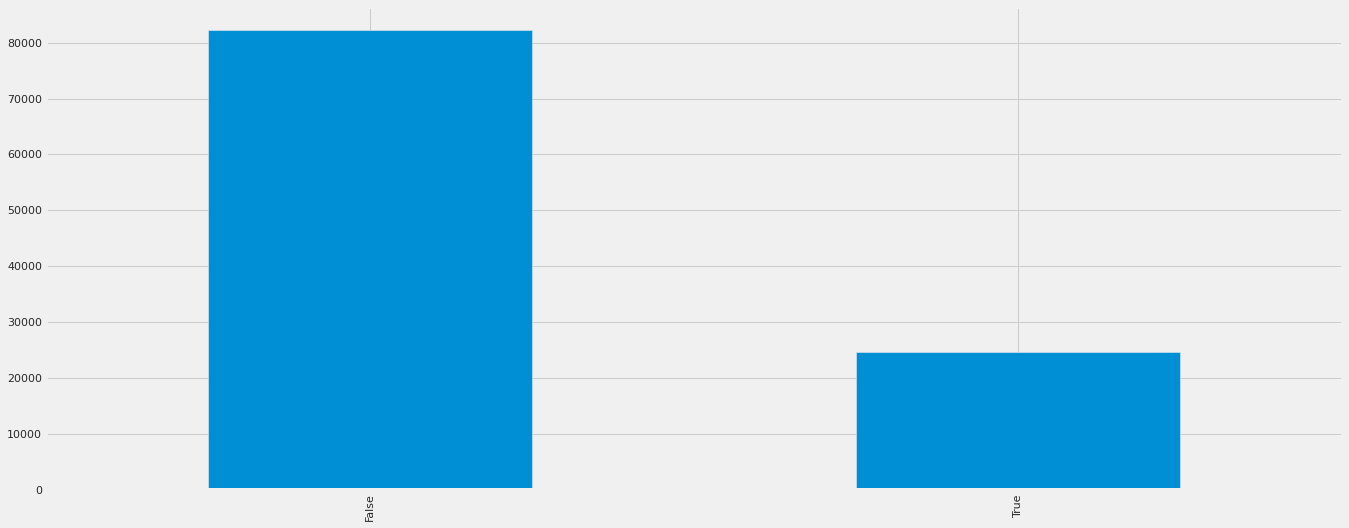

playback_location


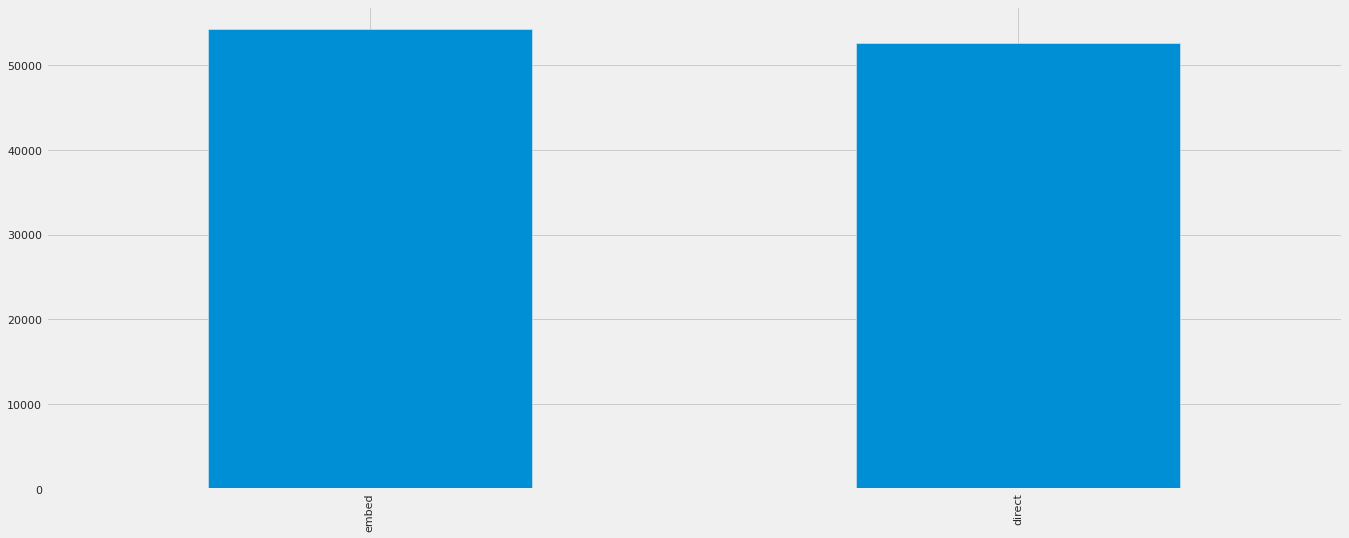

platform


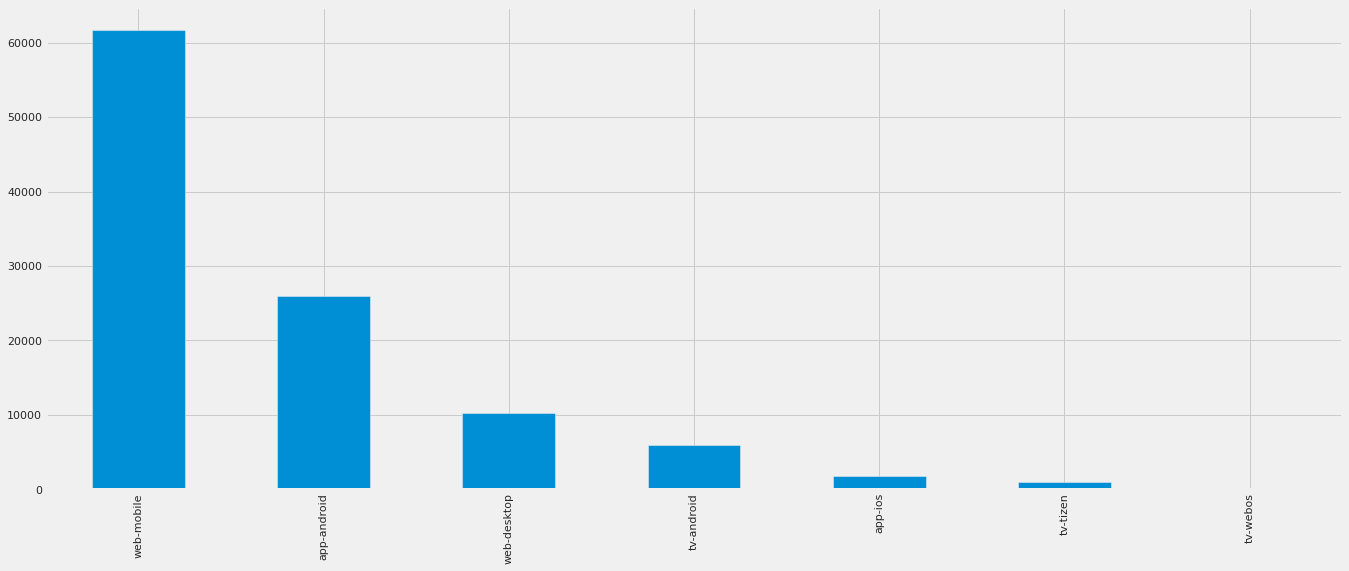

bitrate_range


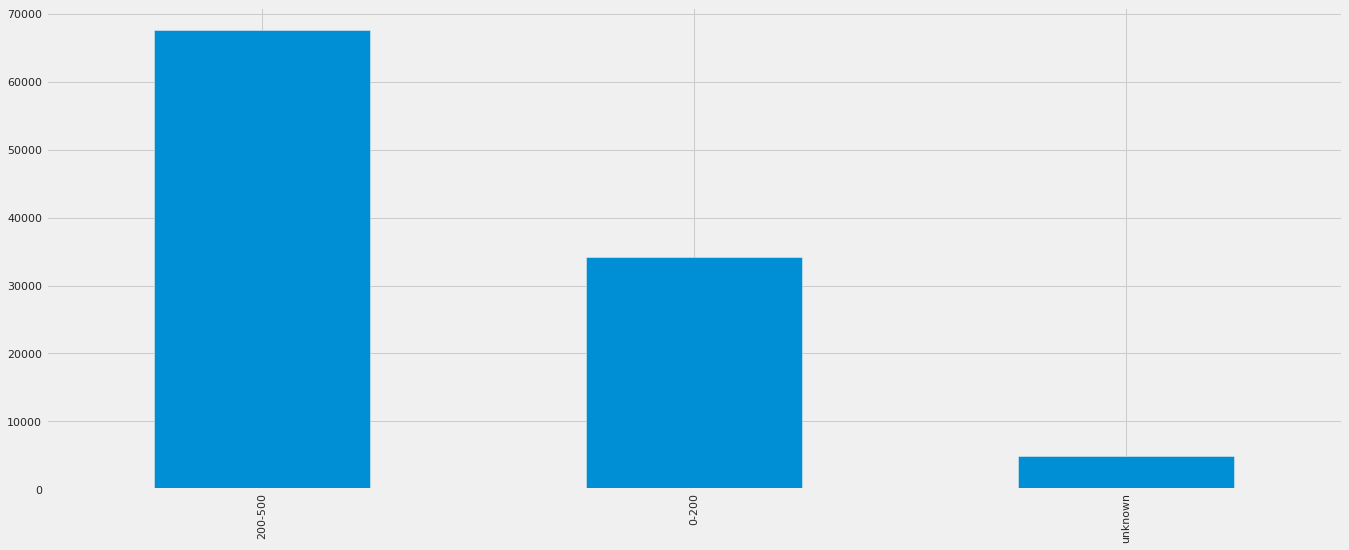

referrer_group


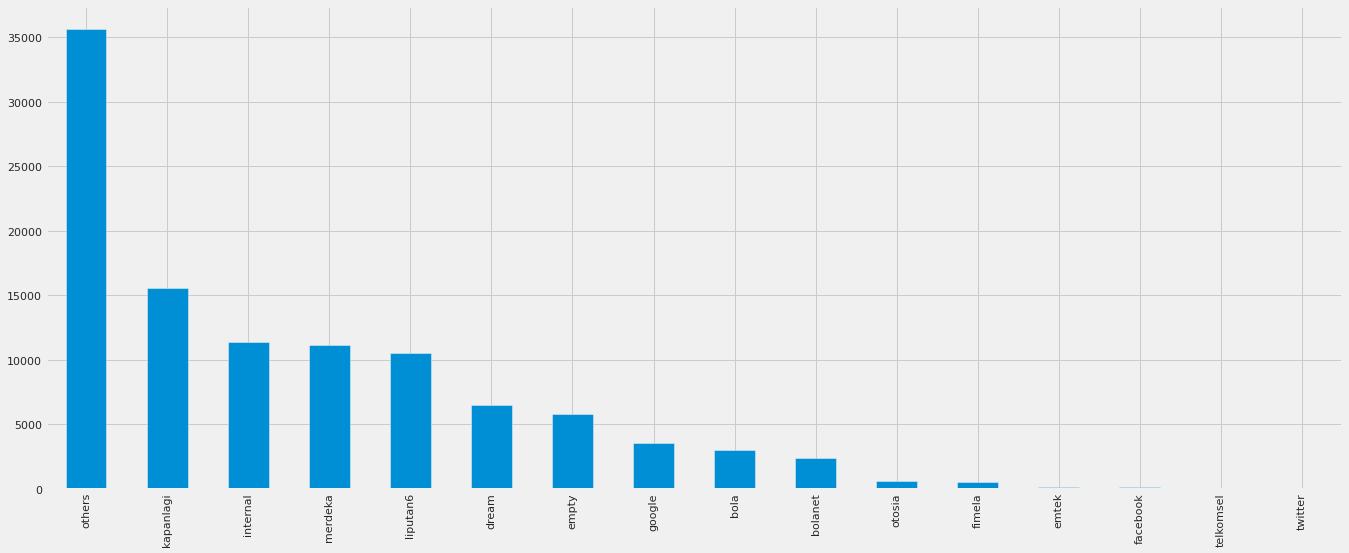

completed


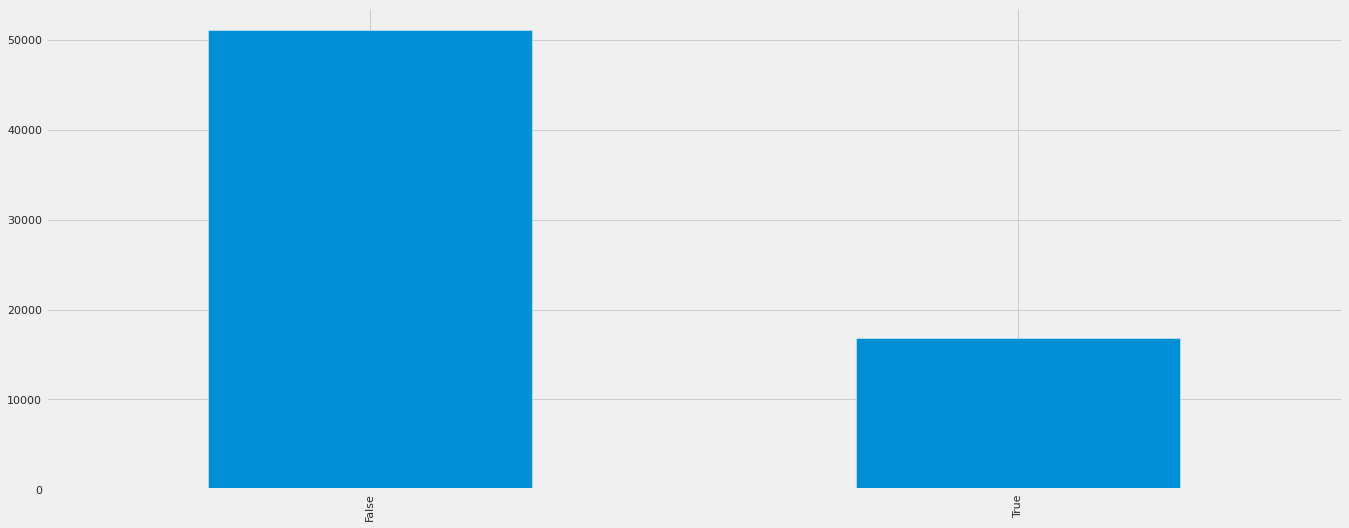

utm_source


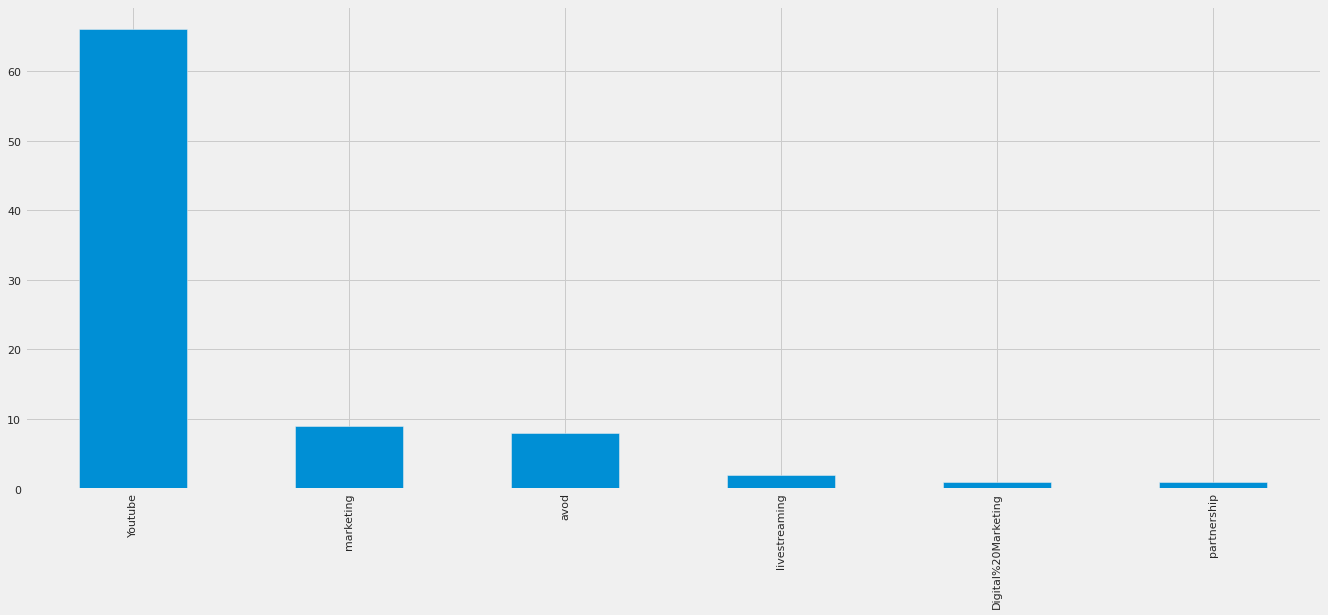

utm_medium


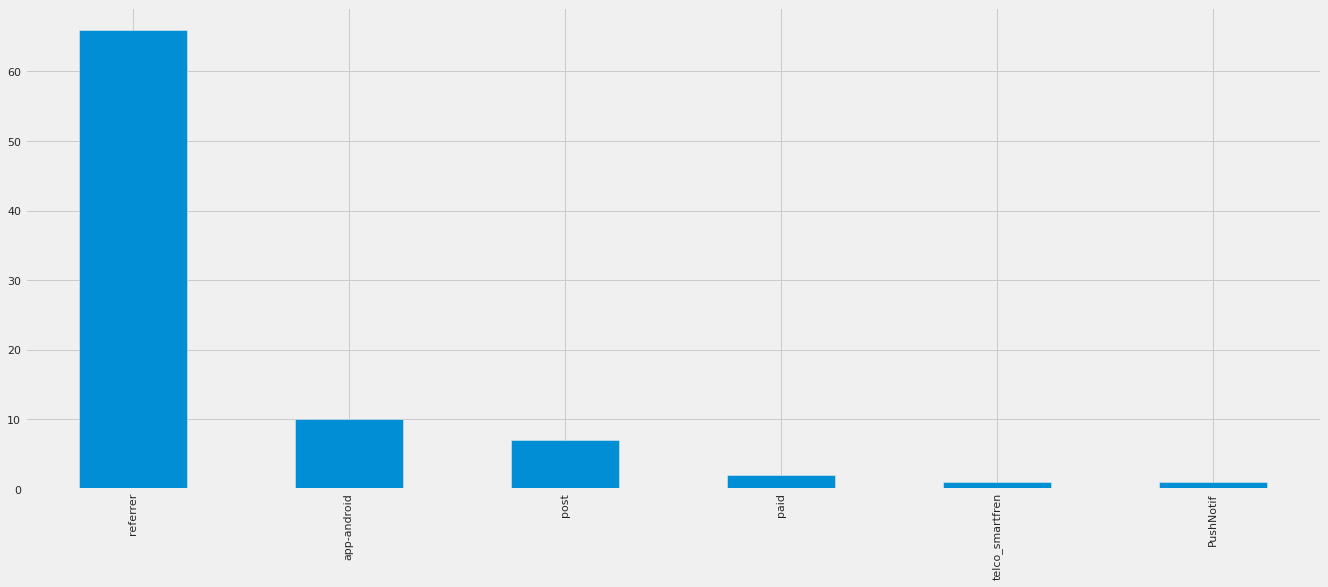

utm_campaign


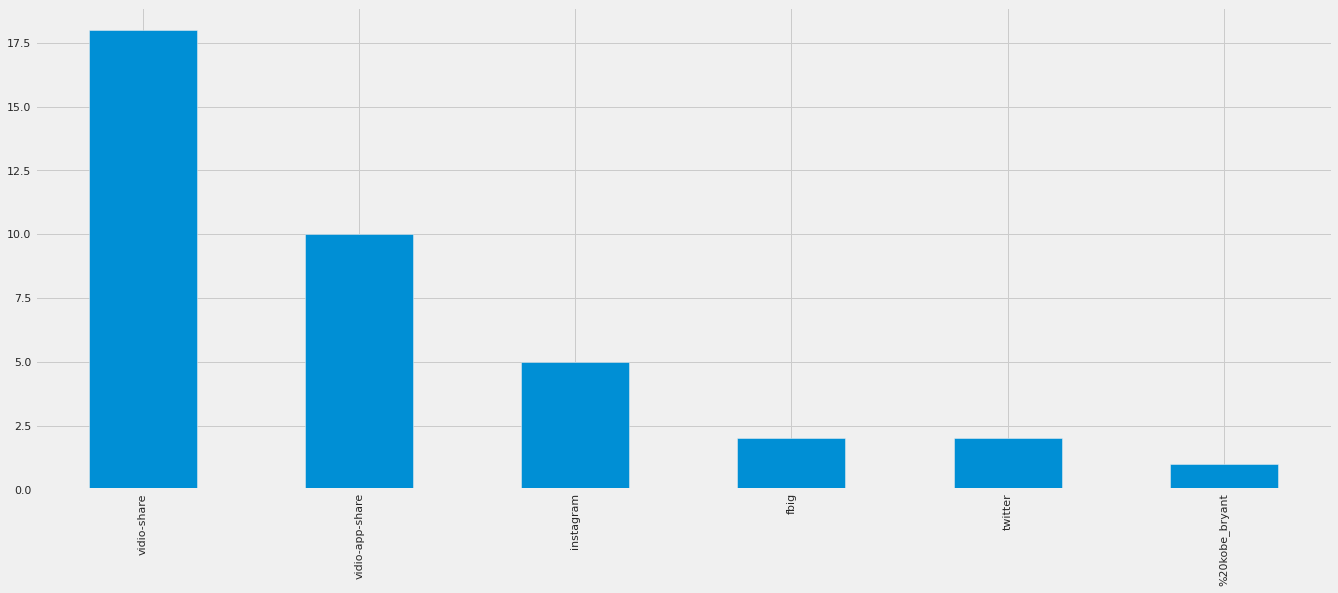

player_name


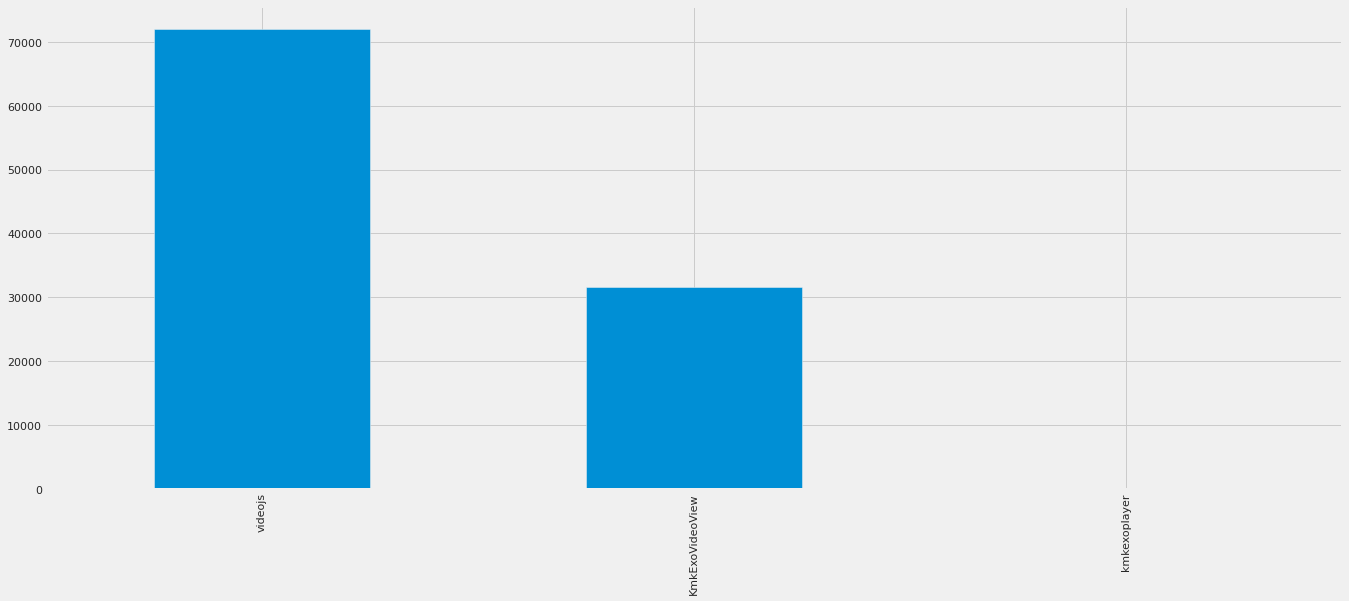

has_ad


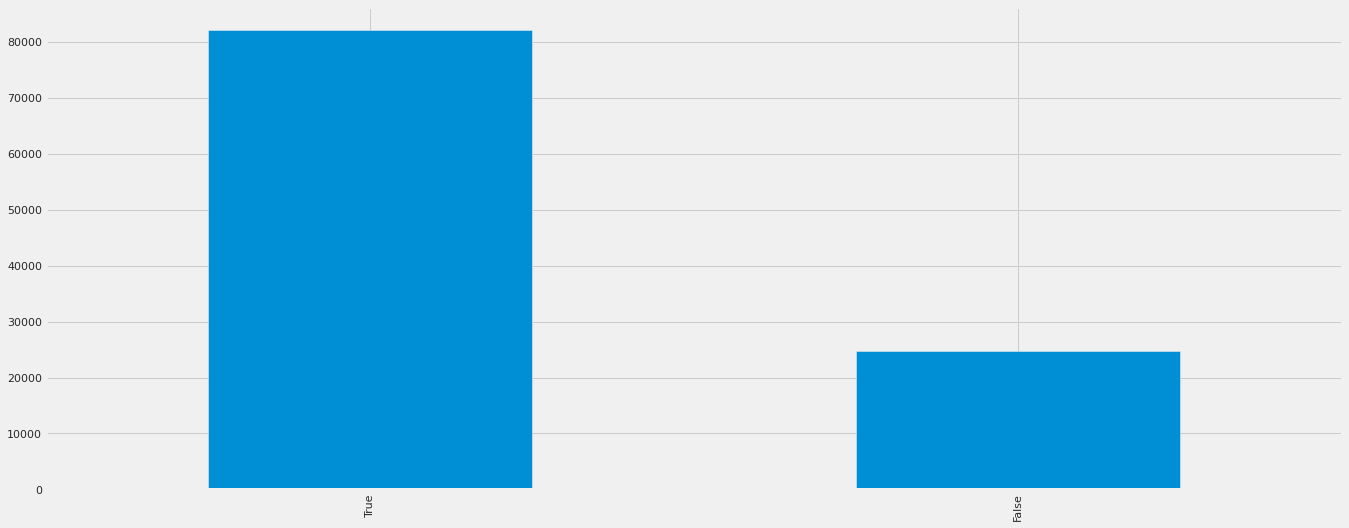

flash_version


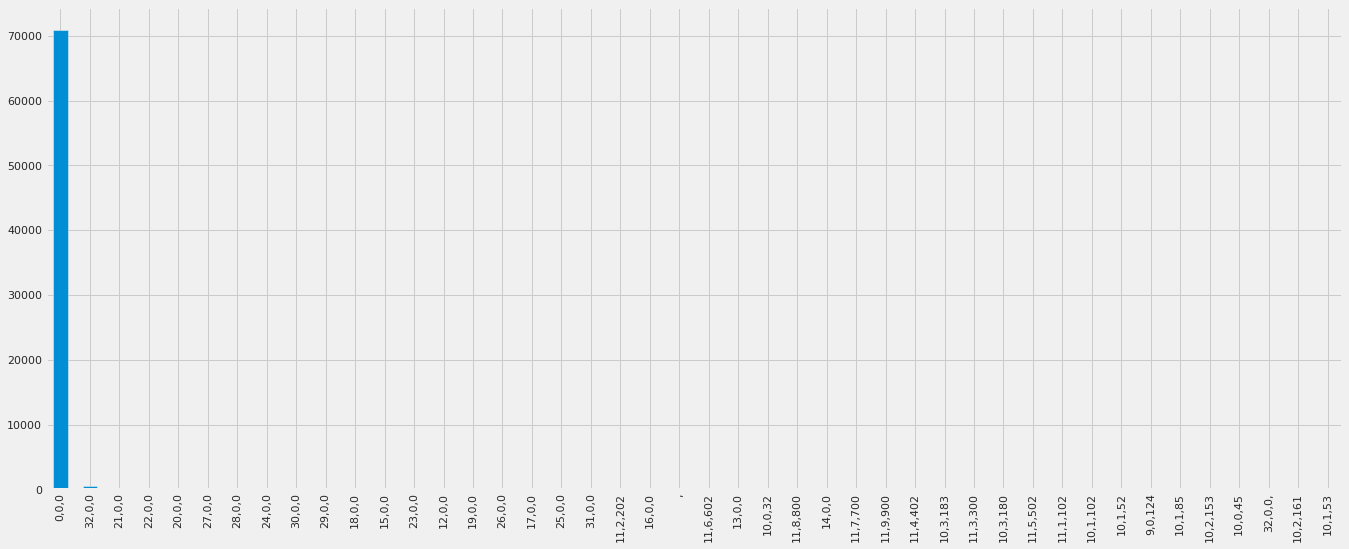

os_name


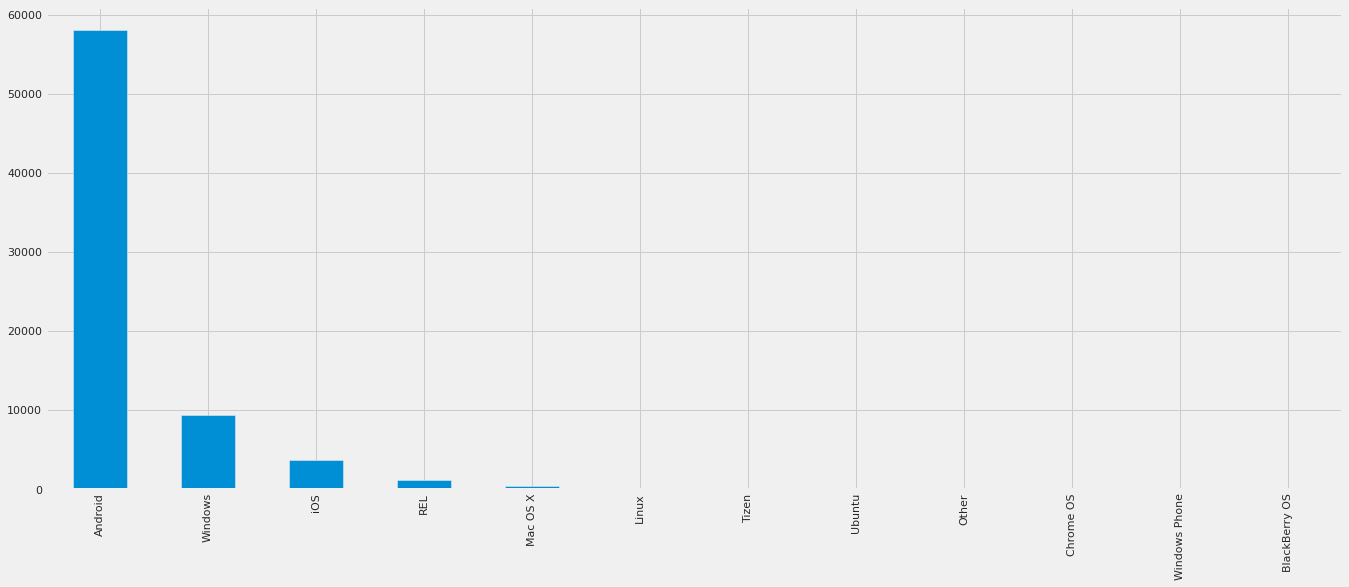

browser_name


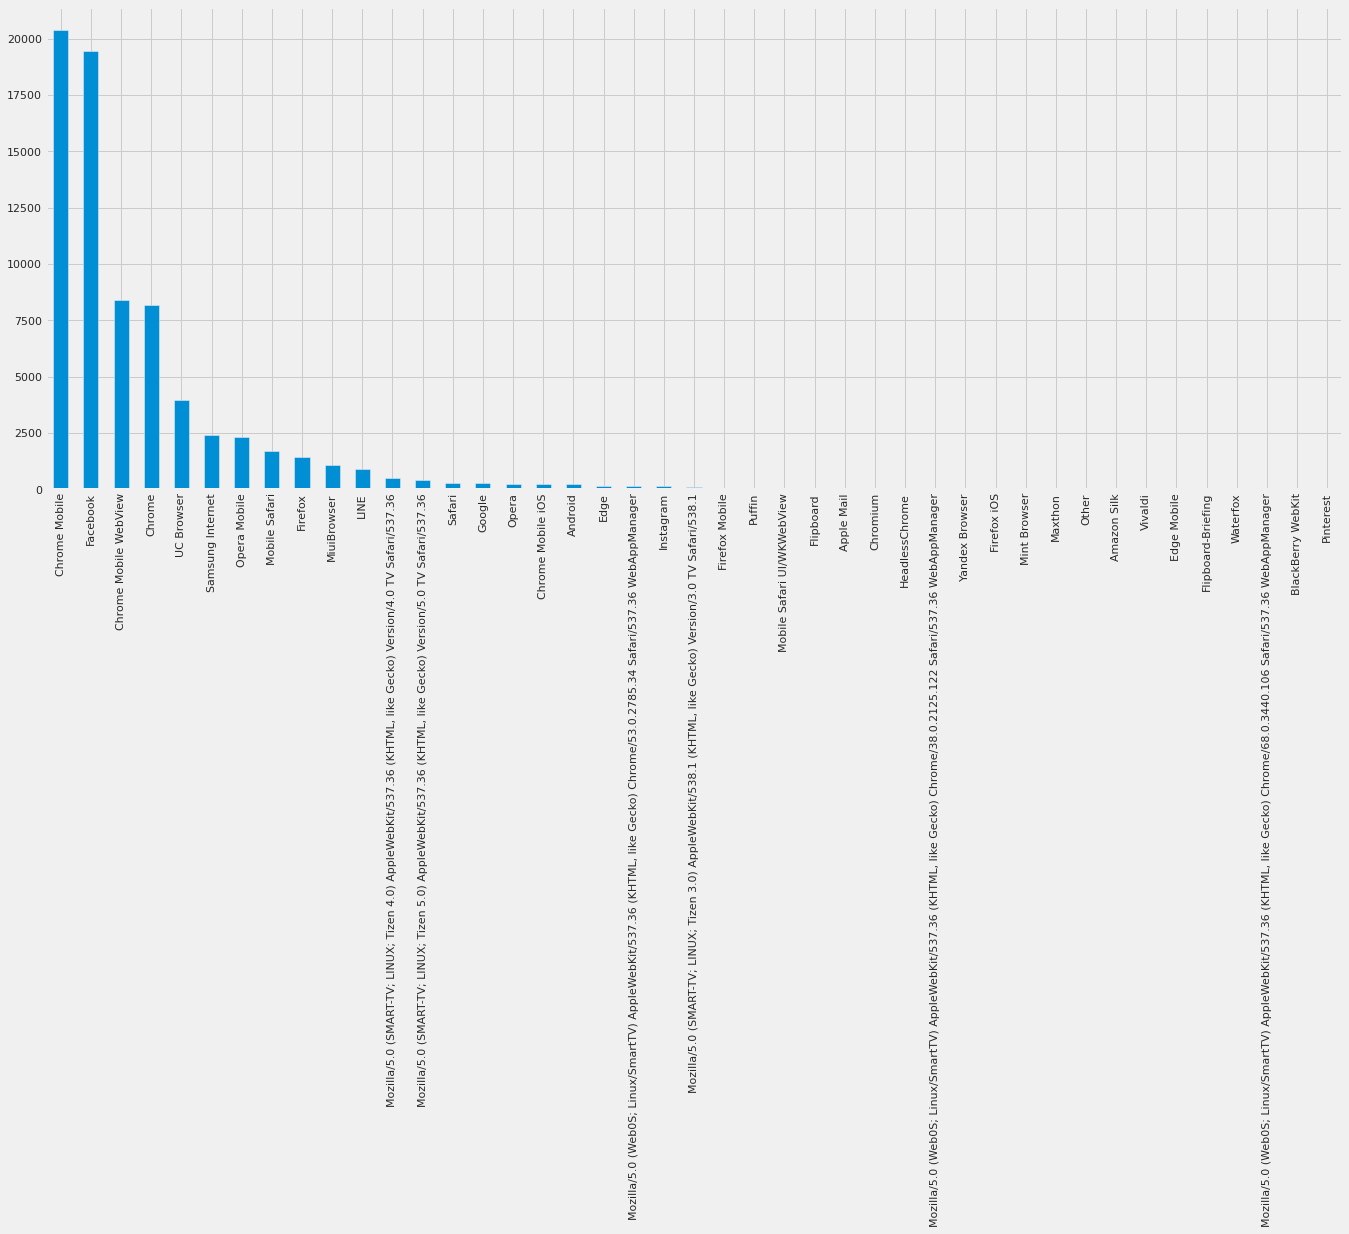

app_name


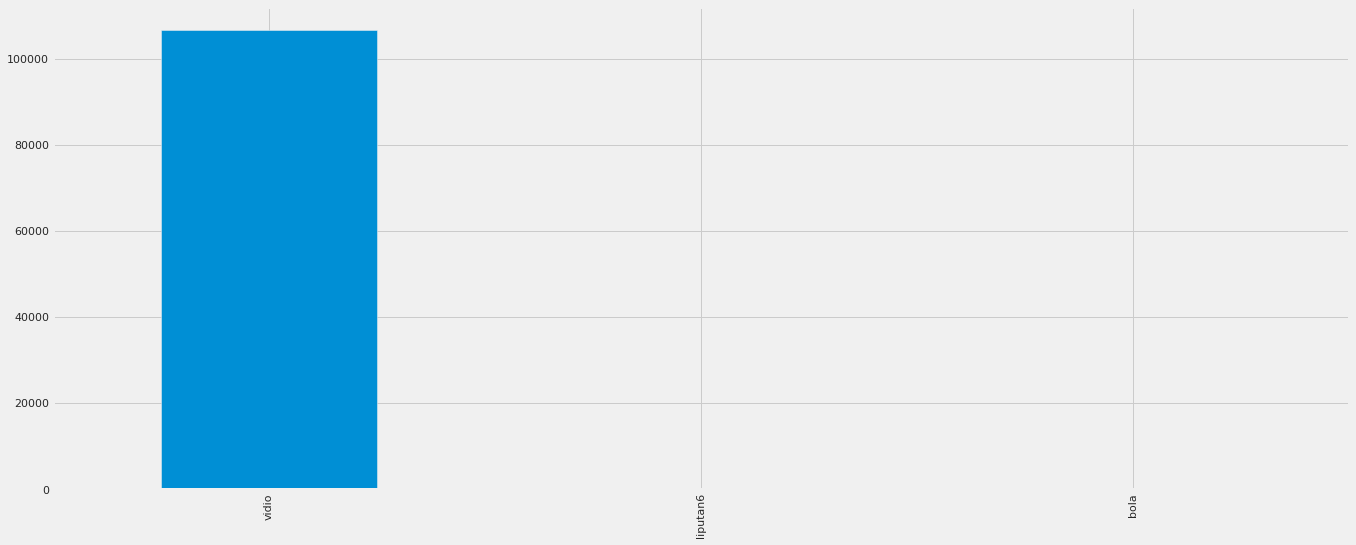

autoplay


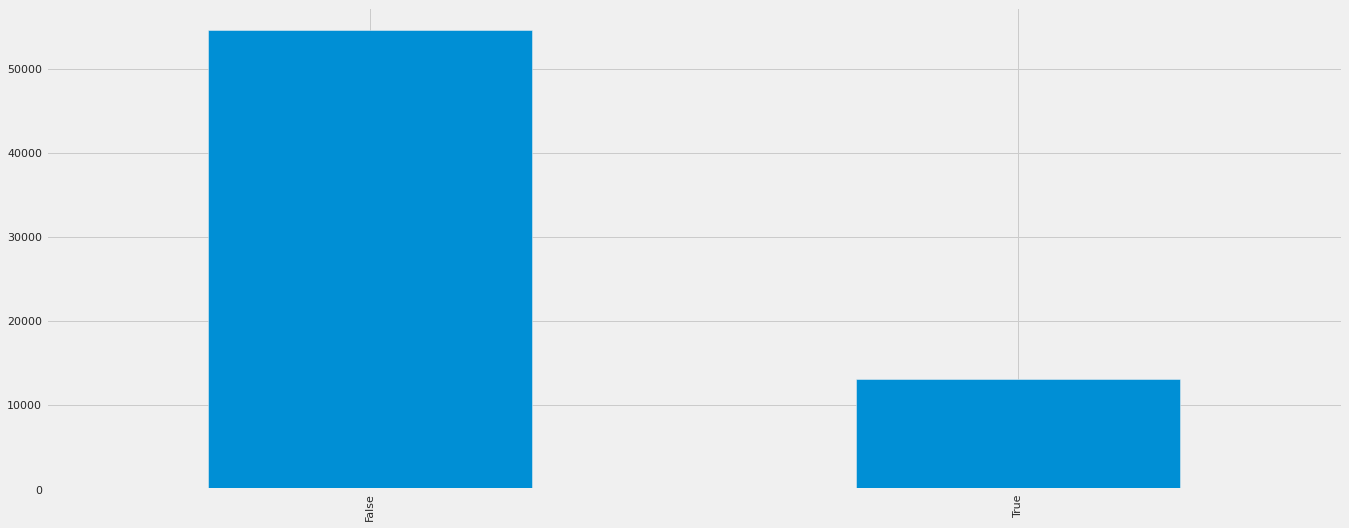

is_premium


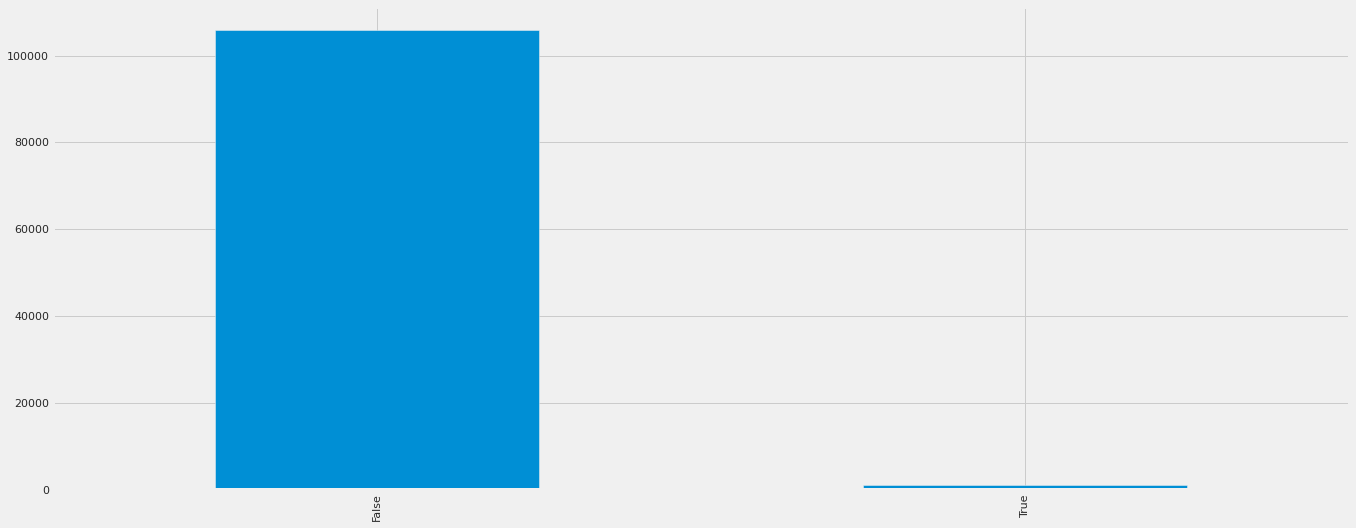

content_type


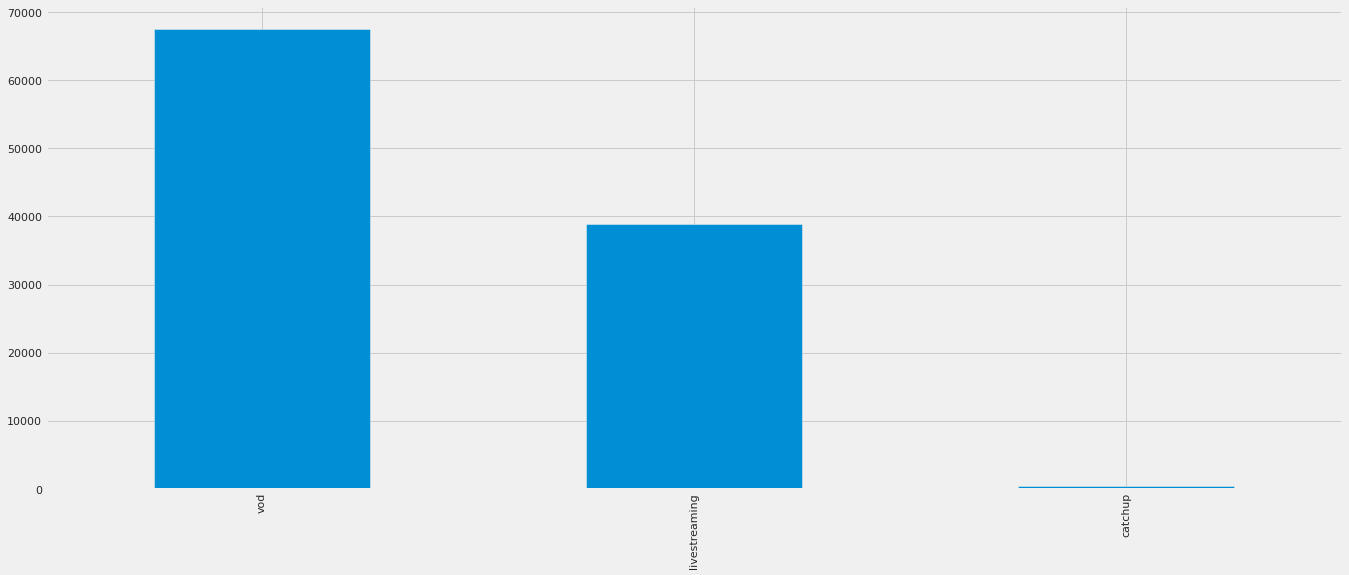

stream_type


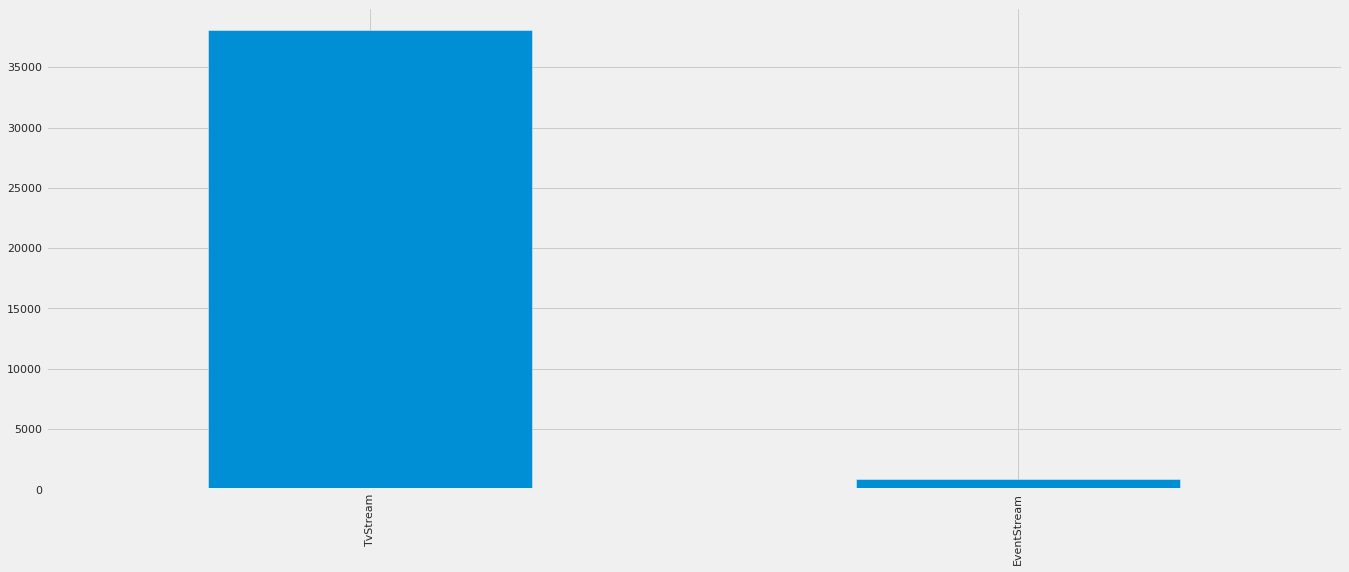

category_name


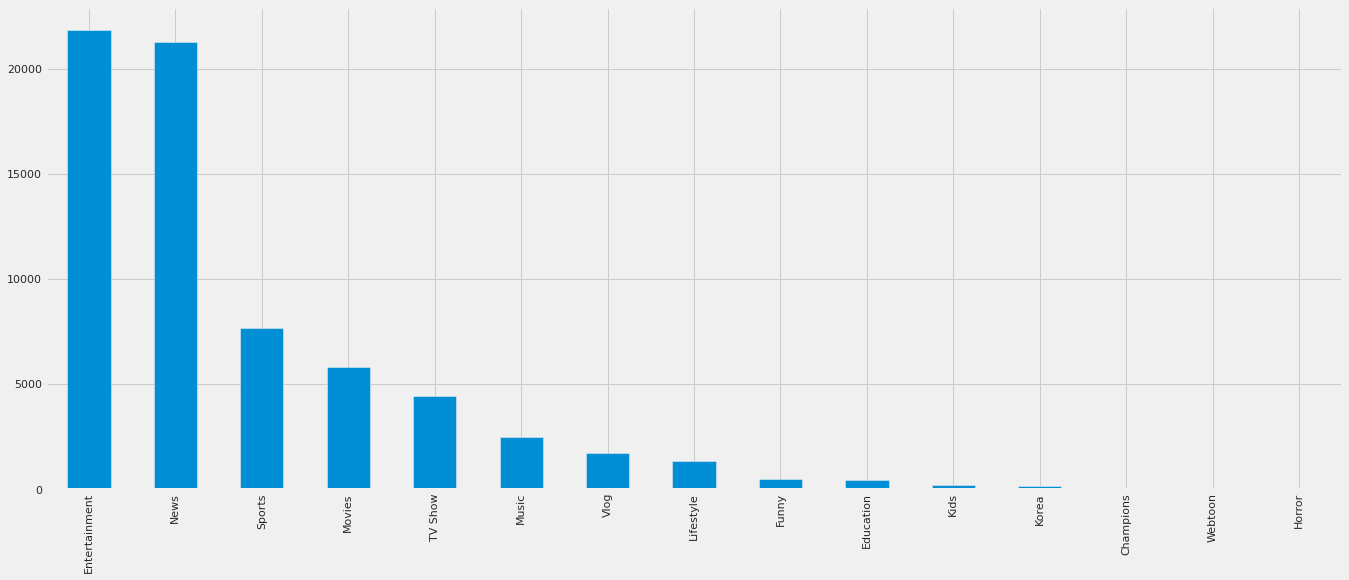

In [6]:
#untuk mempermudah melihat pattern, gunakan visualisasi
for i in low_cardinality:
    print(i)
    df[i].value_counts().plot.bar()
    plt.show()

In [7]:
#let's check categorical features which have high cardinality(nunique value > 100)
high_cardinality = [i for i in df.columns if(df[i].dtypes in ['O','bool'])&(df[i].nunique()>100)]
high_cardinality

['hash_content_id',
 'hash_play_id',
 'hash_visit_id',
 'hash_watcher_id',
 'hash_film_id',
 'hash_event_id',
 'play_time',
 'end_time',
 'referrer',
 'os_version',
 'browser_version',
 'app_version',
 'title',
 'film_title',
 'season_name',
 'genre_name']

In [8]:
#karena variabel yang diawali hash merupakan id(baik id film, user, dll)
#pisahkan hash_ dengan categorical feature lainnya
hash_features = [i for i in high_cardinality if 'hash' in i] 
hash_features

['hash_content_id',
 'hash_play_id',
 'hash_visit_id',
 'hash_watcher_id',
 'hash_film_id',
 'hash_event_id']

In [9]:
# pisahkan juga kolom playtime dan endtime karena kedua var tersebut merupakan
# datetime var
time_features = [i for i in high_cardinality if 'time' in i] 
time_features

['play_time', 'end_time']

In [10]:
high_cardinality = [i for i in high_cardinality if (i not in time_features )and (i not in hash_features)] 
high_cardinality

['referrer',
 'os_version',
 'browser_version',
 'app_version',
 'title',
 'film_title',
 'season_name',
 'genre_name']

referrer


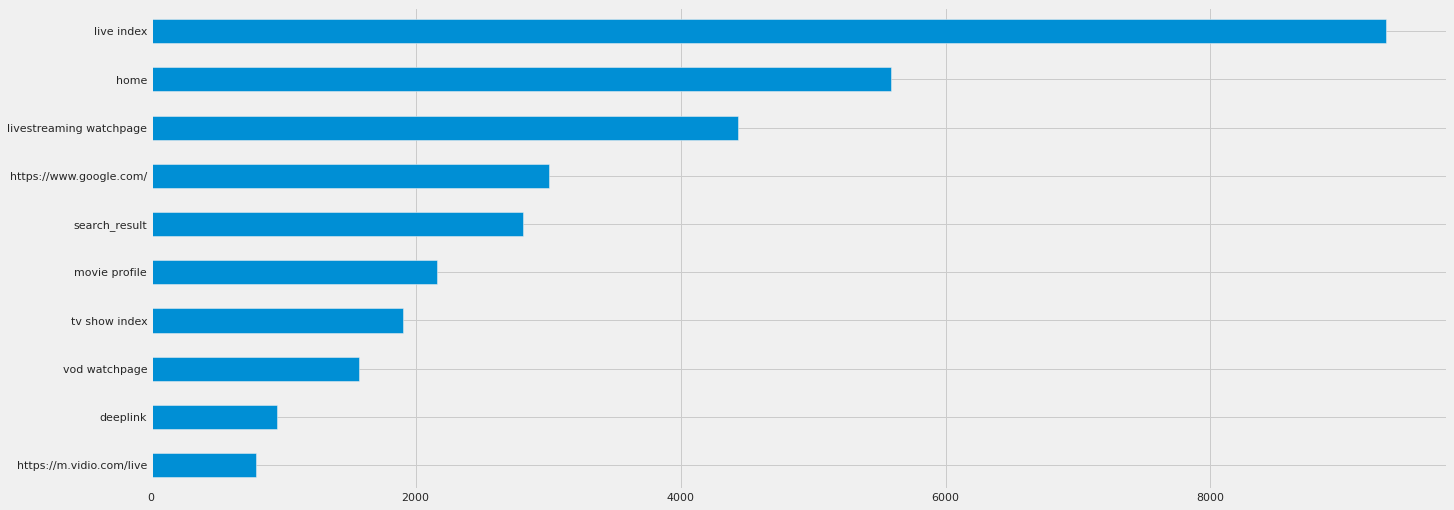

os_version


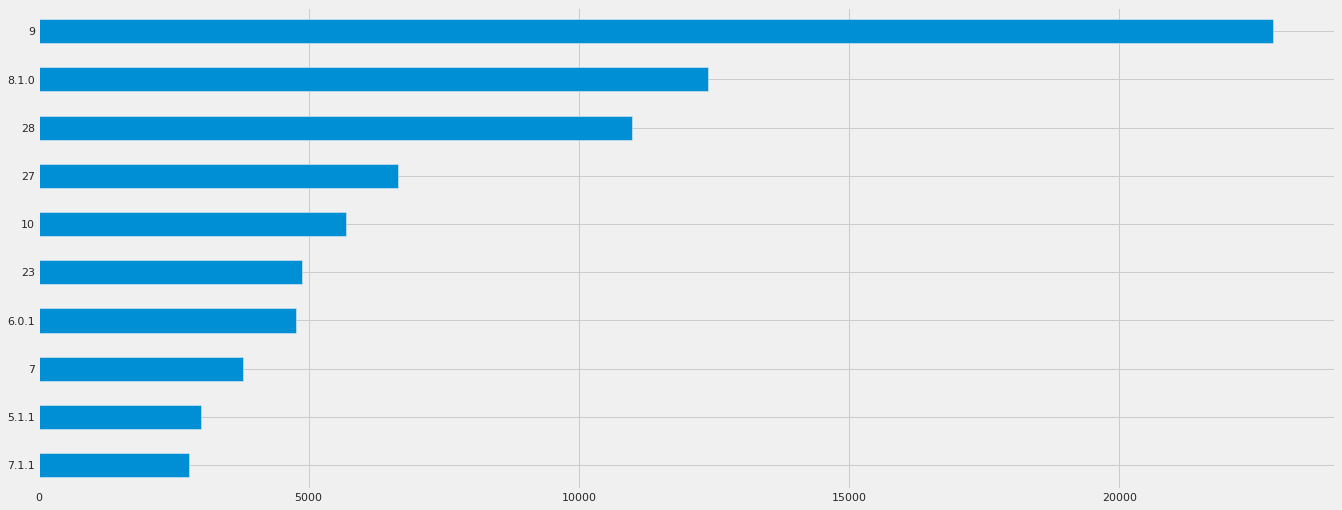

browser_version


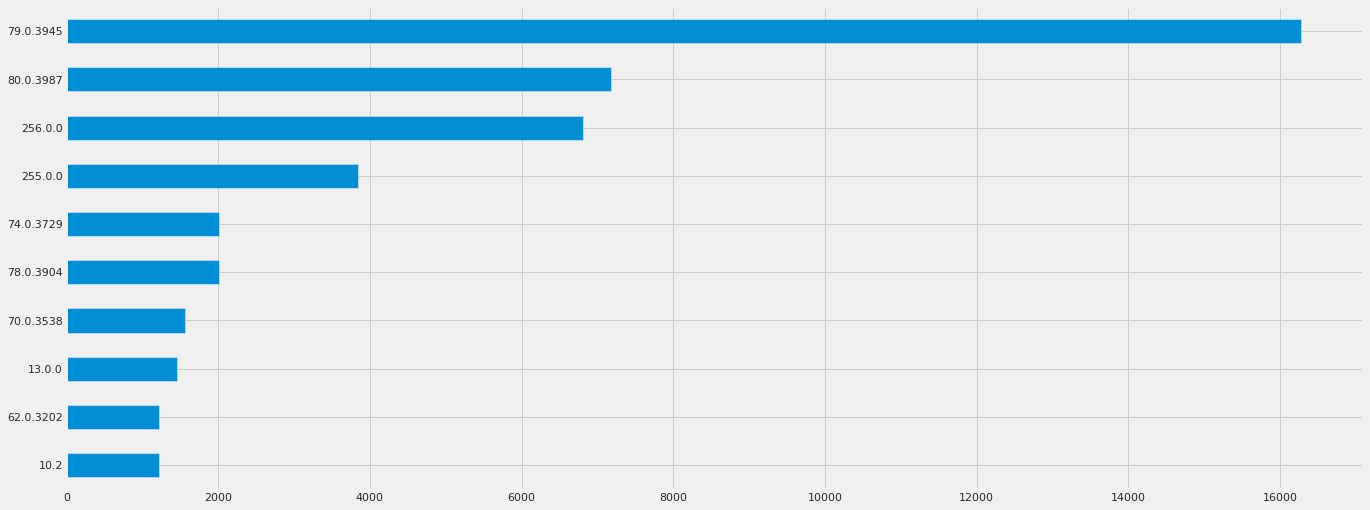

app_version


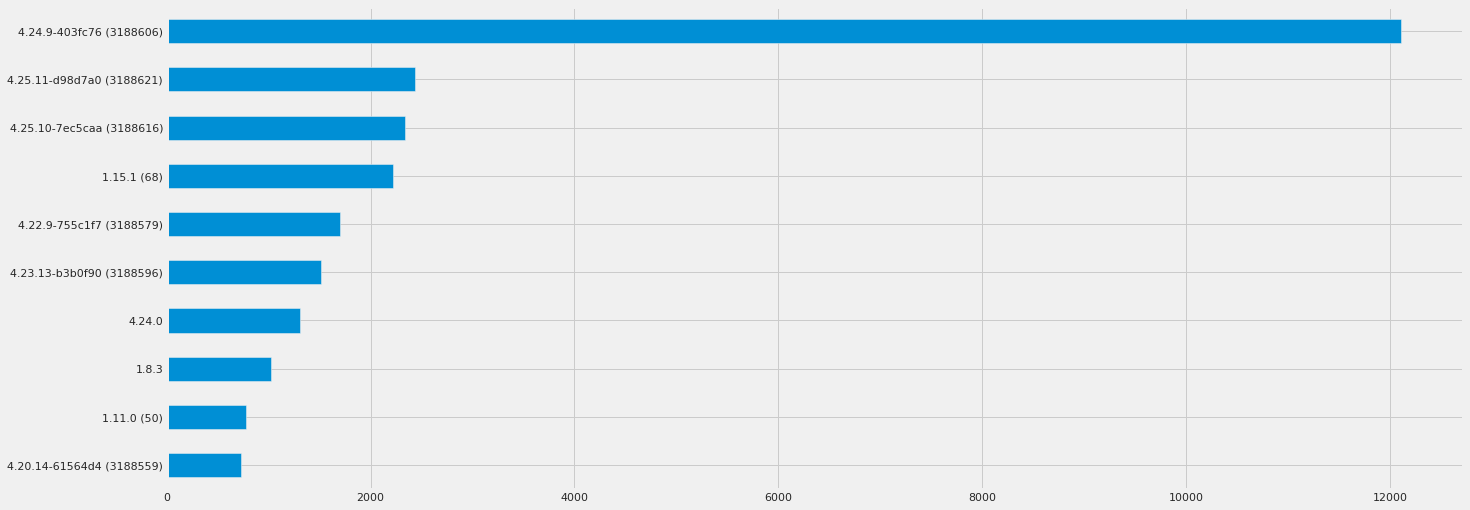

title


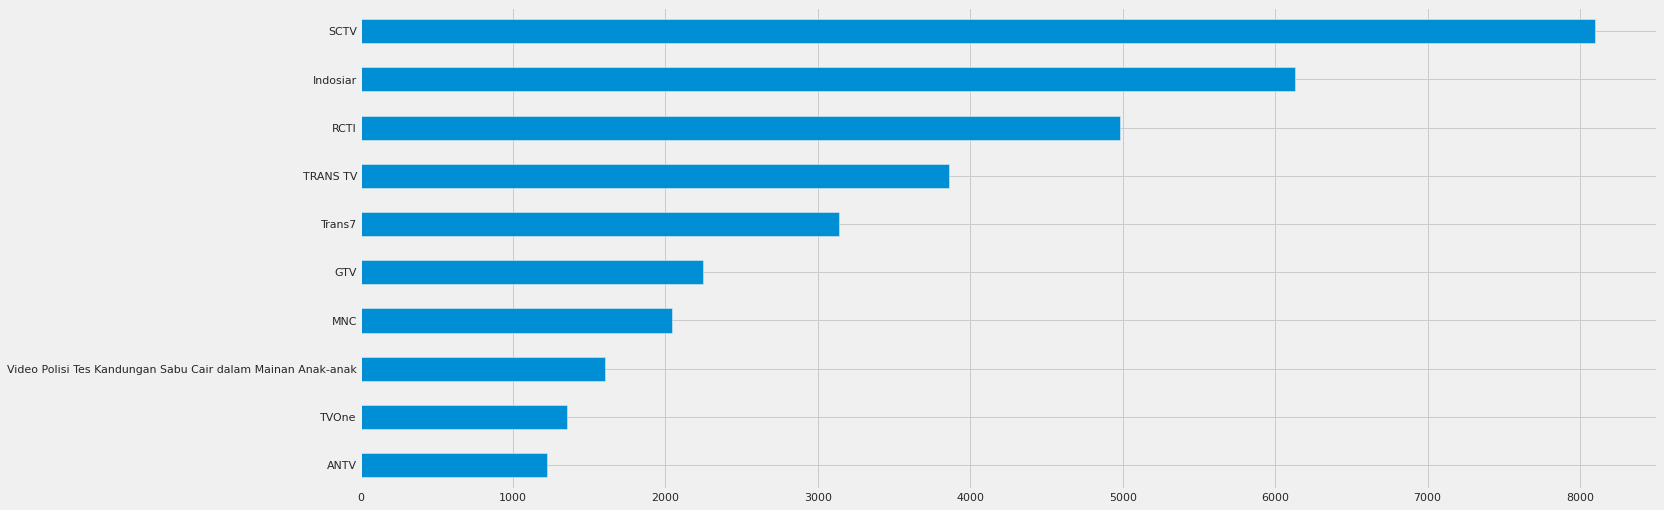

film_title


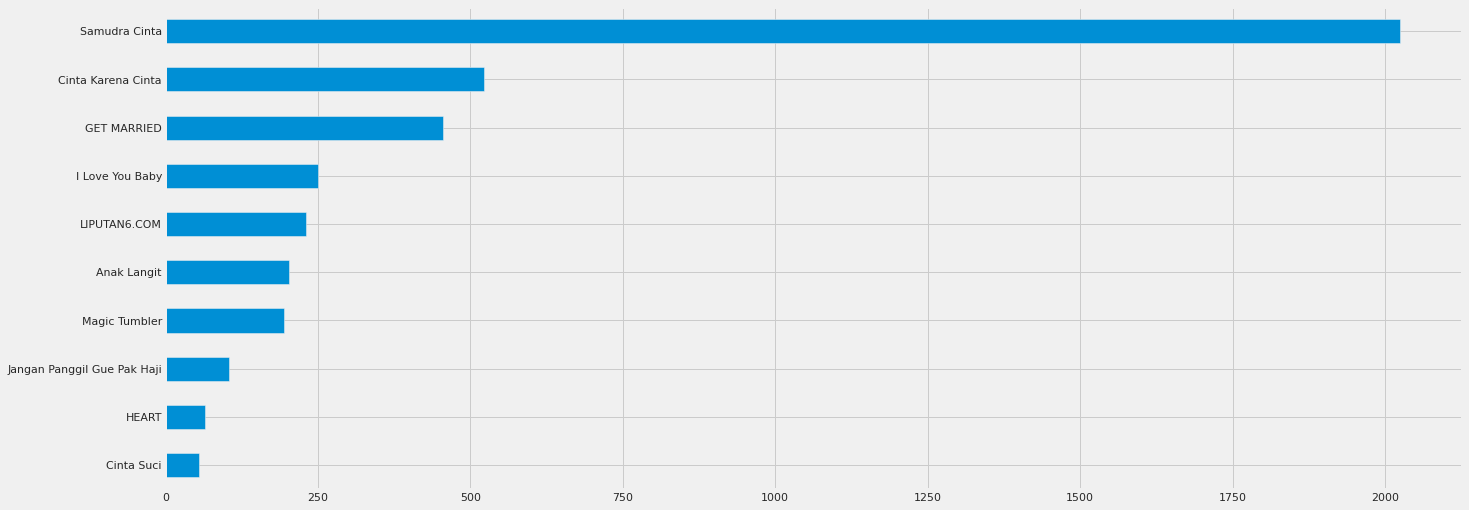

season_name


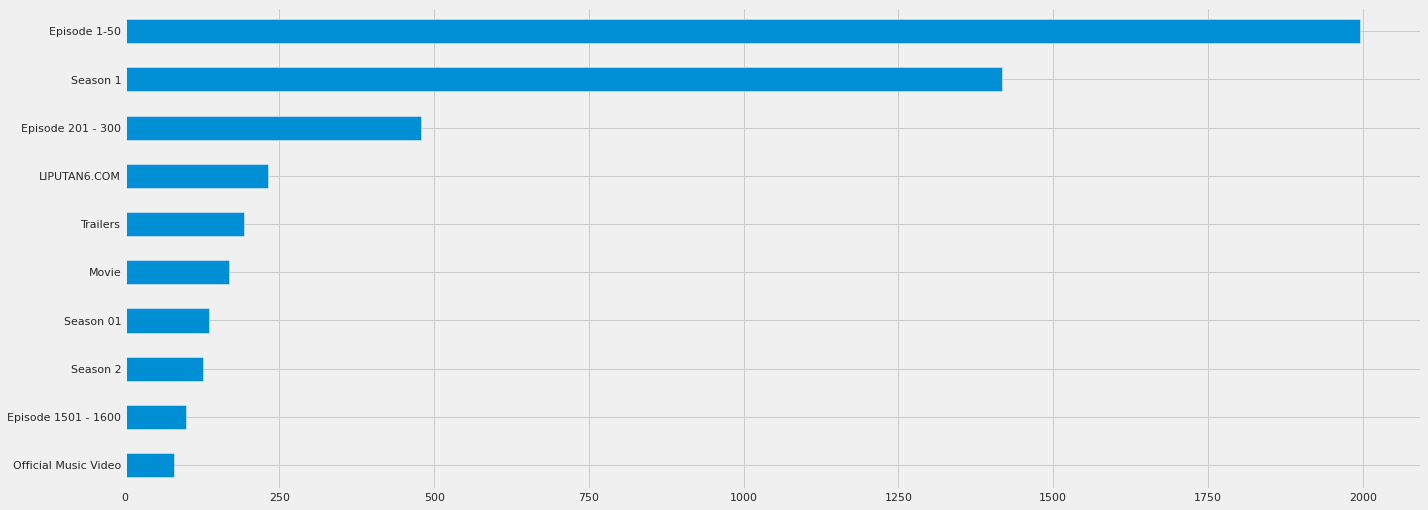

genre_name


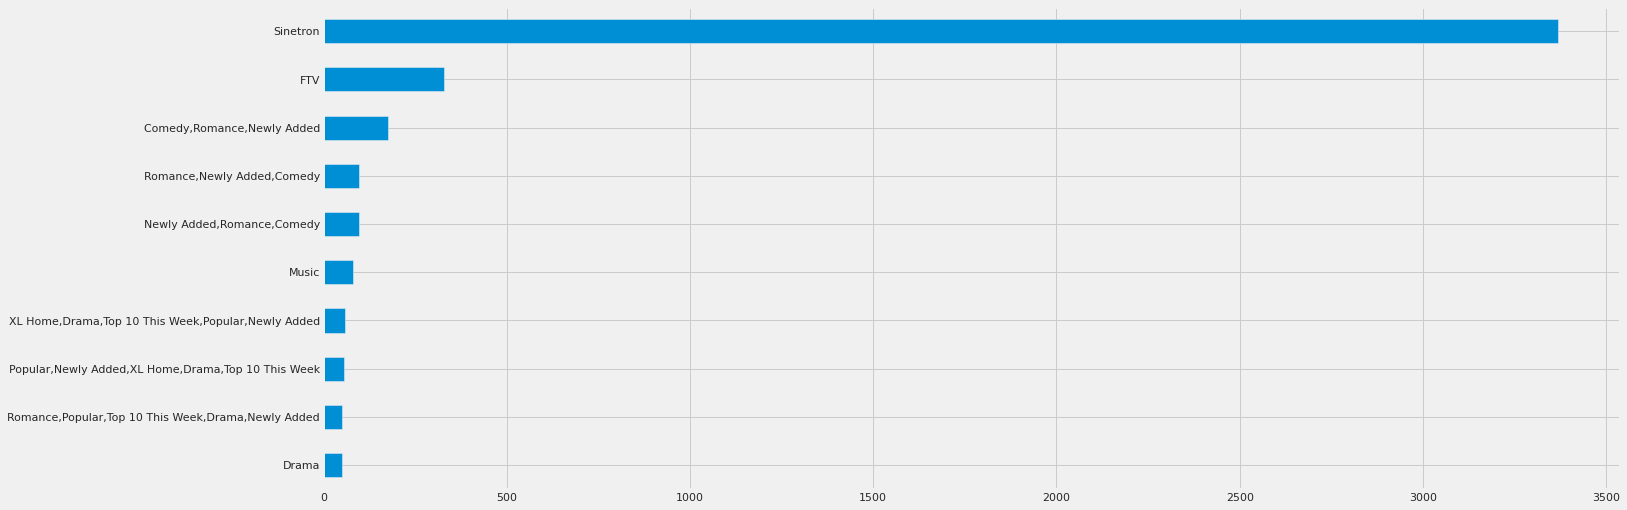

In [11]:
for i in high_cardinality:
    print(i)
    df[i].value_counts().head(10).sort_values().plot.barh()
    plt.show()

In [12]:
# untuk variabel play_time dan end_time, ubah format datetimenya menjadi YY-MM-DD HH:mm:SS
def time_split(var):
    temp = df.copy()
    temp[f'{var}_date'] = temp[var].apply(lambda x:x.split('T')[0])
    temp[f'{var}_time'] = temp[var].apply(lambda x:x.split('T')[1].split('.')[0])
    temp[var] = pd.to_datetime(temp[[f'{var}_date',f'{var}_time']].agg(' '.join,axis = 1))
    return temp[var]

In [13]:
# karena saya malas untuk nguli, maka saya memanfaatkan loop
for i in time_features:
    df[i] = time_split(i)

In [14]:
df.sample(5)

hash_content_id  ... genre_name
76411  3dc3694221d71d29a2e70135d3bb954f95f2edca8d2638...  ...        NaN
48715  05a849deaac57b372d66819263d0cdec40198a7b24525f...  ...        NaN
47753  8c3b035770585396c56caea468feece08e9d72820114bc...  ...        NaN
82178  015d0ad19d20a333086d08f68676d00e7093127022a89c...  ...        NaN
61345  05a849deaac57b372d66819263d0cdec40198a7b24525f...  ...        NaN

[5 rows x 41 columns]

In [15]:
#cek cardinality from play_time feature 
print('unique year :',df['play_time'].apply(lambda x:x.year).nunique())
print('unique month :',df['play_time'].apply(lambda x:x.month).nunique())
print('unique day :',df['play_time'].apply(lambda x:x.day).nunique())
print('unique hour :',df['play_time'].apply(lambda x:x.hour).nunique())

unique year : 1
unique month : 1
unique day : 16
unique hour : 24


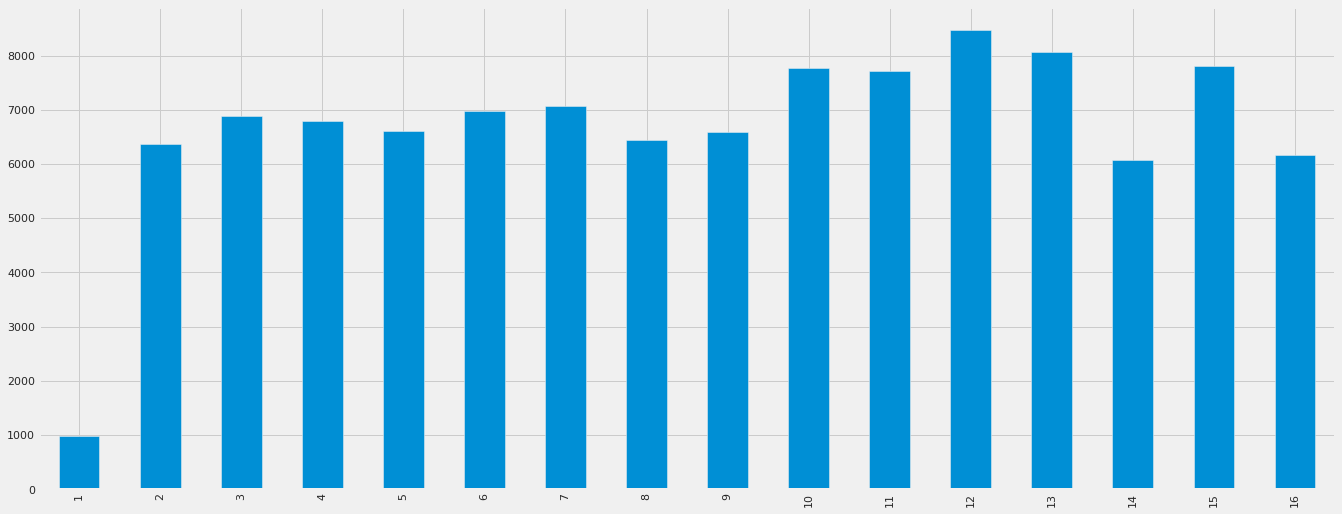

In [65]:
#cek distribusi waktu(tanggal) menonton
df['play_time_date'] = df['play_time'].apply(lambda x:x.day)
df['play_time_date'].value_counts(sort = False).plot.bar()
plt.show()

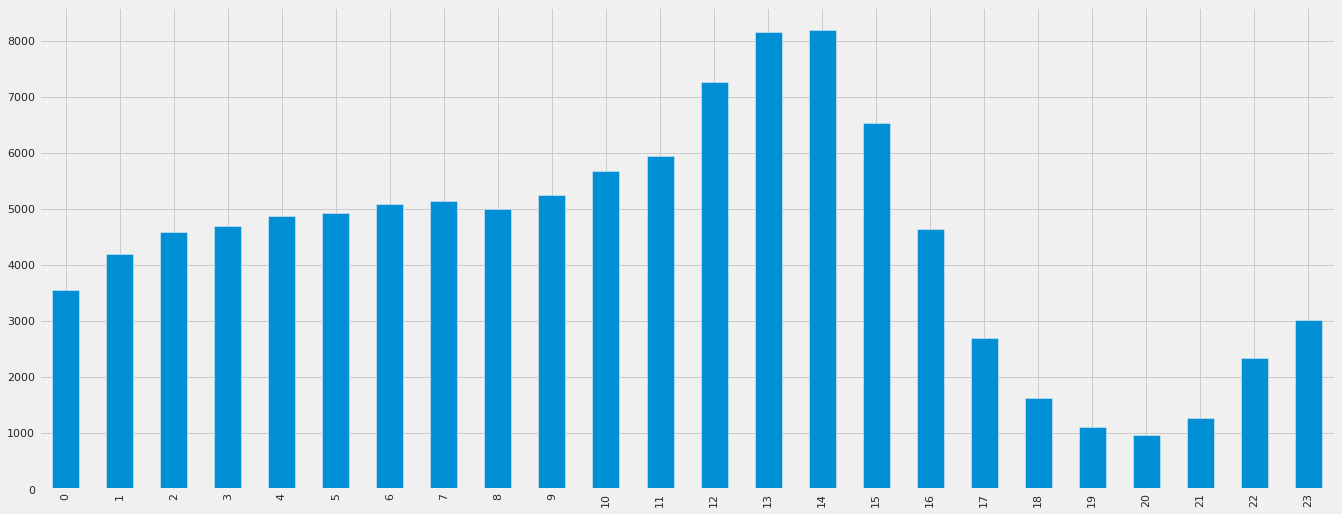

In [17]:
#cek distribusi waktu(jam) menonton
df['play_time_hour'] = df['play_time'].apply(lambda x:x.hour)
df['play_time_hour'].value_counts(sort = False).plot.bar()
plt.show()

In [96]:
day_list = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
position = [i for i in range(7)]
df['weekday'] = df['play_time'].dt.dayofweek

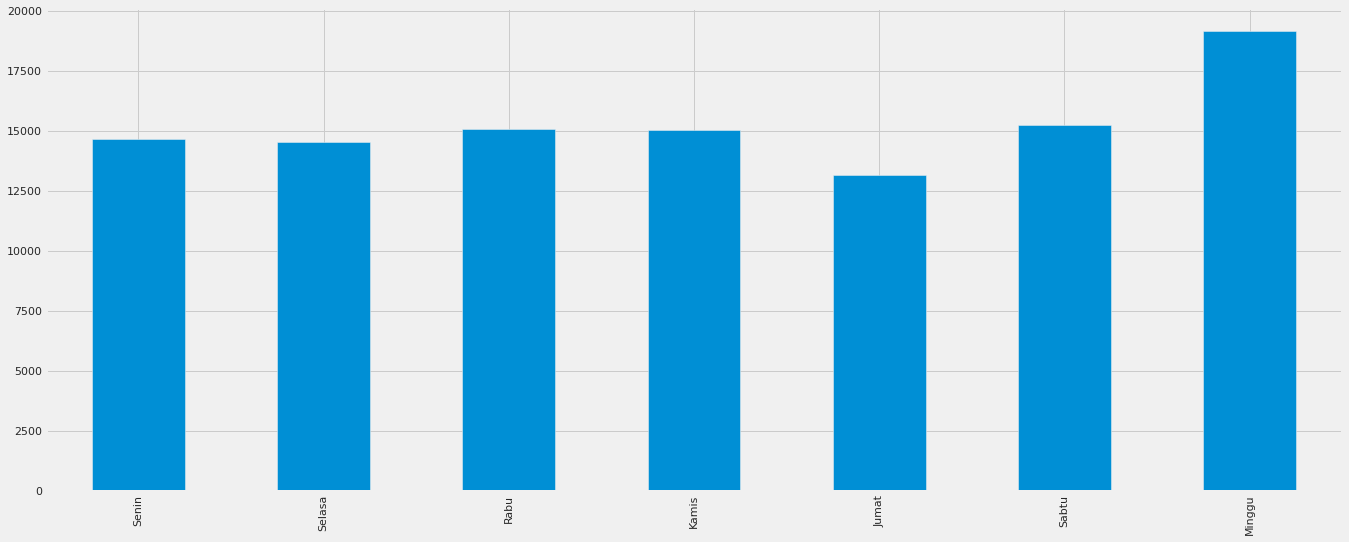

In [97]:
df['weekday'].value_counts(sort = False).plot.bar()
plt.xticks(position, day_list)
plt.show()

In [20]:
non_unique_hash = [] #capture columns that have repetitive value
unique_hash = [] #capture every columns that don't have repetitive value
for i in hash_features:
    if df[i].nunique()==len(df):
        unique_hash.append(i)
    else:
        non_unique_hash.append(i)
print('non unique: ',' '.join(non_unique_hash))
print('unique: ',' '.join(unique_hash))

non unique:  hash_content_id hash_visit_id hash_watcher_id hash_film_id
unique:  hash_play_id hash_event_id


In [21]:
content = df['hash_content_id'].value_counts().reset_index()
content.columns = ['hash_content_id','count']
content['hash_content_id'] = content['hash_content_id'].map(lambda x: x[:10])
content.head(10)

hash_content_id  count
0      fc56dbc6d4   8101
1      f8809aff4d   6130
2      9ae8f17cfc   4981
3      367461e6dd   3861
4      c2a181d817   3142
5      93411f44e2   2246
6      8a9a02d73a   2044
7      5c539e6678   1604
8      5620e84be3   1354
9      3da6ee6699   1221

In [22]:
visit = df['hash_visit_id'].value_counts().reset_index()
visit.columns = ['hash_visit_id','count']
visit['hash_visit_id'] = visit['hash_visit_id'].map(lambda x: x[:10])
visit.head(10)

hash_visit_id  count
0    bf819a5a31      4
1    d1f0419eb7      3
2    1072217b81      3
3    09398825f8      3
4    c3b4ee7dab      3
5    7a8b83624c      3
6    8f308da9fd      3
7    f18551edb8      3
8    41fbbb81b9      3
9    facd7c5122      2

In [23]:
watcher = df['hash_watcher_id'].value_counts().reset_index()
watcher.columns = ['hash_watcher_id','count']
watcher['hash_watcher_id'] = watcher['hash_watcher_id'].map(lambda x: x[0:5])
watcher.head(10)

hash_watcher_id  count
0           e3b0c    654
1           133af     32
2           83f4d     25
3           b11d6     24
4           8909a     19
5           219e2     15
6           55505     14
7           f6412     14
8           a8e1d     12
9           4e697     11

In [24]:
film = df['hash_film_id'].value_counts().reset_index()
film.columns = ['hash_film_id','count']
film['hash_film_id'] = film['hash_film_id'].map(lambda x: x[0:5])
film.head(10)

hash_film_id  count
0        28955   2025
1        ddfe0    522
2        f53f2    455
3        d6723    250
4        6c0f3    231
5        200dd    202
6        a73ab    195
7        a6706    105
8        3f1bb     65
9        86573     55

In [25]:
#analisa data numerik, drop kolom city karena tidak ada data sama seklai
numeric = [i for i in df.columns if (df[i].dtypes in ['int','float'])&(i!='city')&('time' not in i)]
numeric

['average_bitrate', 'total_bytes', 'buffer_duration', 'play_duration']

In [26]:
df[numeric].describe()

average_bitrate   total_bytes  buffer_duration  play_duration
count    101865.000000  1.068110e+05     1.068110e+05  106811.000000
mean     199406.240230  7.765342e+07     2.272422e+05     425.431847
std      141397.648432  4.683612e+08     7.416347e+07    1541.638614
min         144.000000  0.000000e+00     0.000000e+00       0.000000
25%         633.000000  7.500000e+02     0.000000e+00       4.000000
50%      300000.000000  5.062500e+05     1.000000e+00      41.000000
75%      300000.000000  1.125000e+07     6.000000e+00     120.000000
max      300000.000000  3.092062e+10     2.423807e+10   82455.000000

average_bitrate


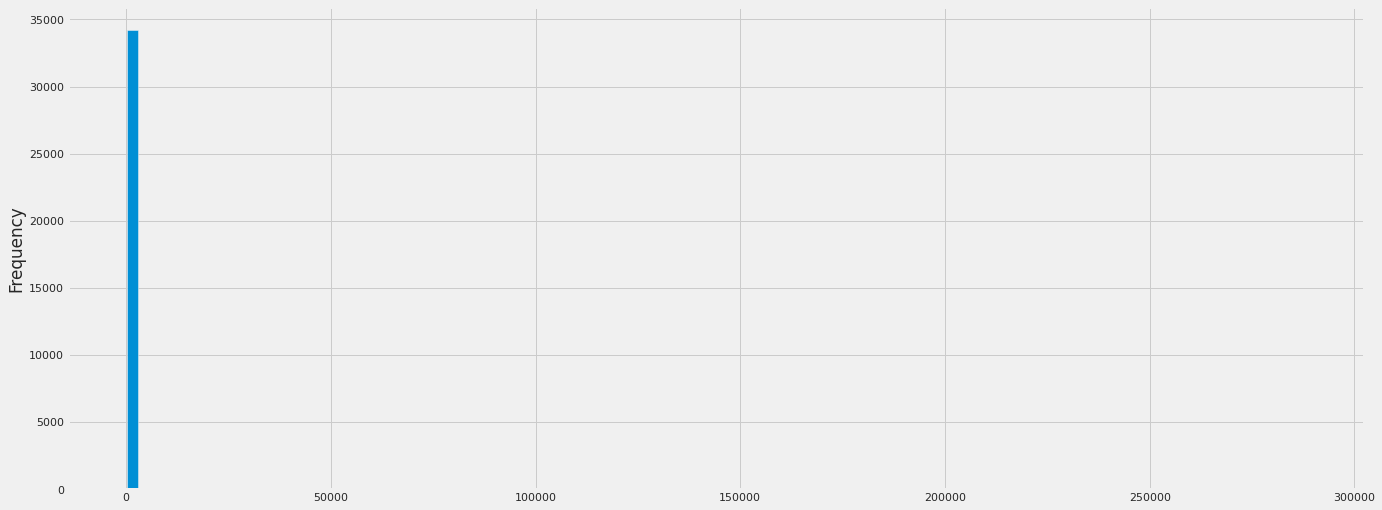

total_bytes


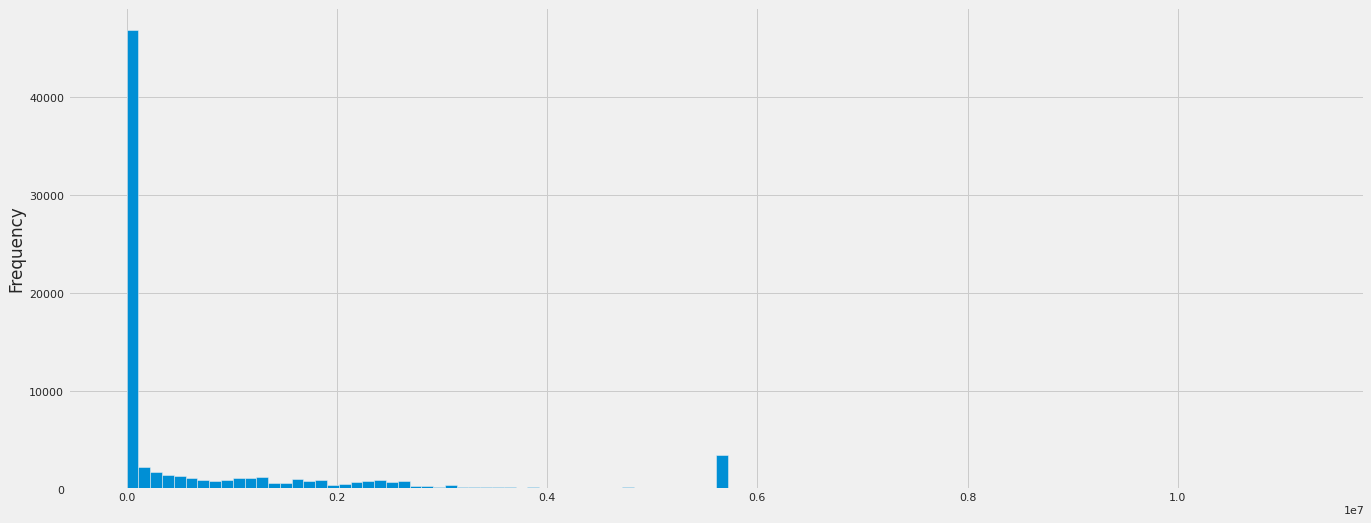

buffer_duration


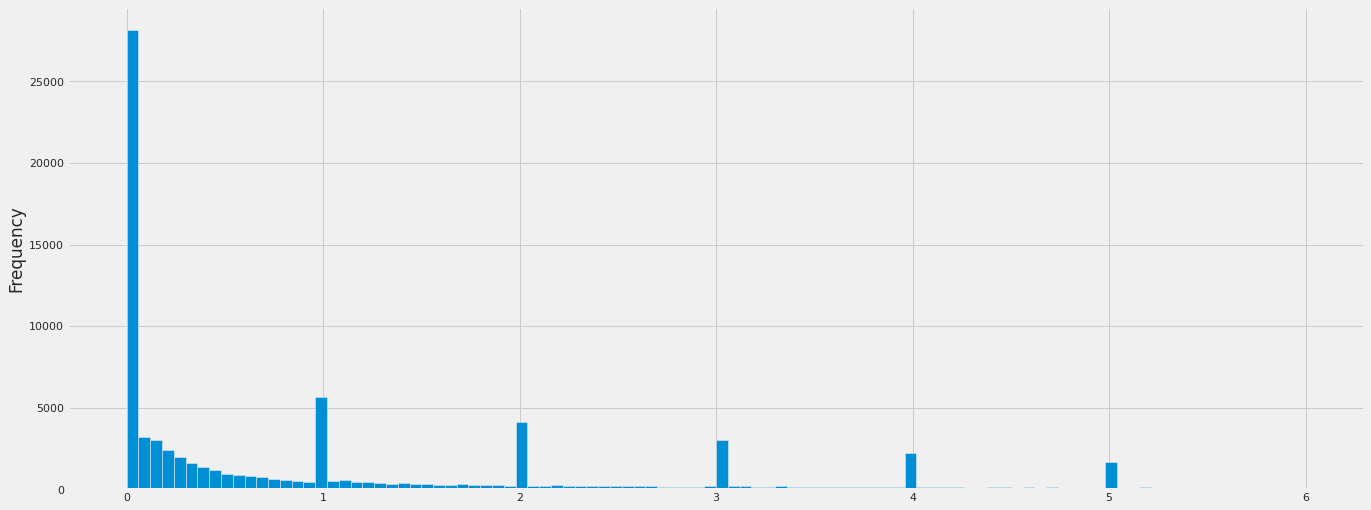

play_duration


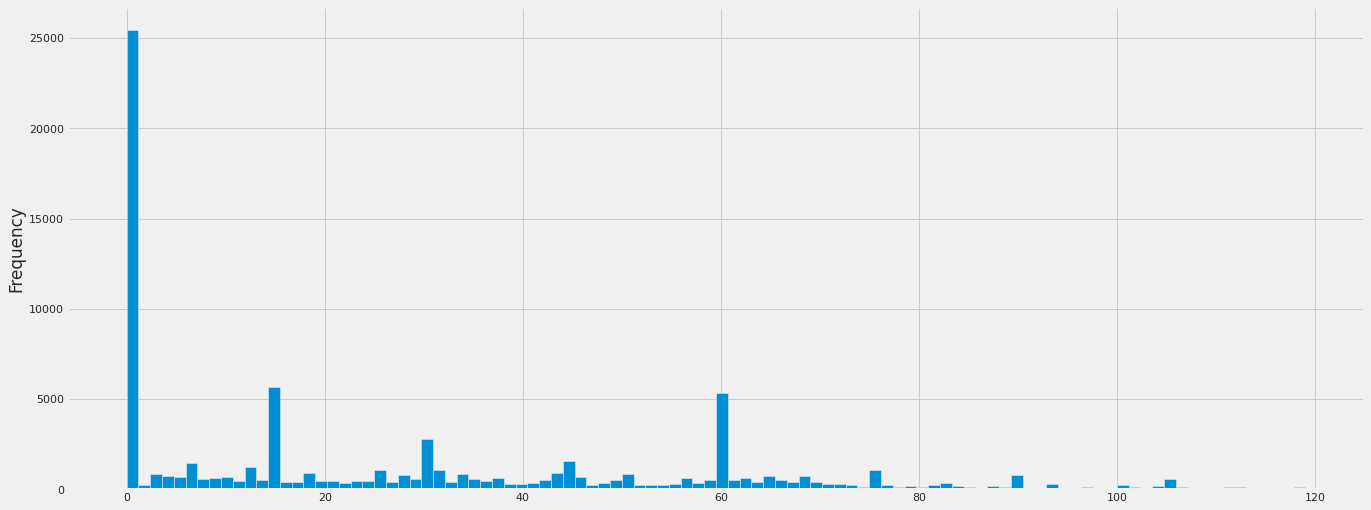

In [27]:
#karena jarak antara Q3 dan nilai maxnya cukup besar(kecuali bitrate), maka plot cuma sampe Q3 
#dengan tujuan untuk mempermudah analisa
for i in numeric:
    print(i)
    df[df[i]<df[i].quantile(q=0.75)][i].plot.hist(bins=100)
    plt.show()

### beberapa goal yang menarik:
#### - Distribusi genre dan title perjamnya
#### - hash_watcher_id e3b0c(anomali yang kelewat anomali)
#### - Distribusi genre dan title per hari
#### - pola penonton(media,genre,jam)=>segmentasi penonton
#### - genre yang ditonton sampai selesai
#### - premium konten yang ditonton

In [28]:
#distribusi genre, title dan film yang di tonton berdasarkan jam

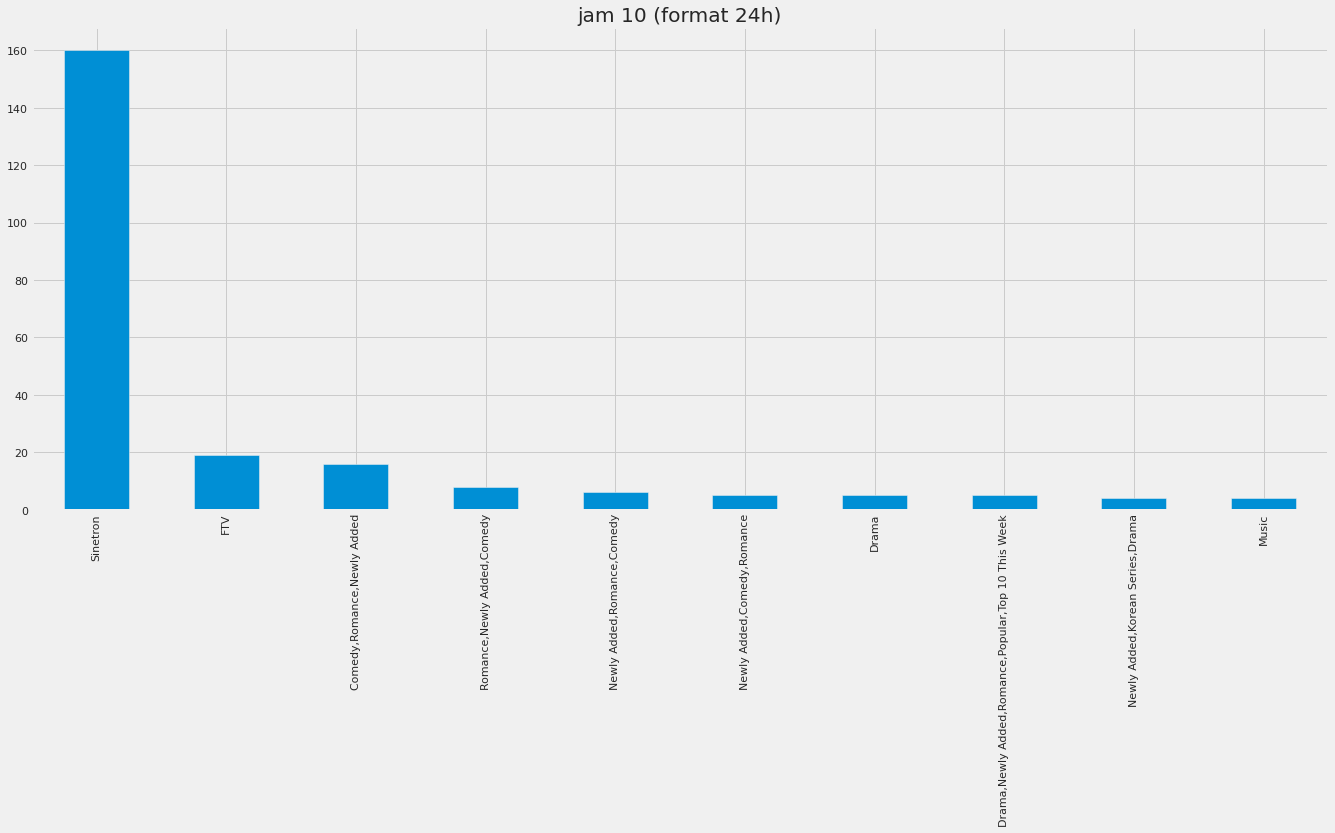

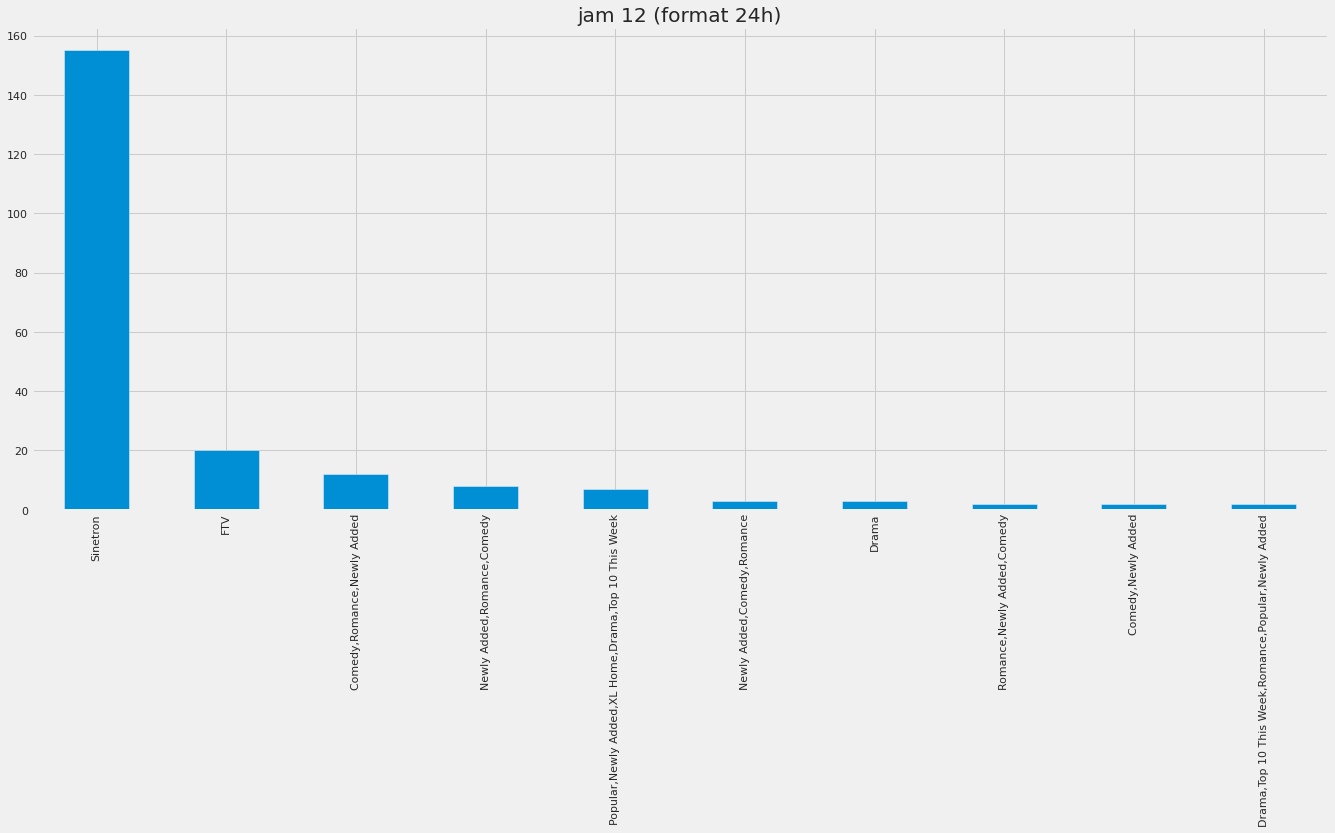

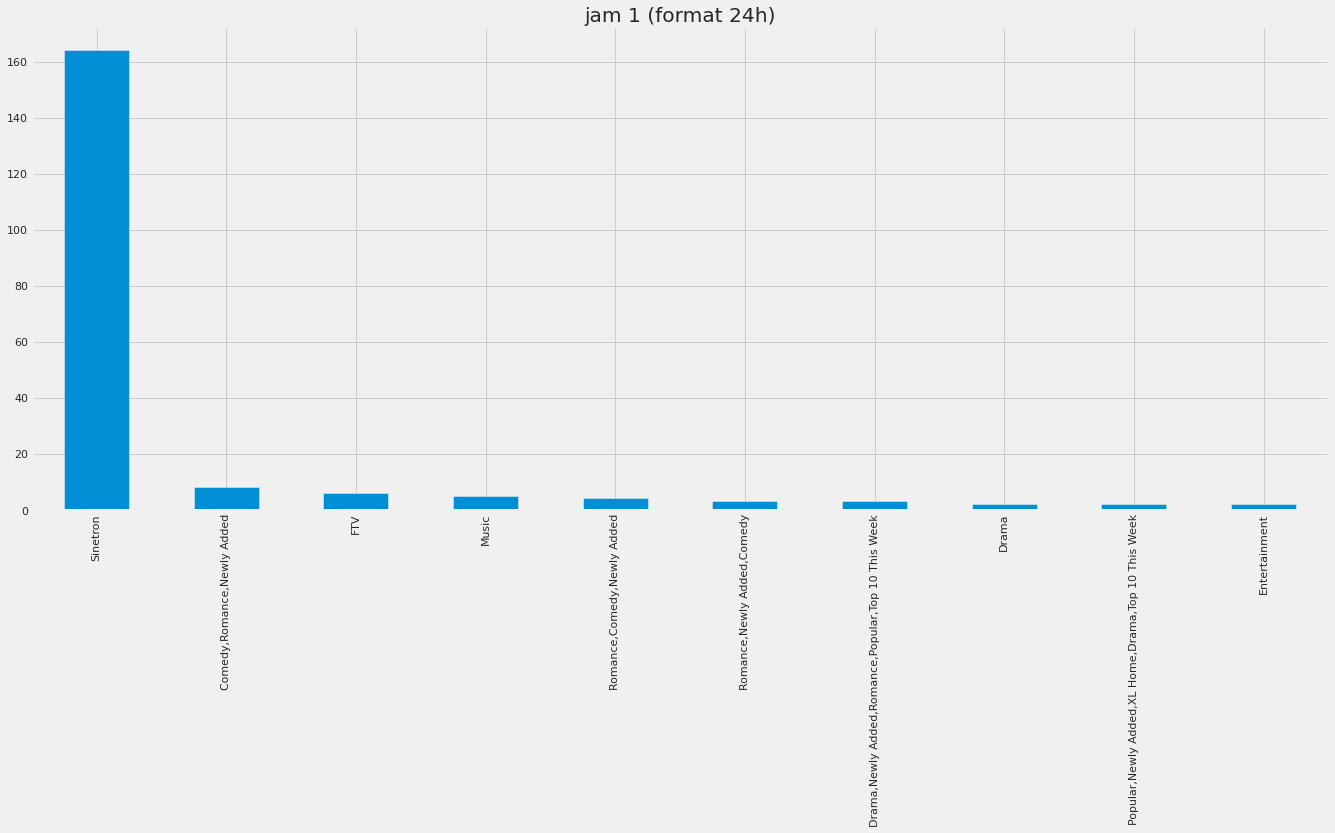

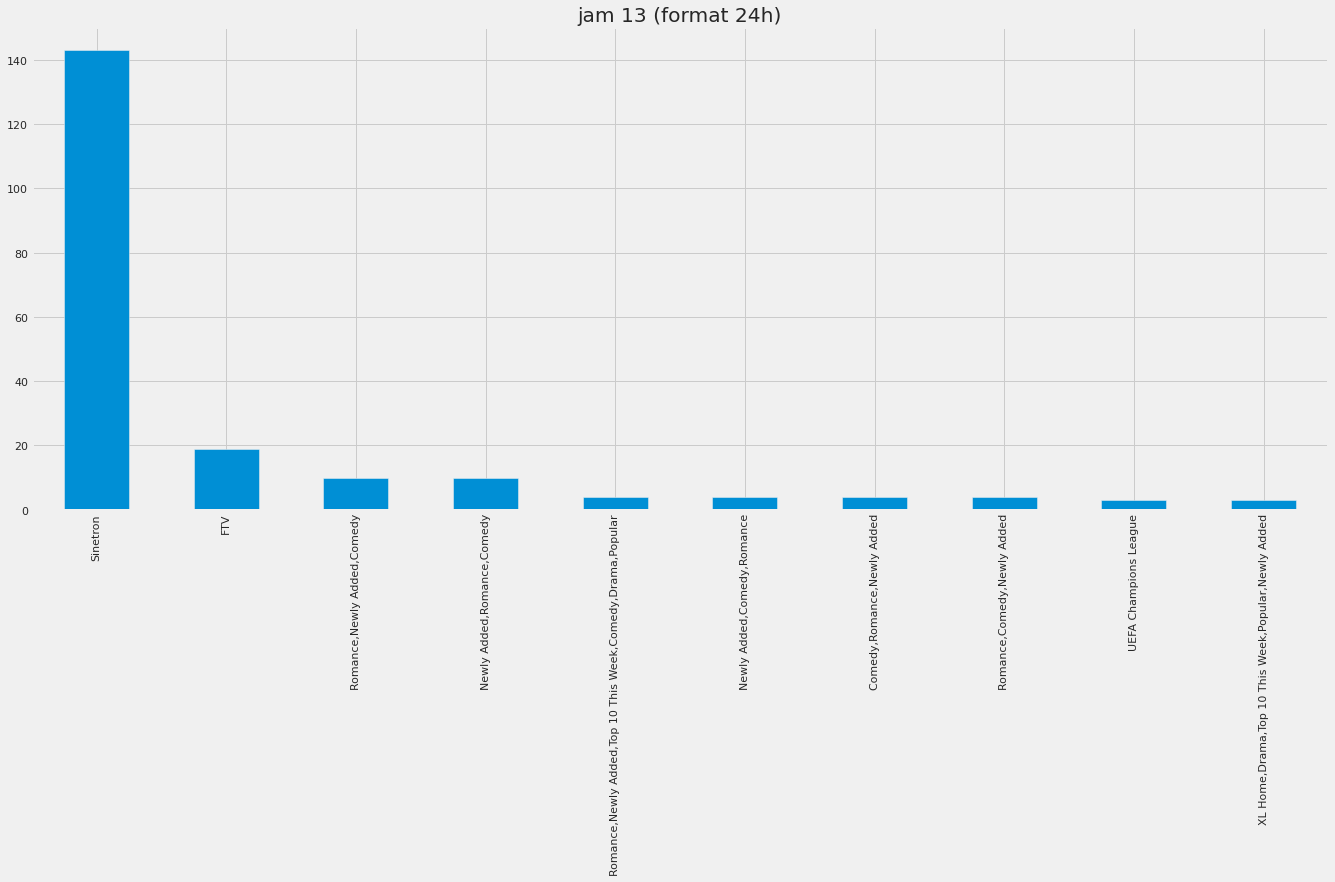

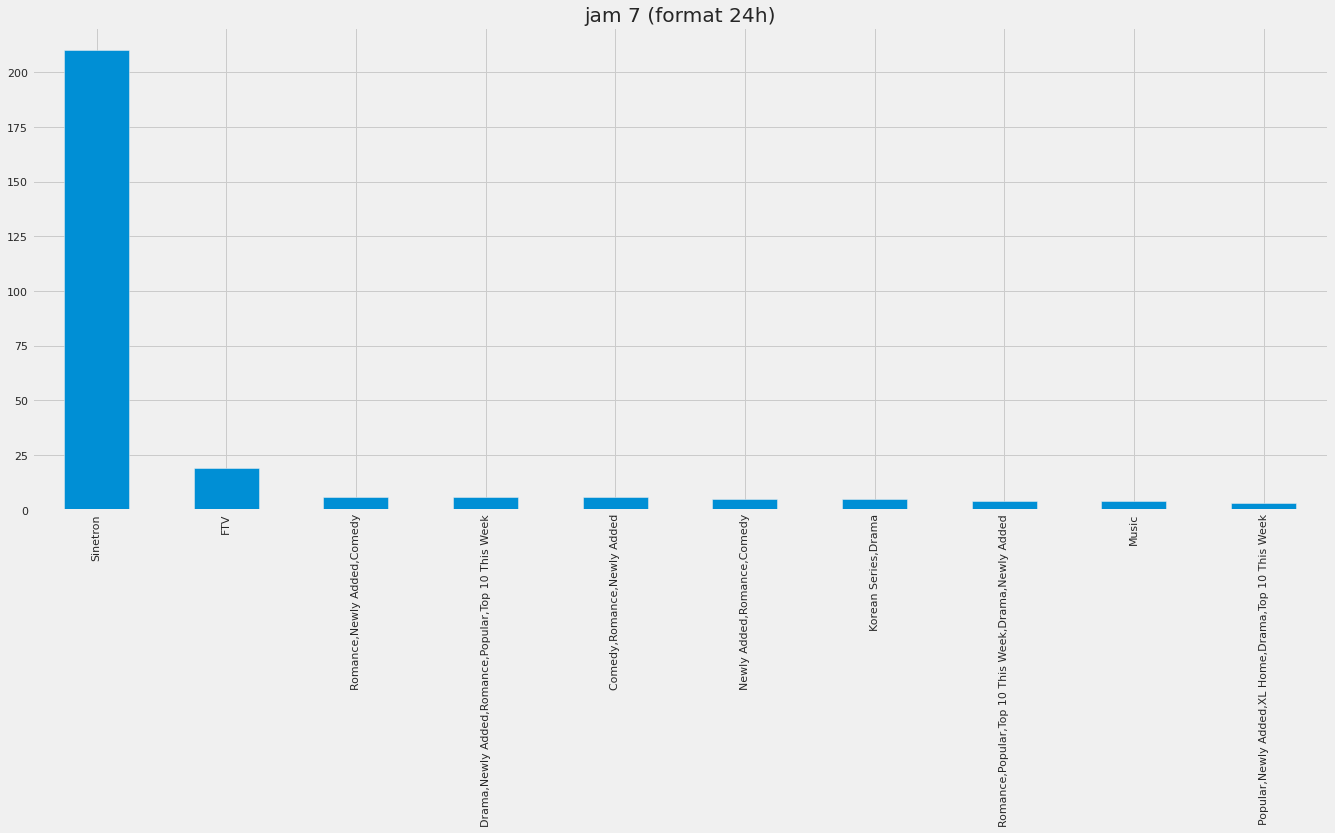

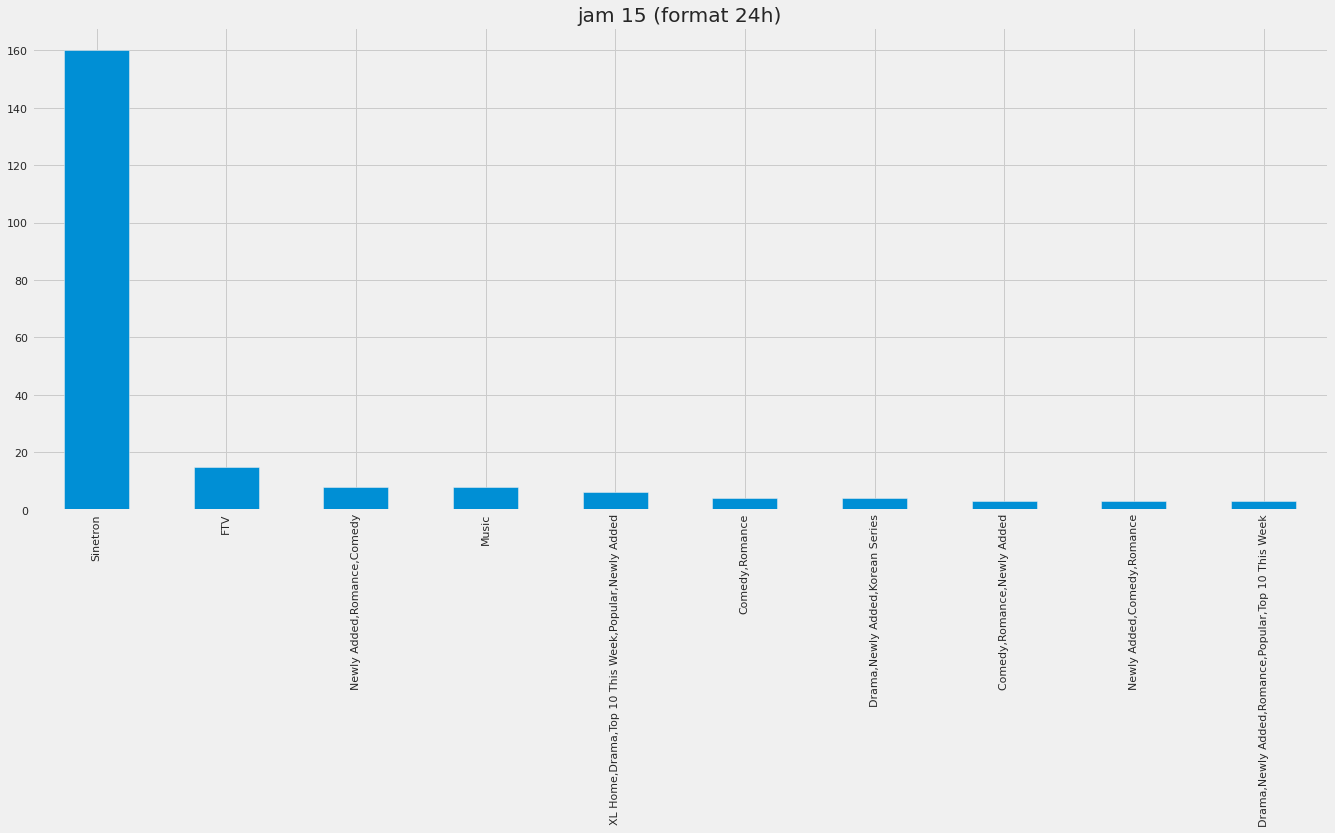

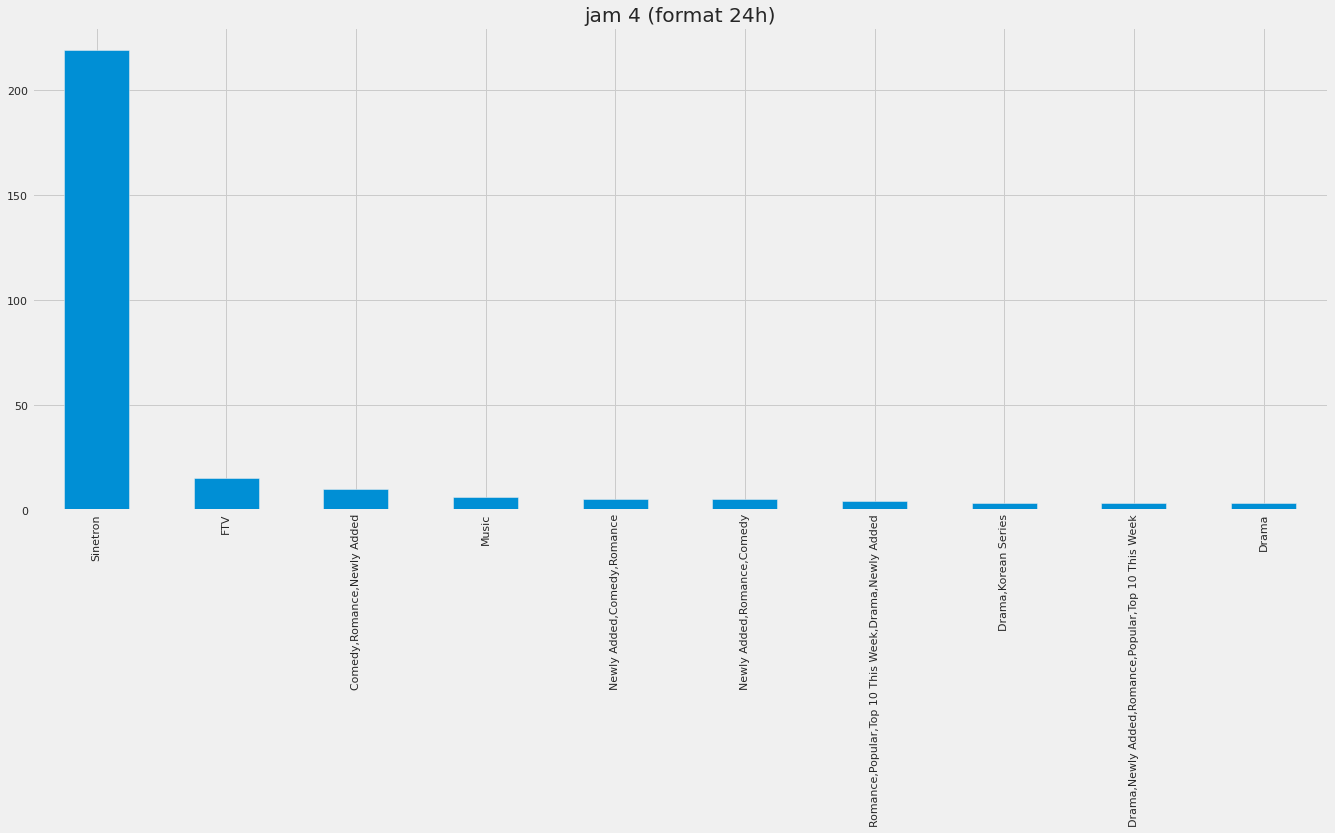

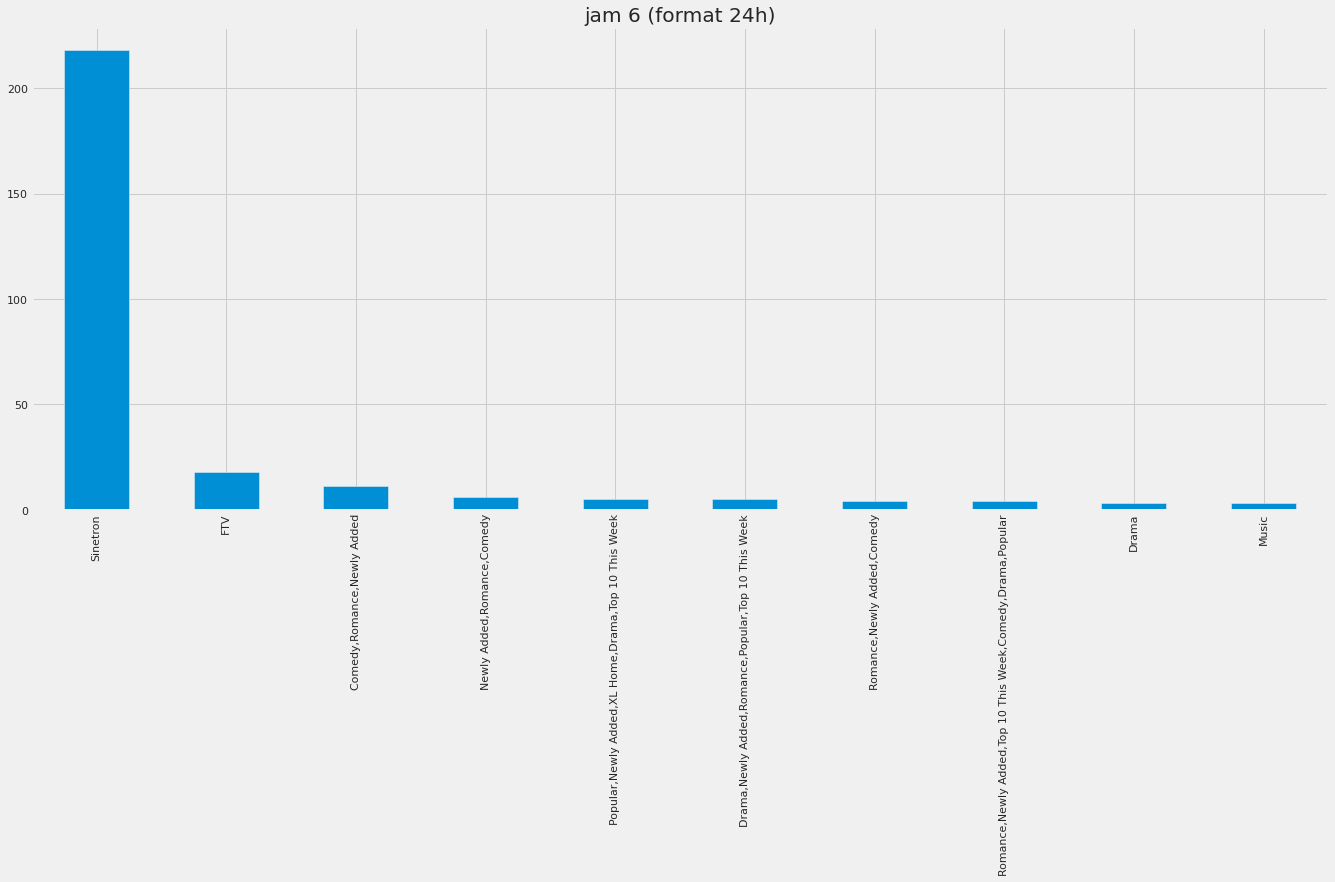

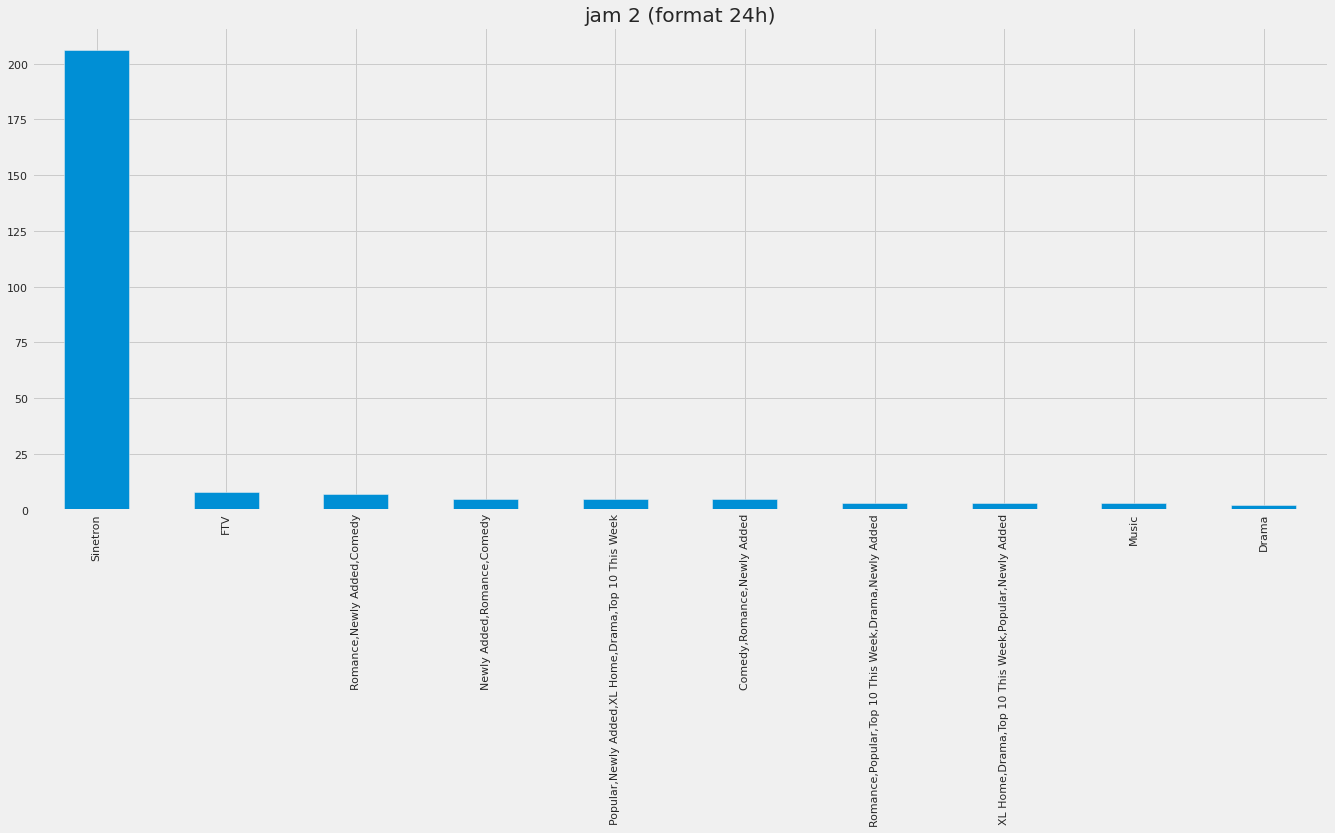

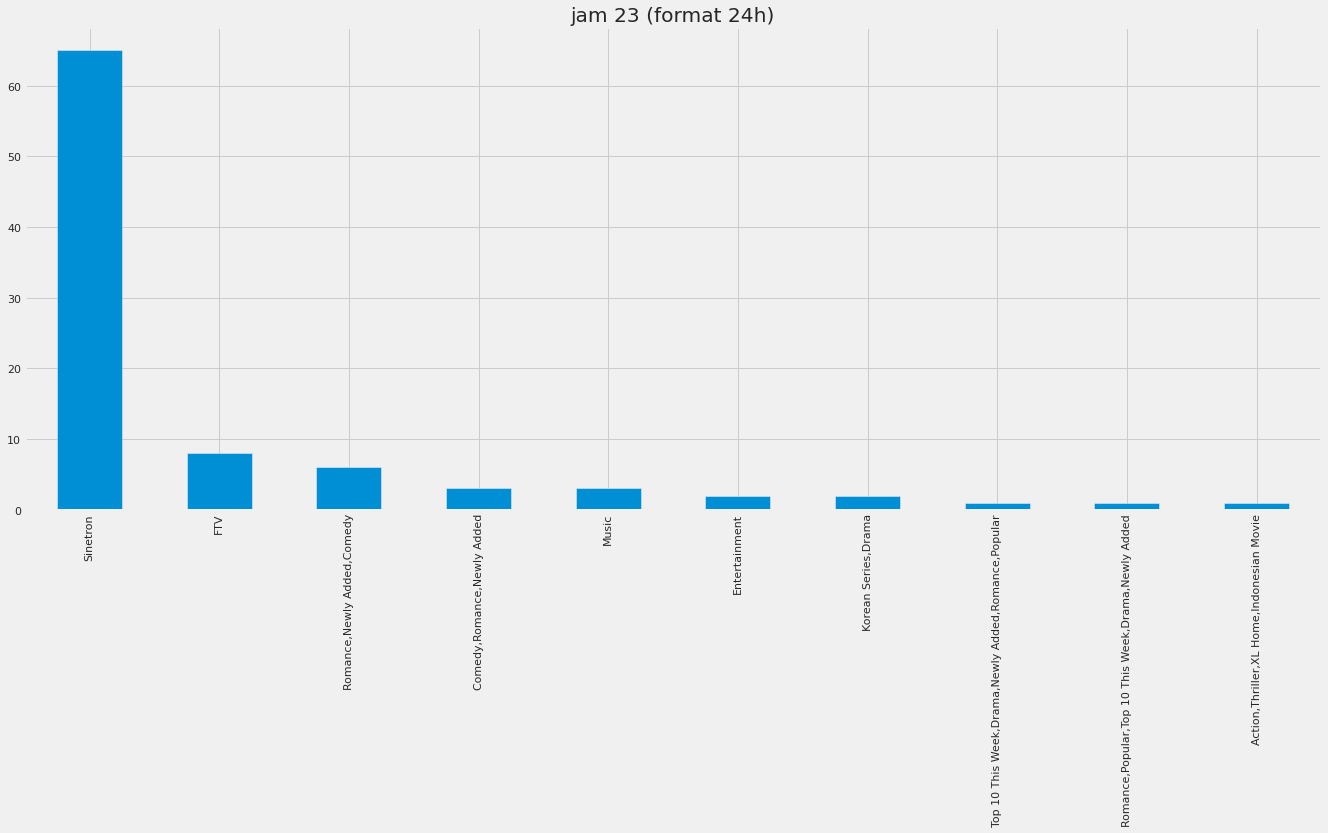

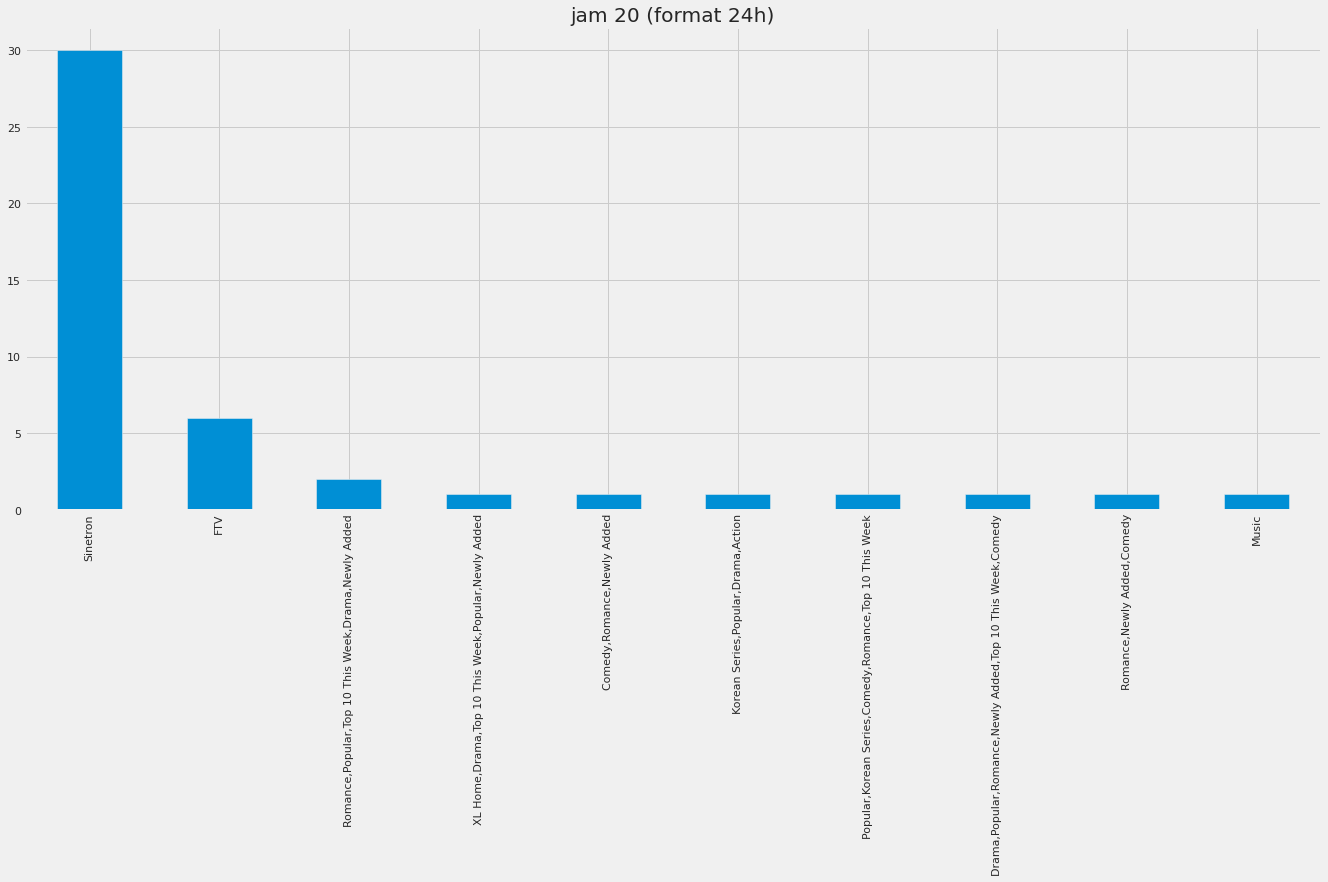

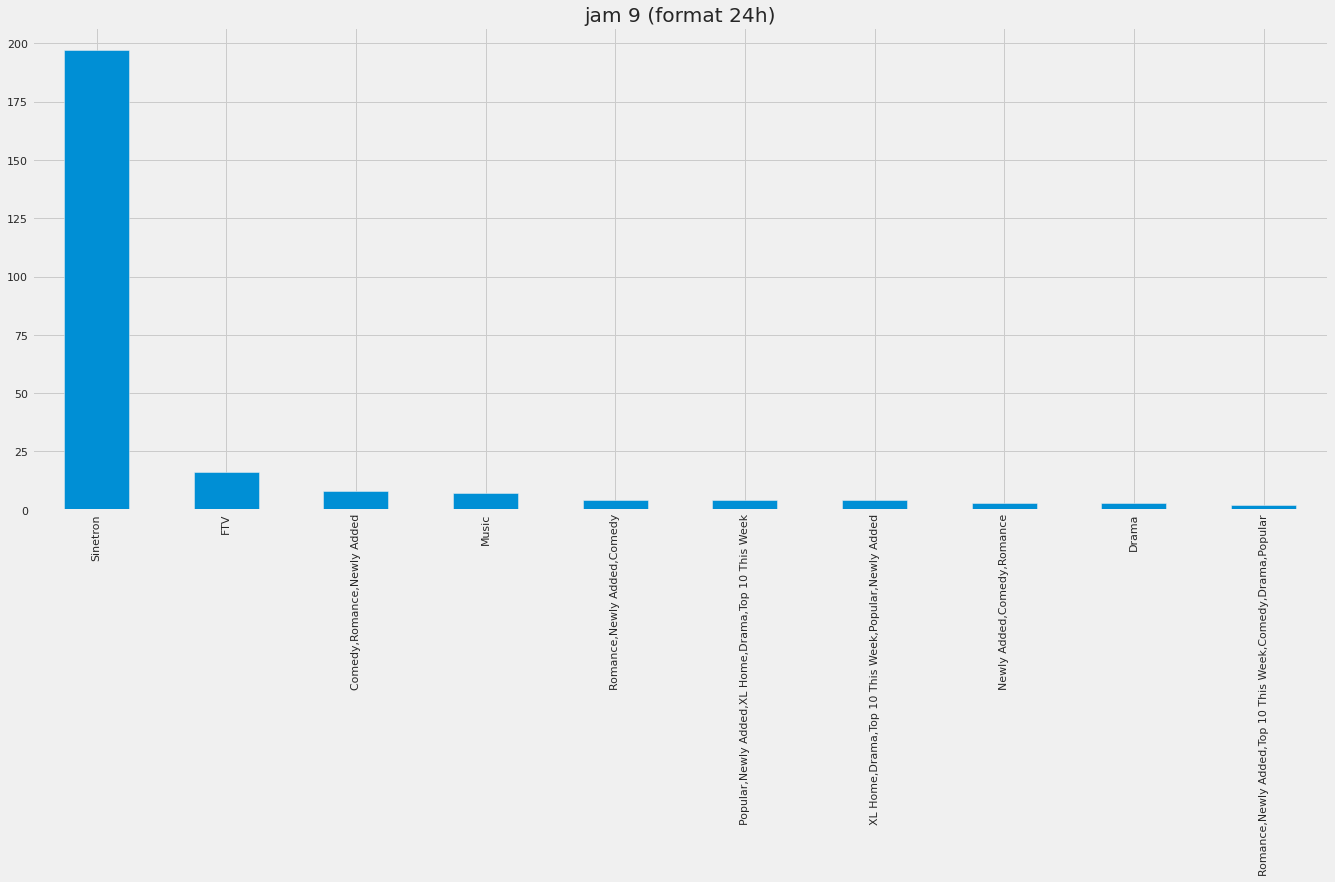

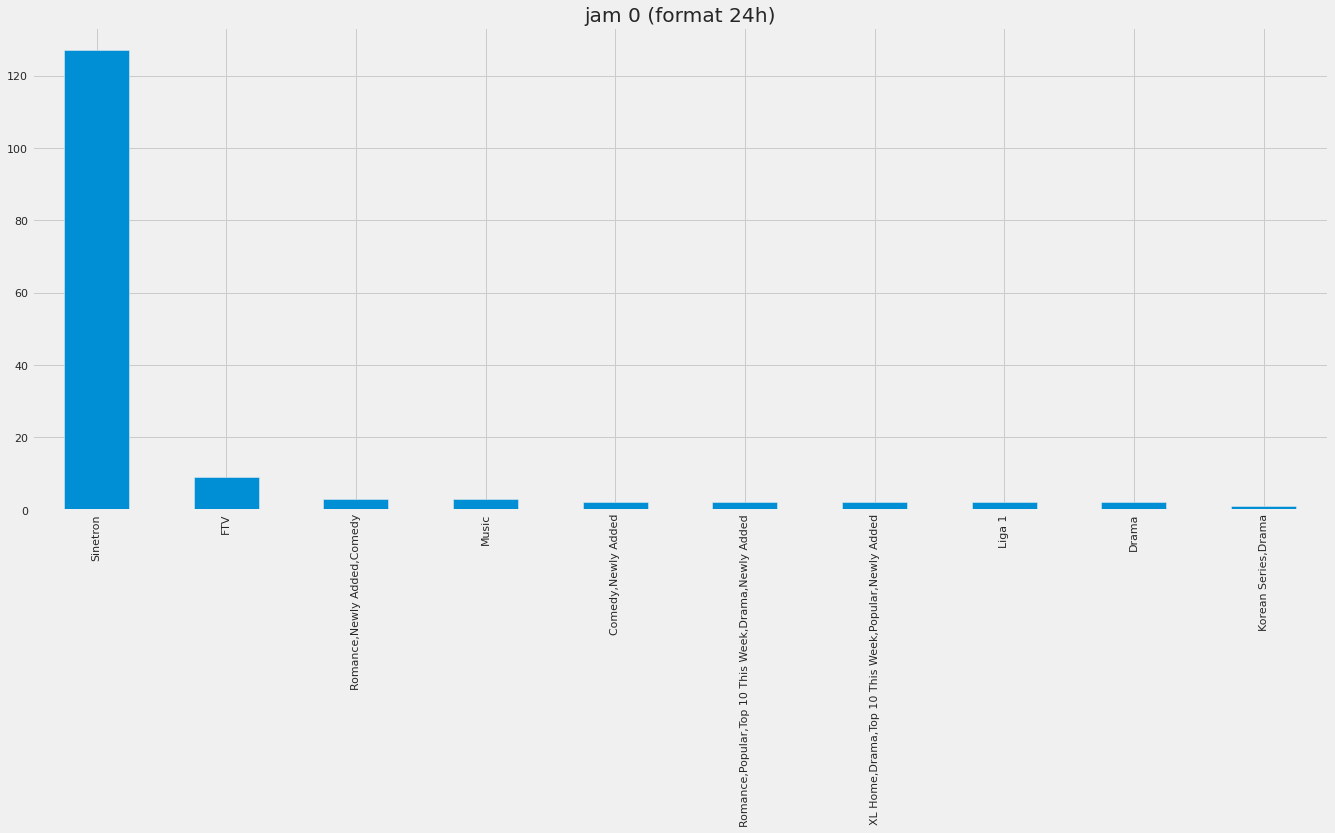

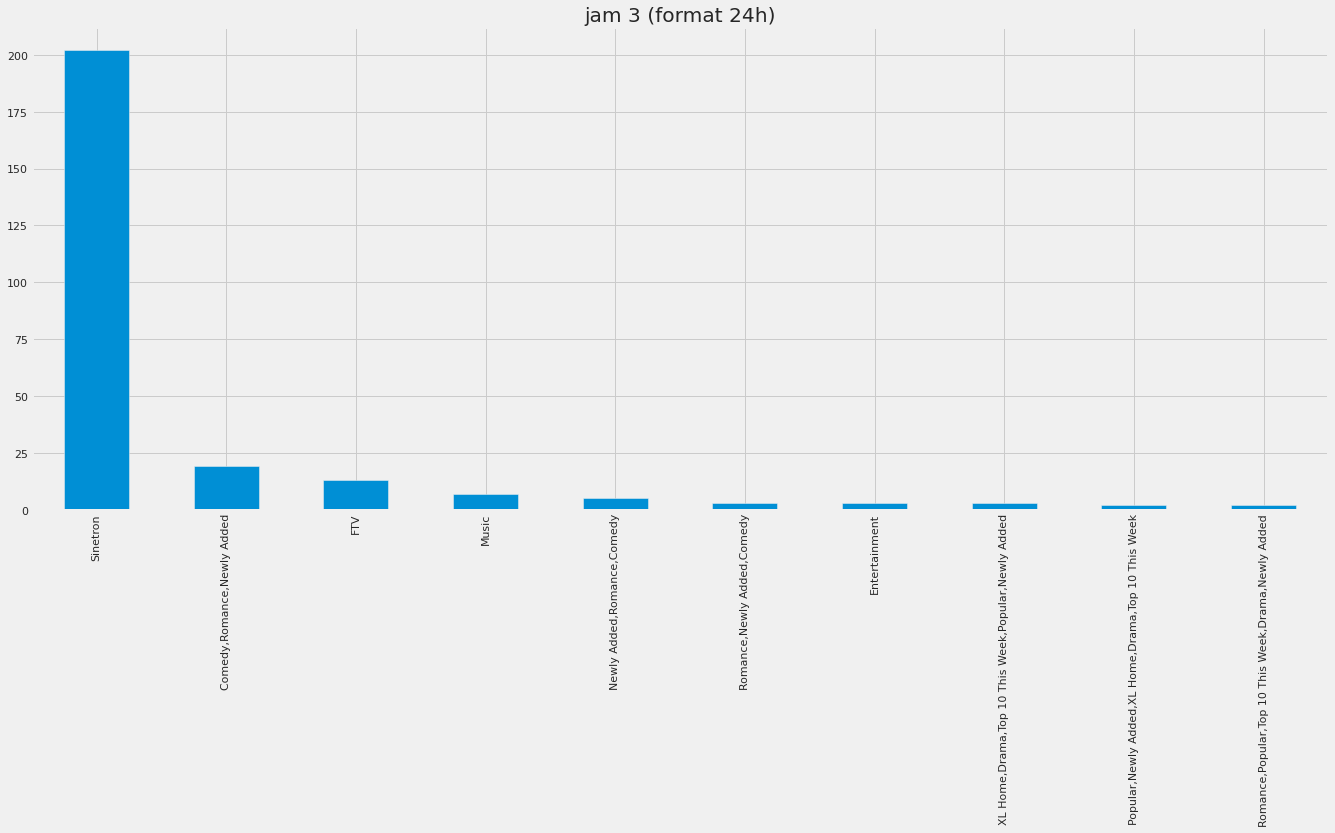

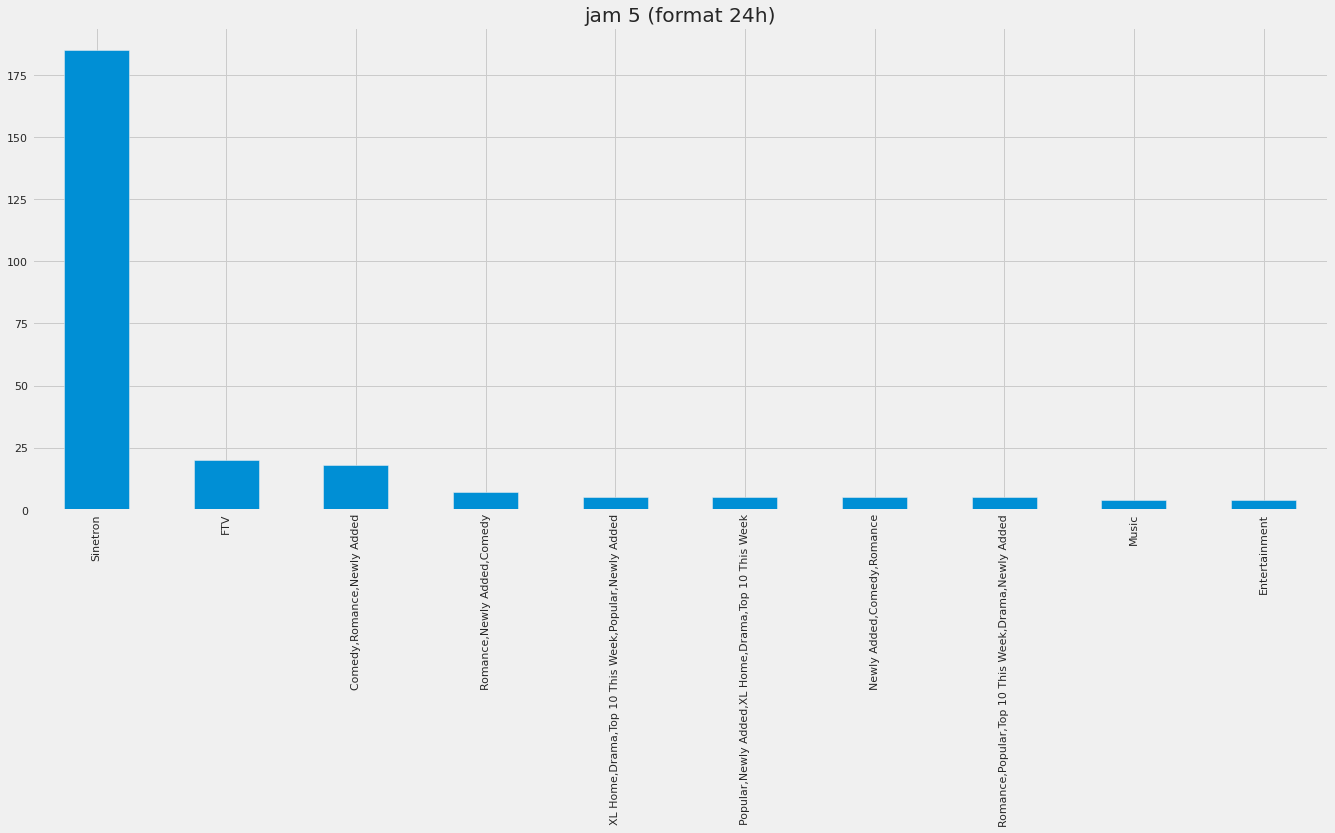

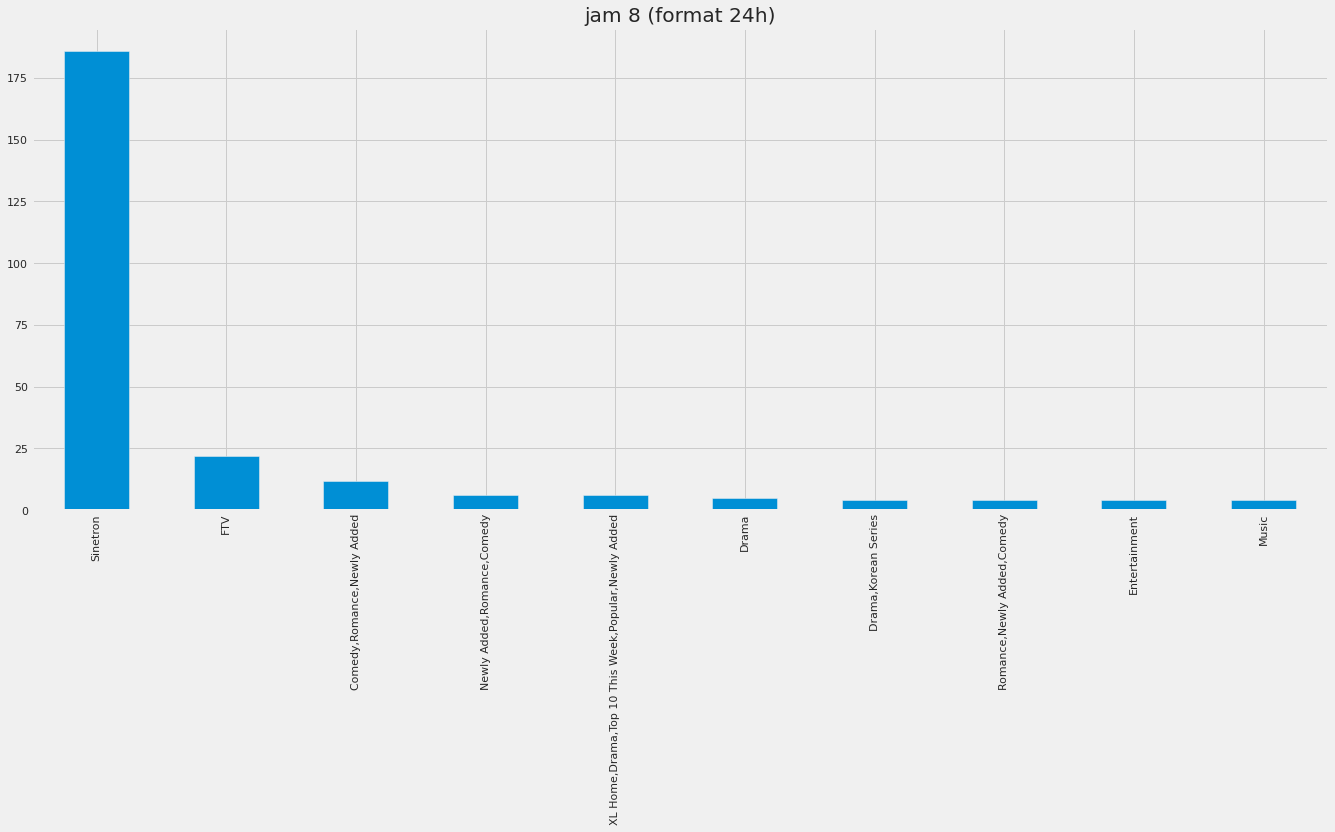

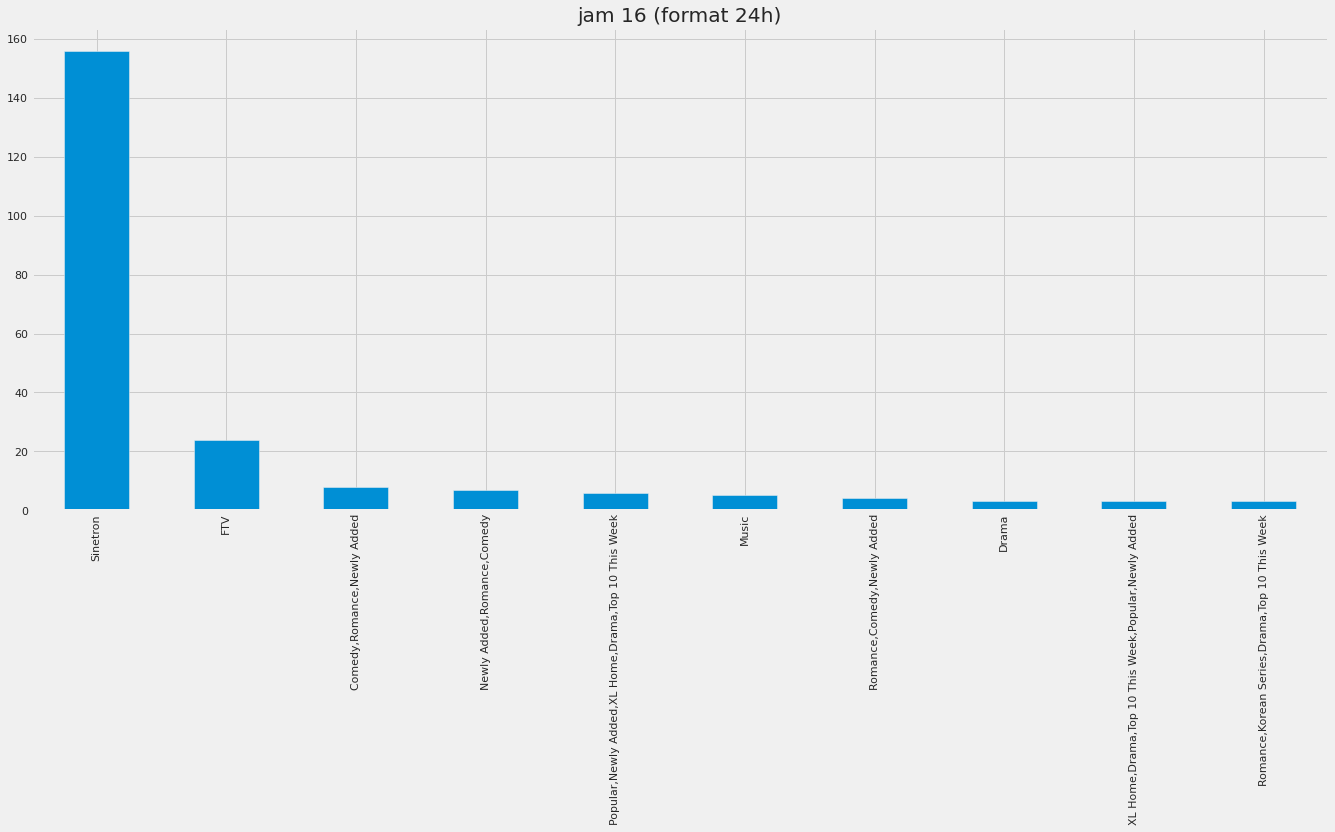

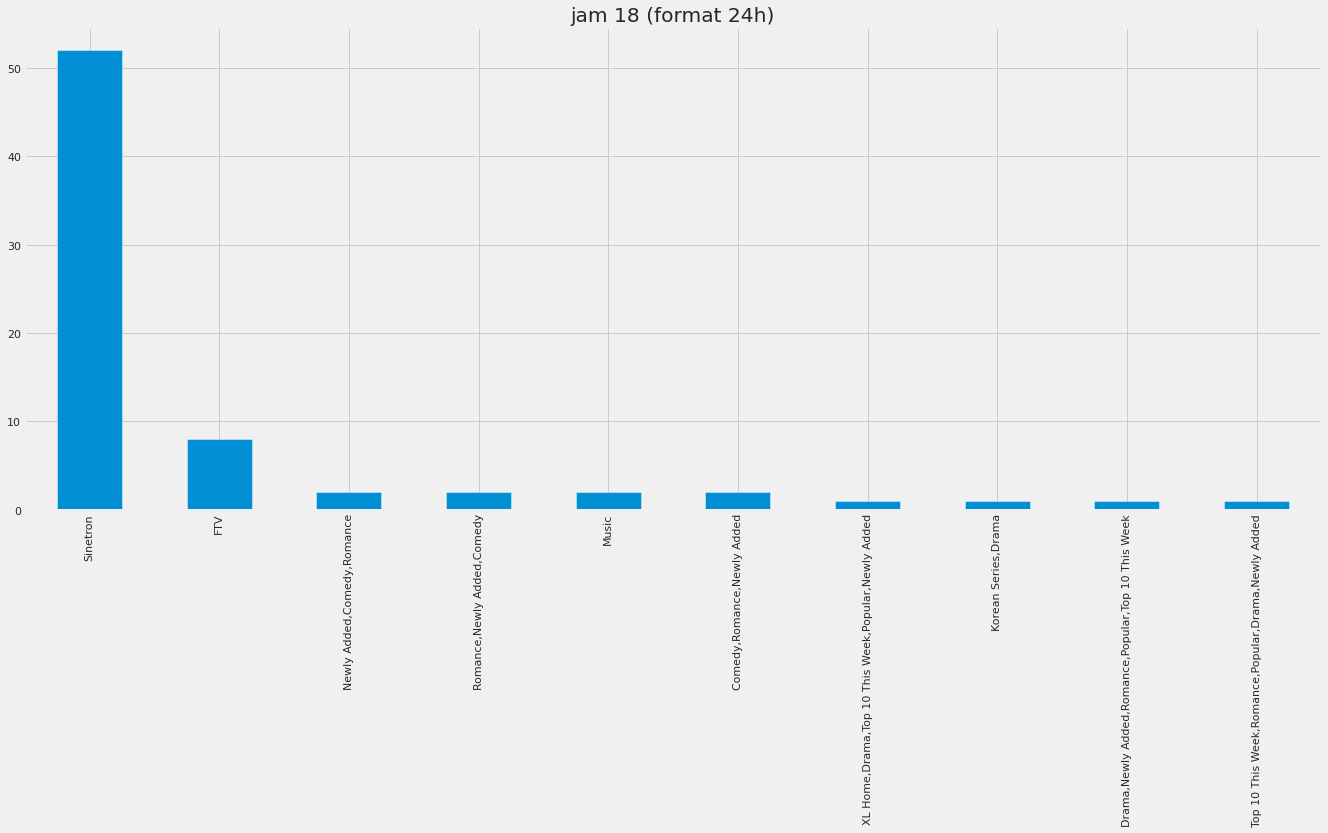

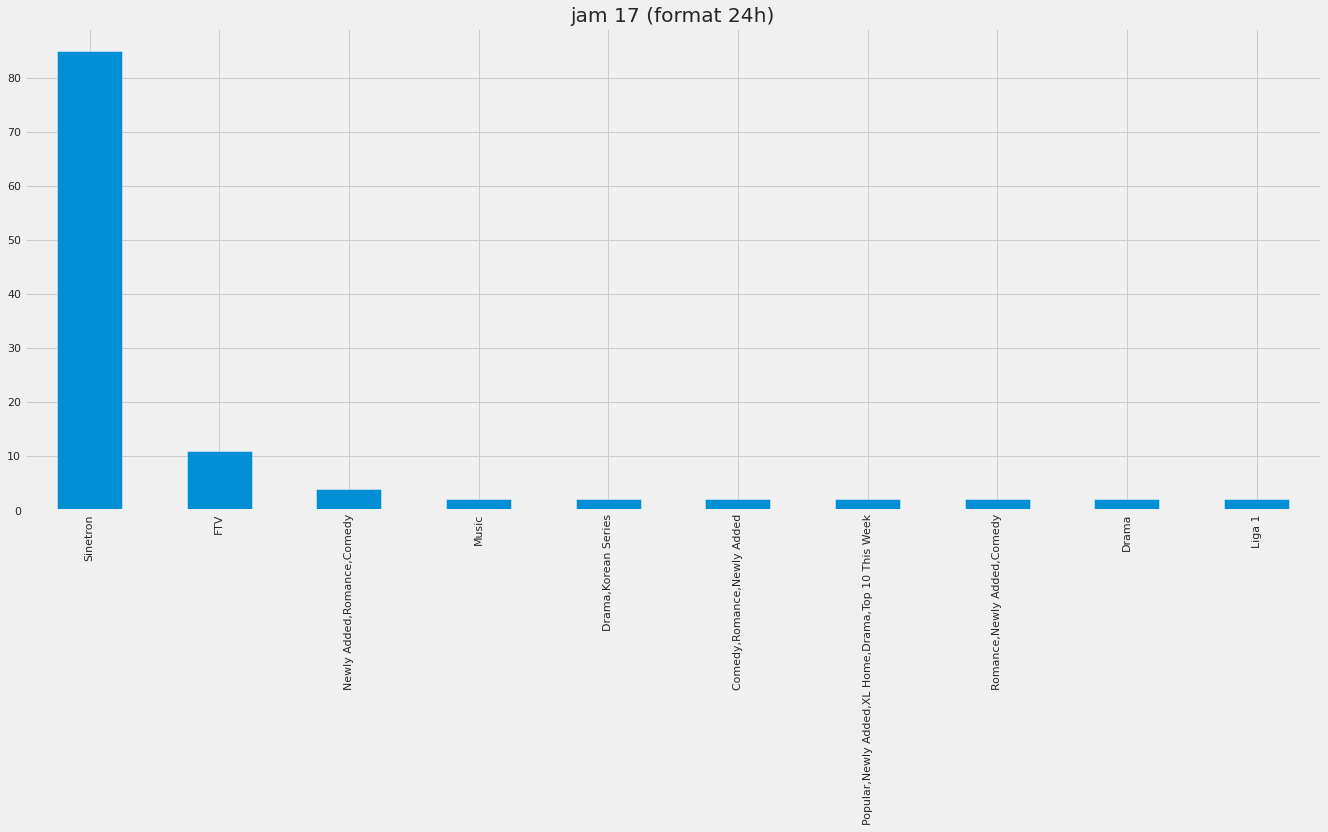

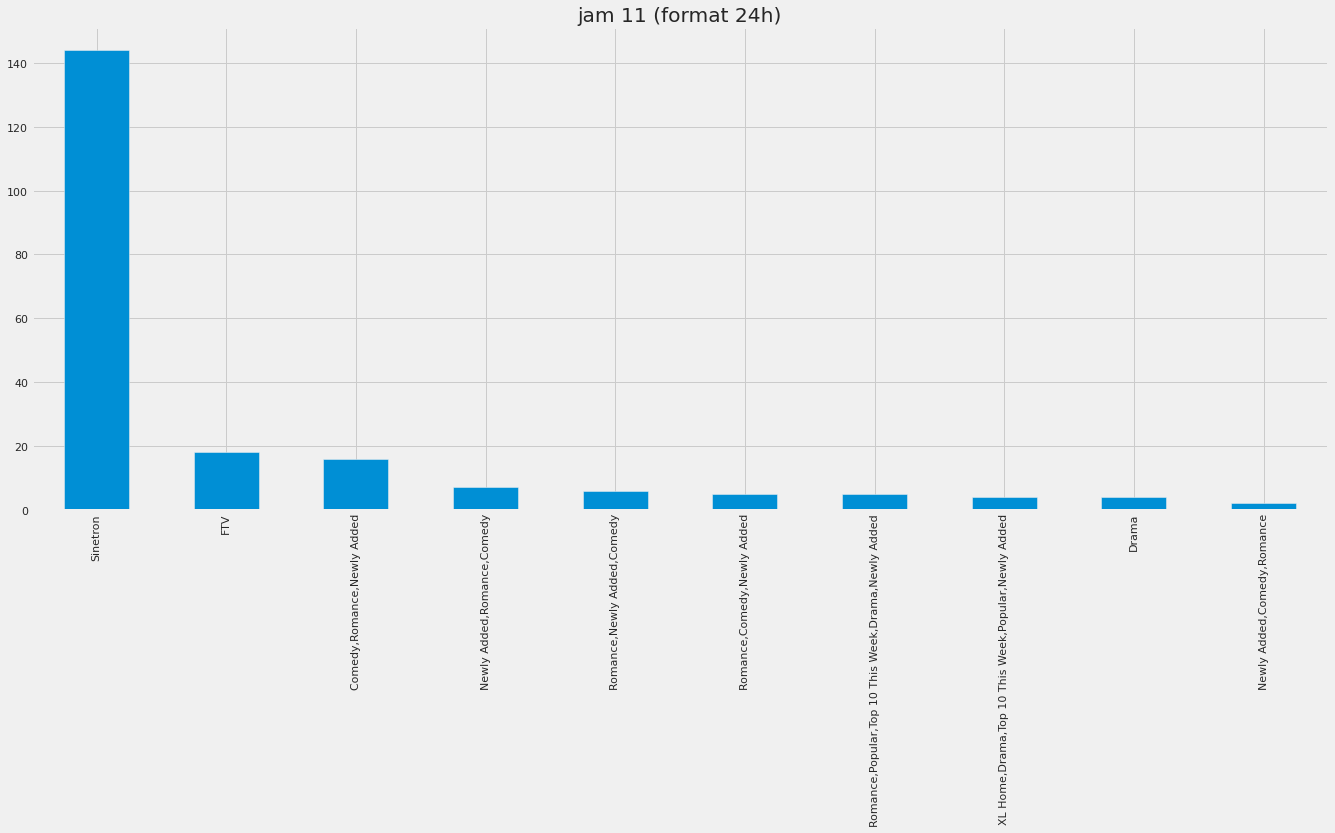

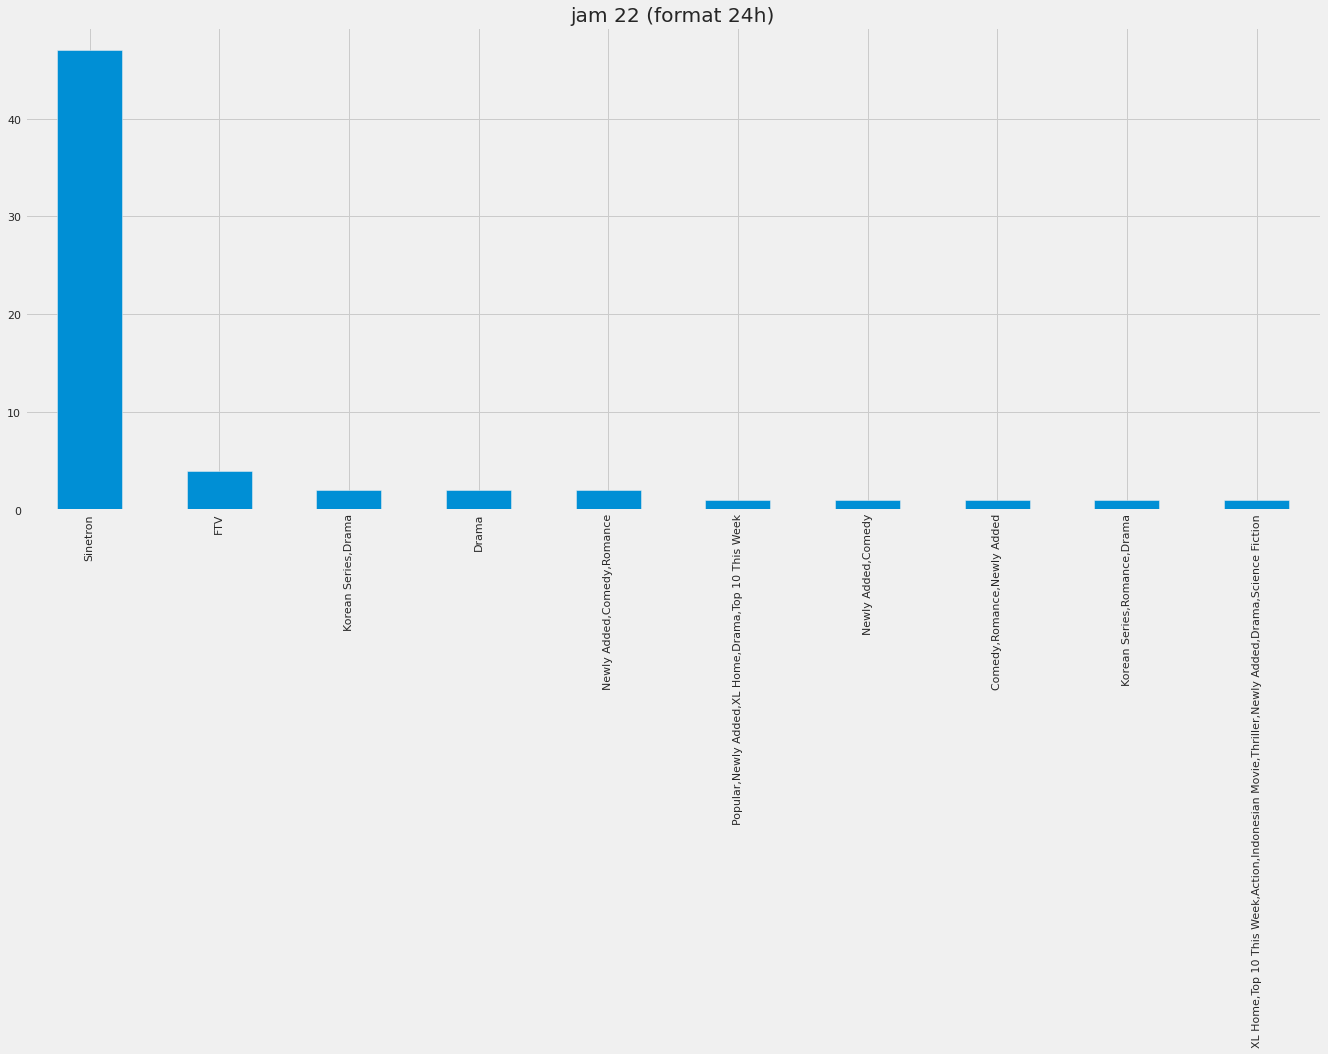

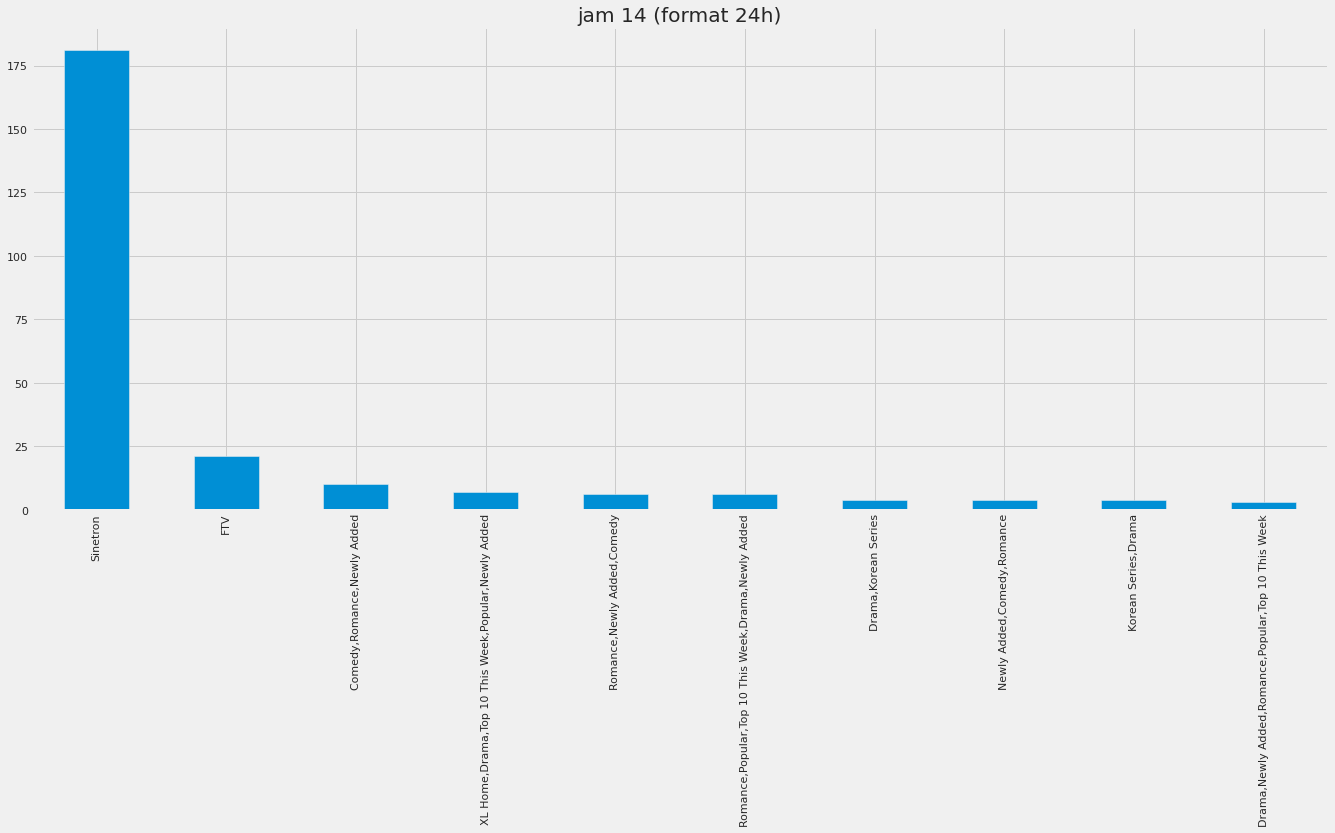

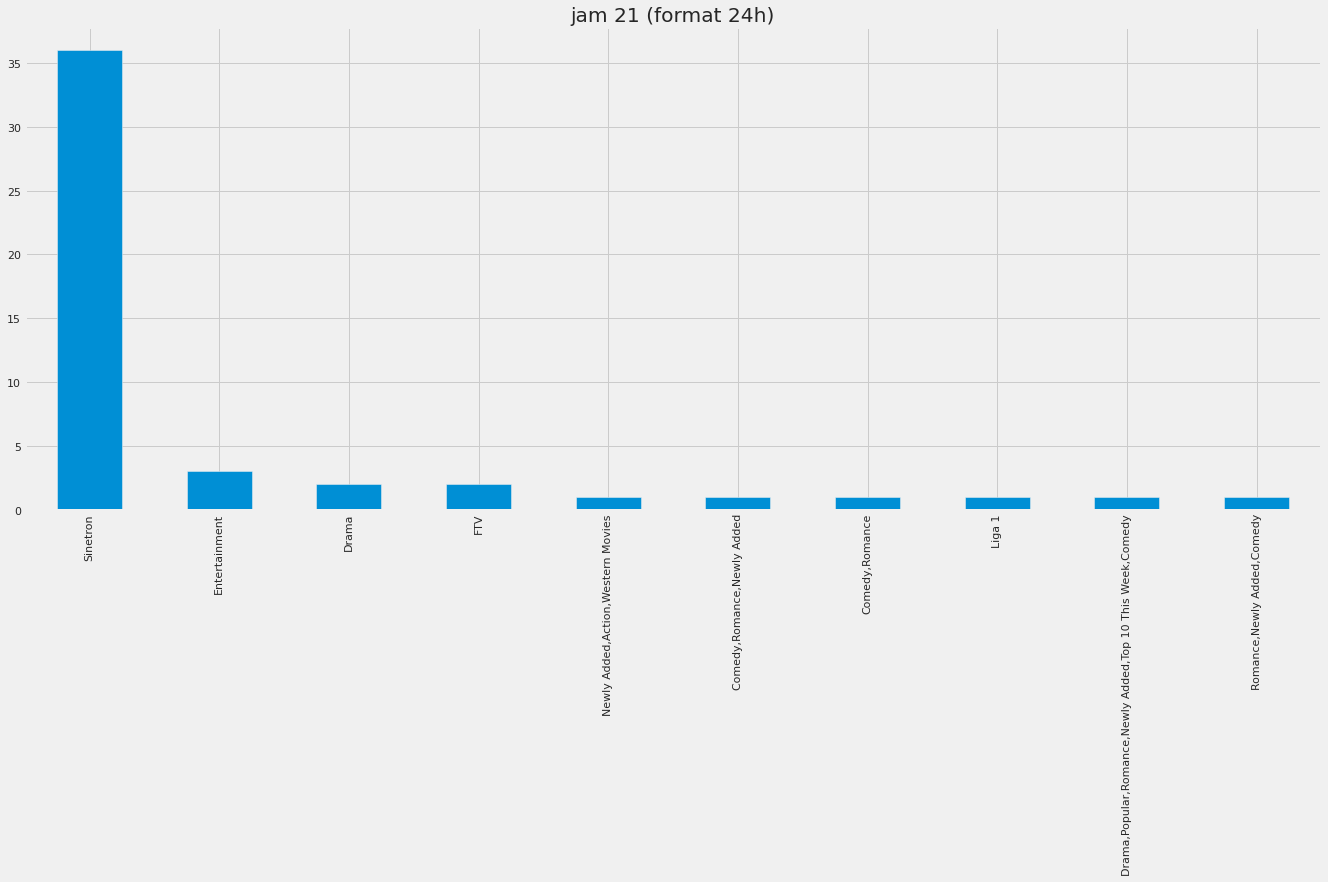

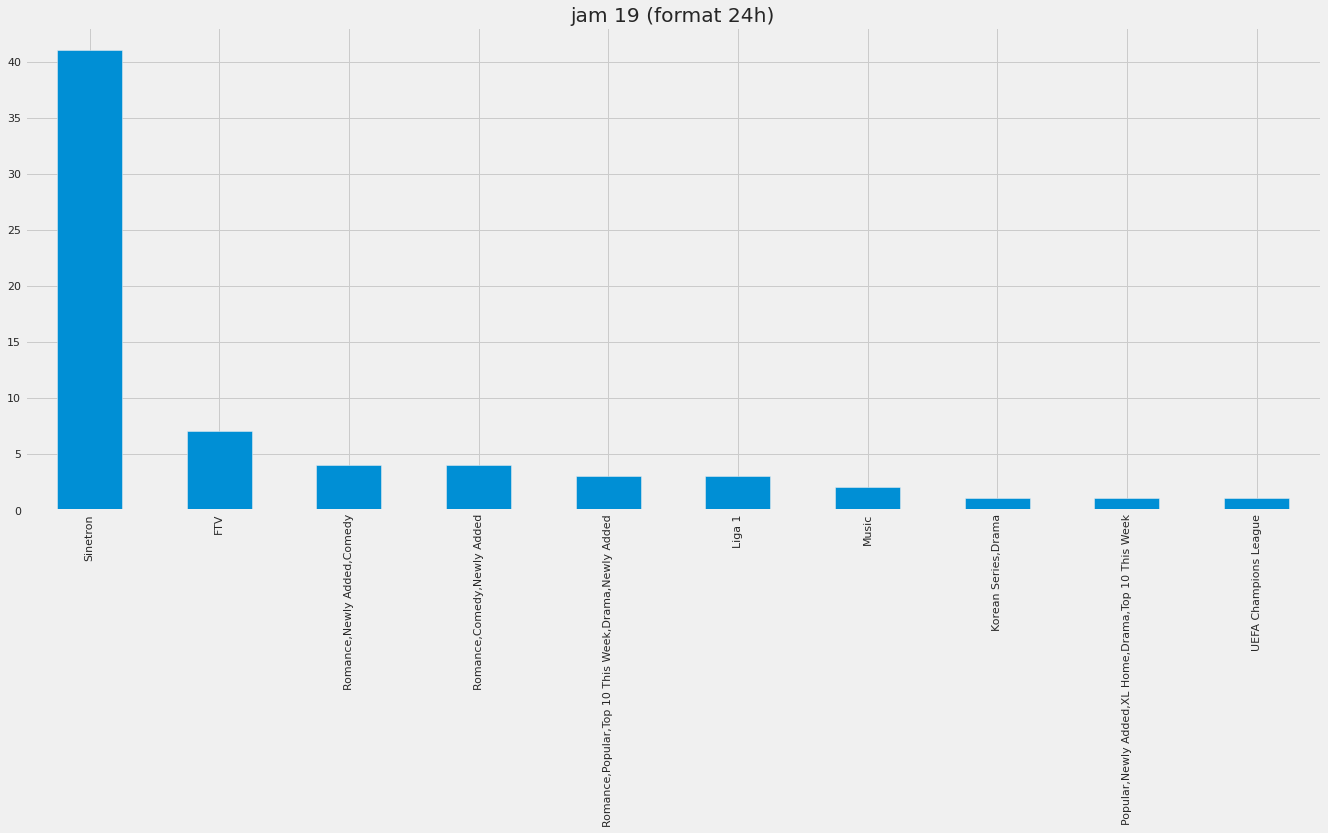

24


In [29]:
i = 0
for time in df['play_time_hour'].unique():
    df[df['play_time_hour']==time]['genre_name'].value_counts().head(10).plot.bar()
    plt.title(f'jam {time} (format 24h)')
    plt.show()
    i+=1
print(i)

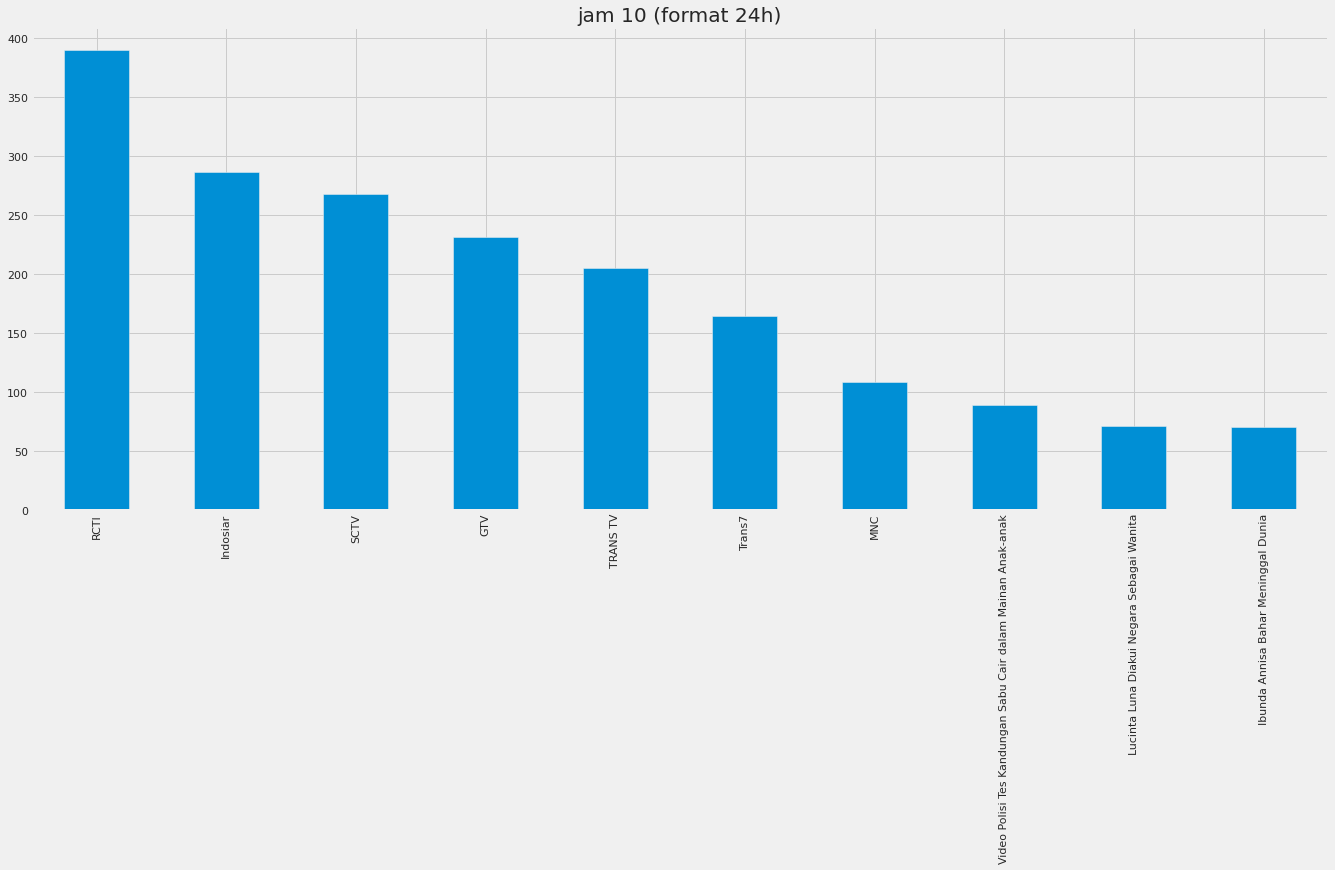

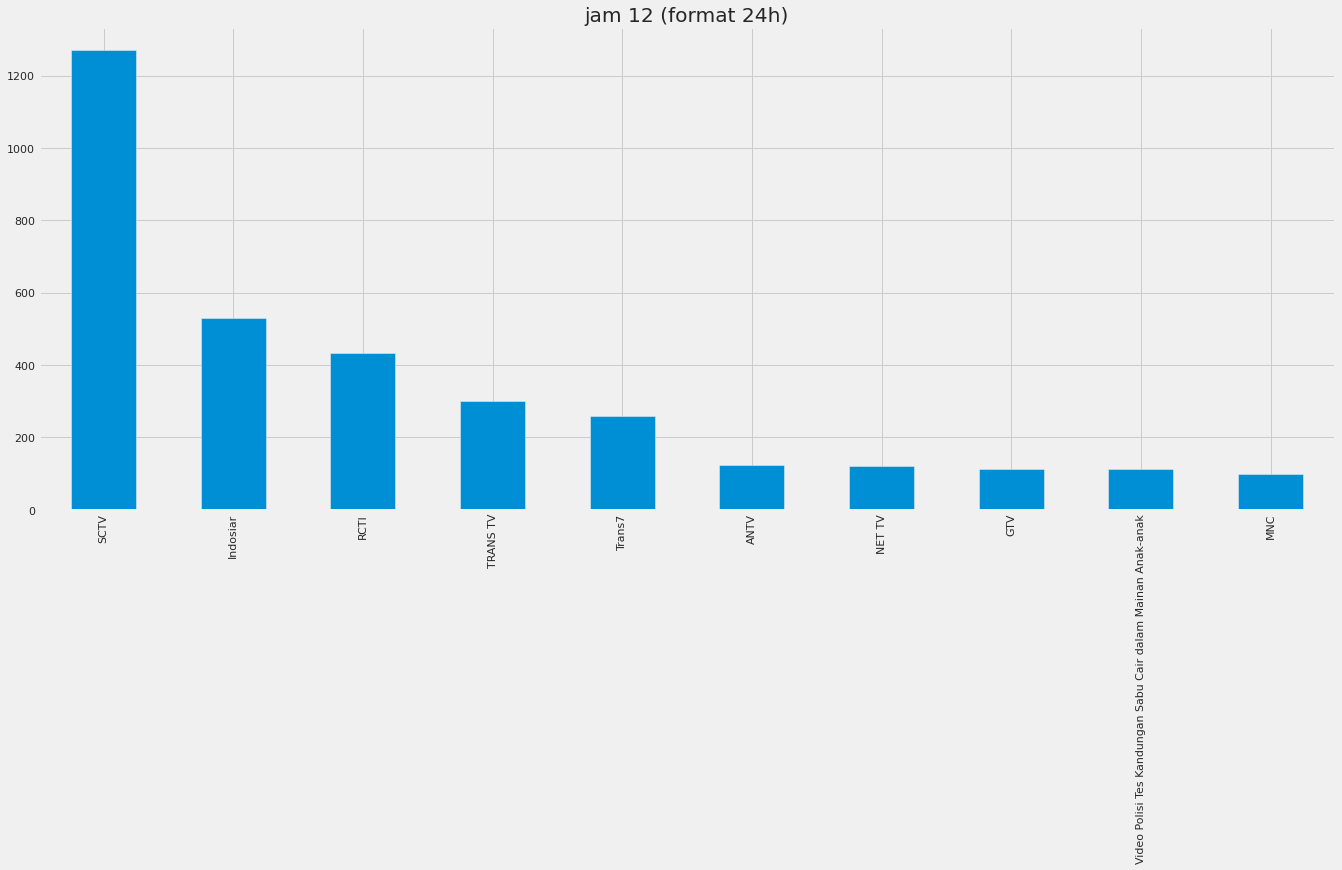

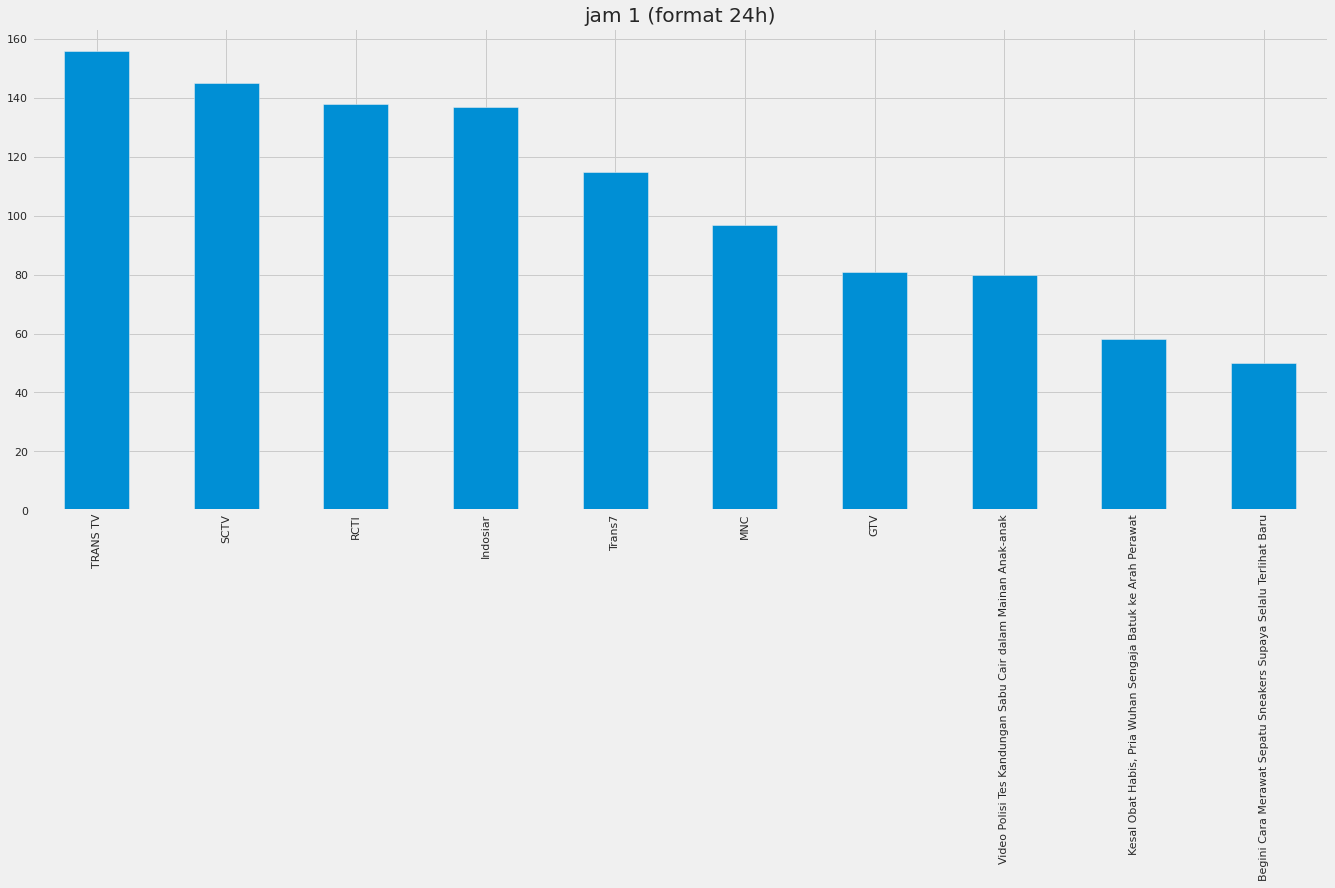

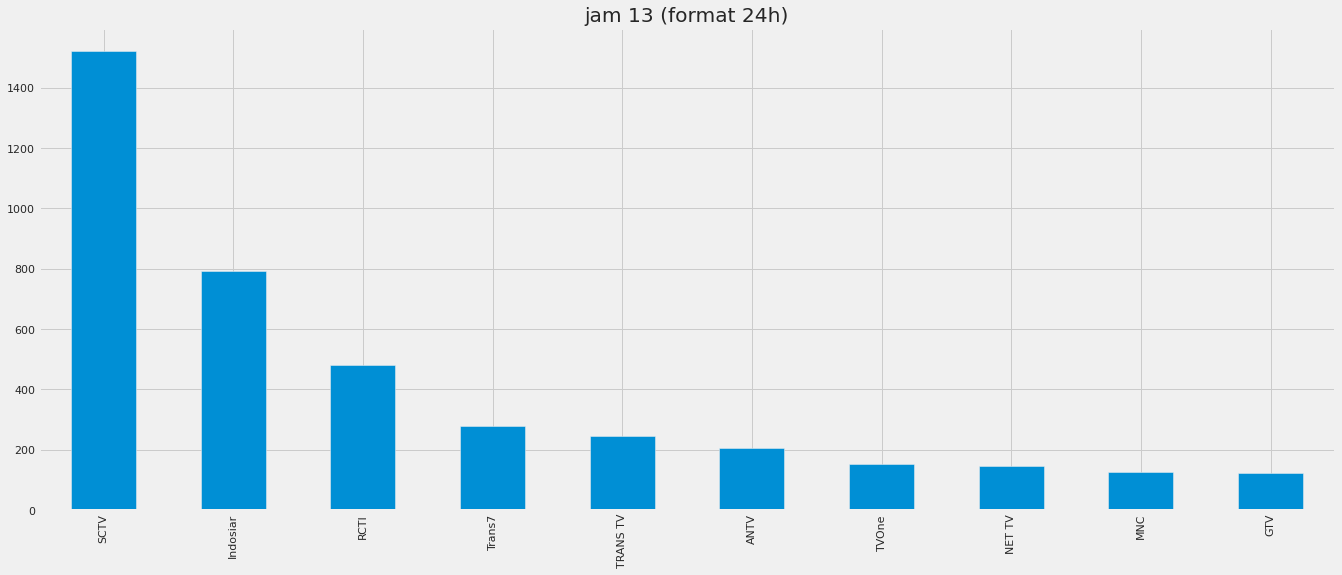

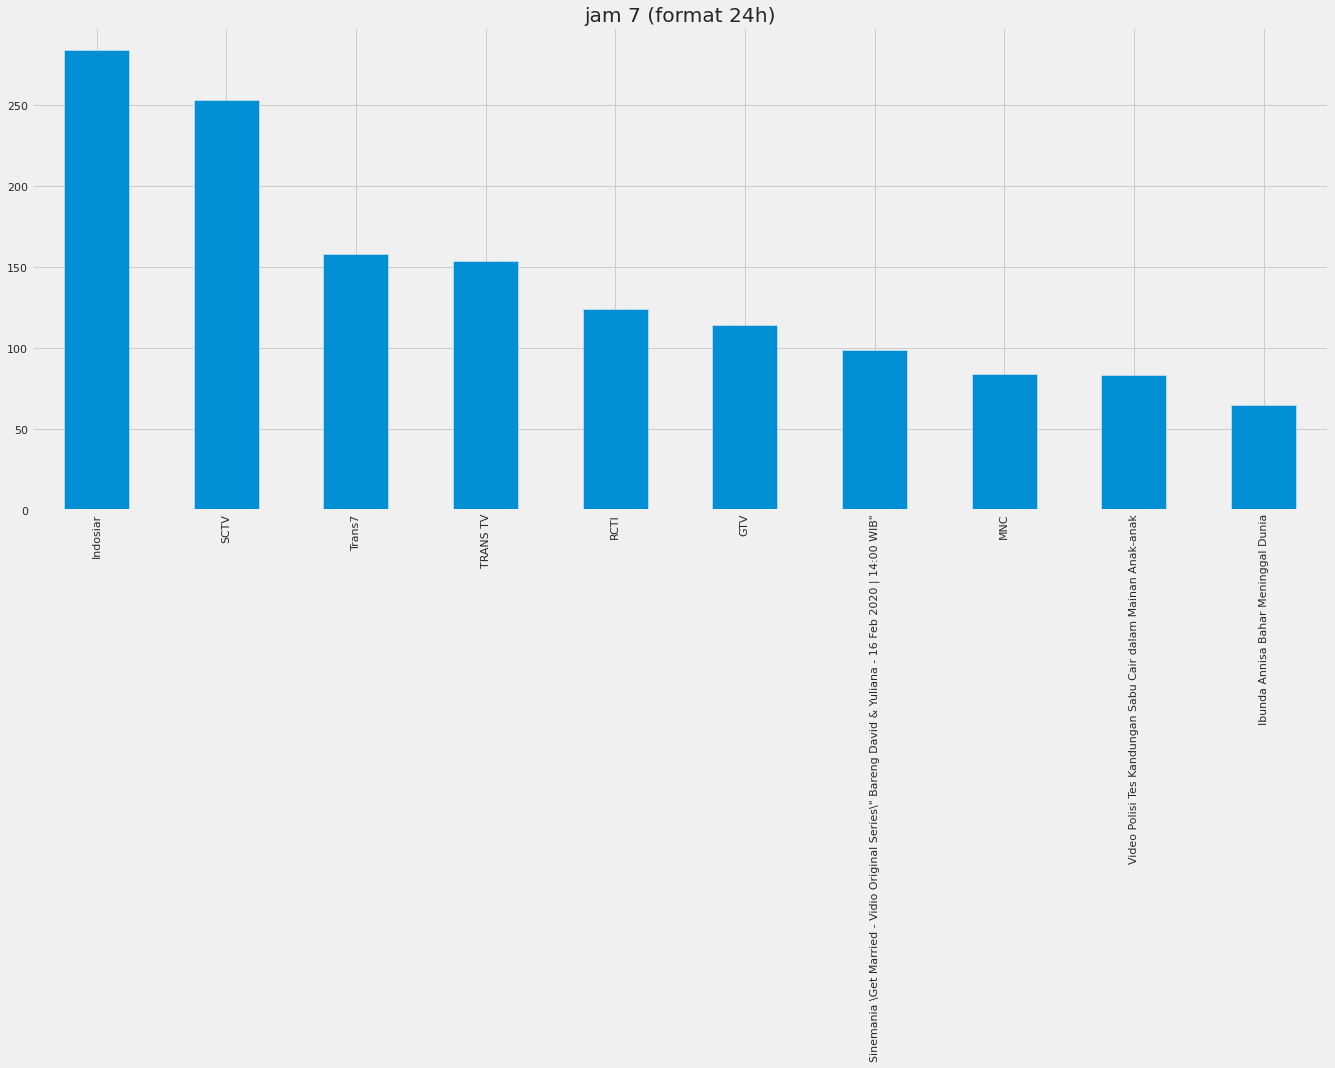

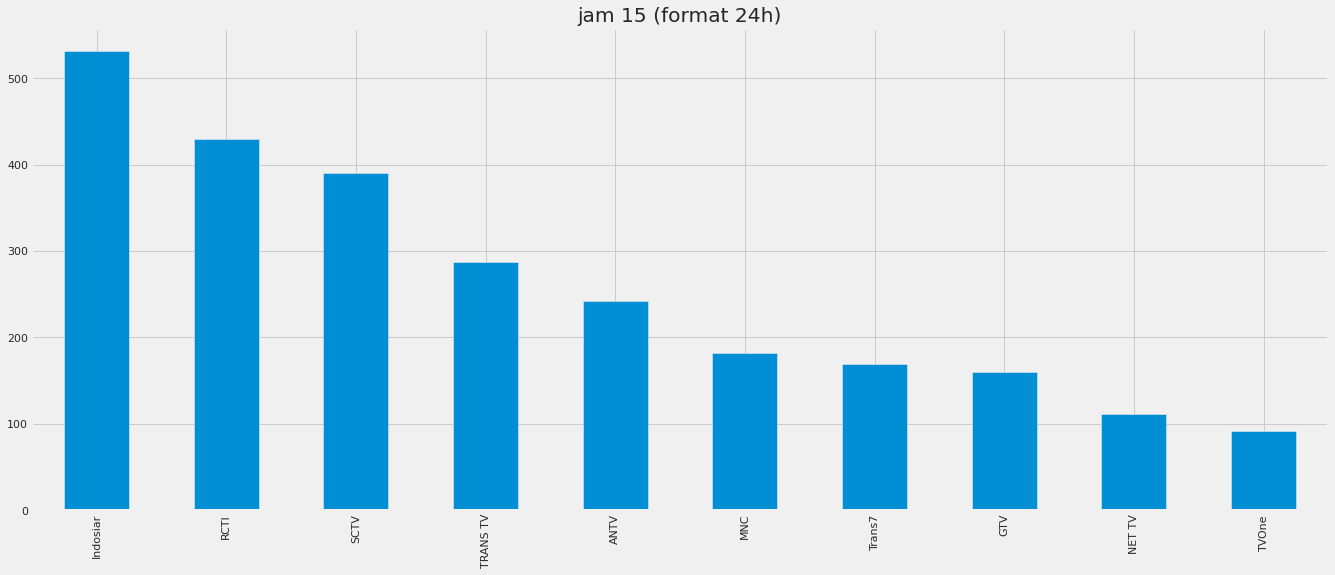

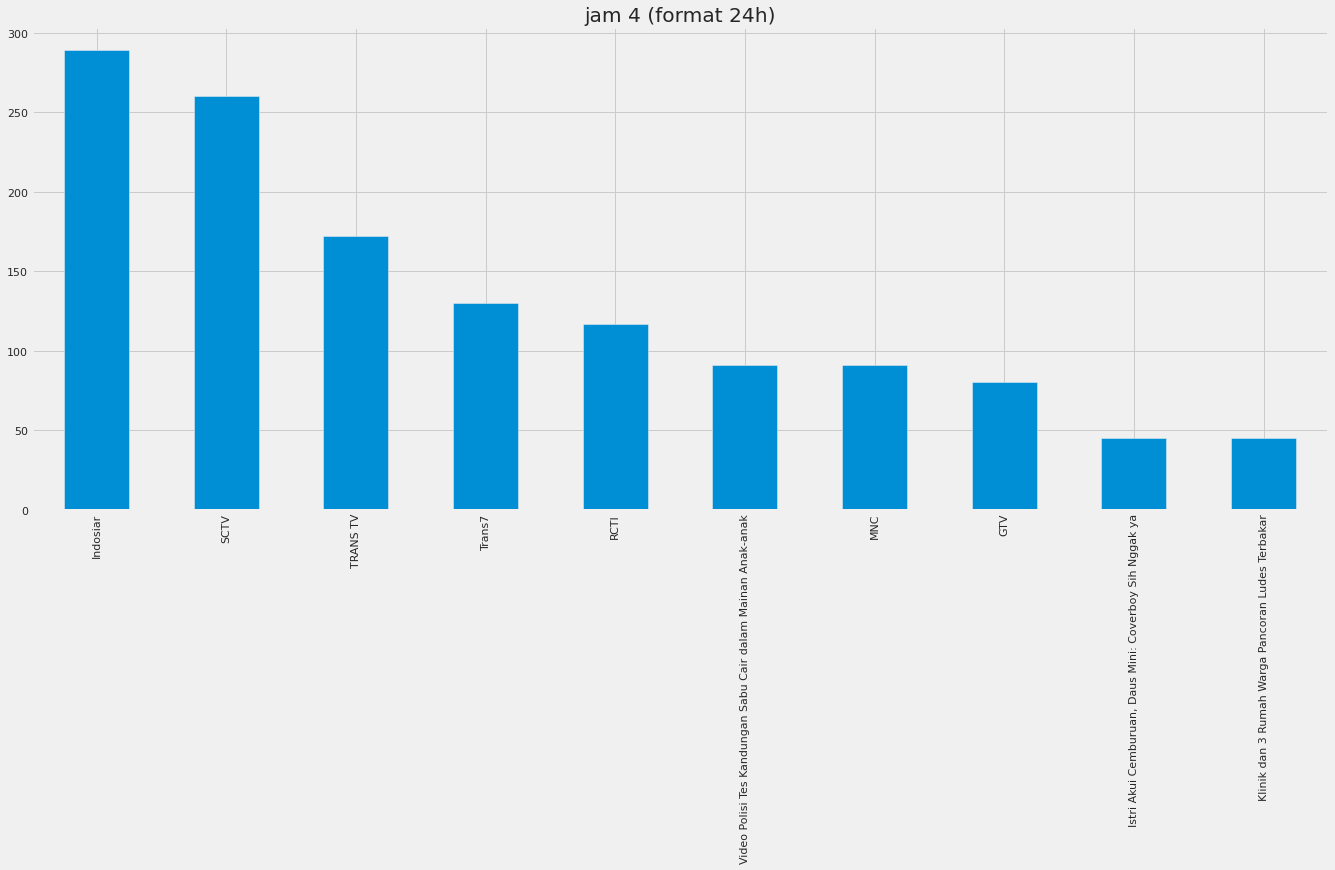

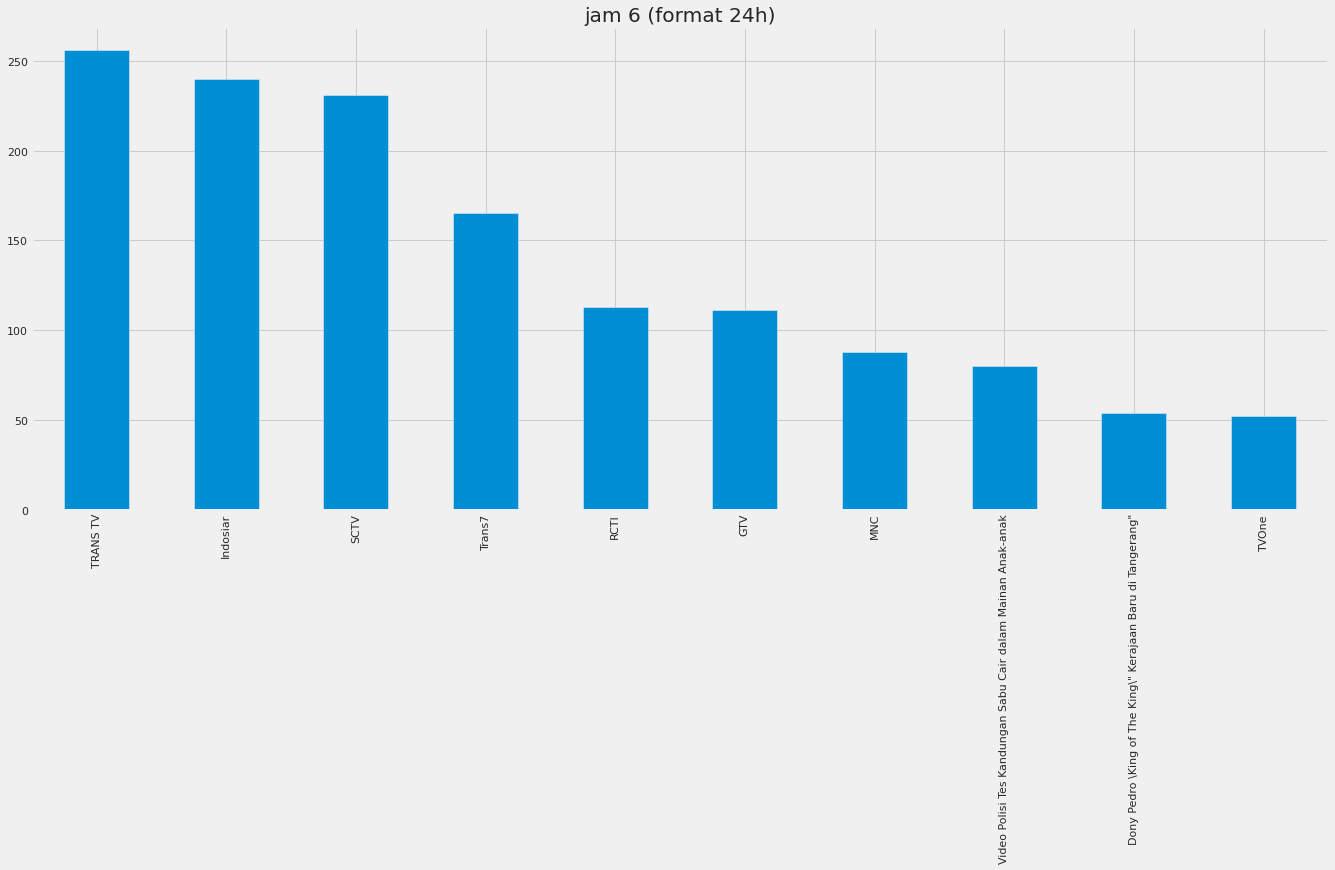

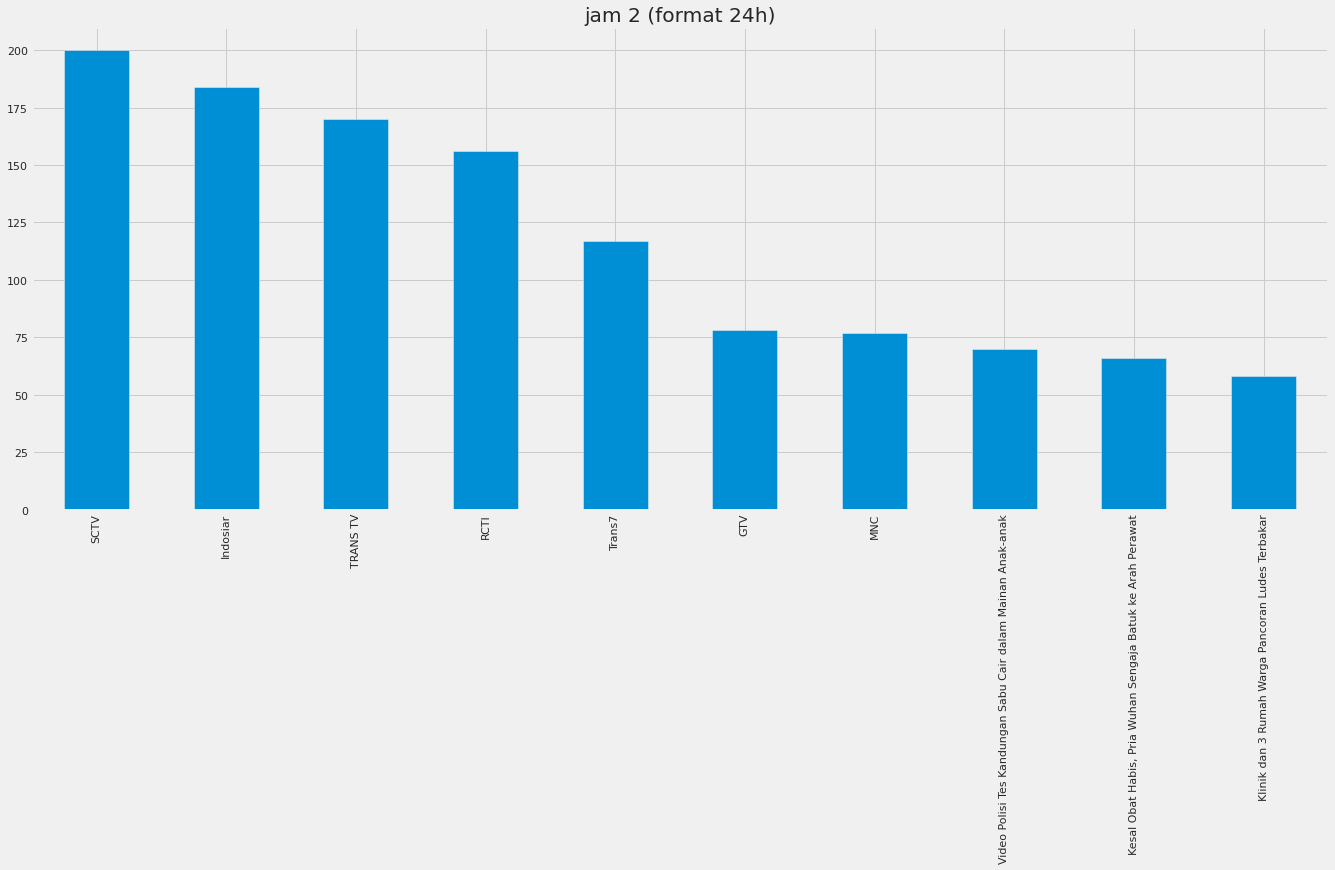

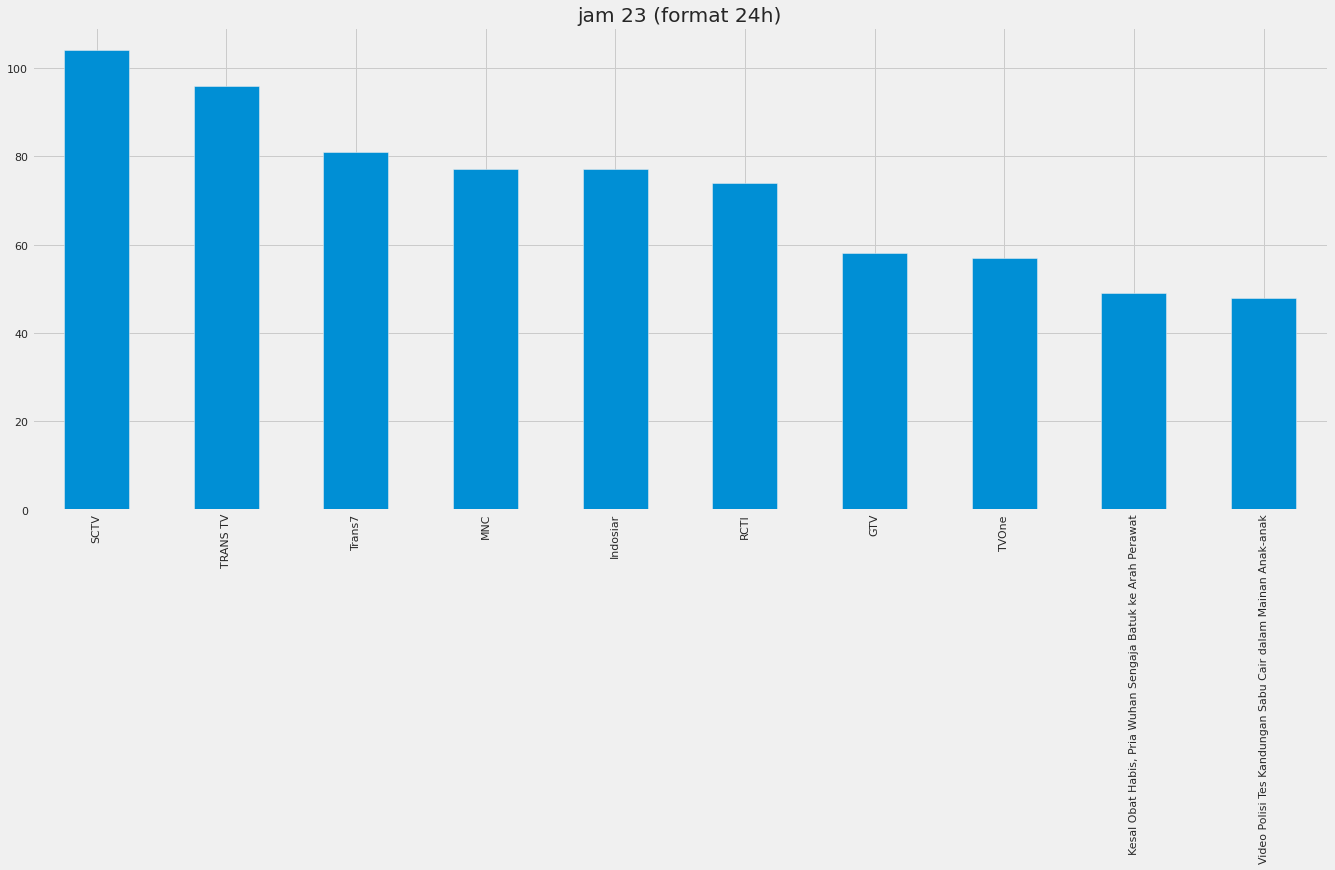

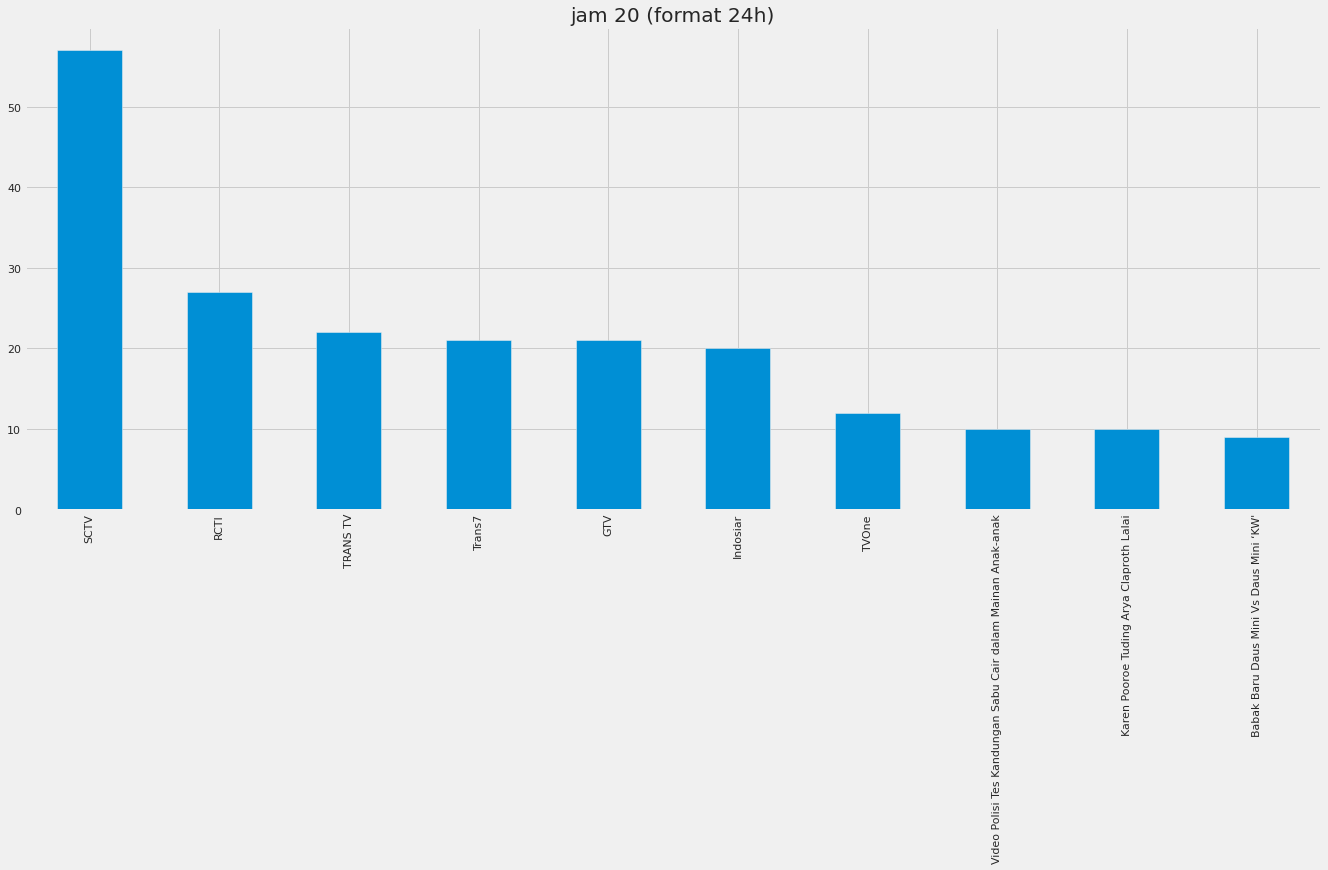

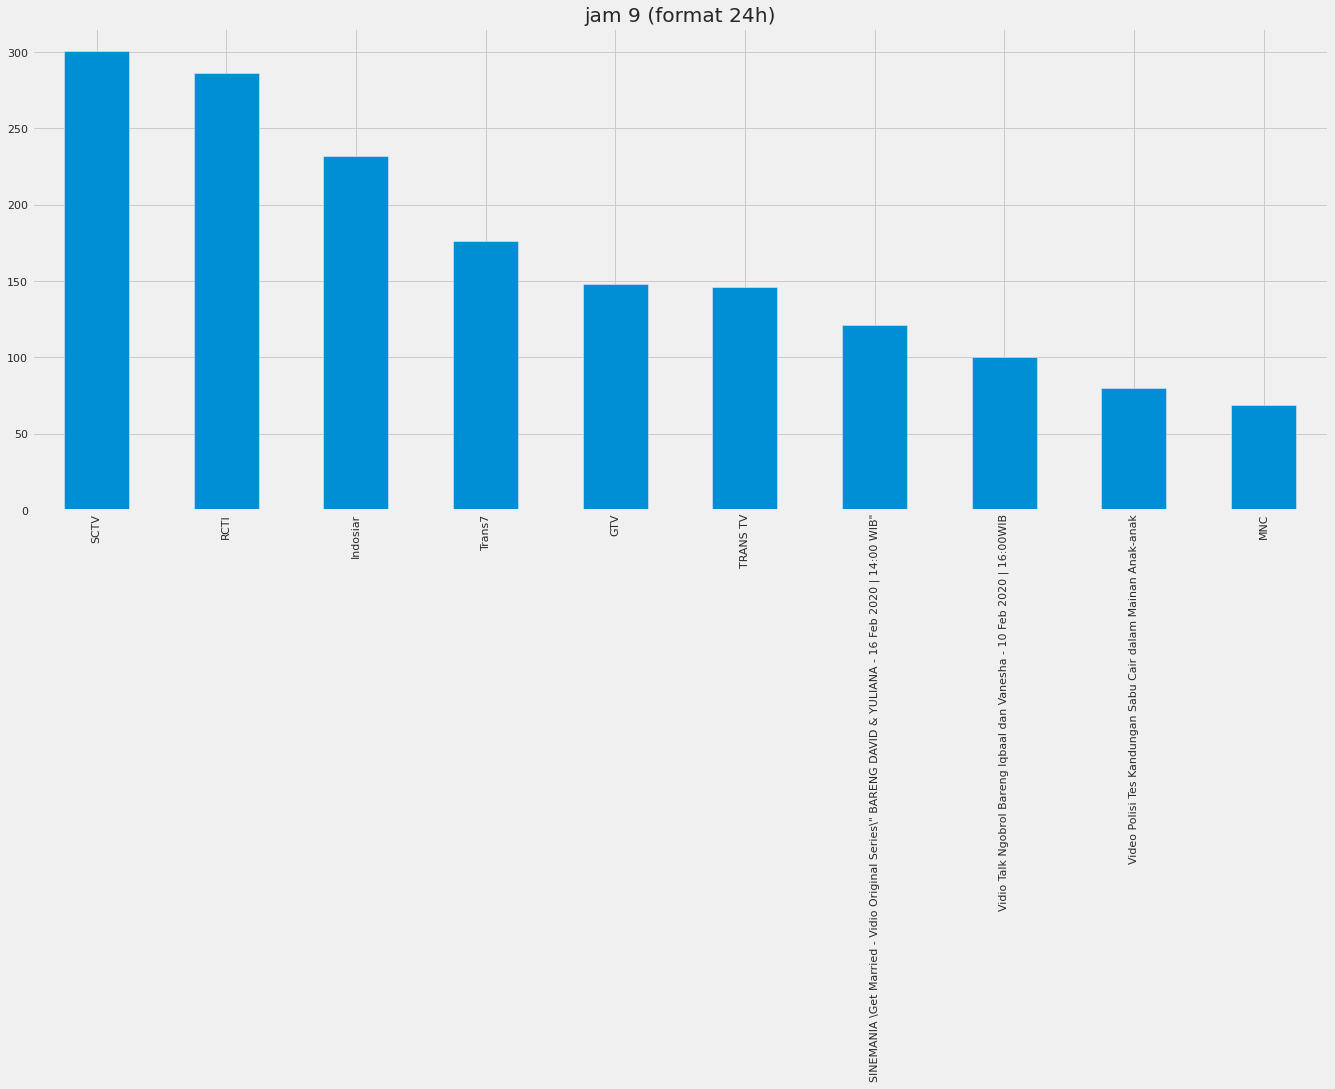

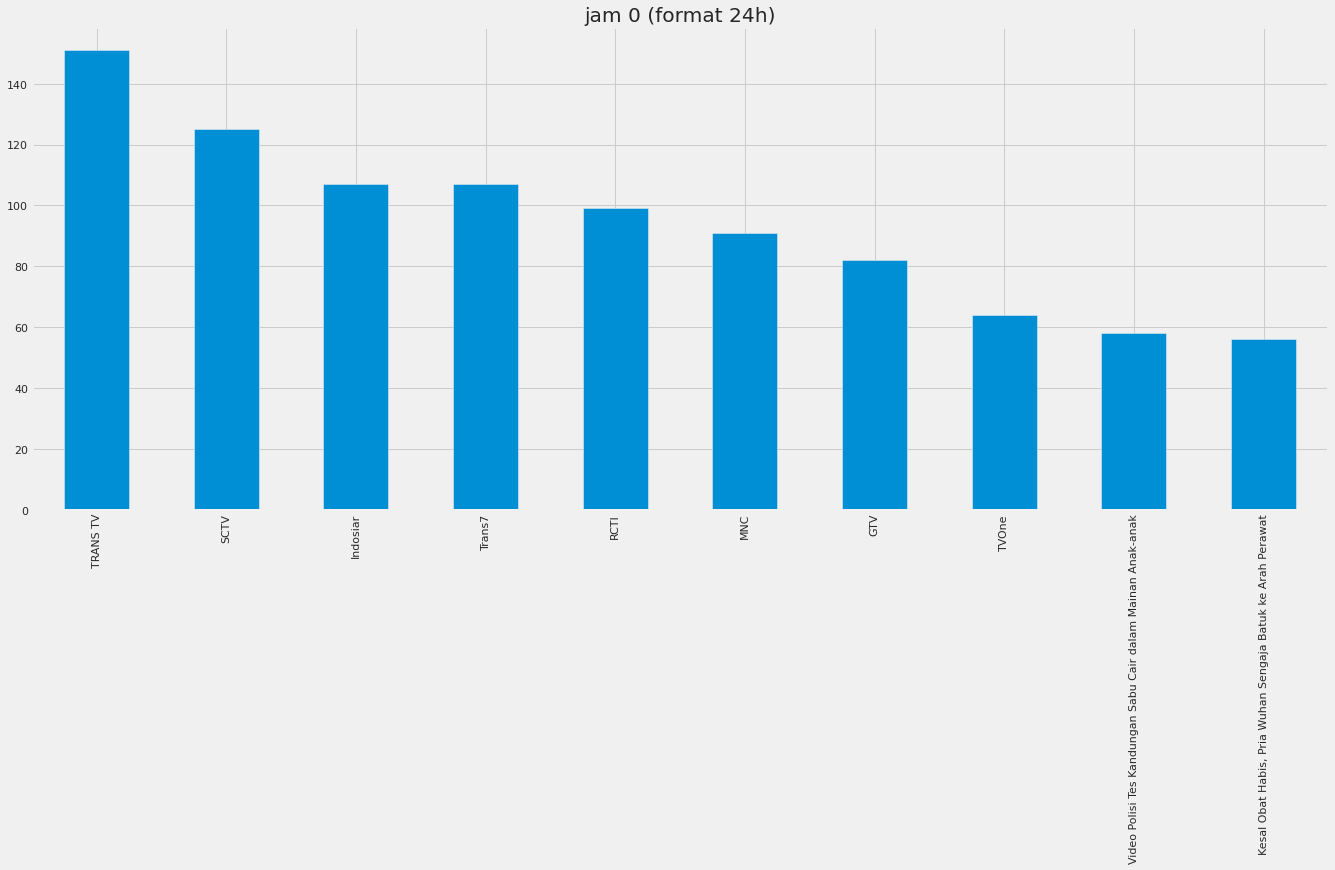

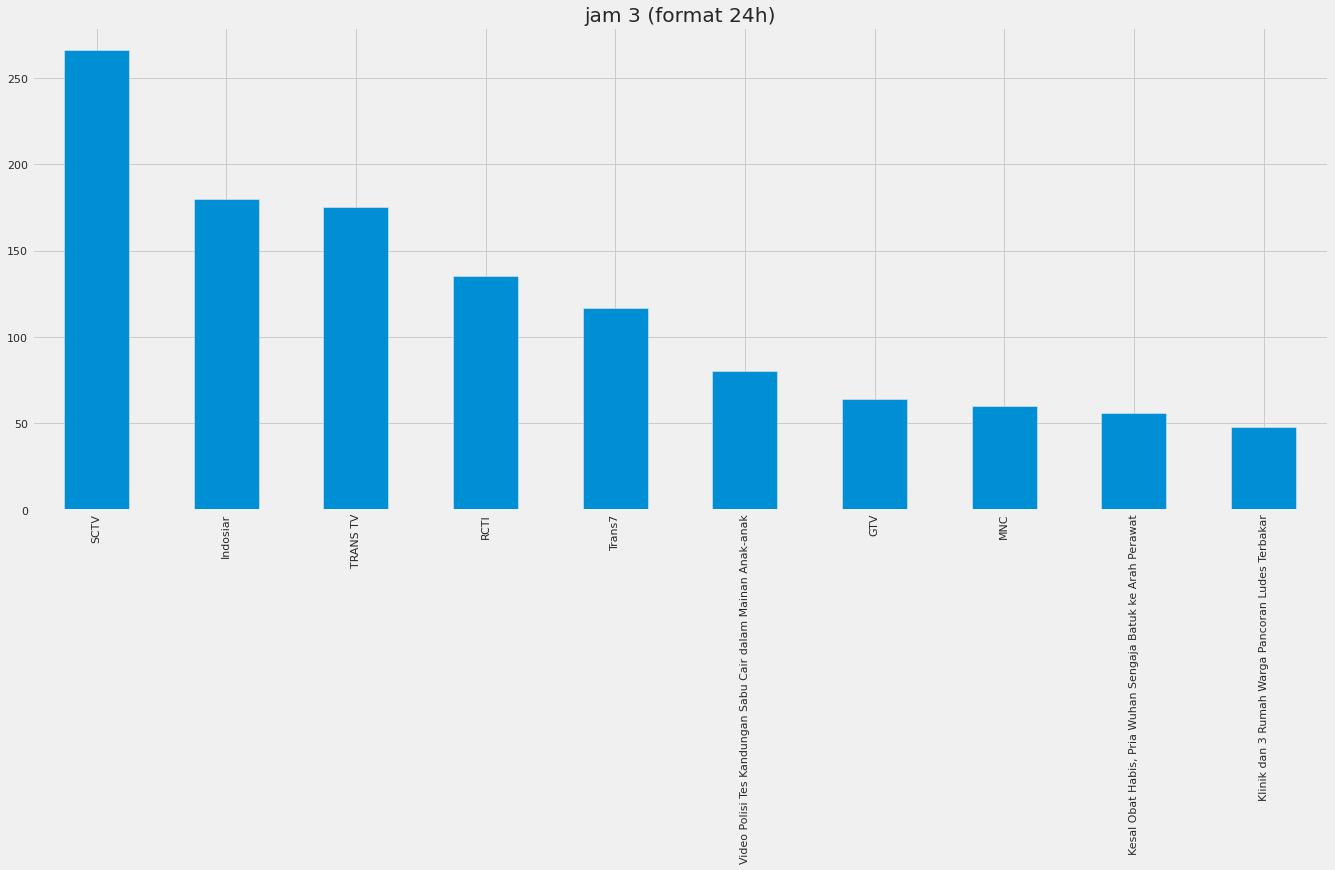

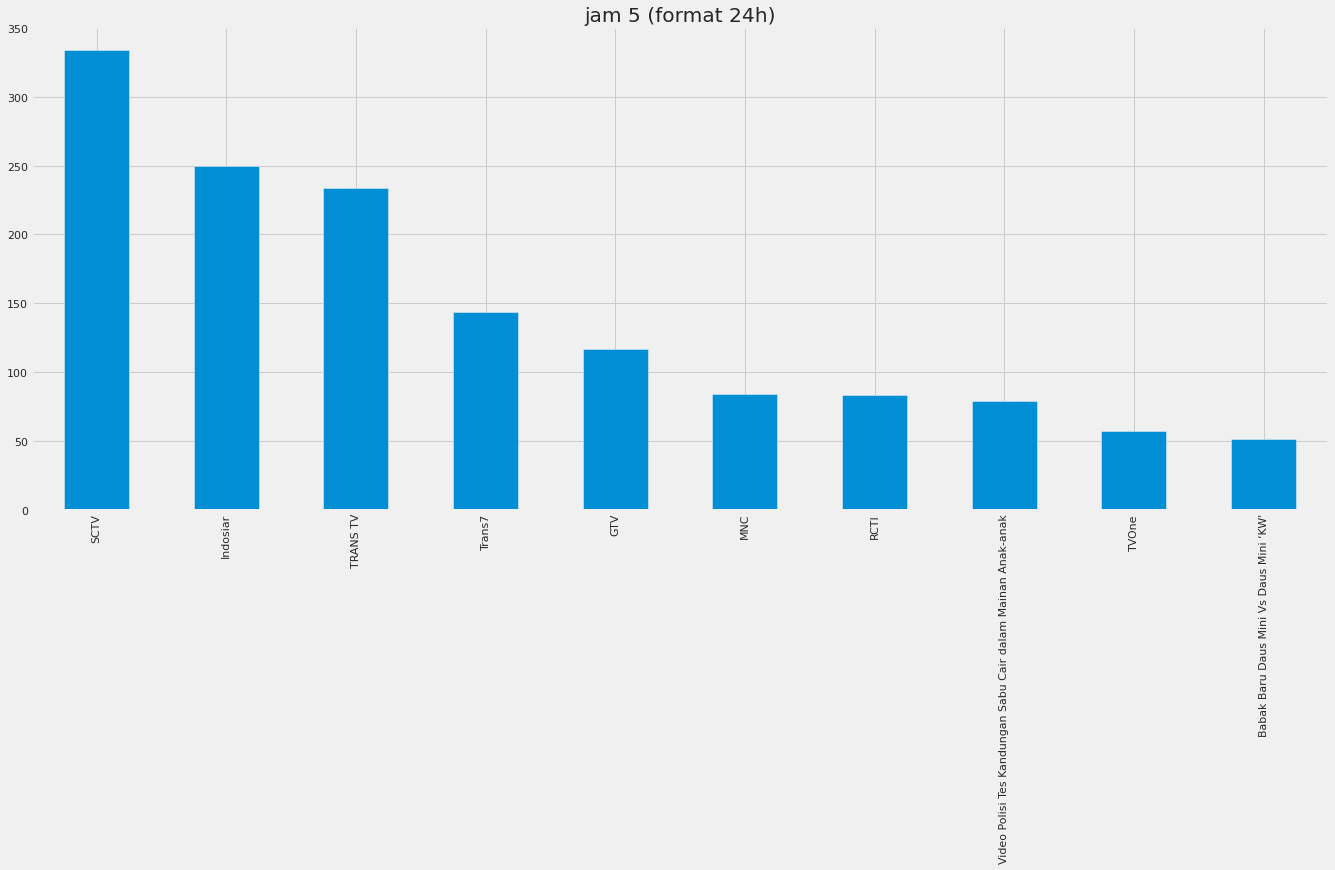

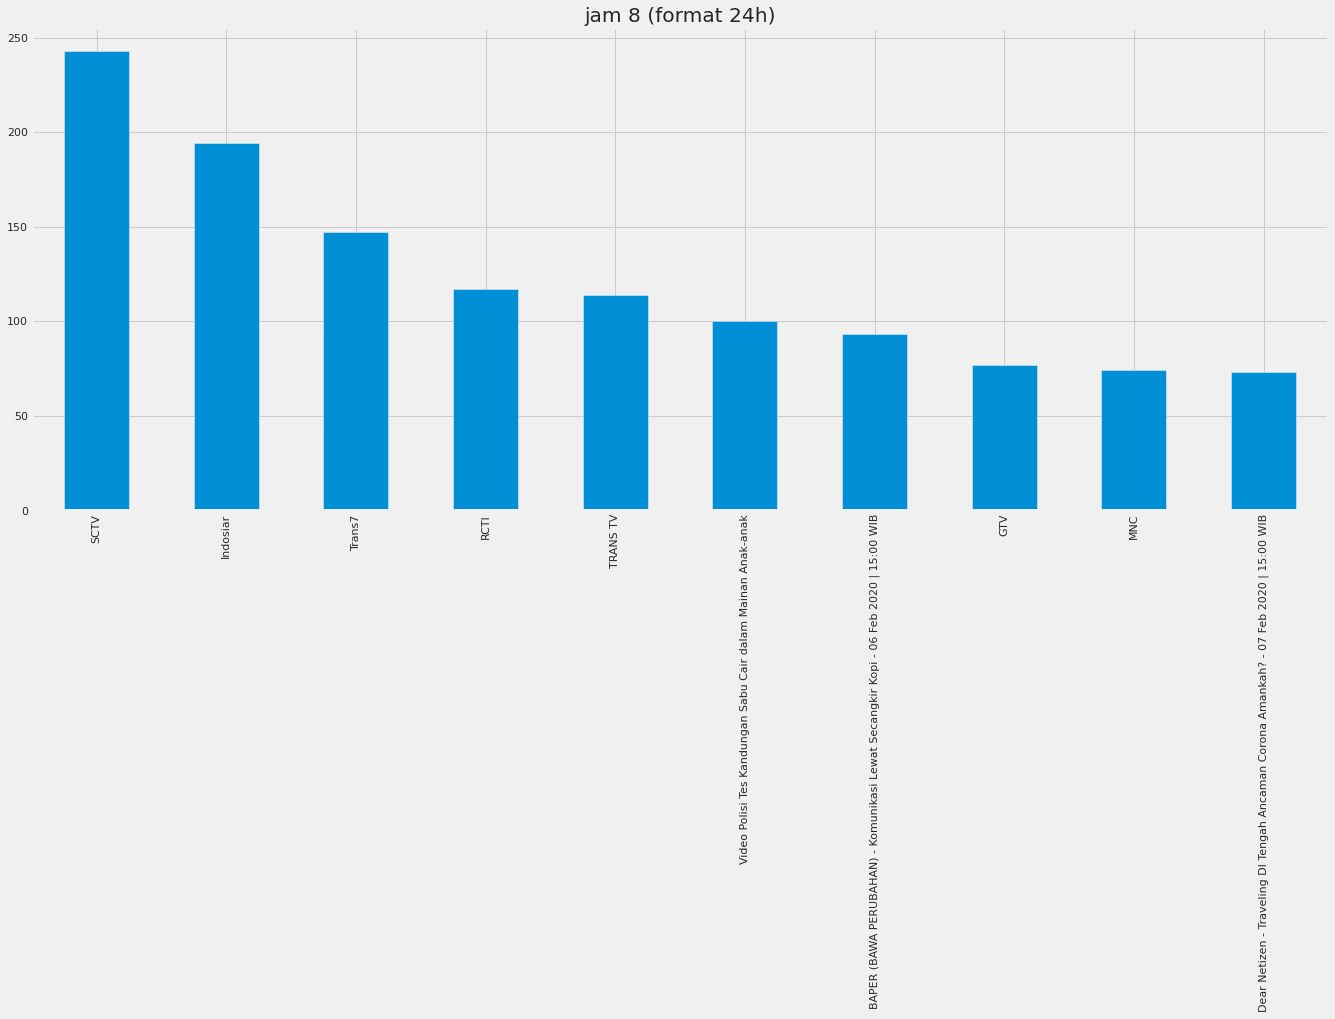

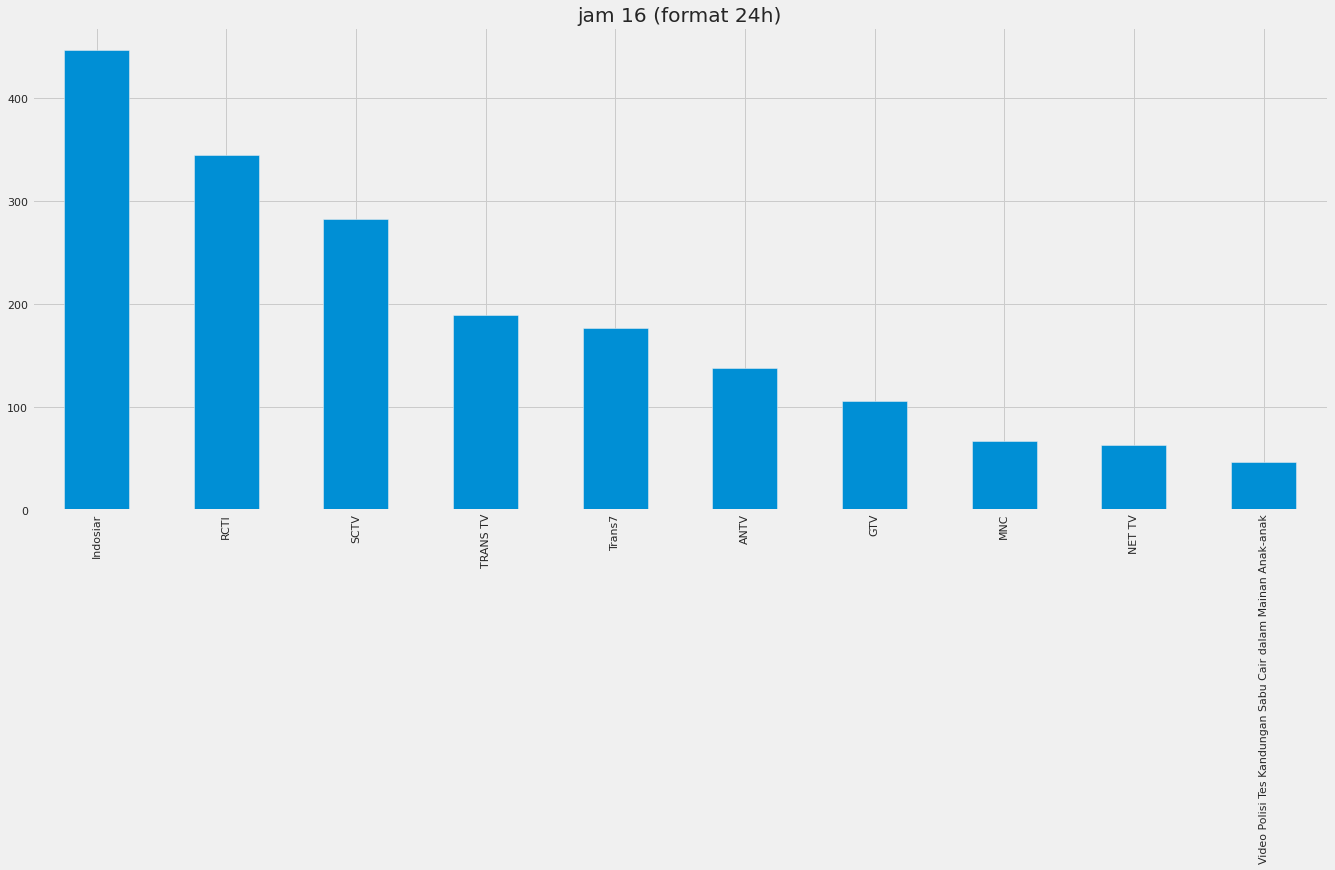

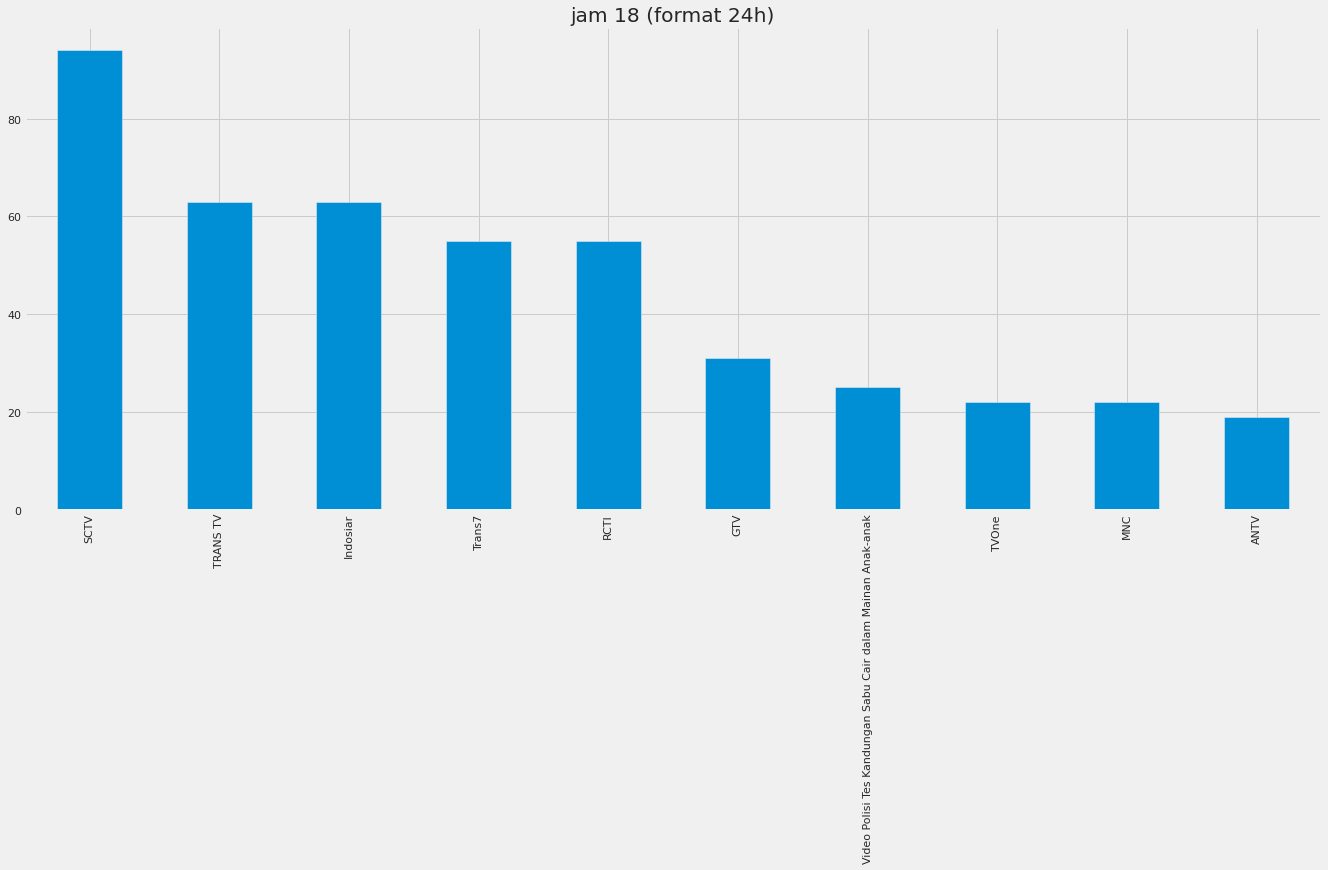

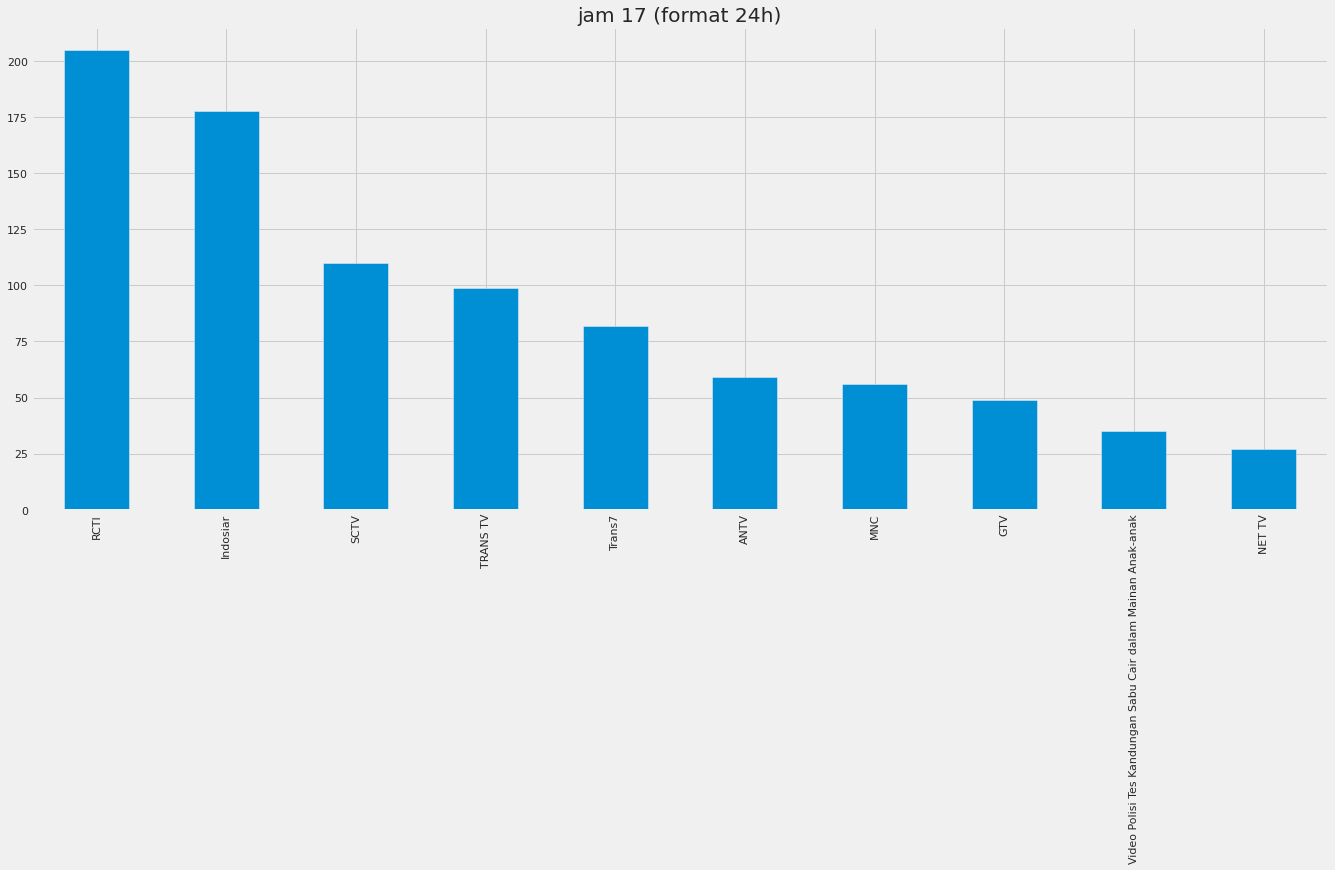

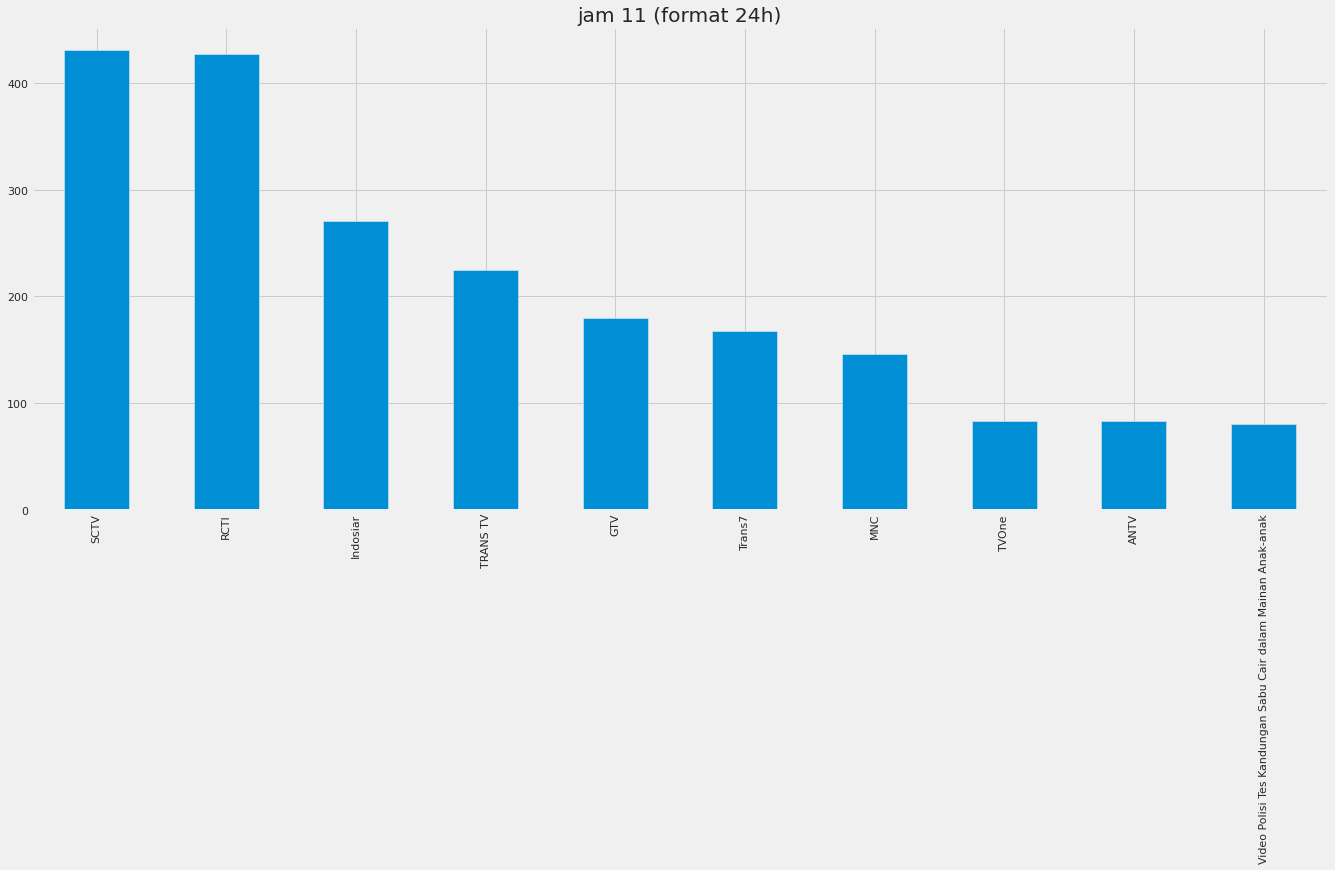

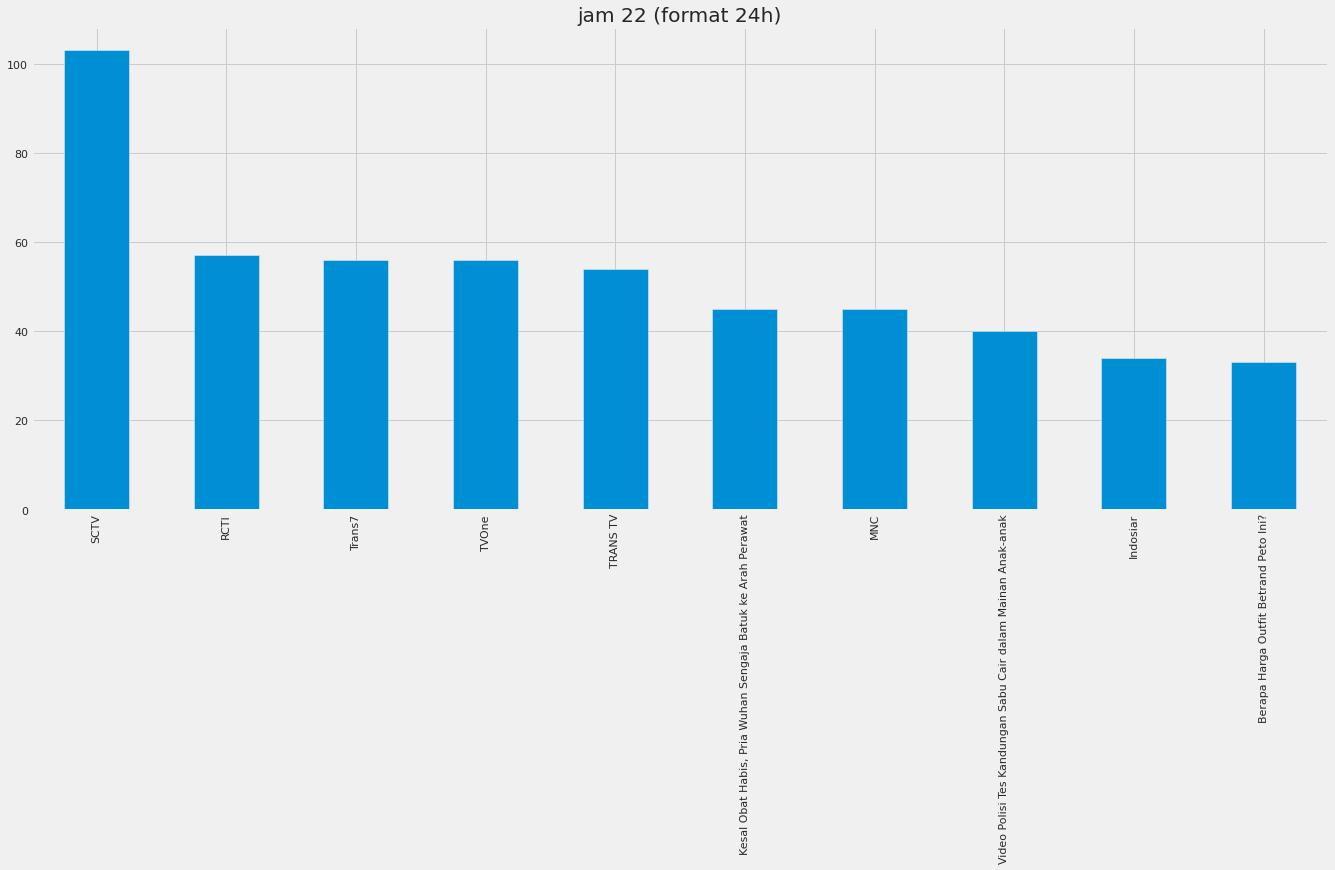

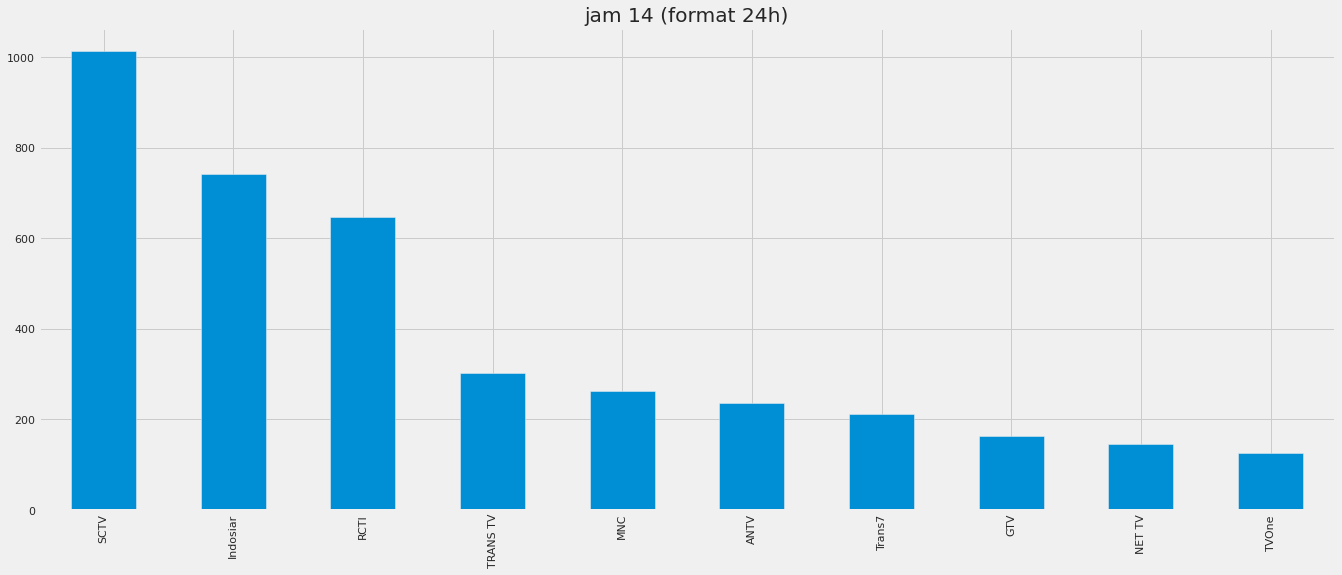

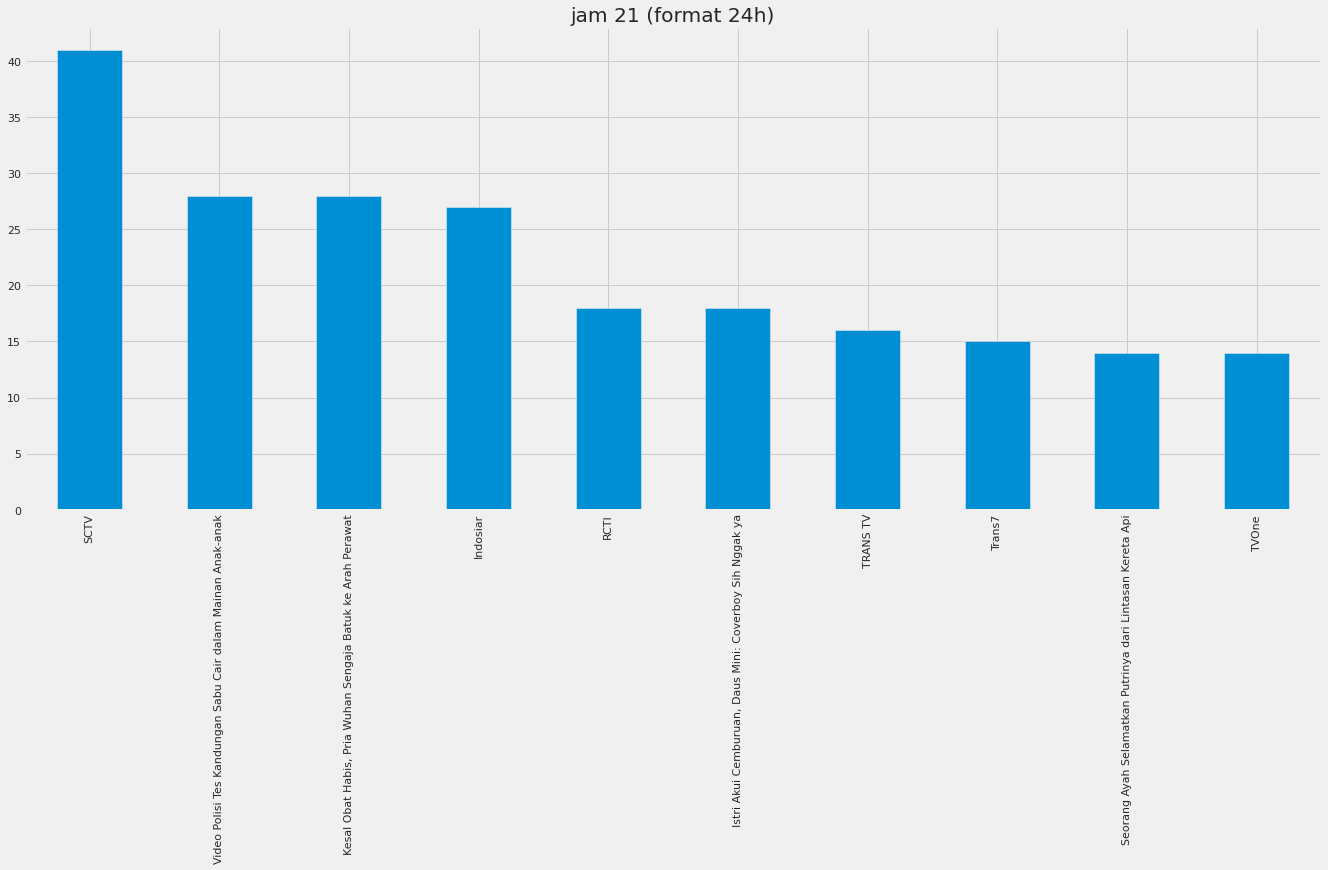

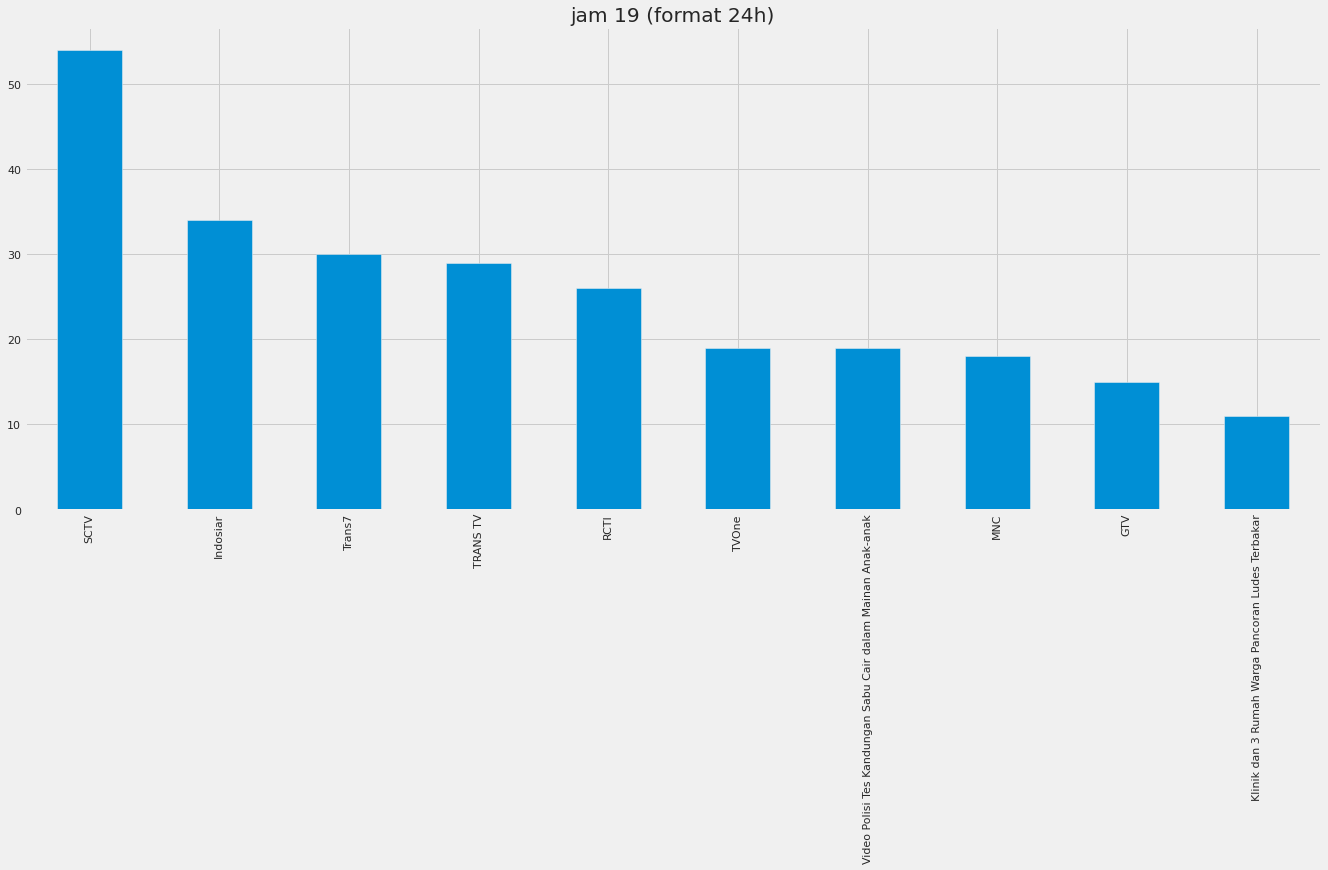

24


In [30]:
i = 0
for time in df['play_time_hour'].unique():
    df[df['play_time_hour']==time]['title'].value_counts().head(10).plot.bar()
    plt.title(f'jam {time} (format 24h)')
    plt.show()
    i+=1
print(i)

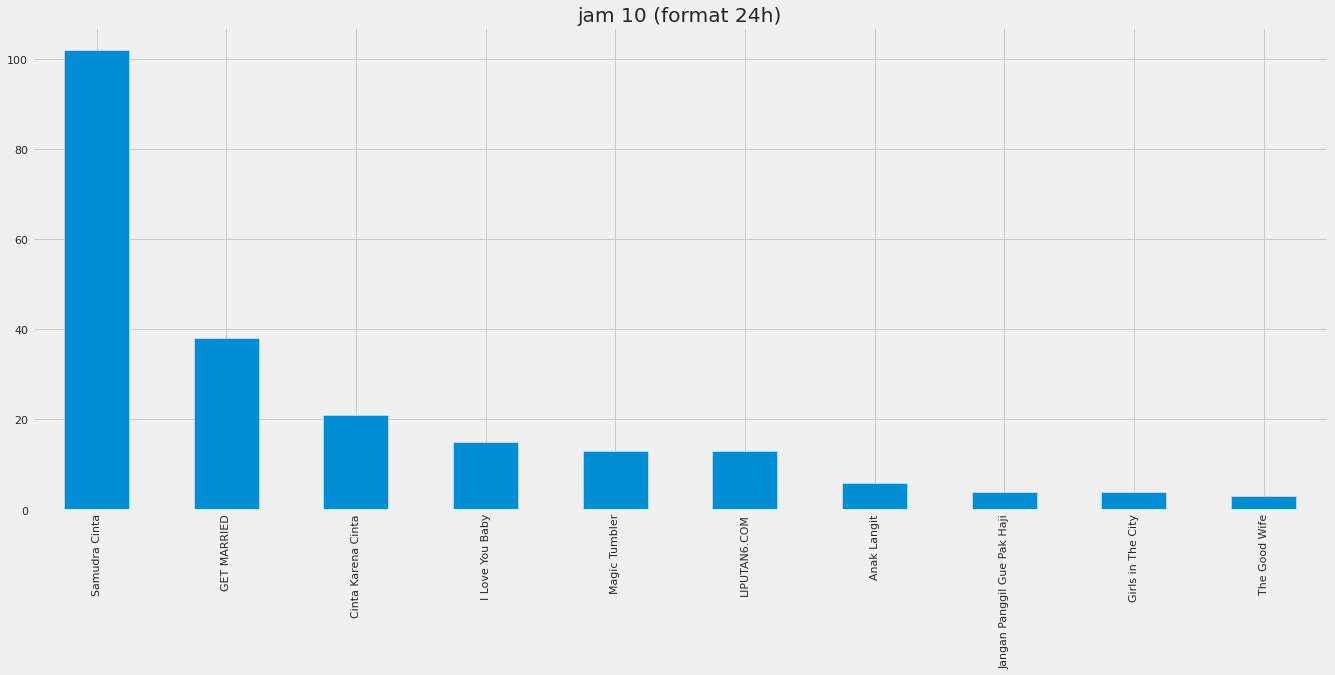

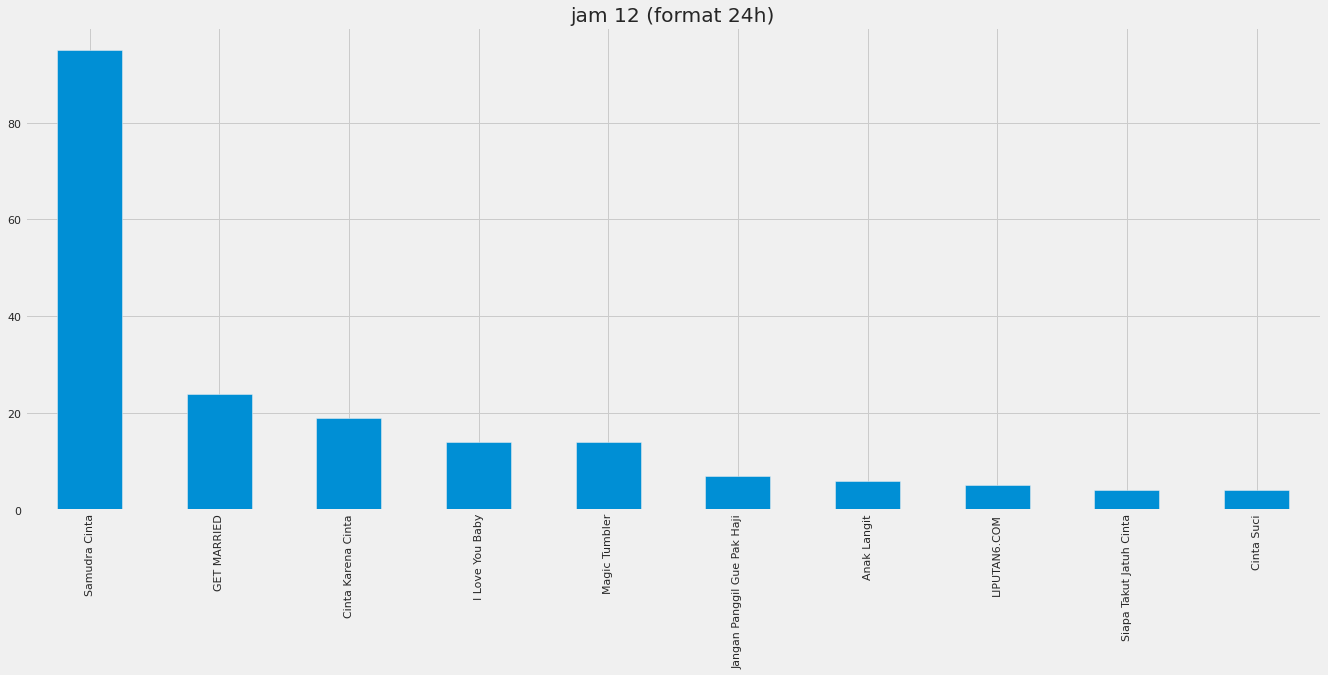

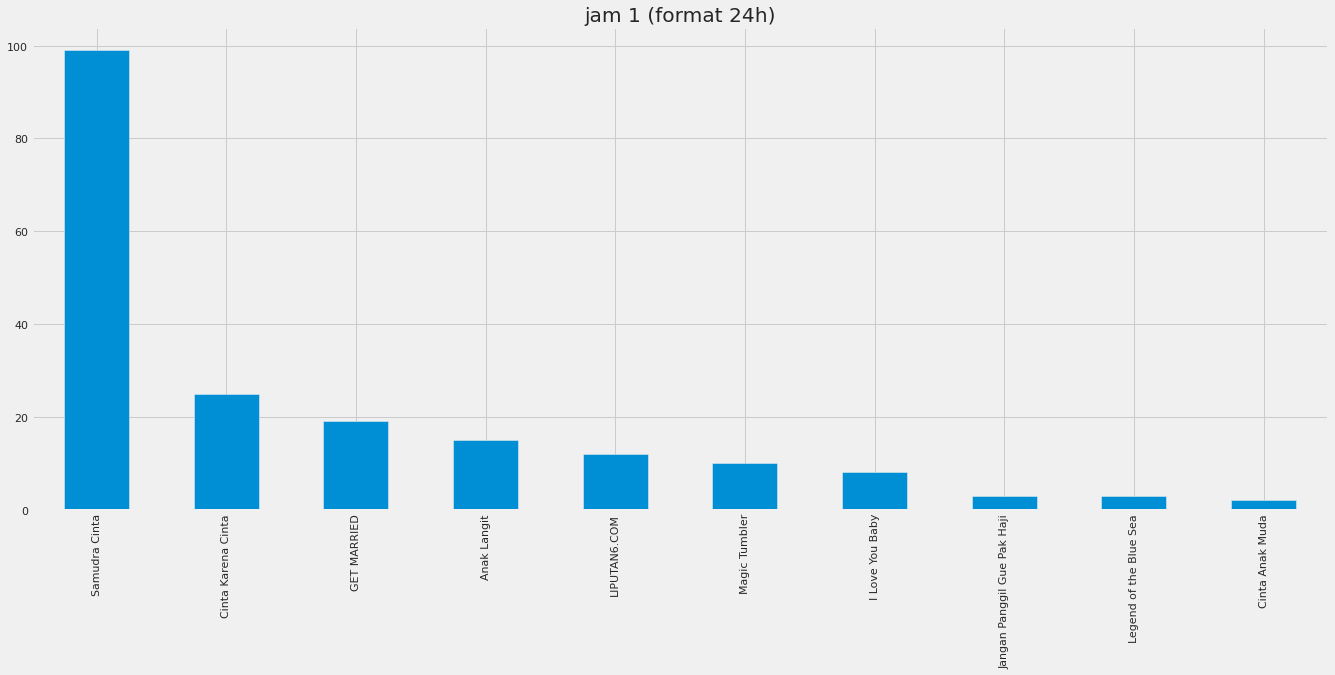

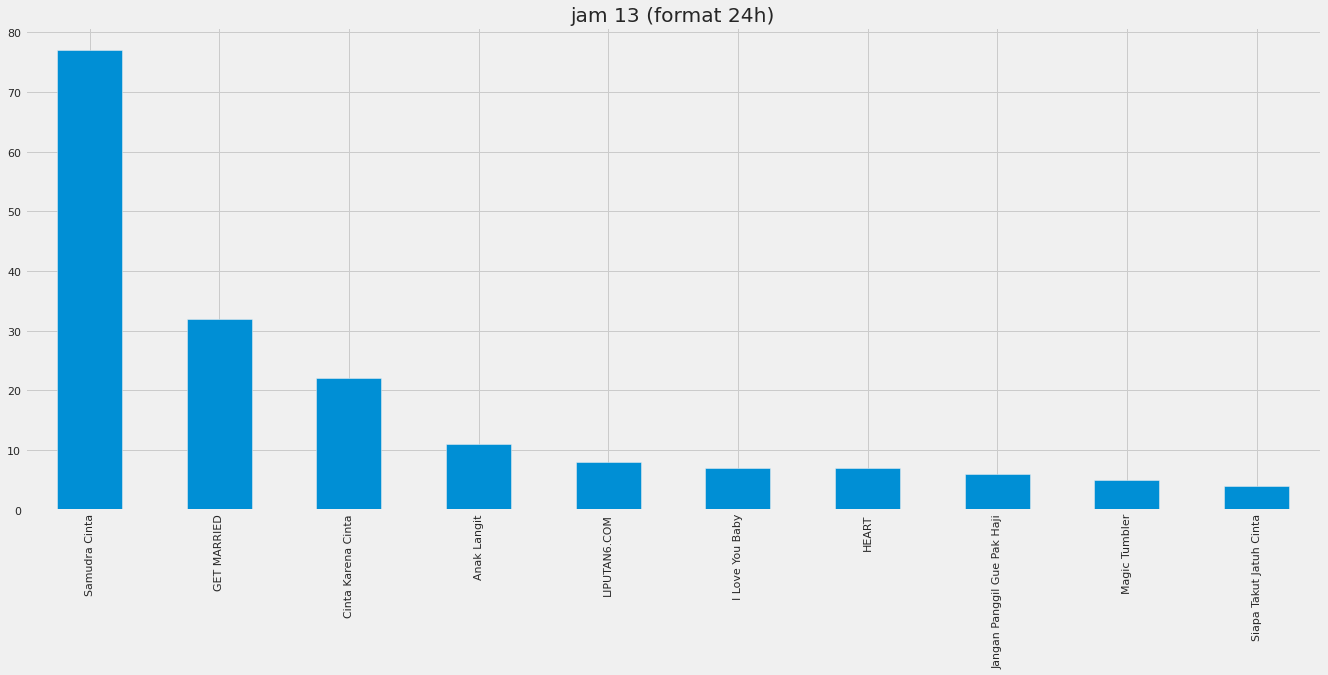

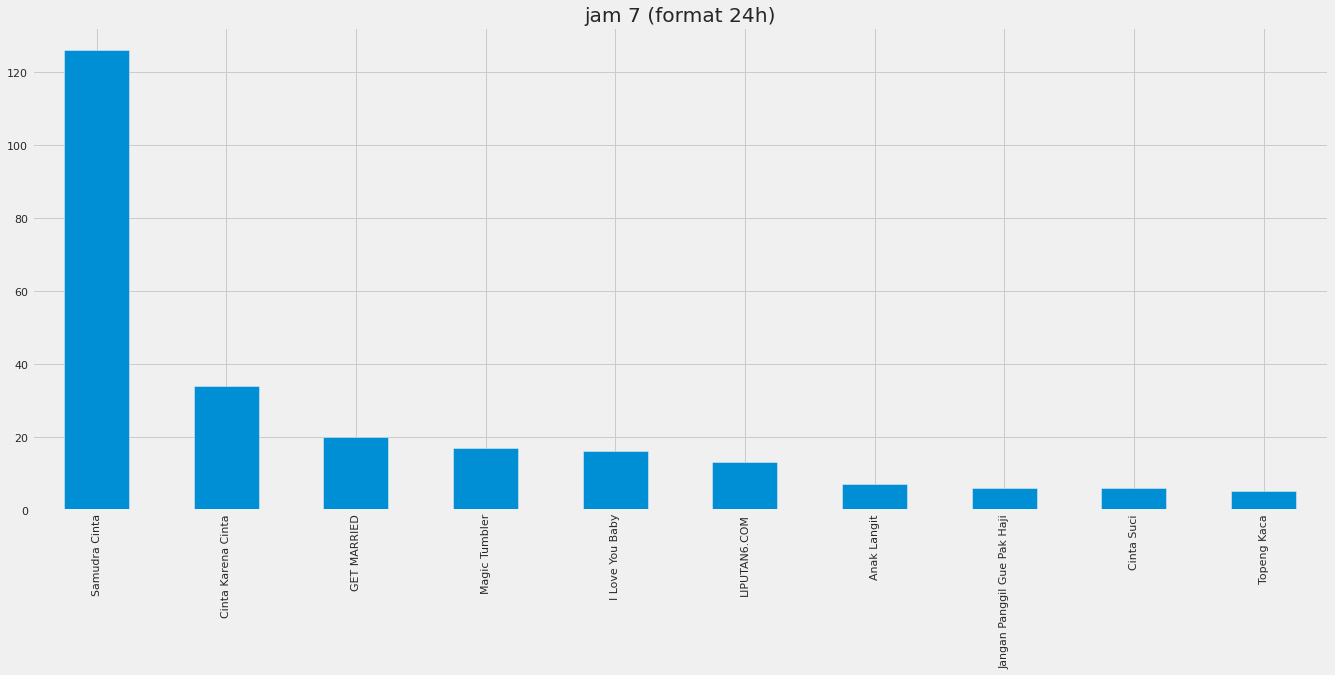

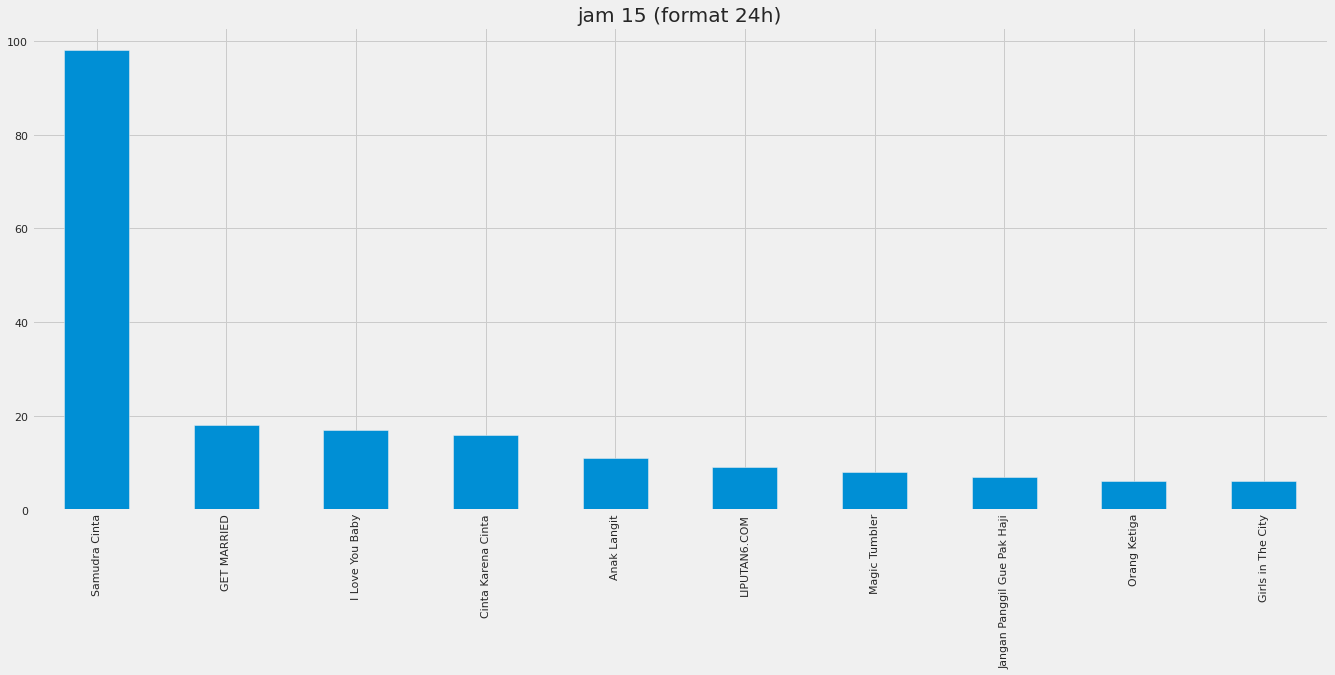

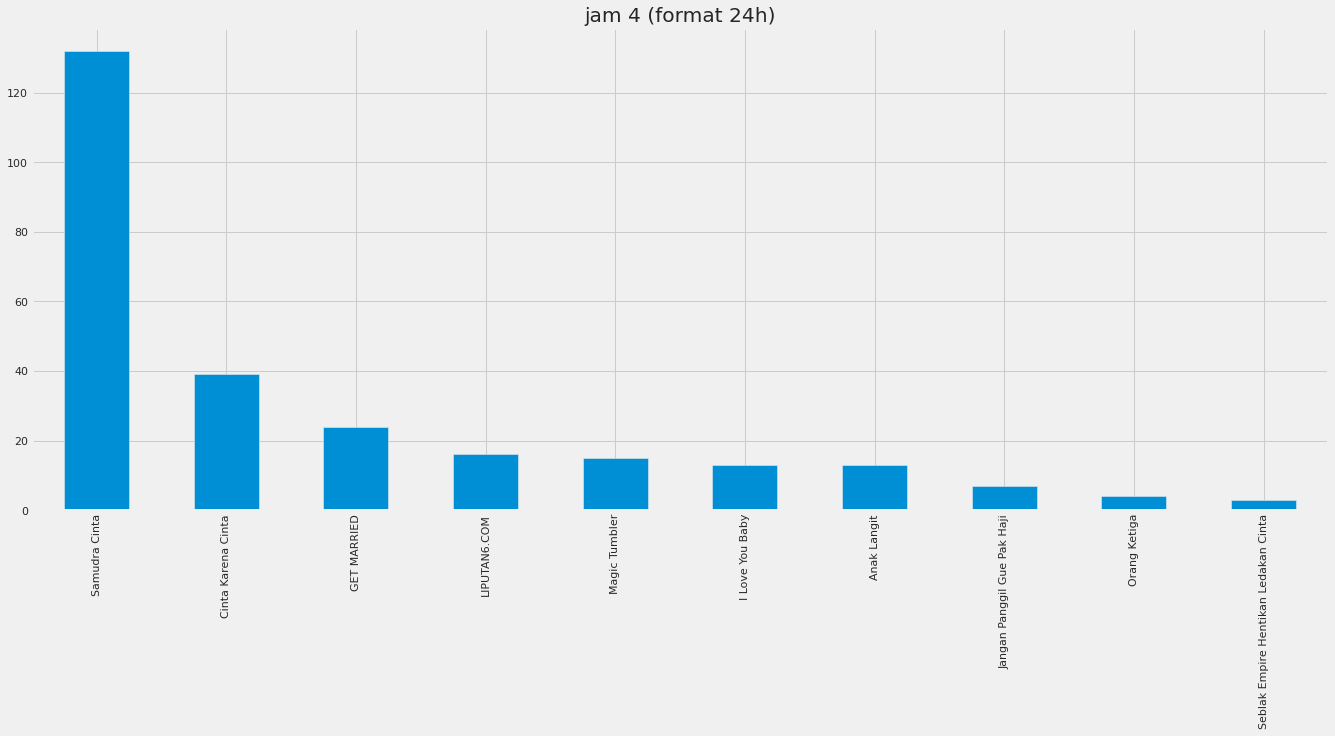

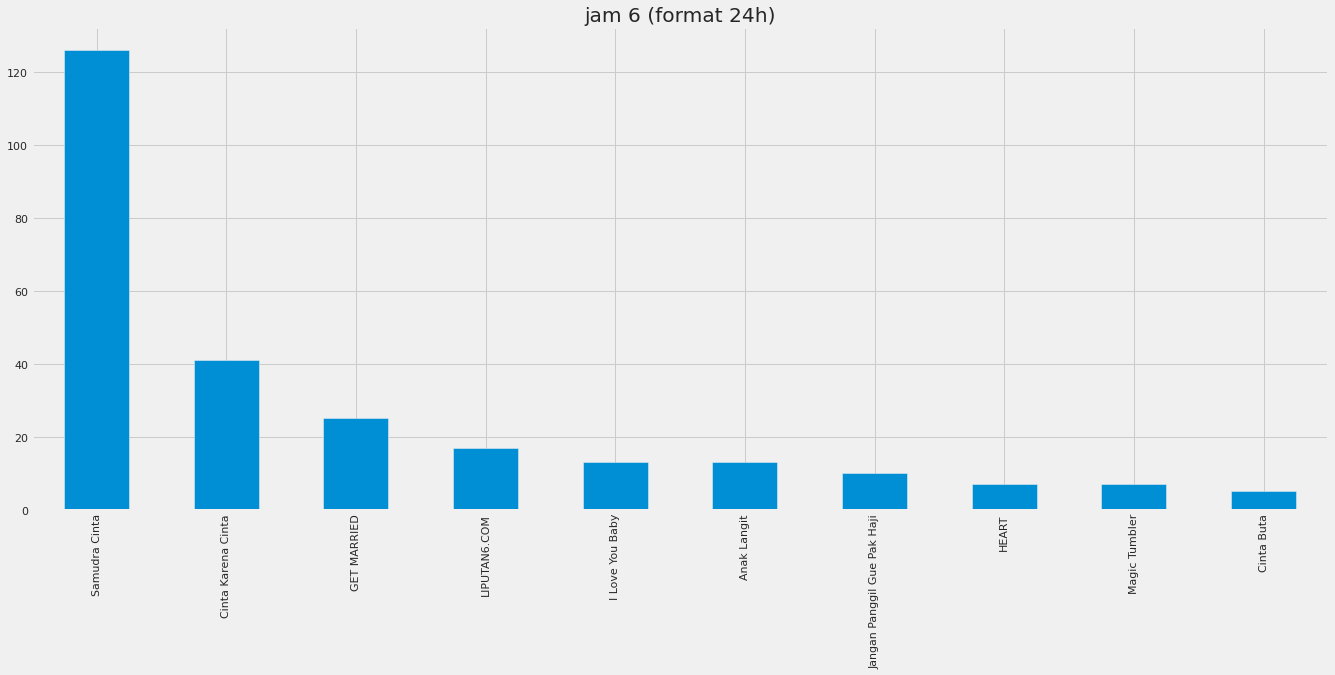

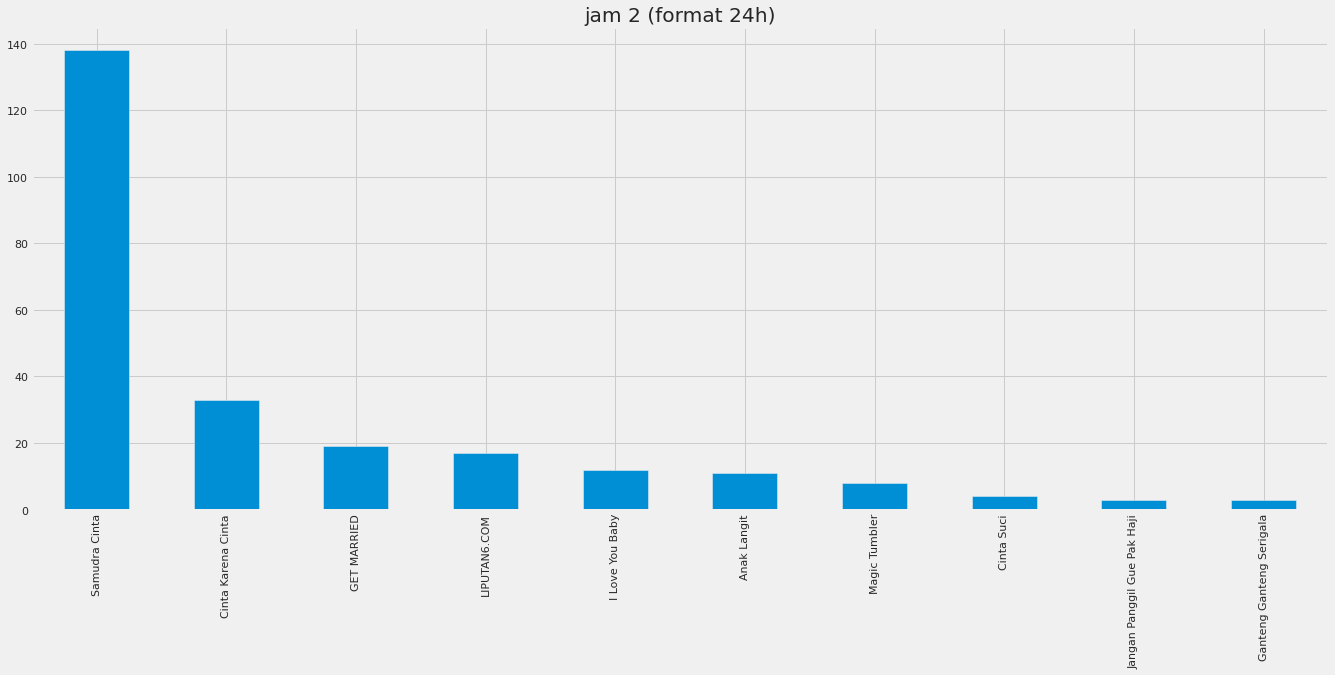

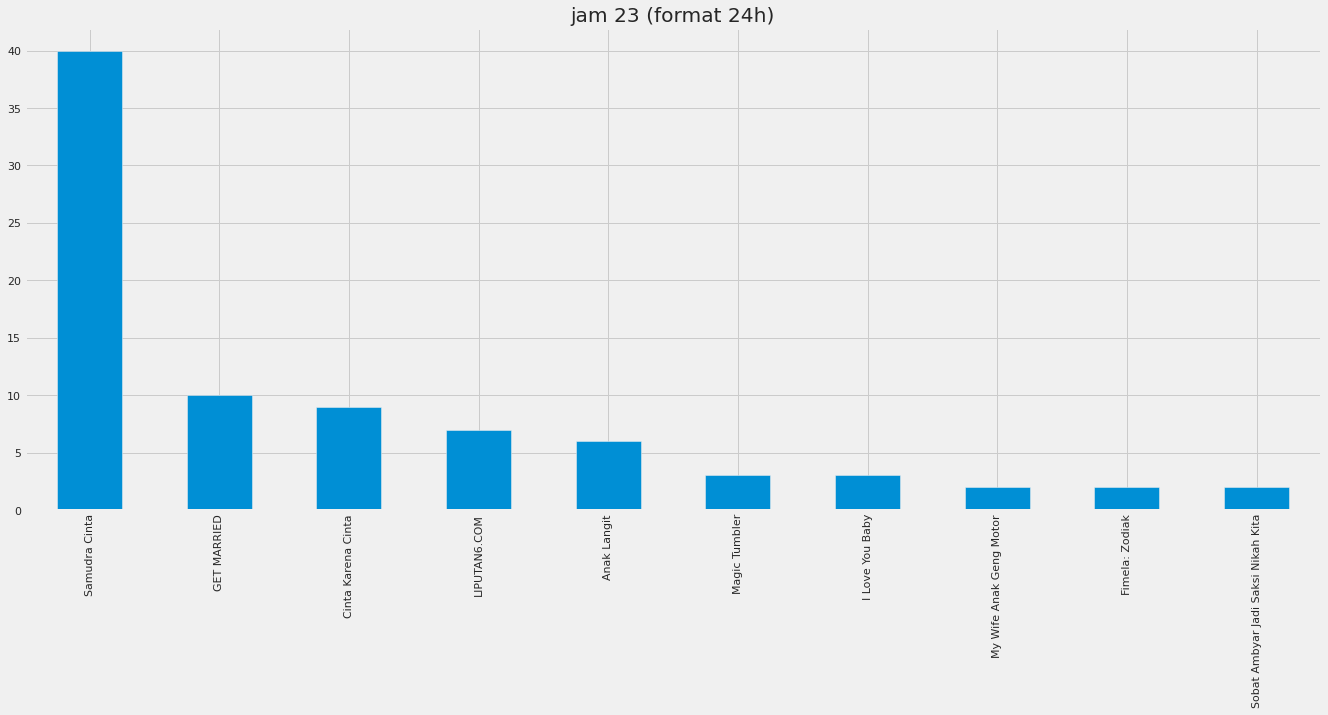

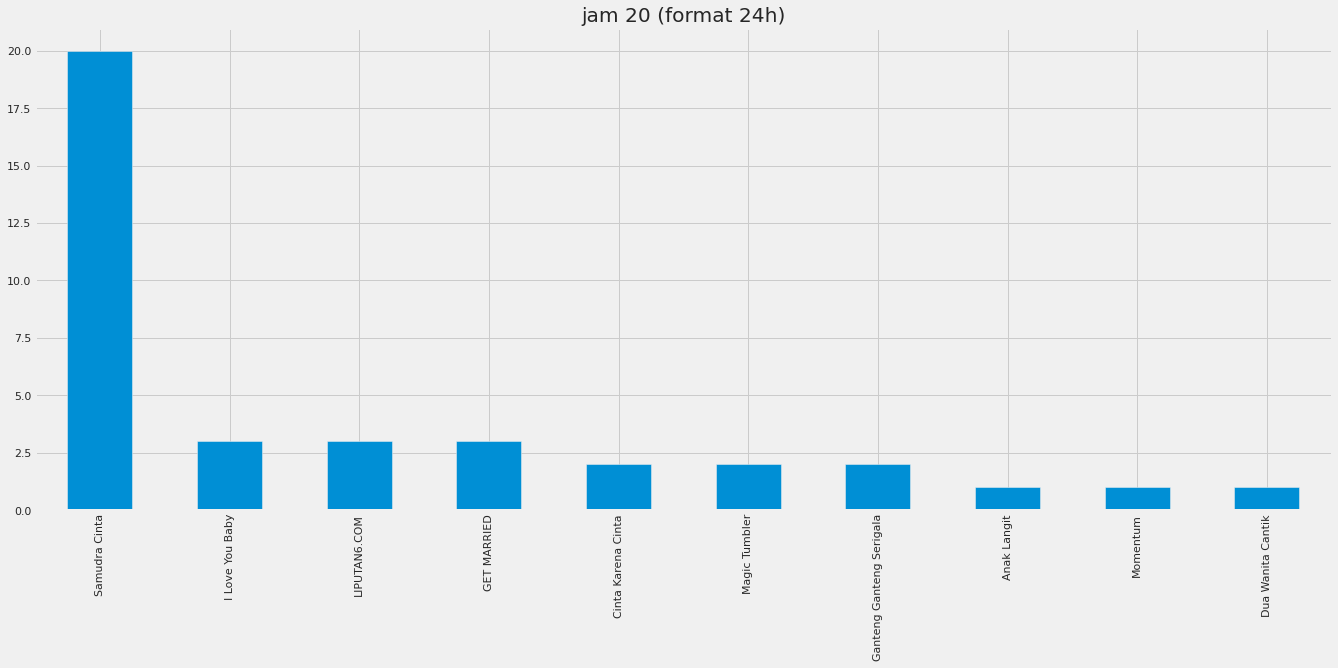

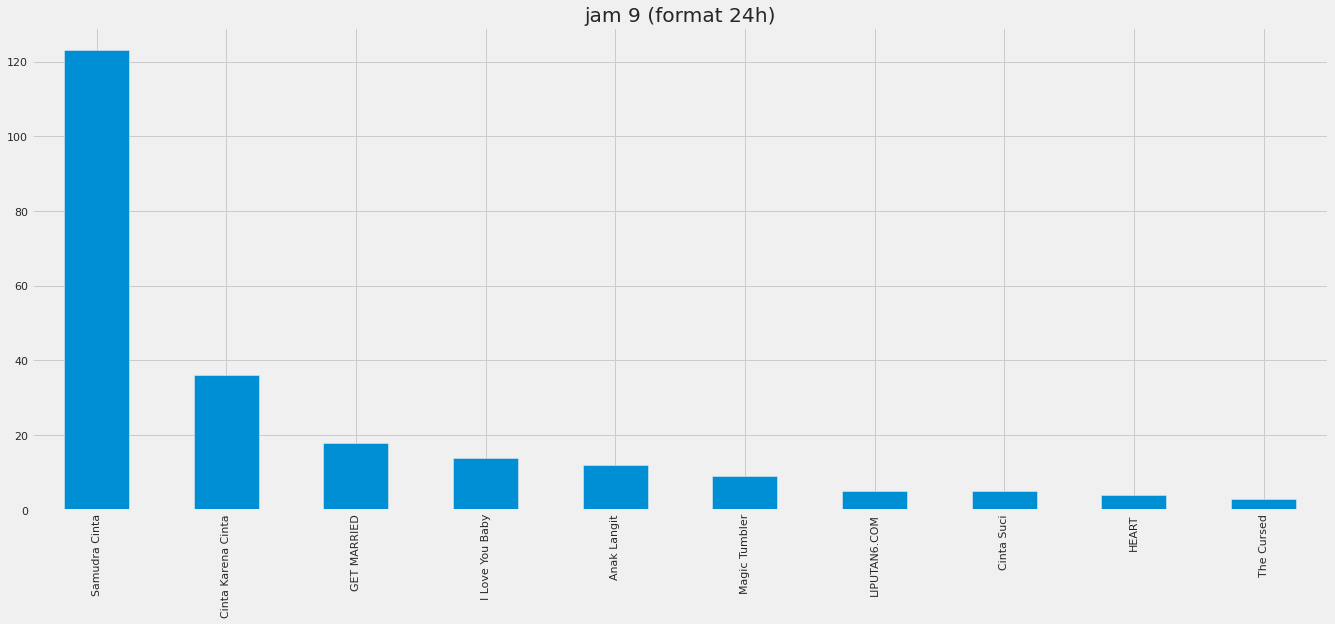

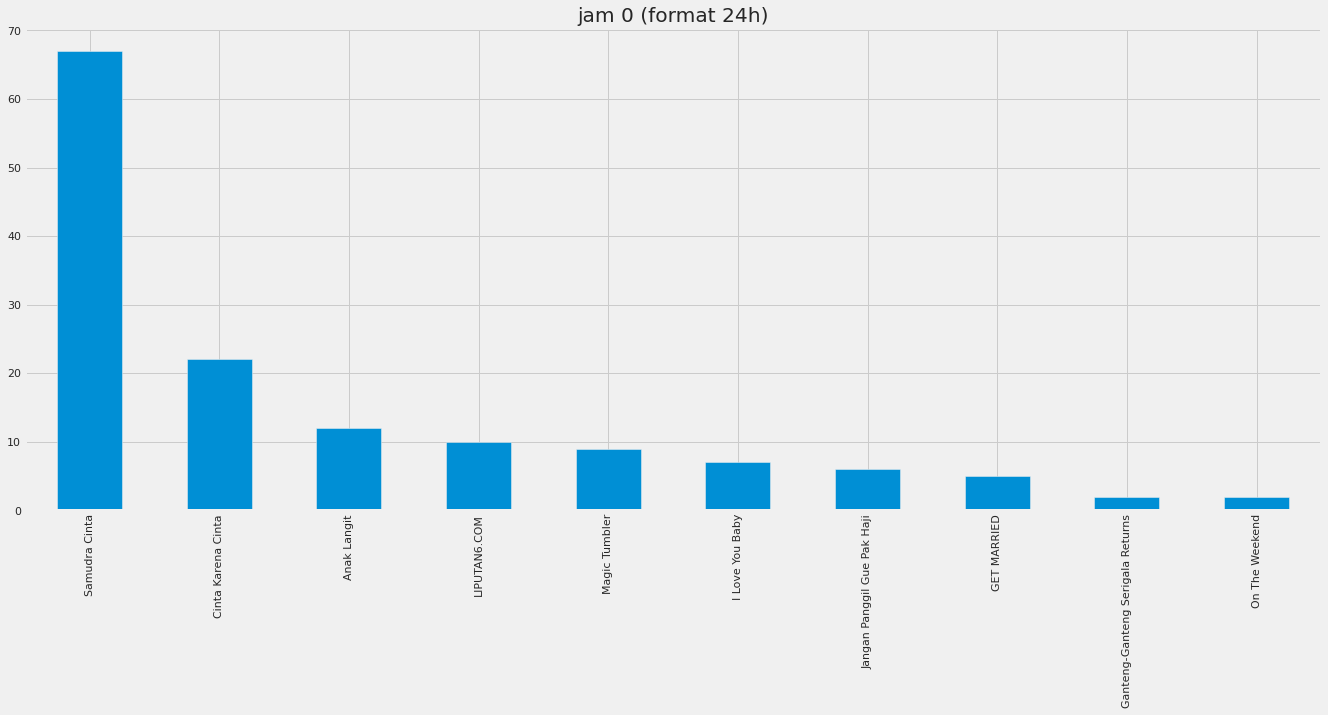

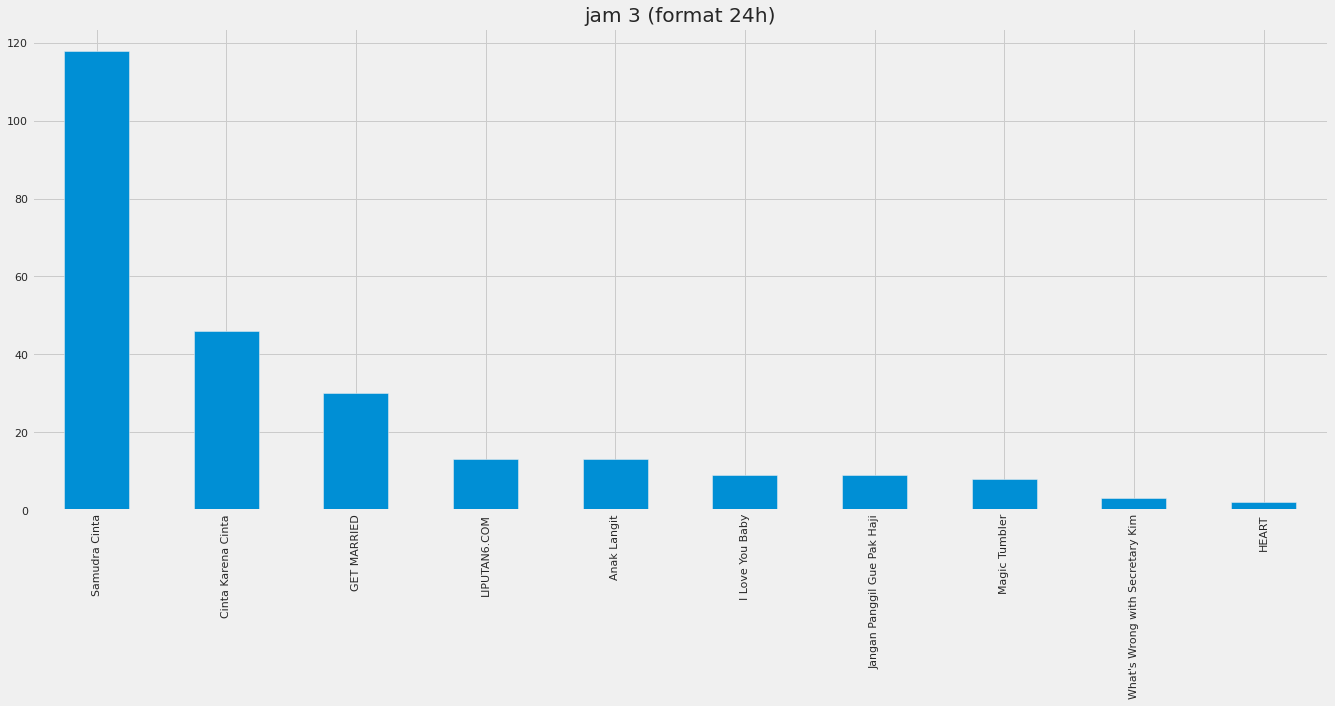

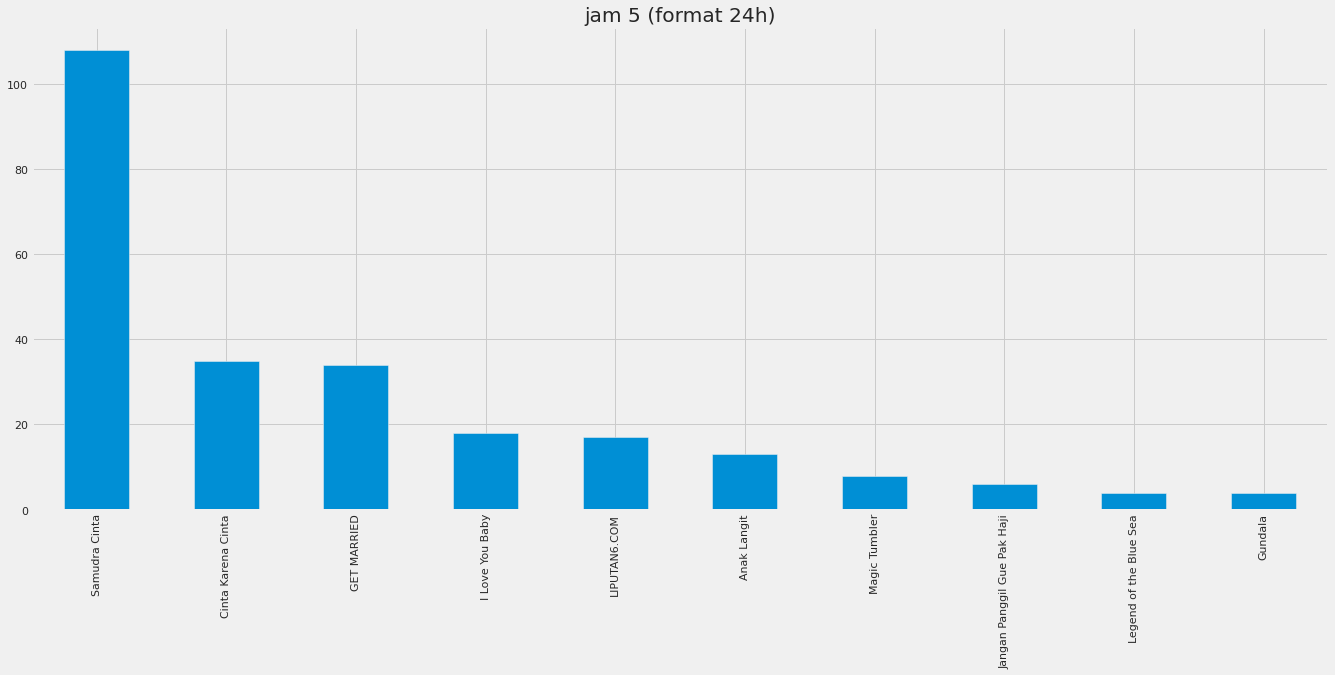

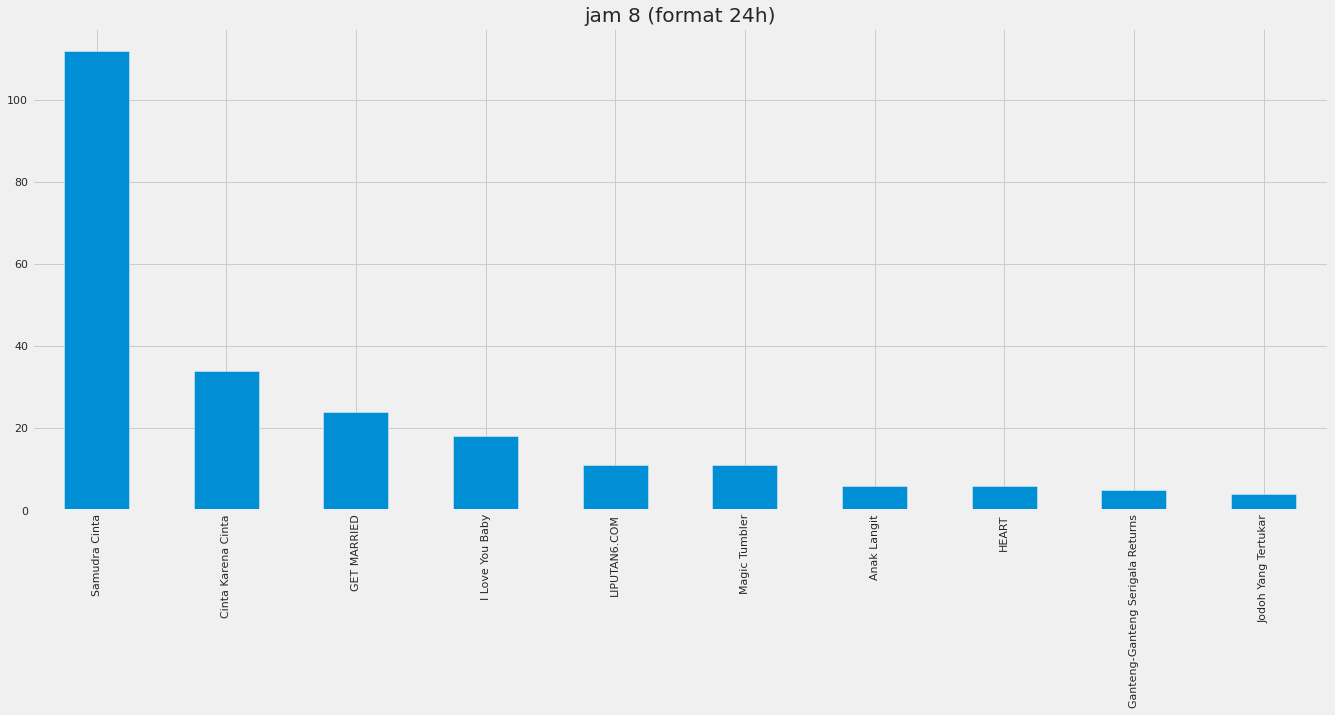

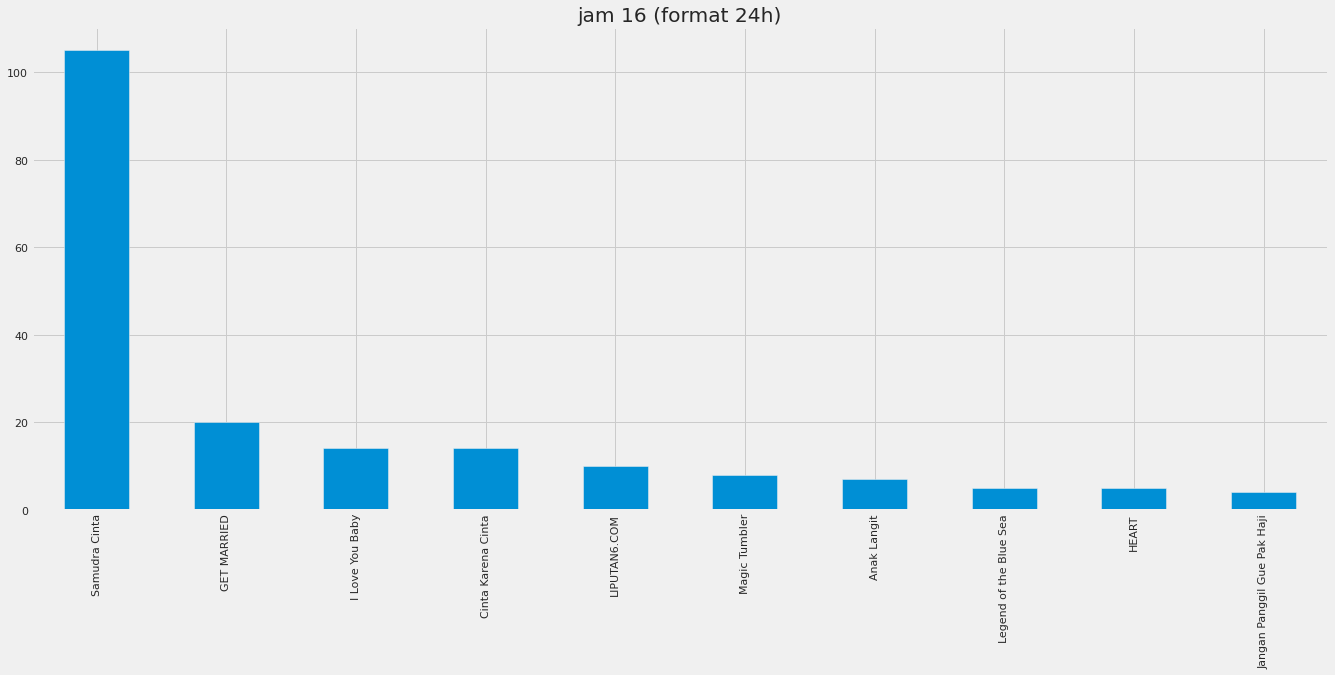

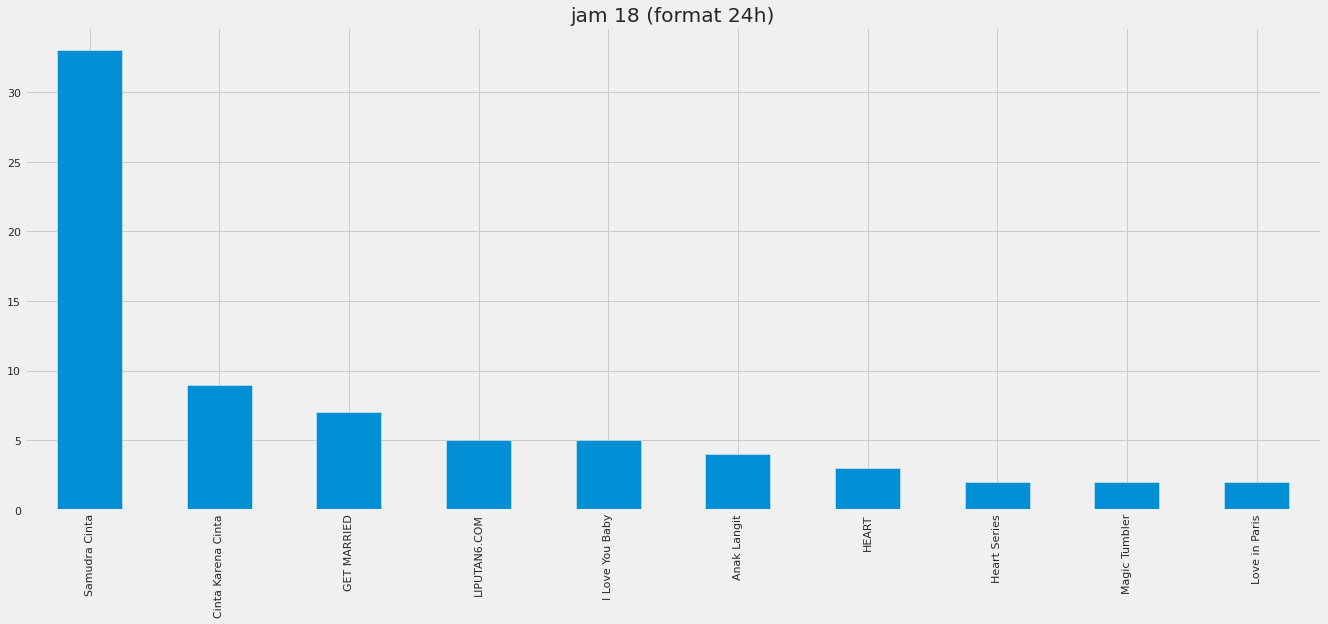

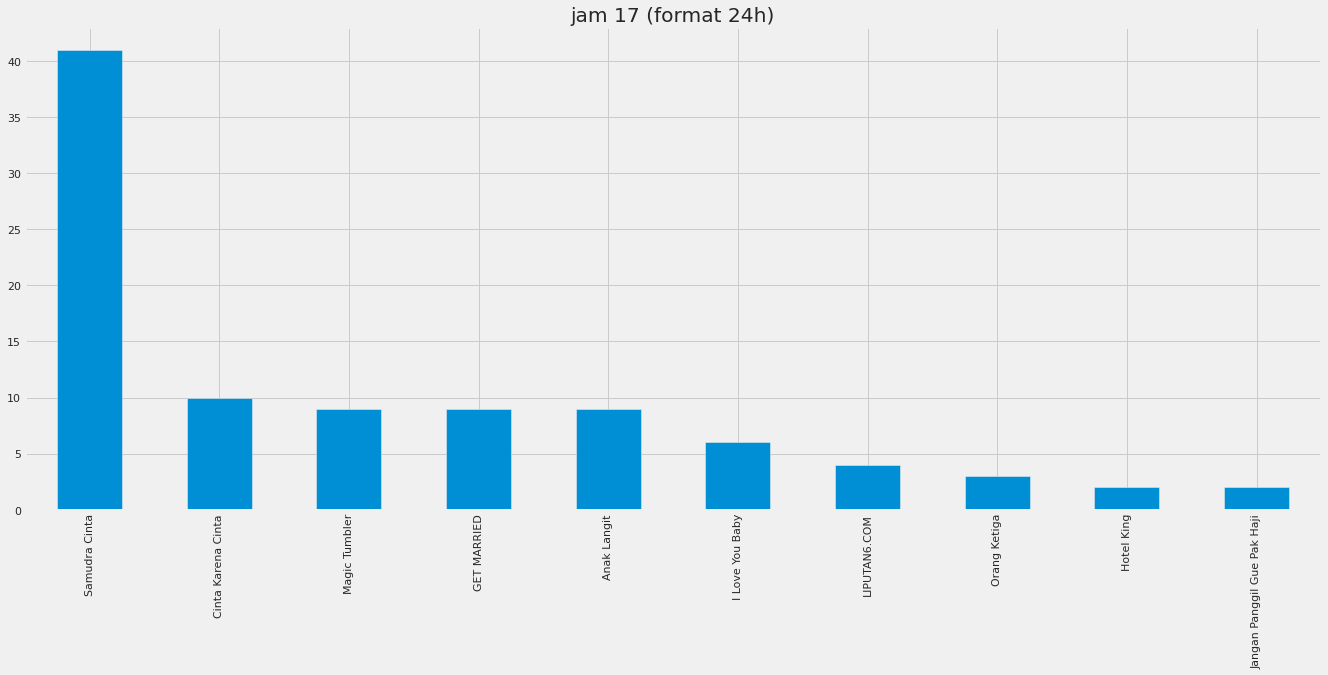

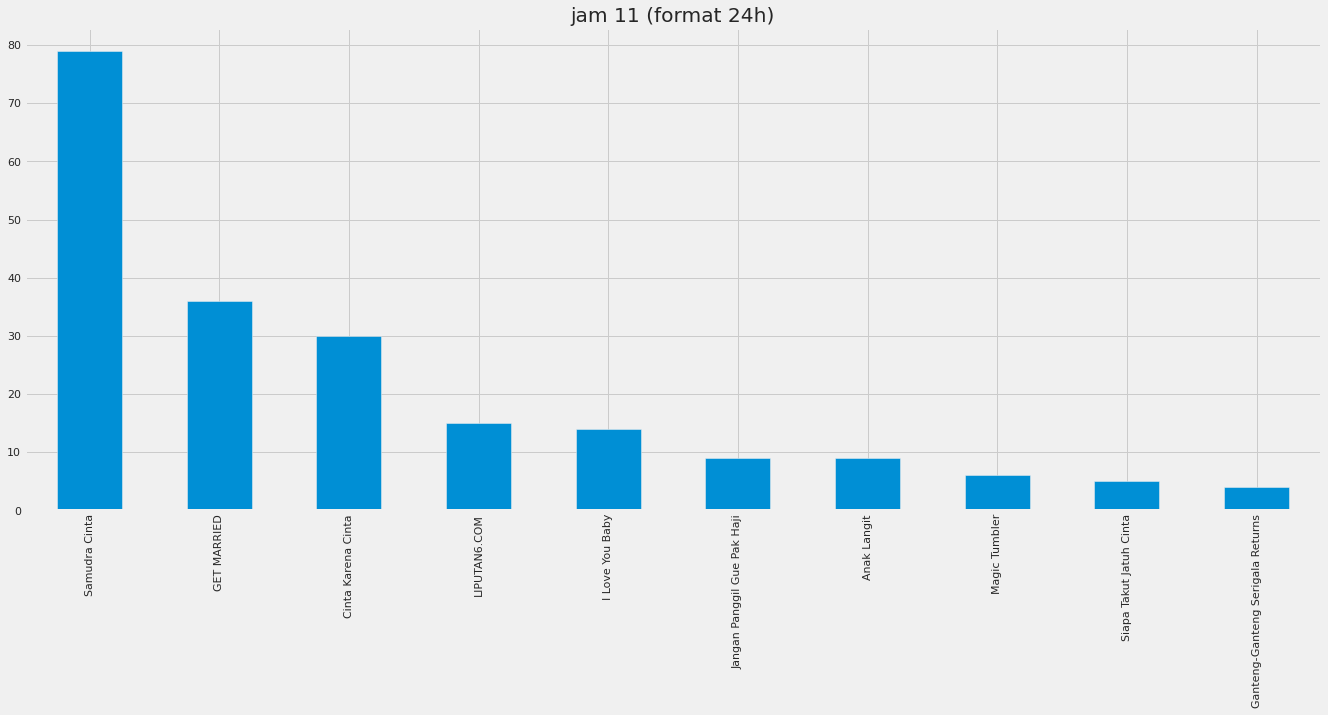

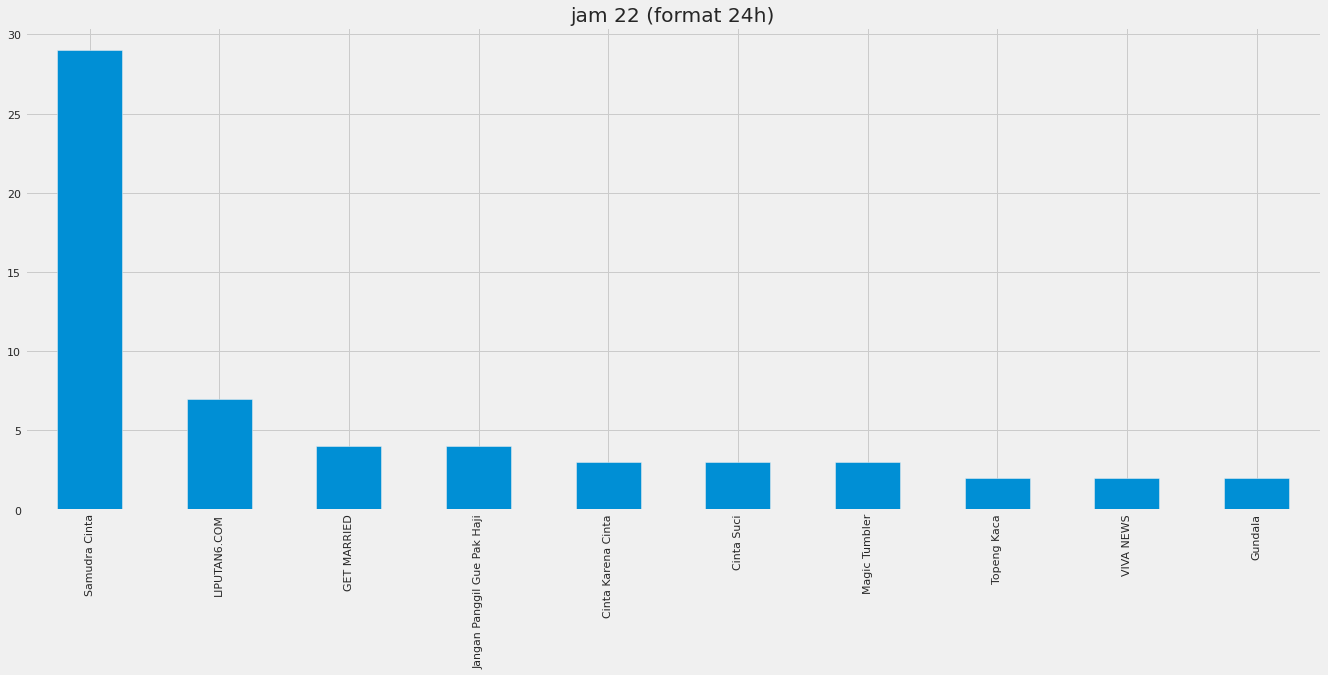

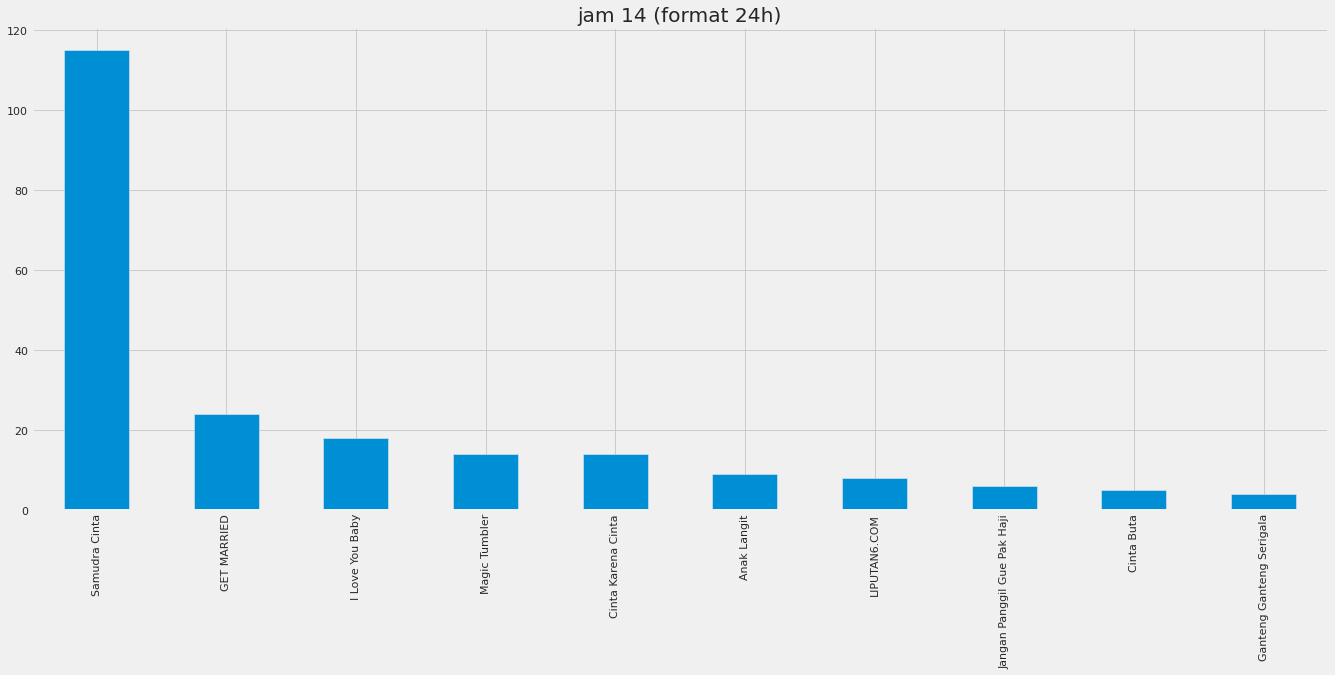

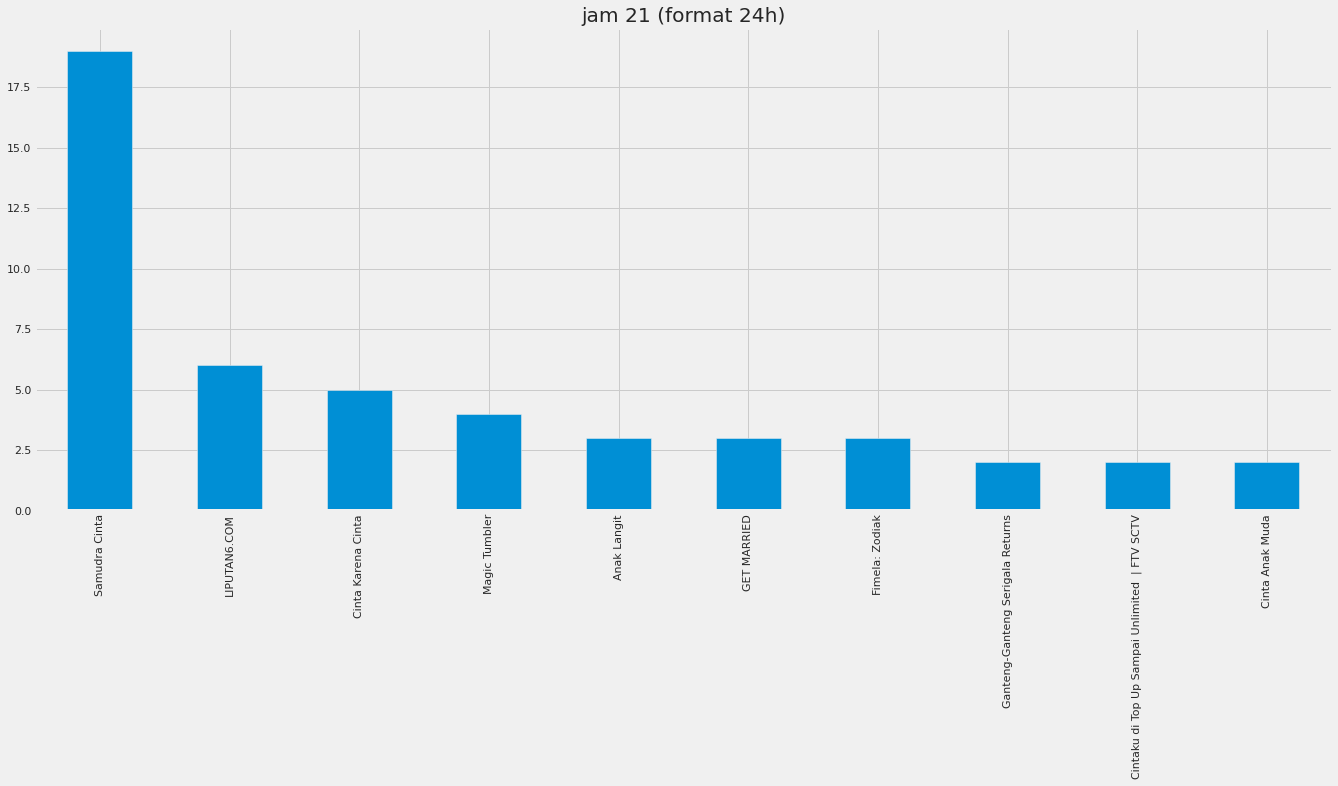

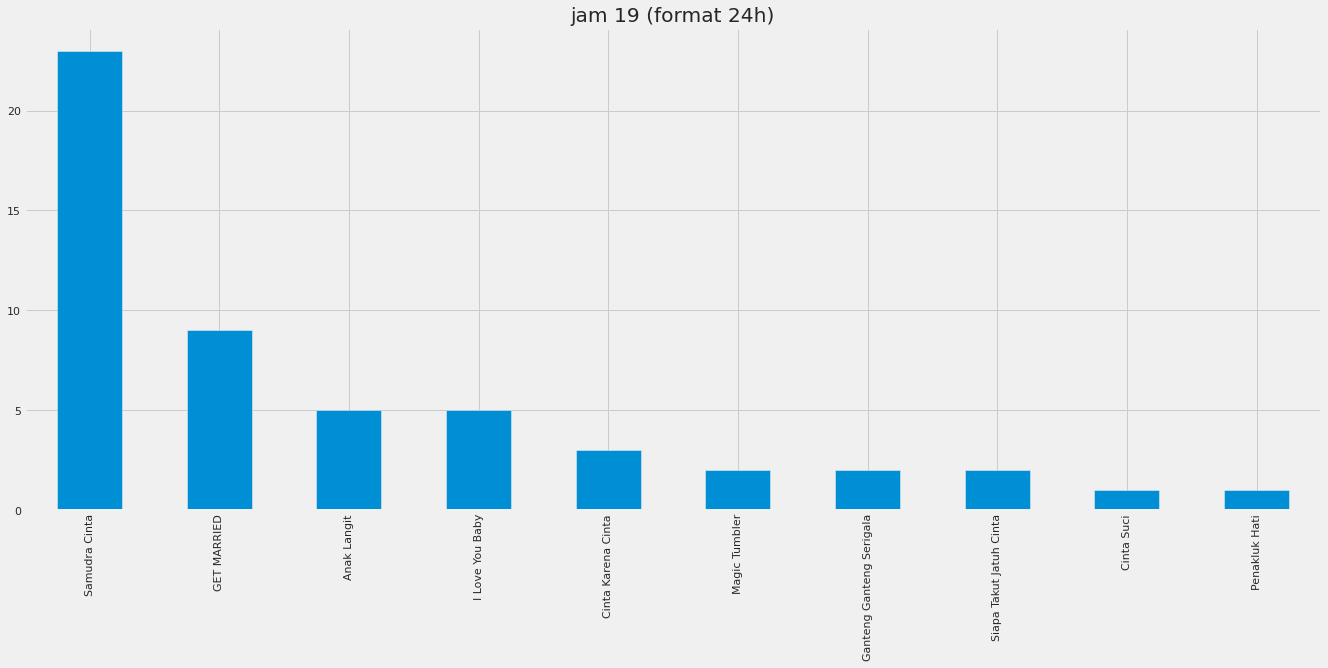

24


In [41]:
i = 0
for time in df['play_time_hour'].unique():
    df[df['play_time_hour']==time]['film_title'].value_counts().head(10).plot.bar()
    plt.title(f'jam {time} (format 24h)')
    plt.show()
    i+=1
print(i)

In [32]:
#distribusi genre, title dan film yang di tonton berdasarkan hari

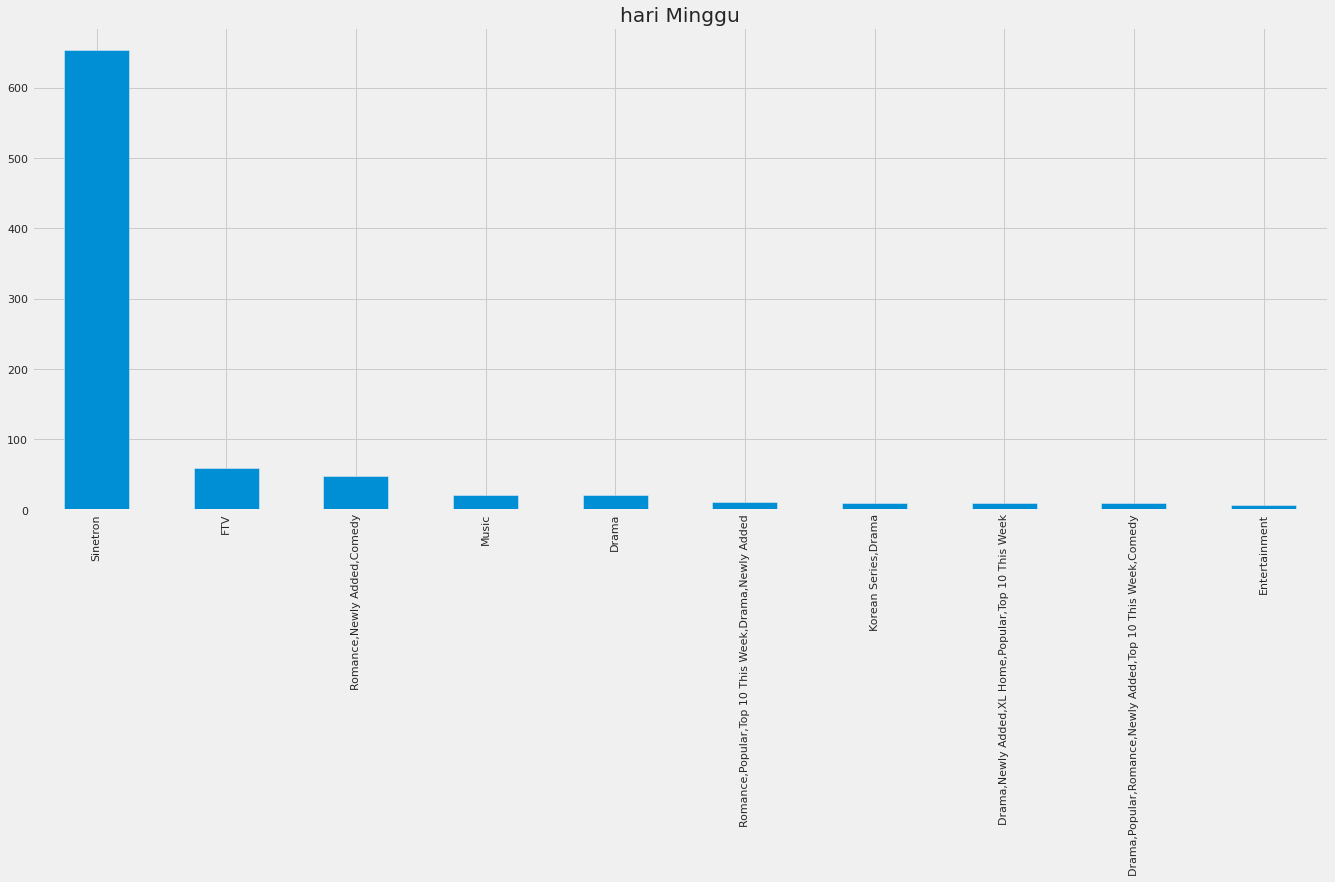

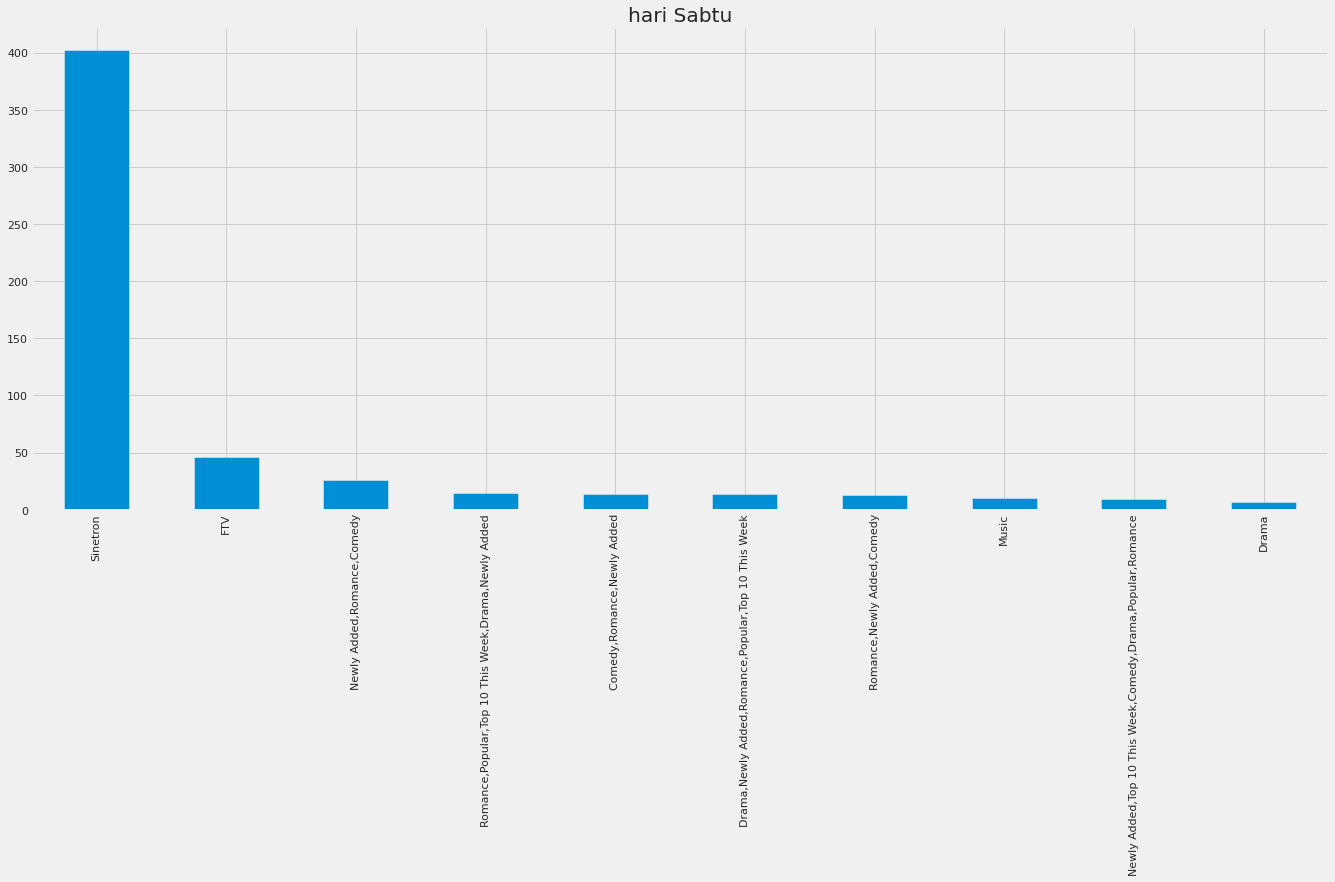

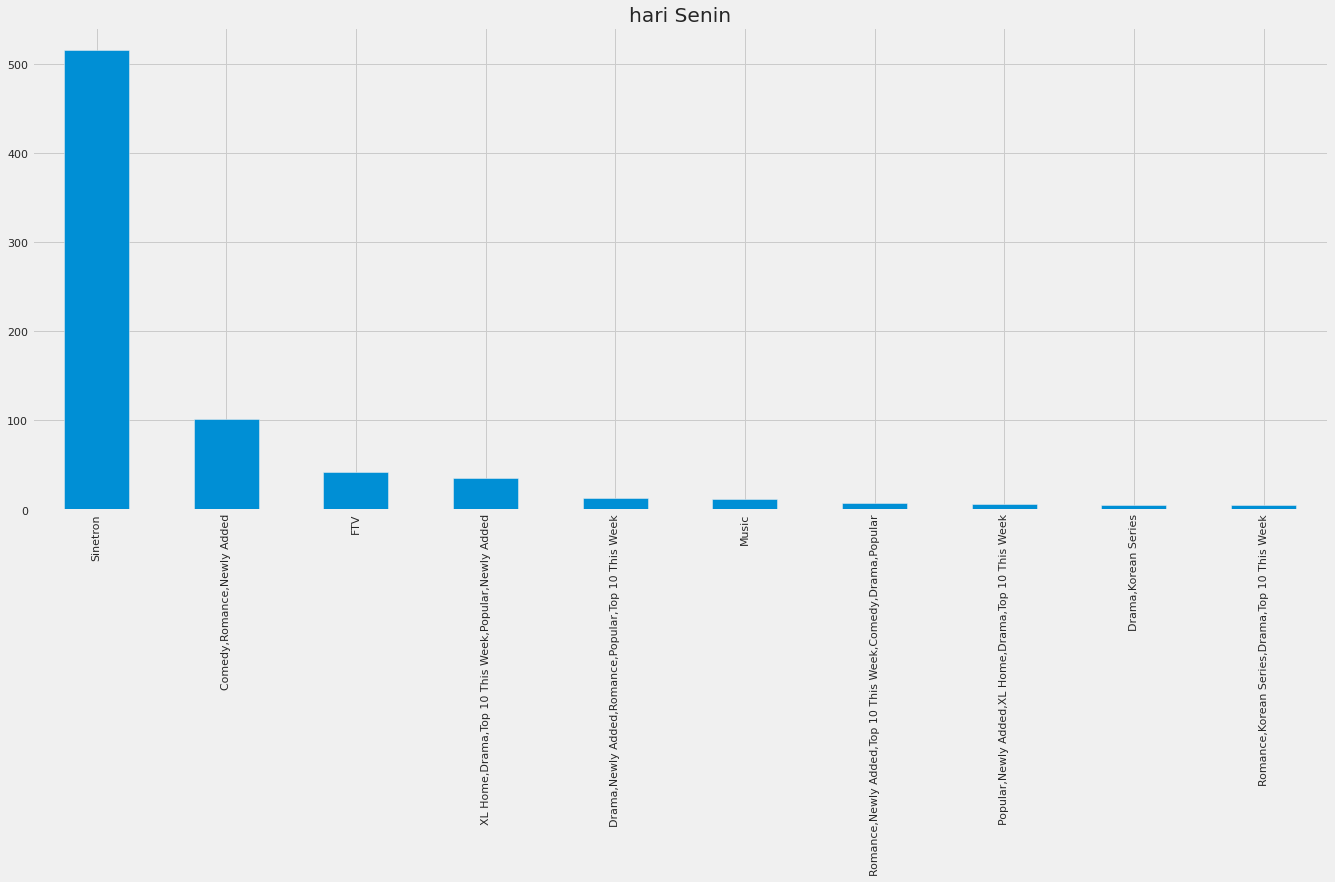

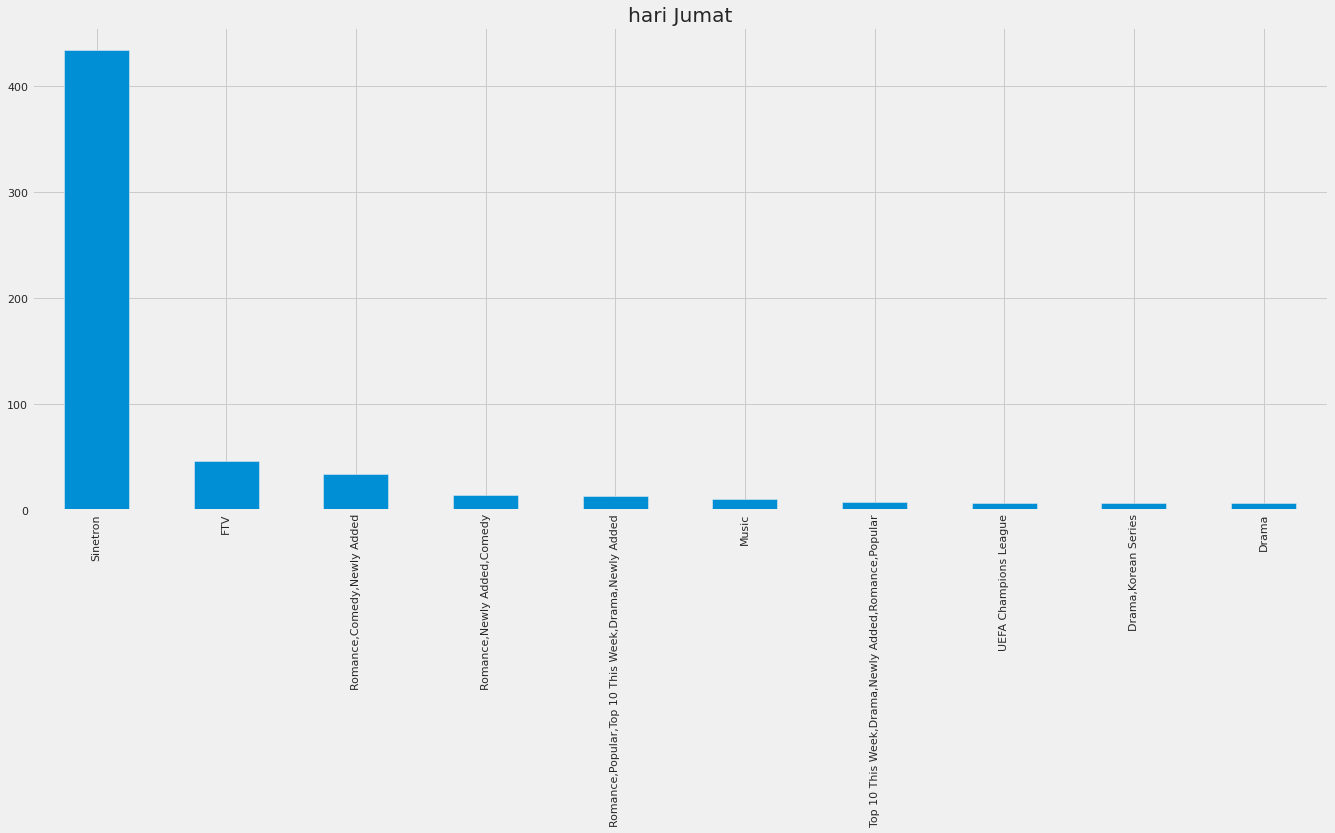

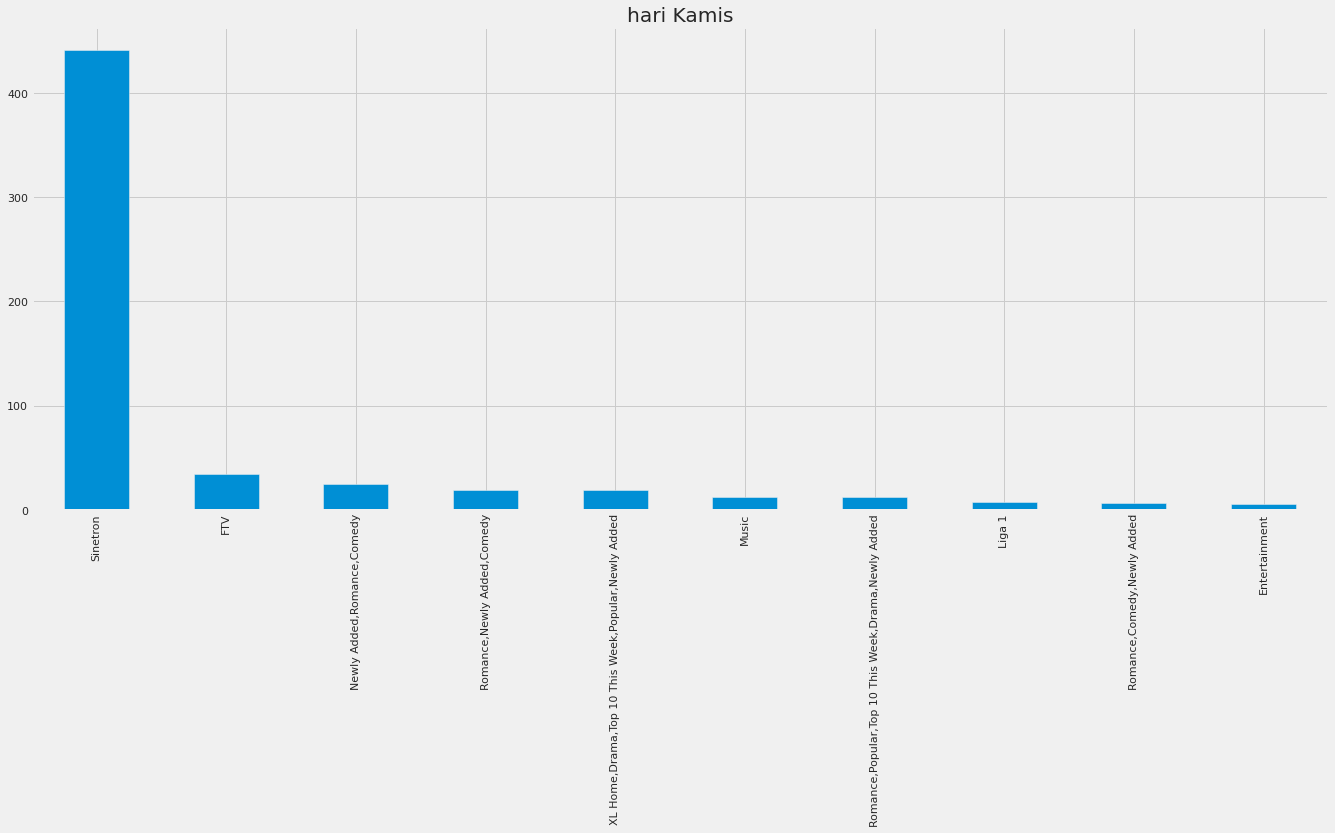

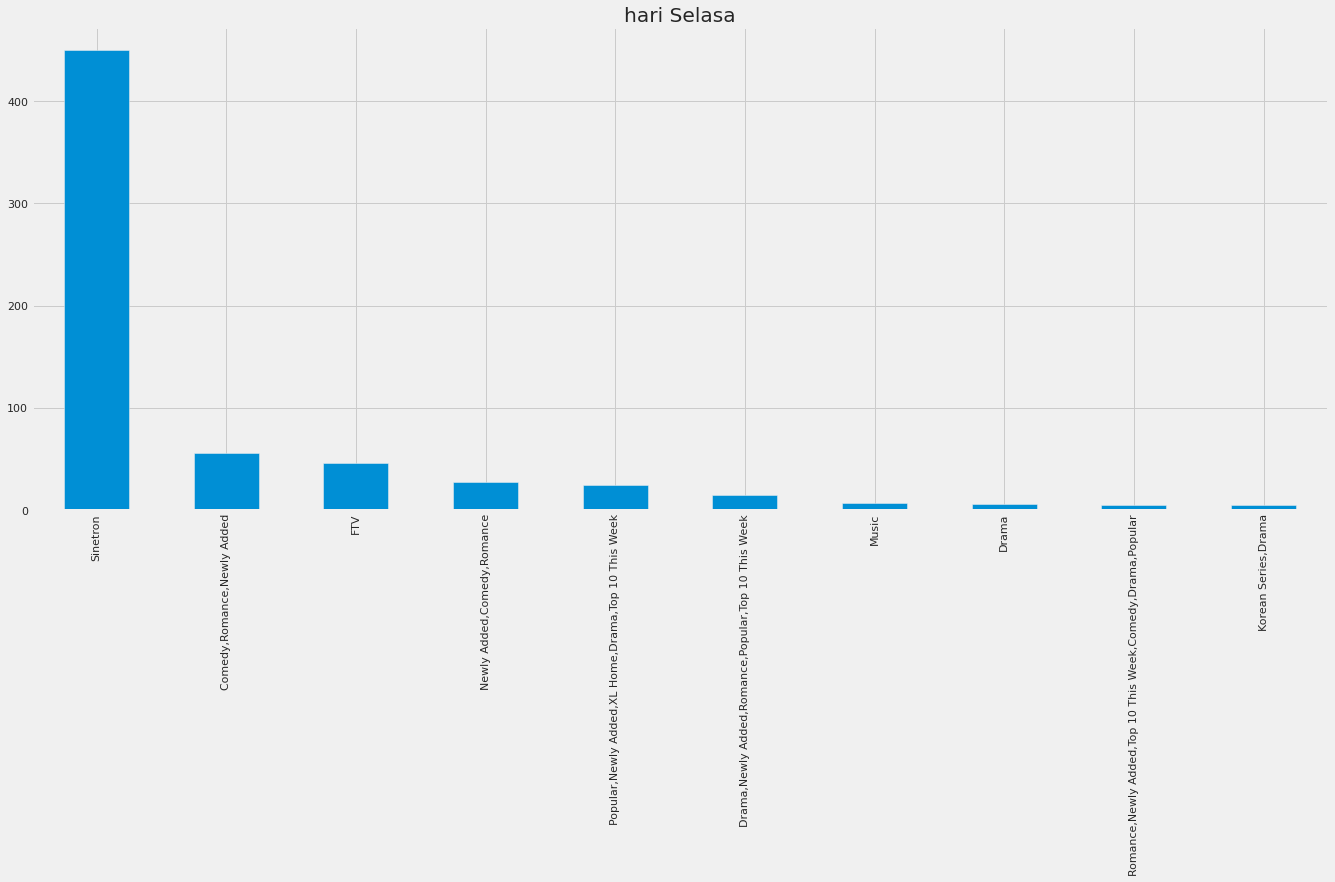

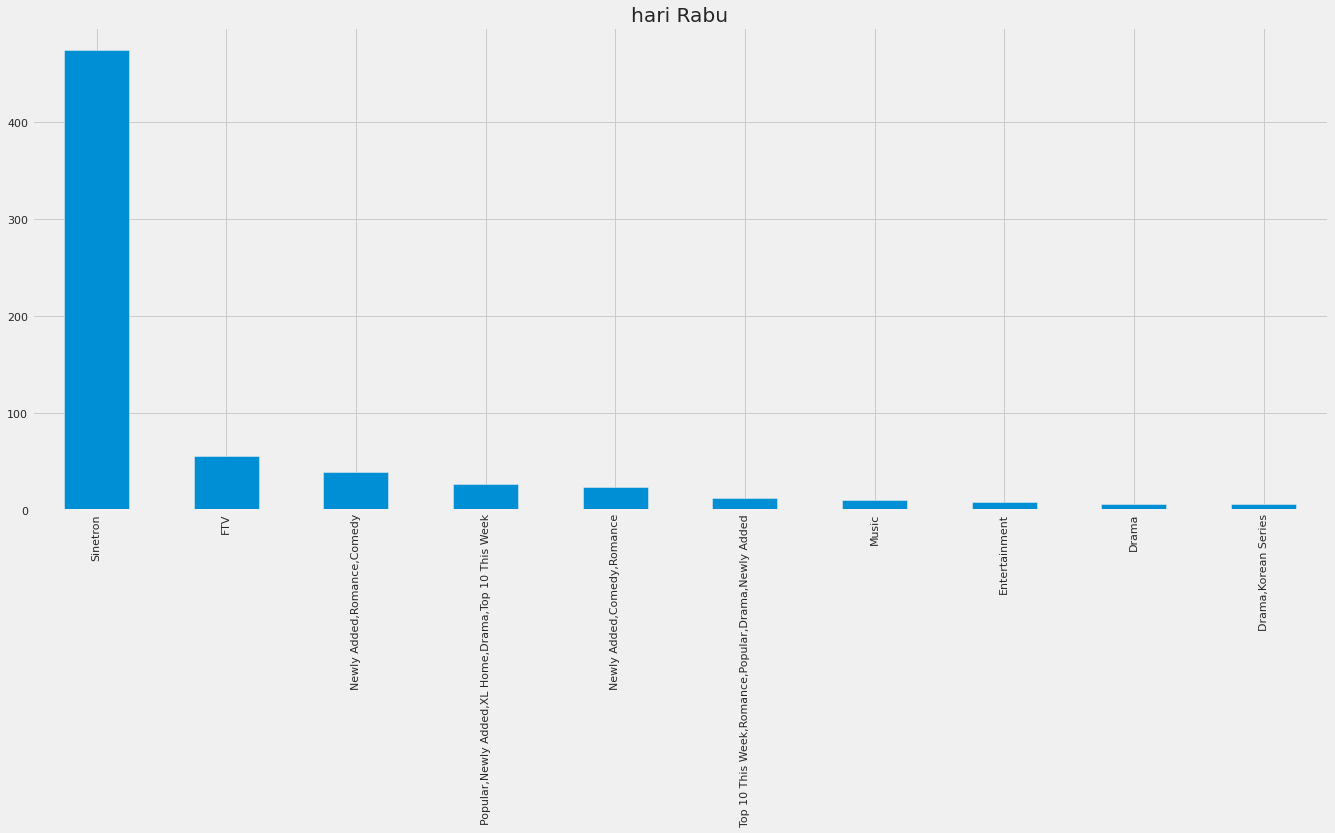

7


In [33]:
i = 0
for day in df['weekday'].unique():
    df[df['weekday']==day]['genre_name'].value_counts().head(10).plot.bar()
    plt.title(f'hari {day}')
    plt.show()
    i += 1
print(i)

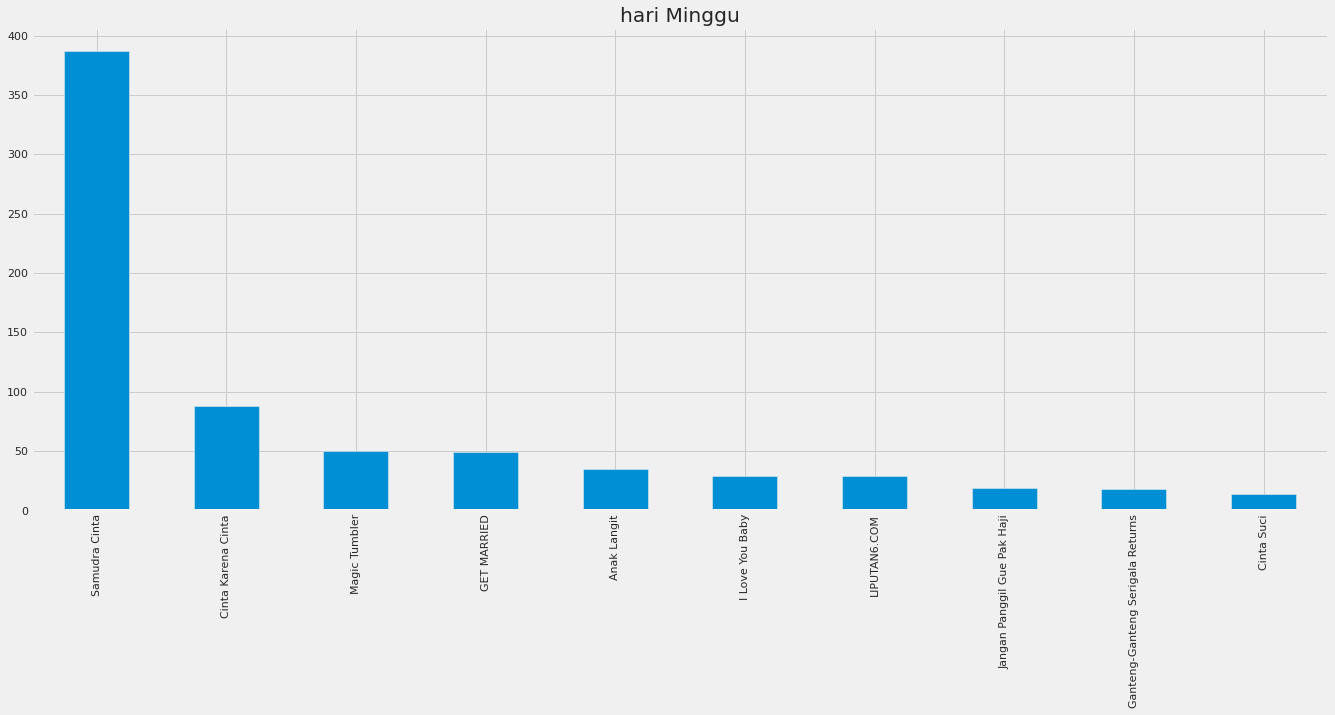

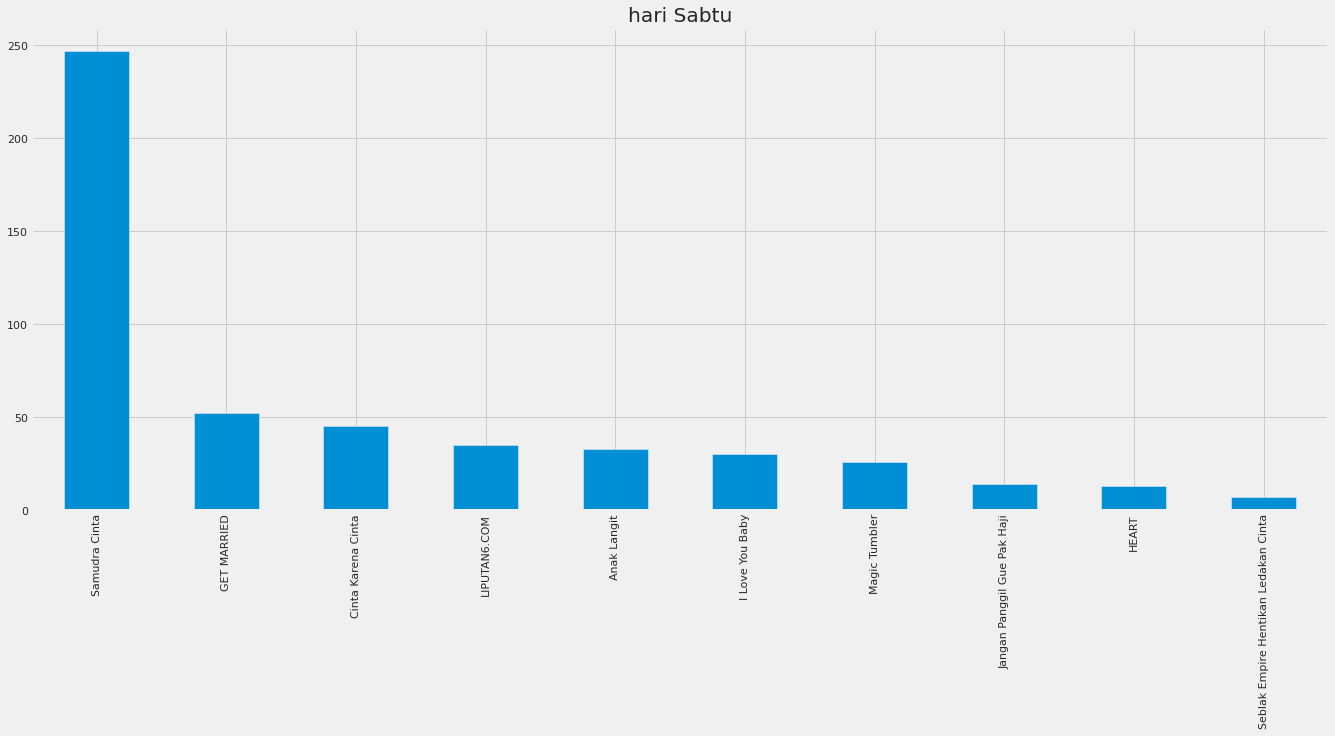

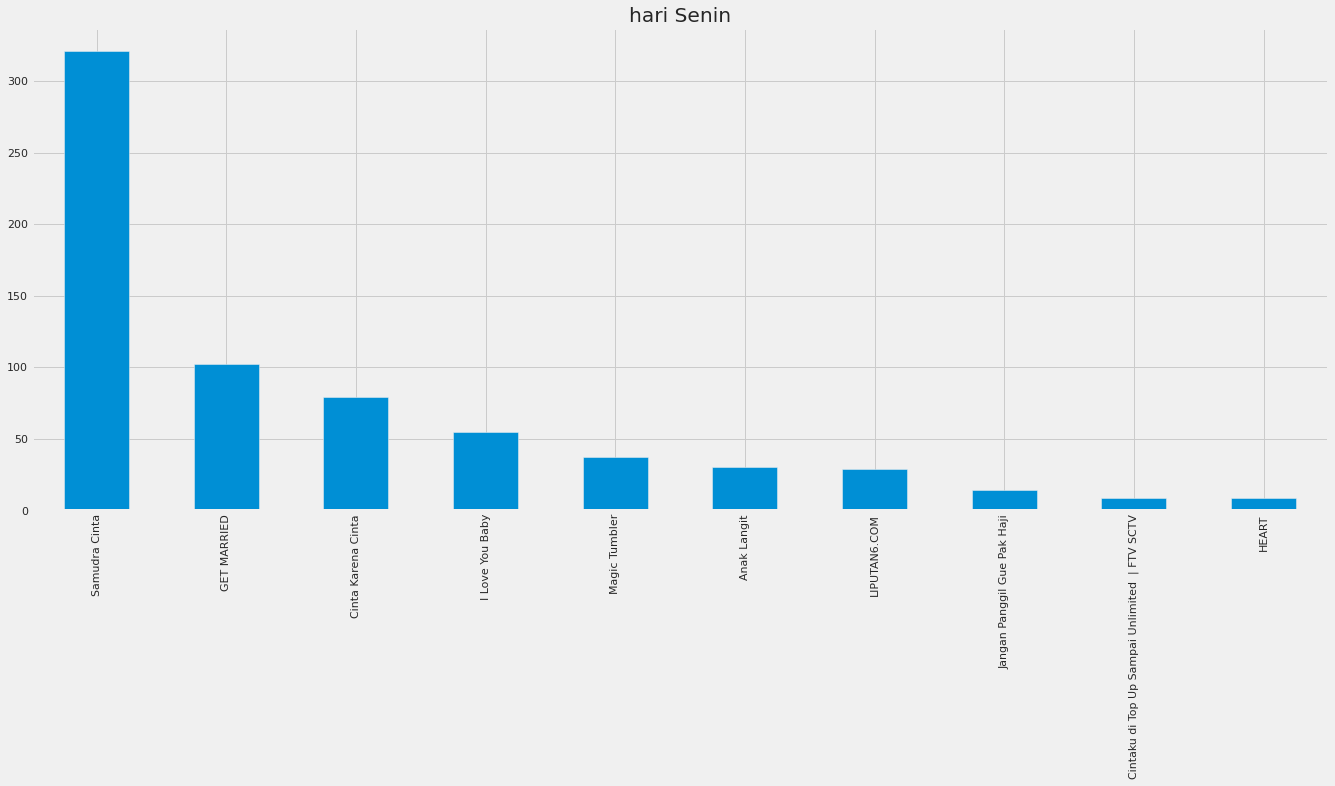

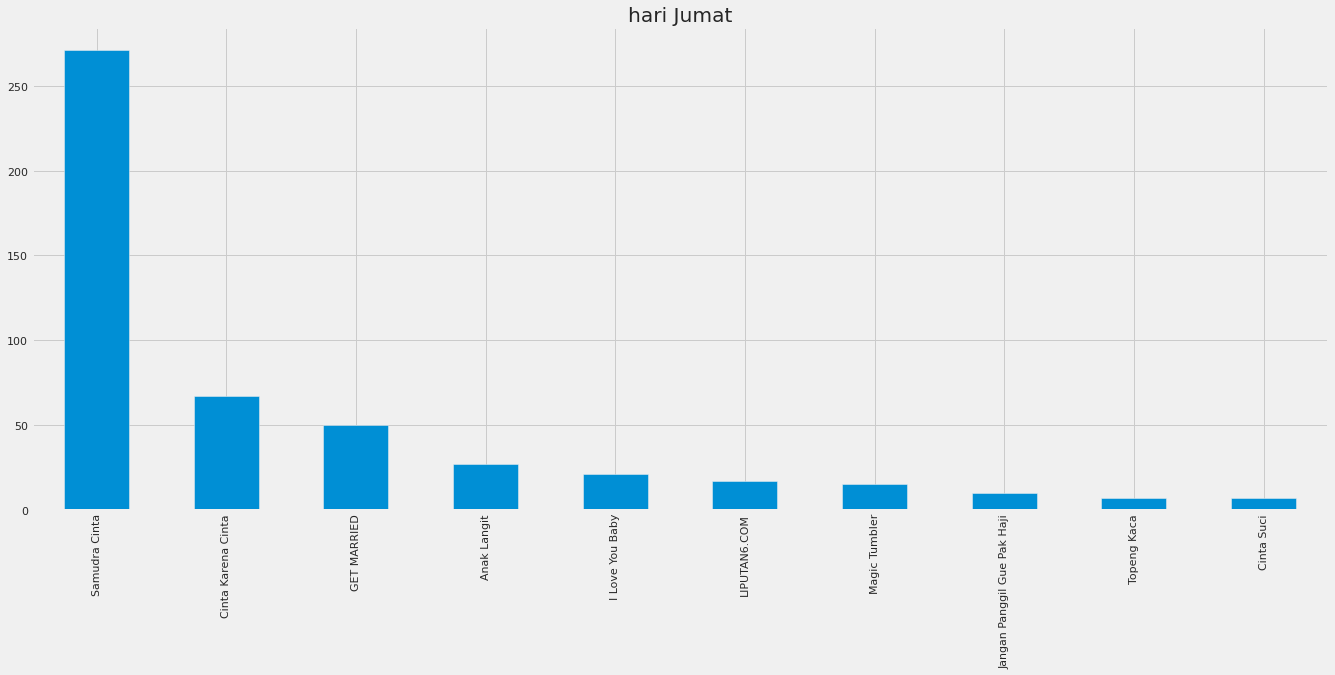

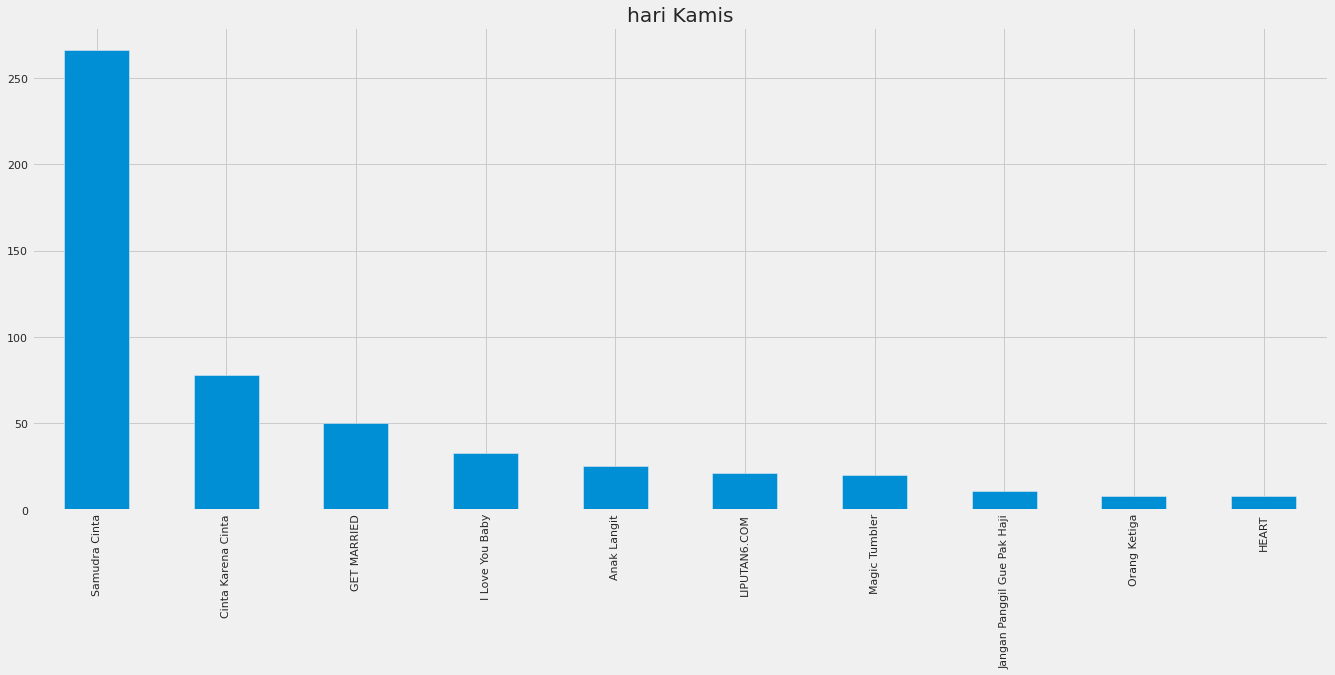

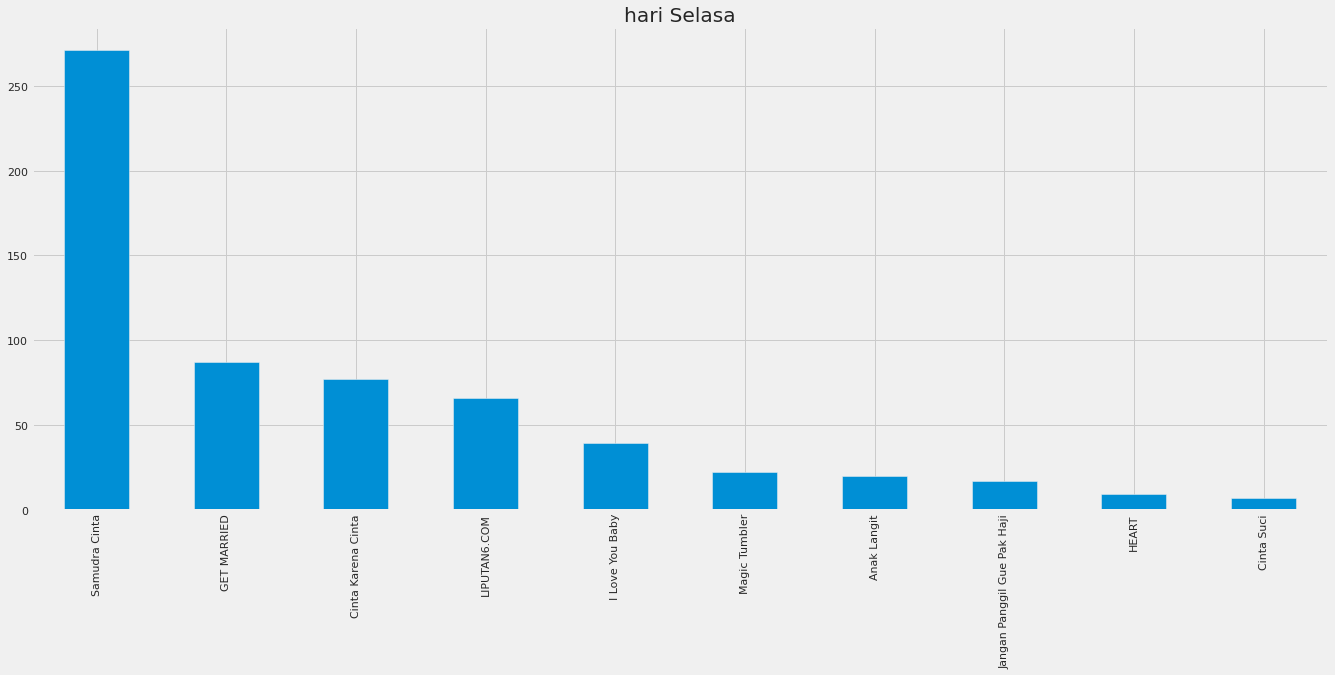

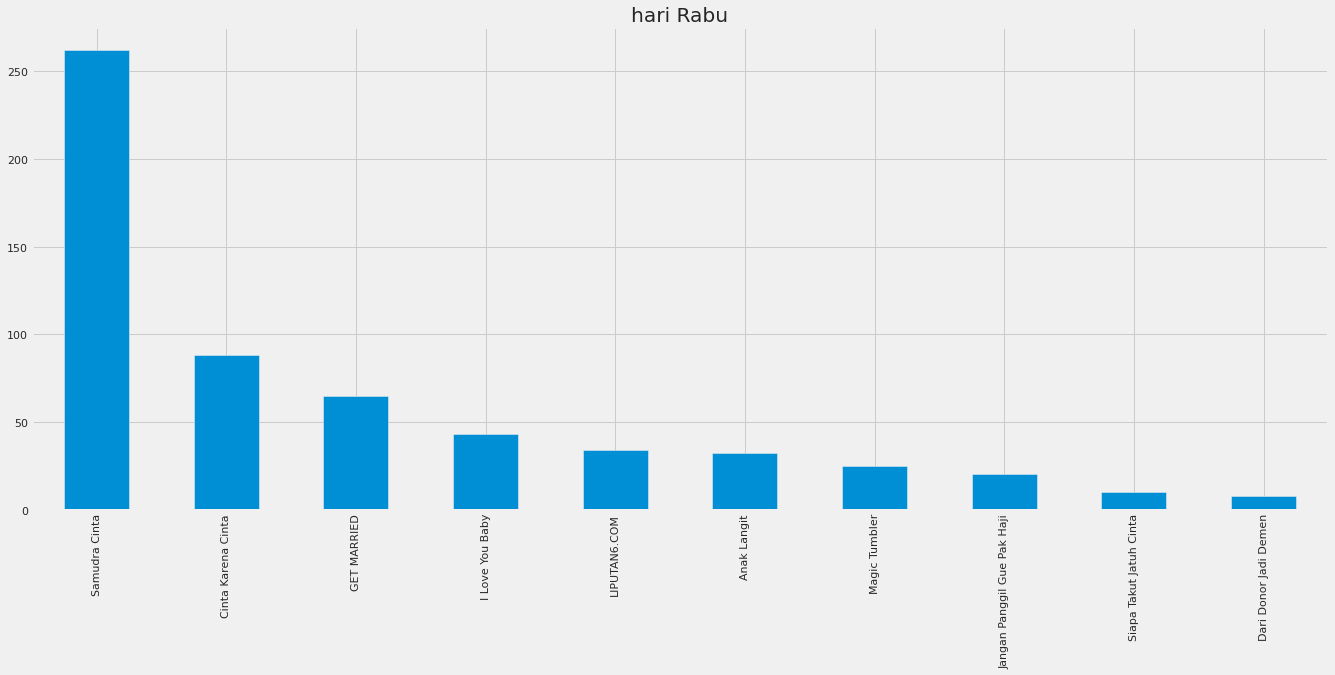

7


In [34]:
i = 0
for day in df['weekday'].unique():
    df[df['weekday']==day]['film_title'].value_counts().head(10).plot.bar()
    plt.title(f'hari {day}')
    plt.show()
    i+=1
print(i)

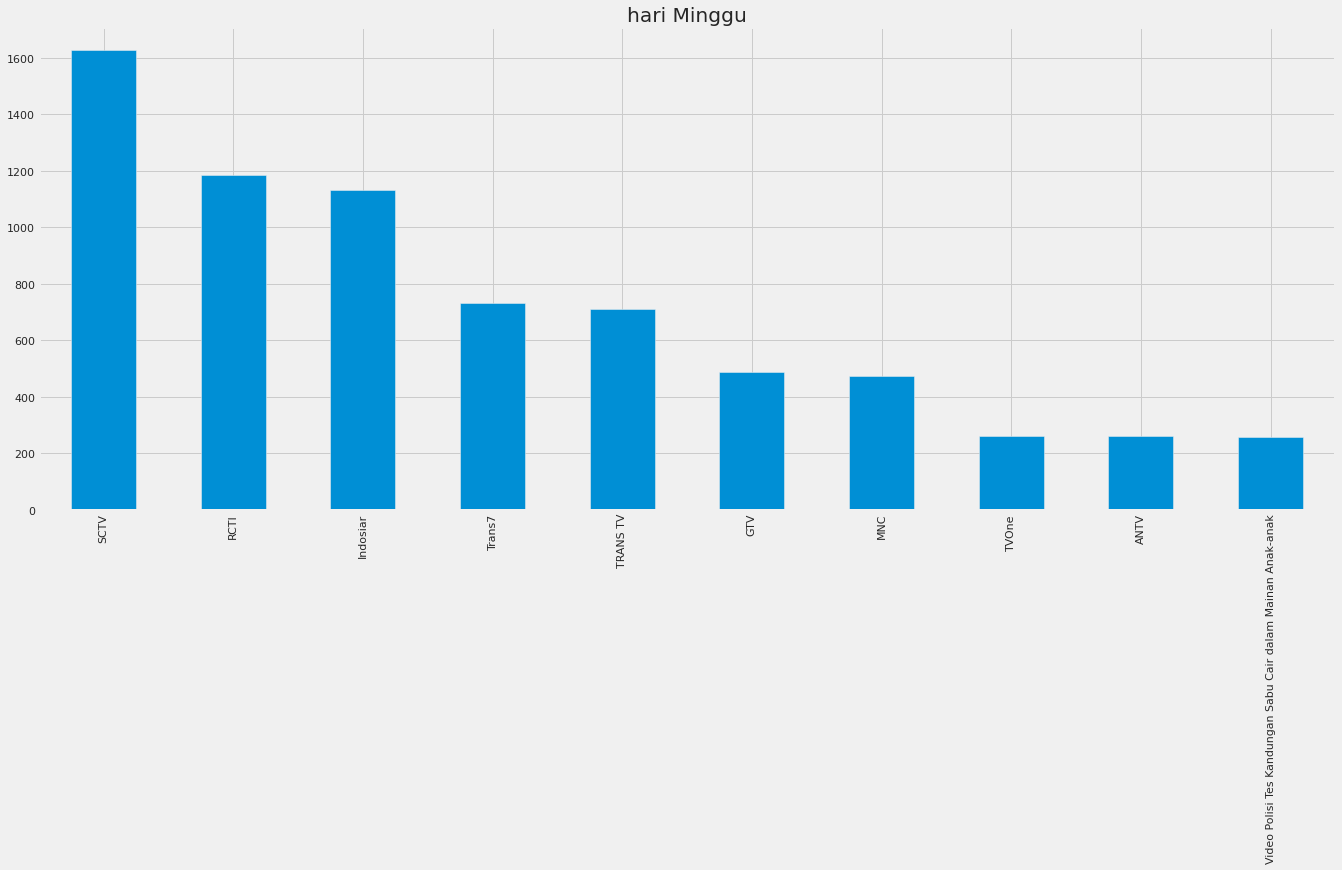

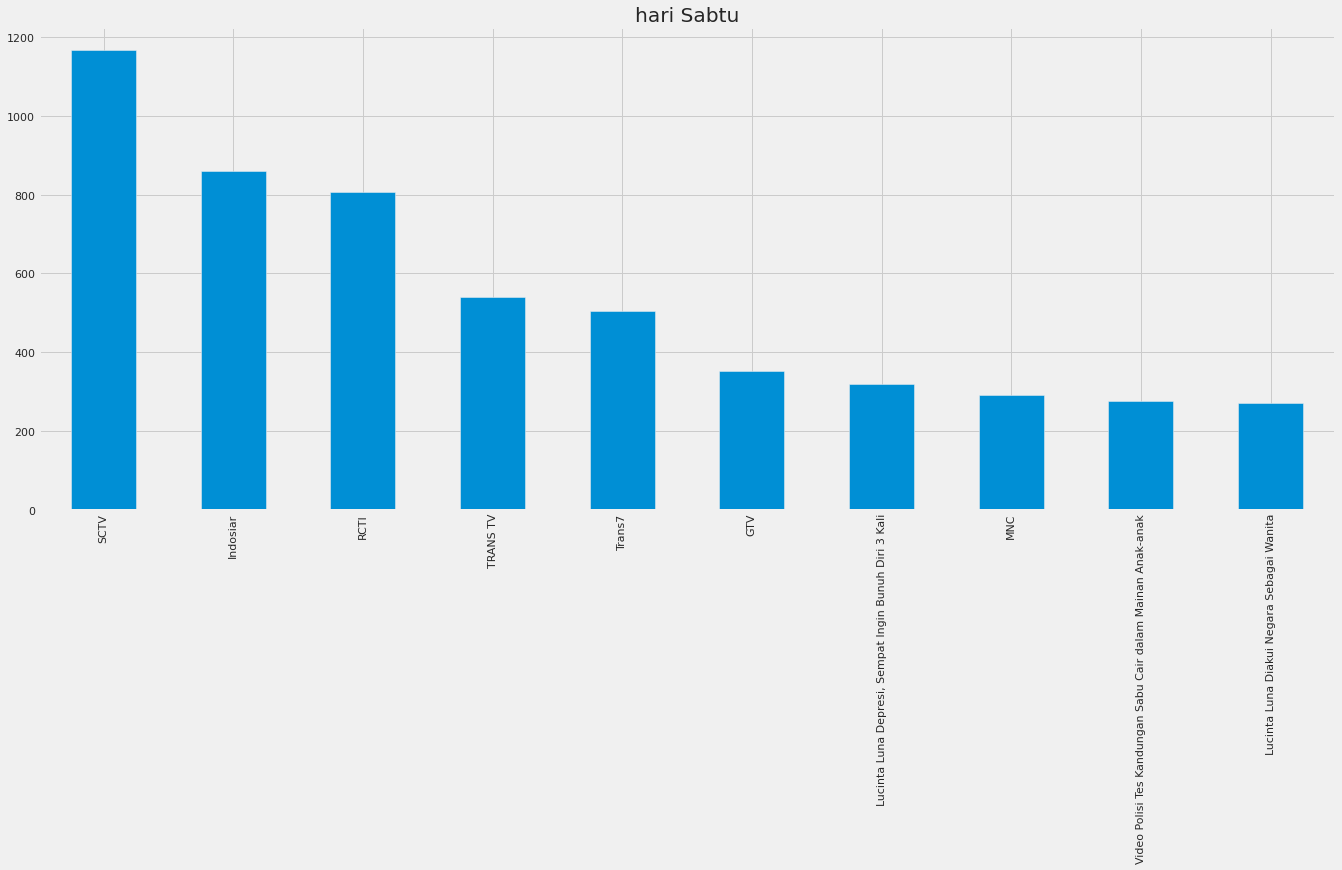

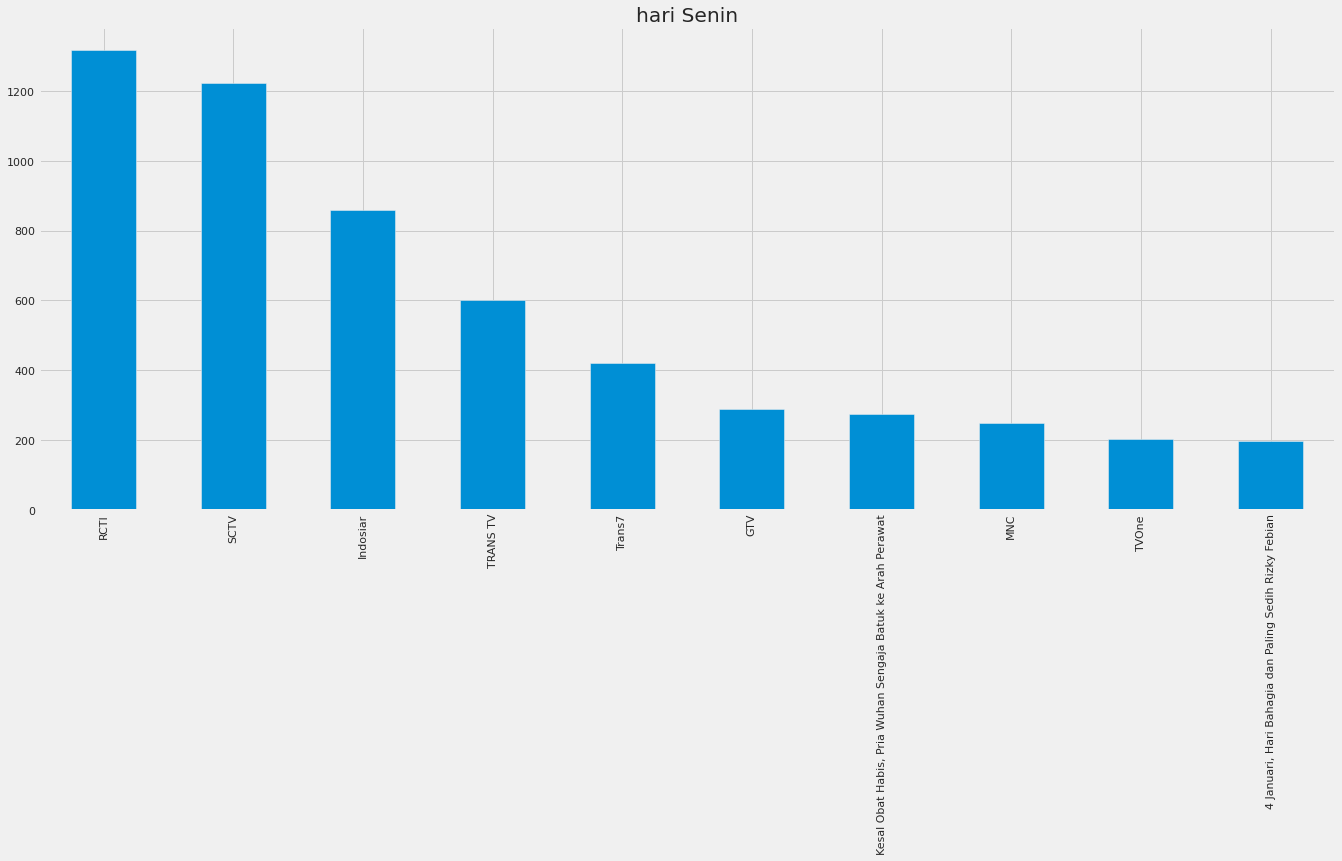

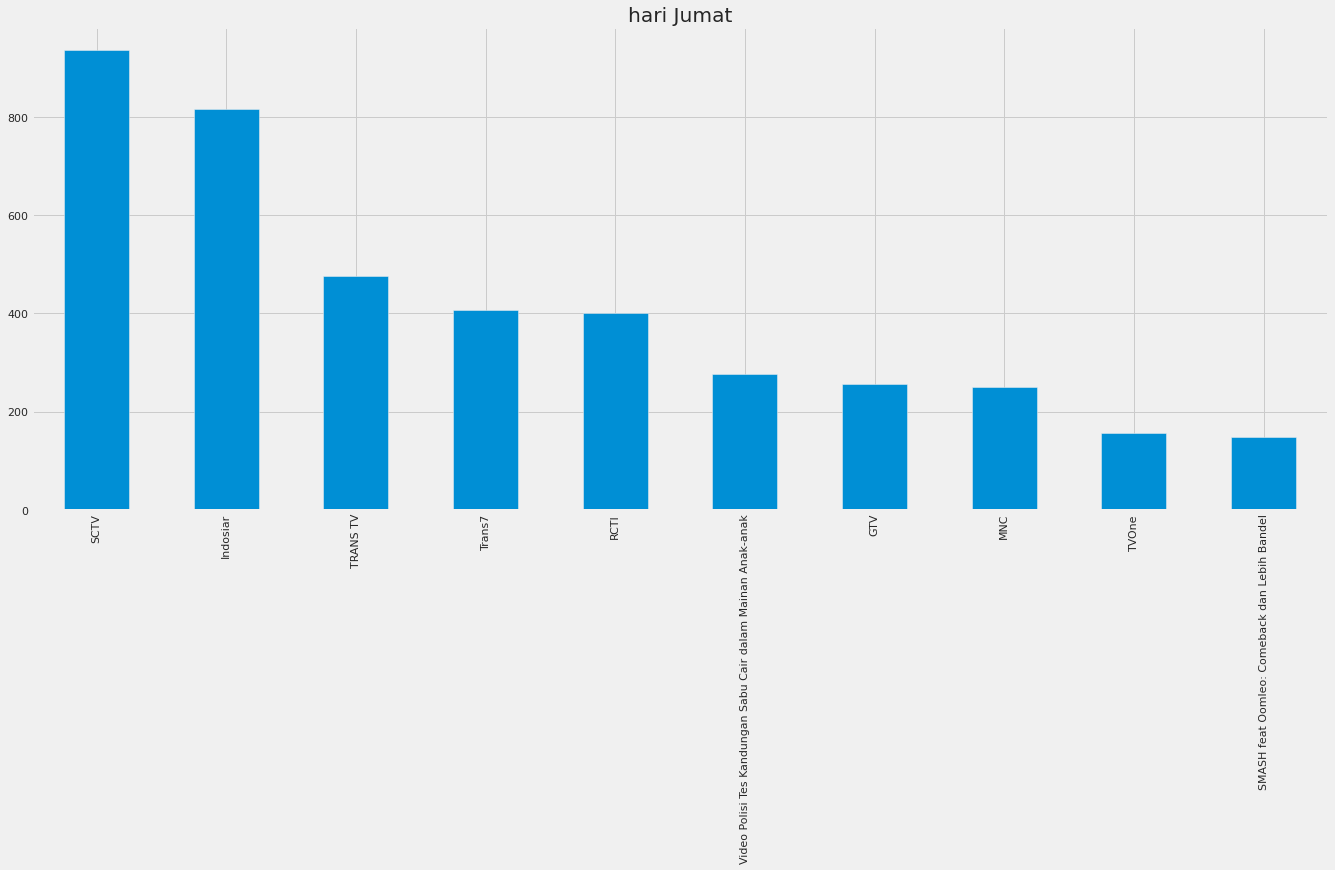

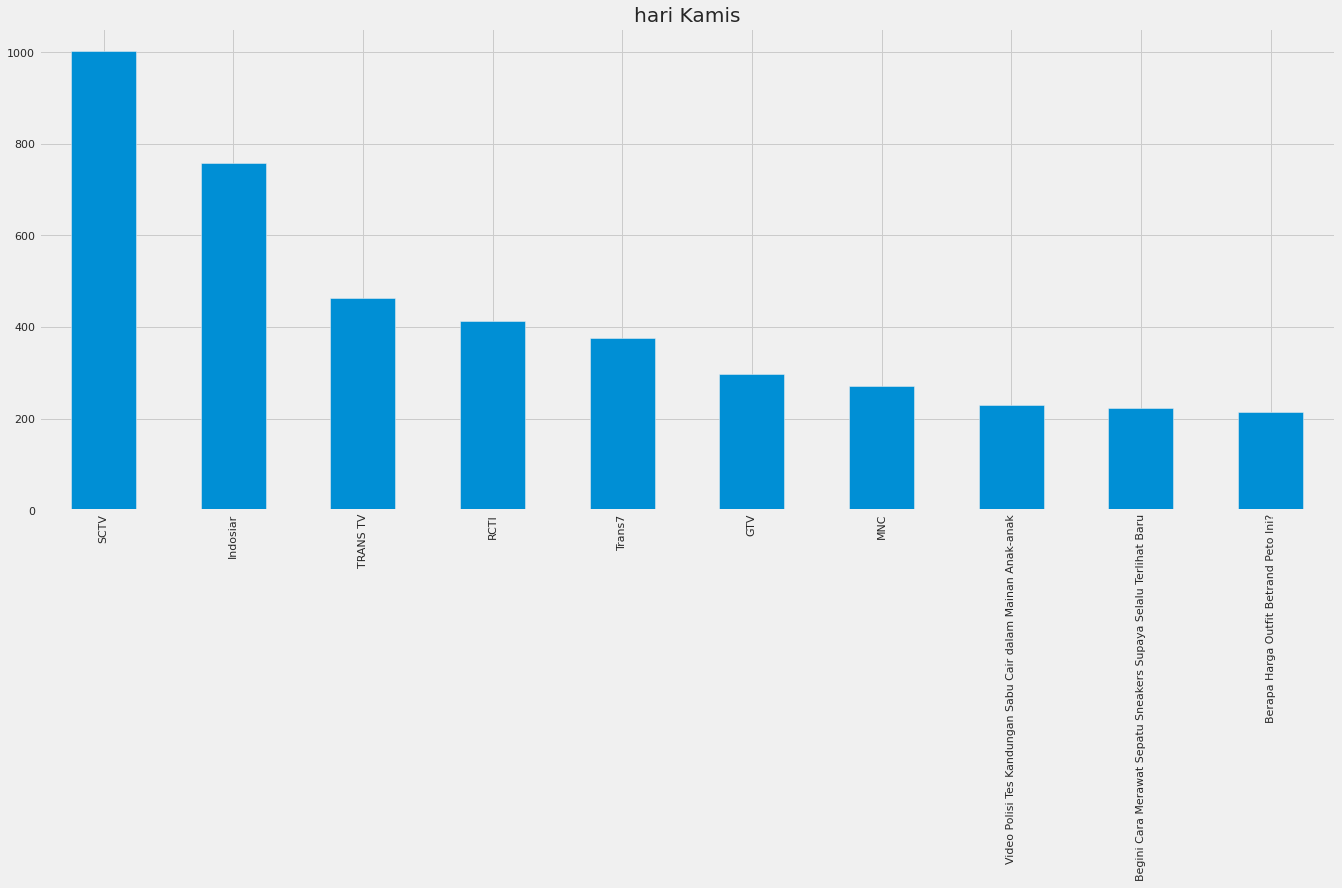

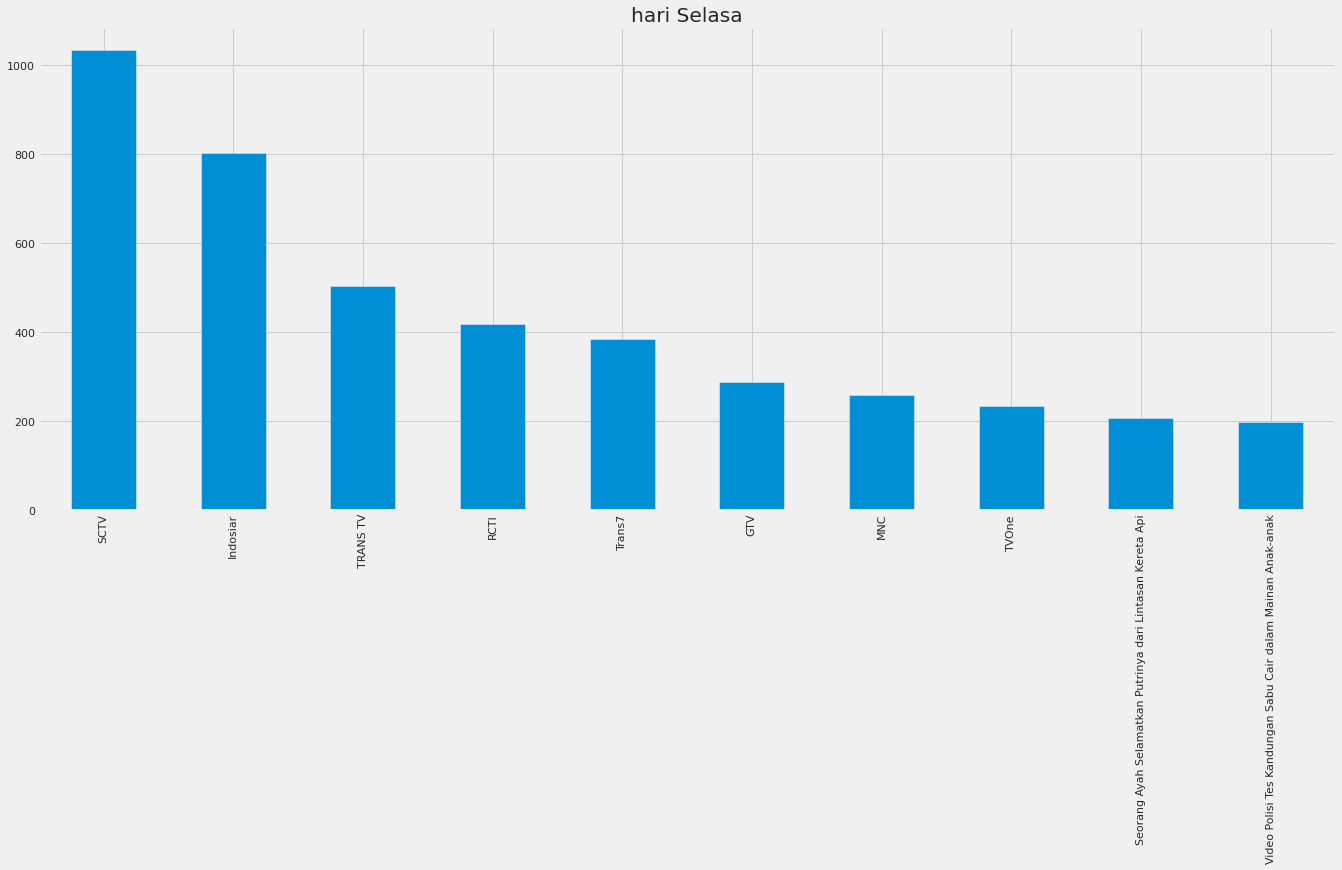

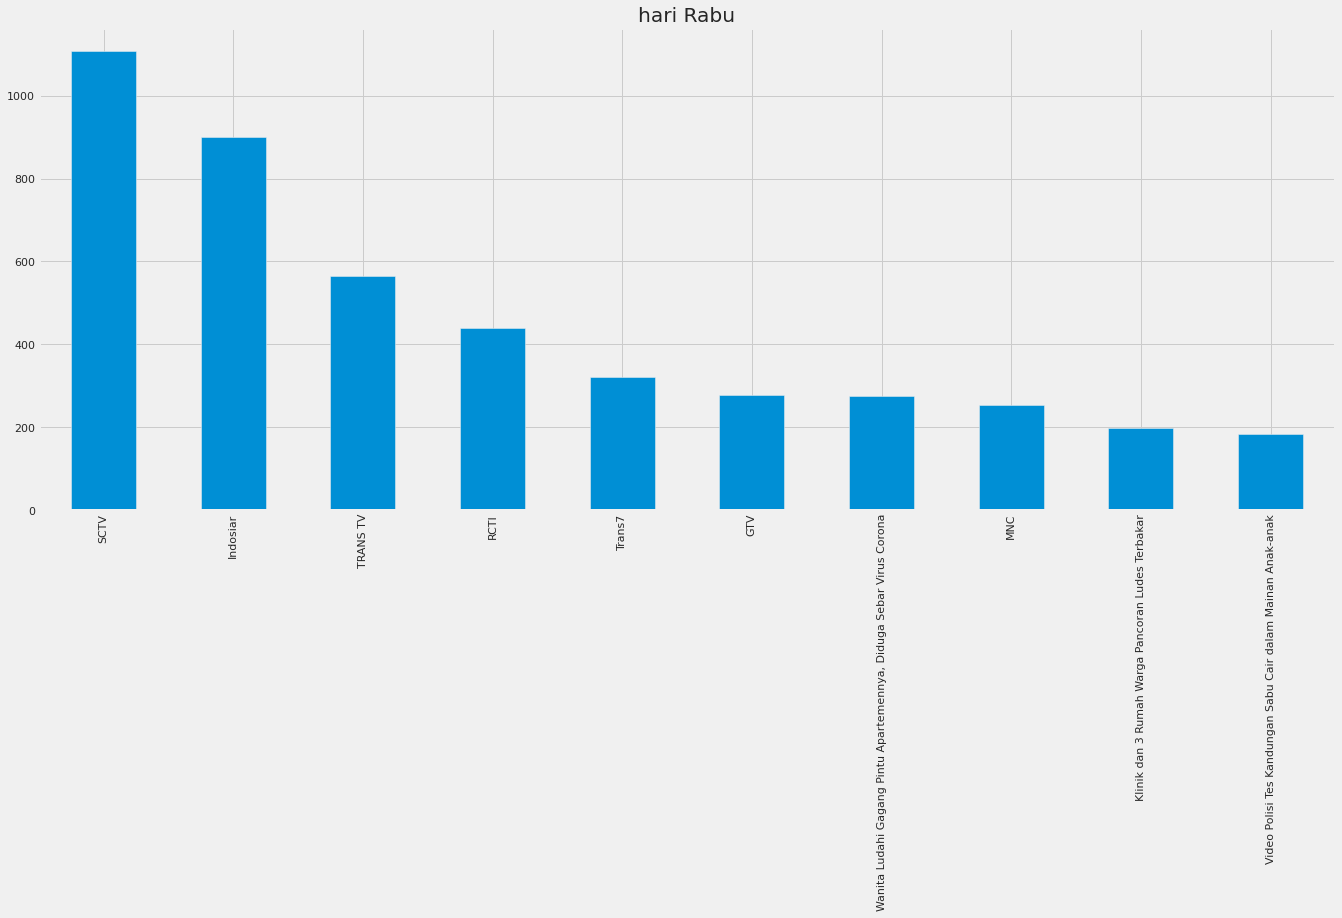

7


In [35]:
i = 0
for day in df['weekday'].unique():
    df[df['weekday']==day]['title'].value_counts().head(10).plot.bar()
    plt.title(f'hari {day}')
    plt.show()
    i+=1
print(i)

In [36]:
#distribusi genre, title dan film yang di tonton berdasarkan tanggal

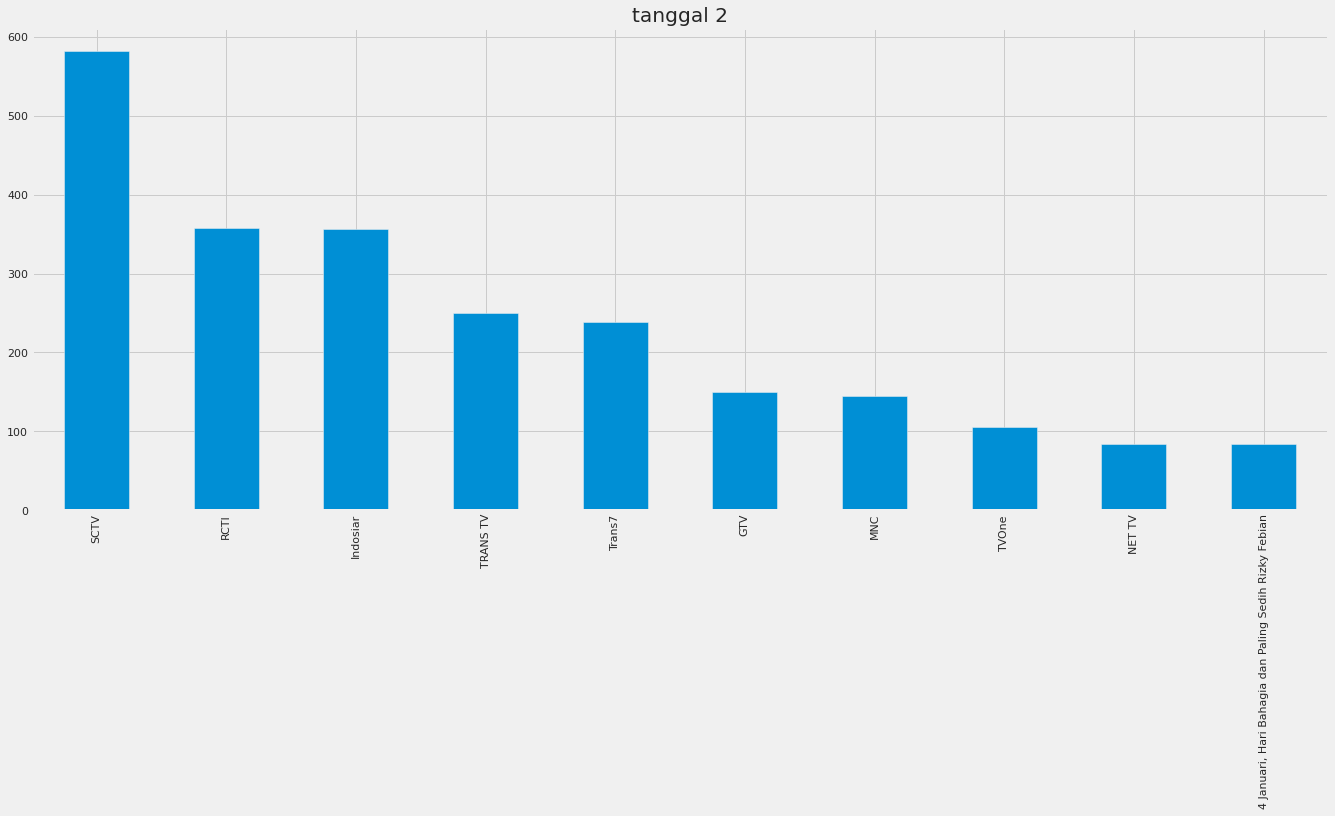

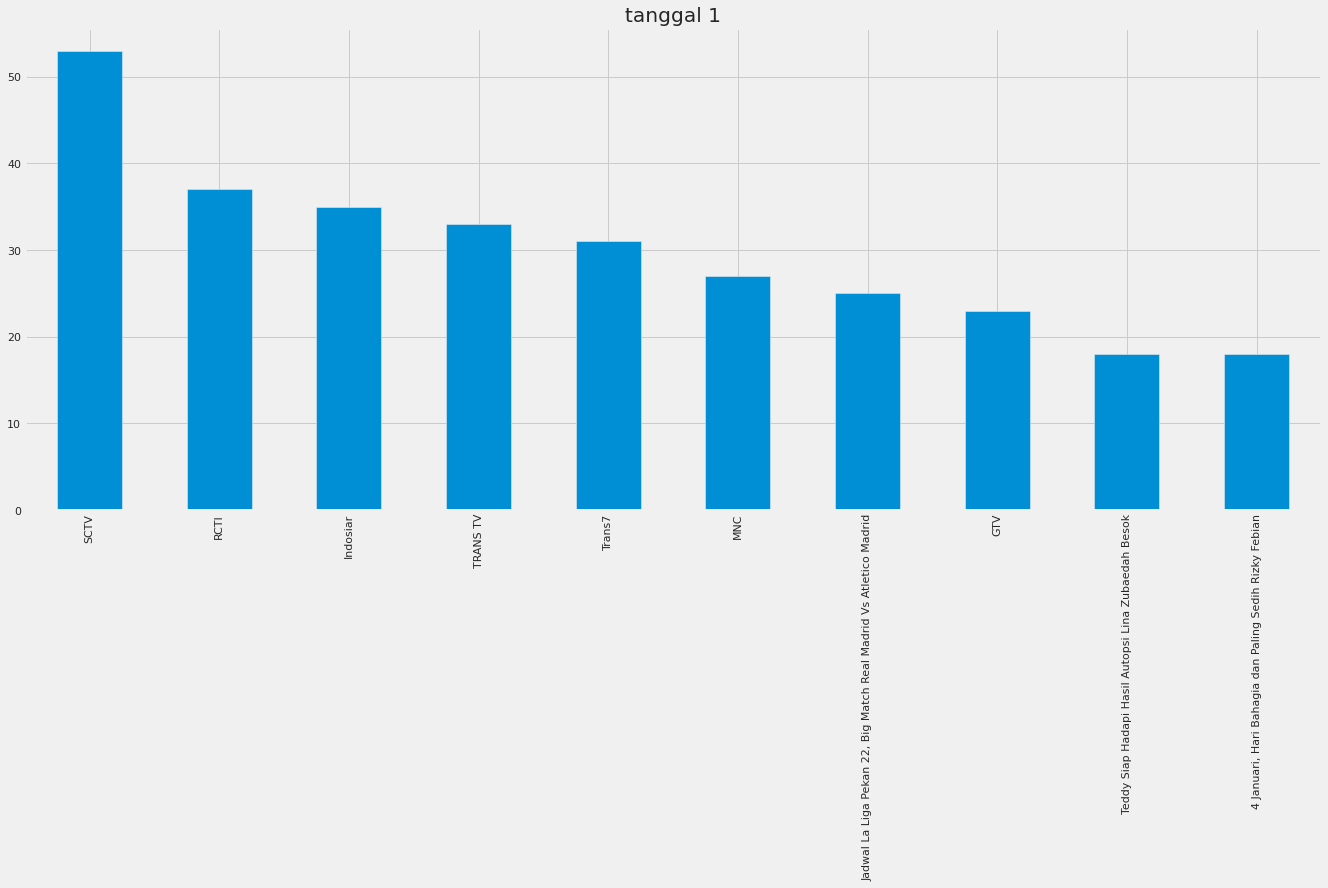

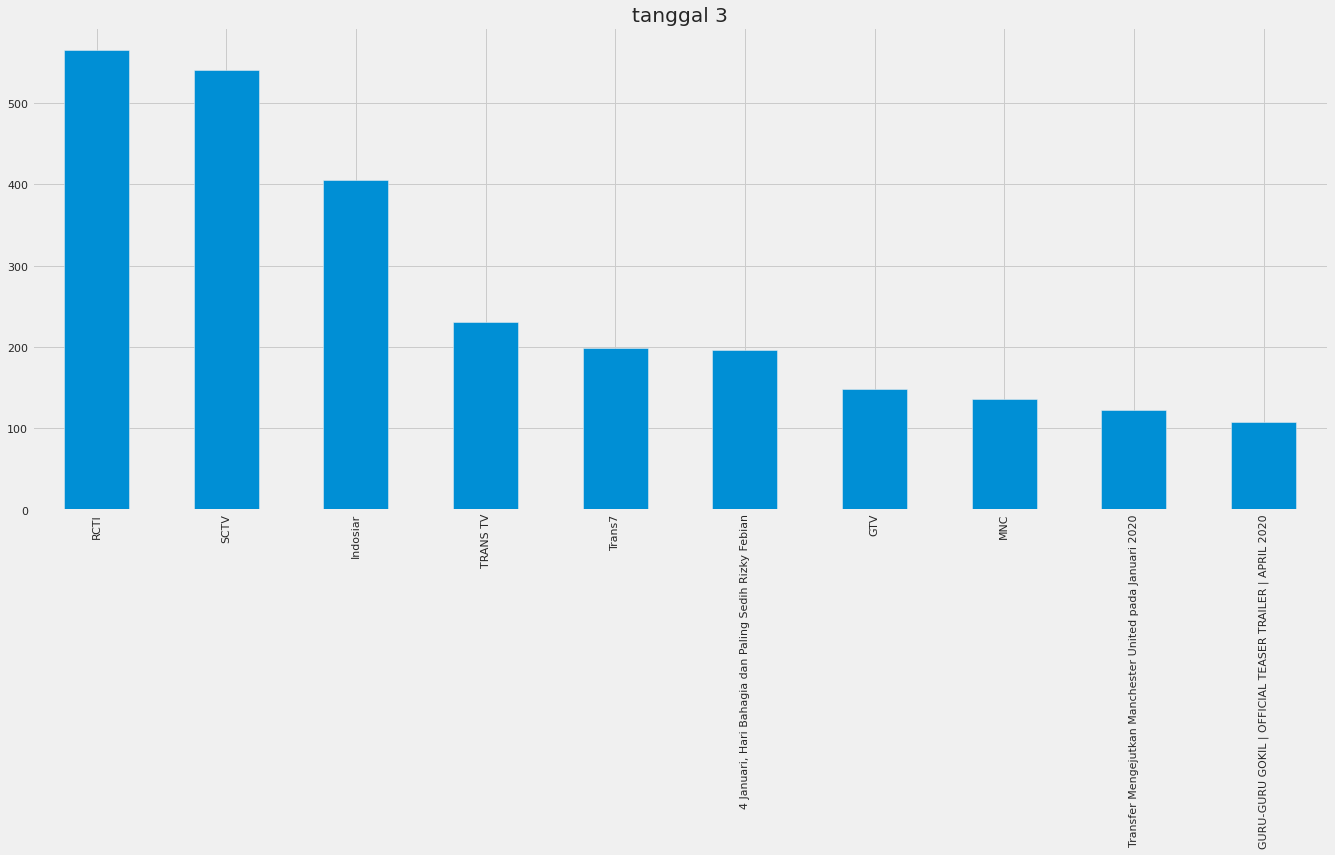

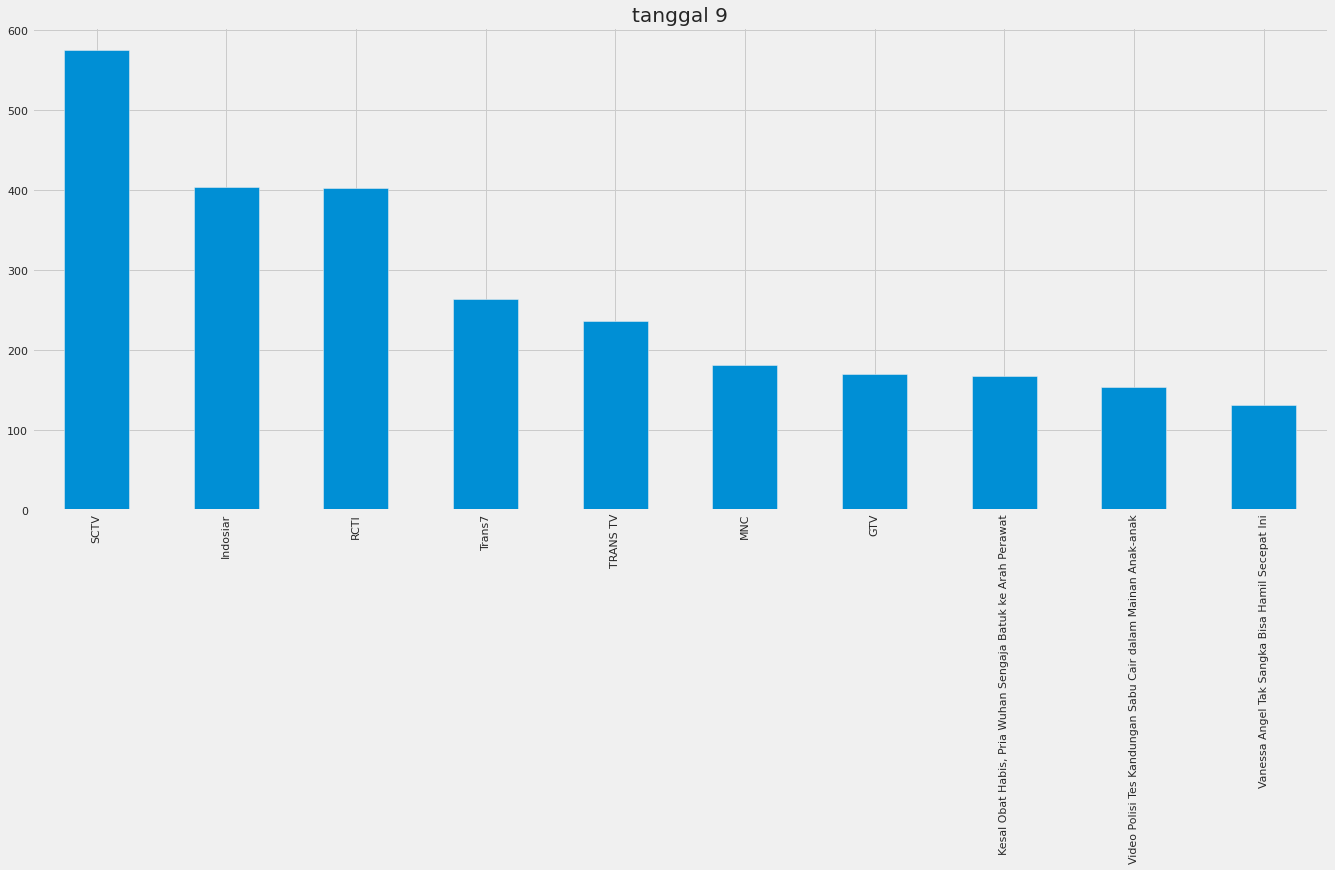

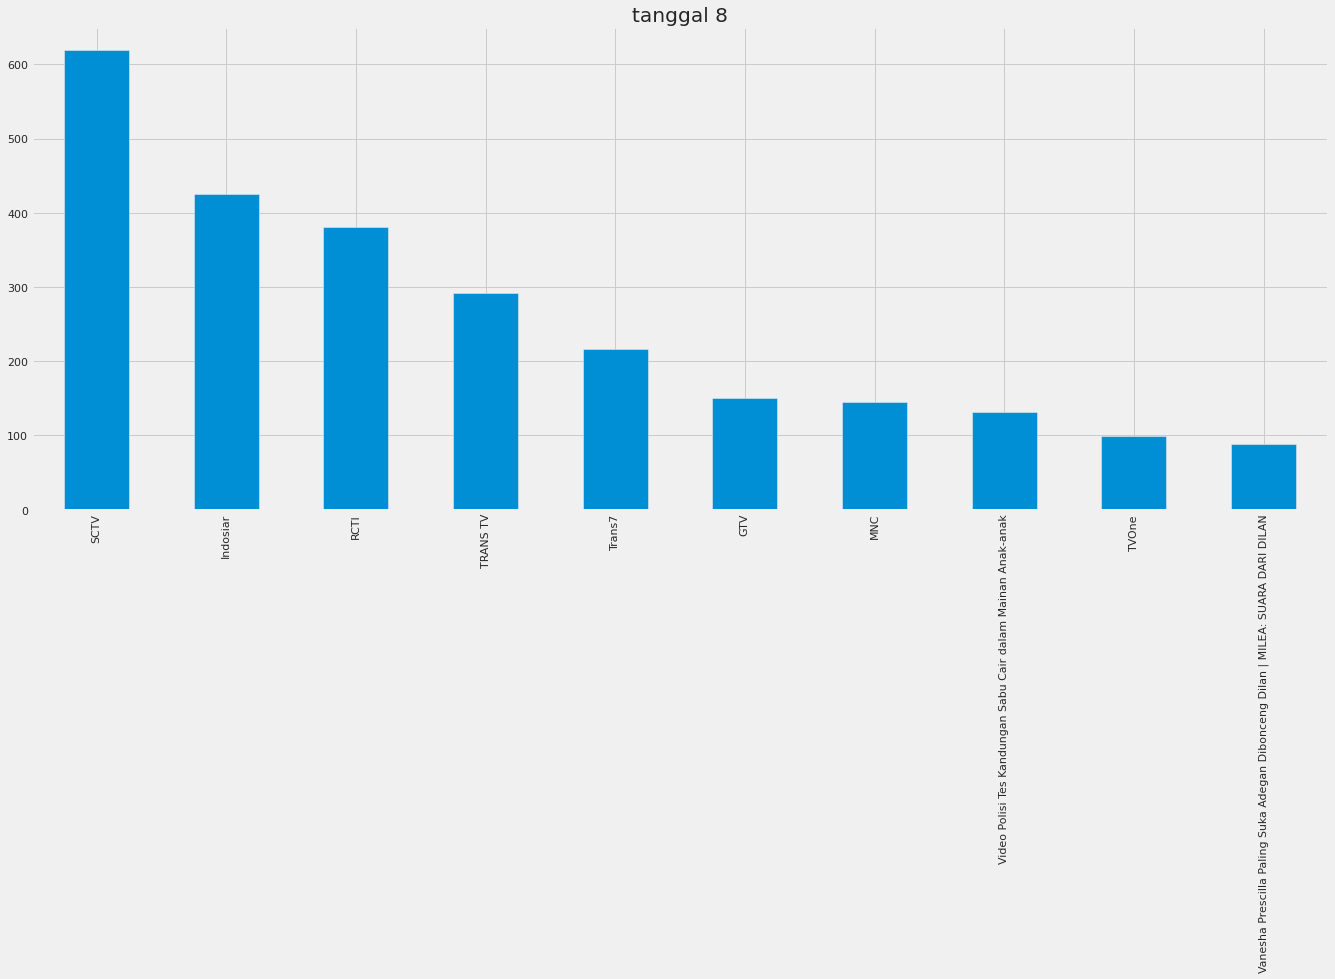

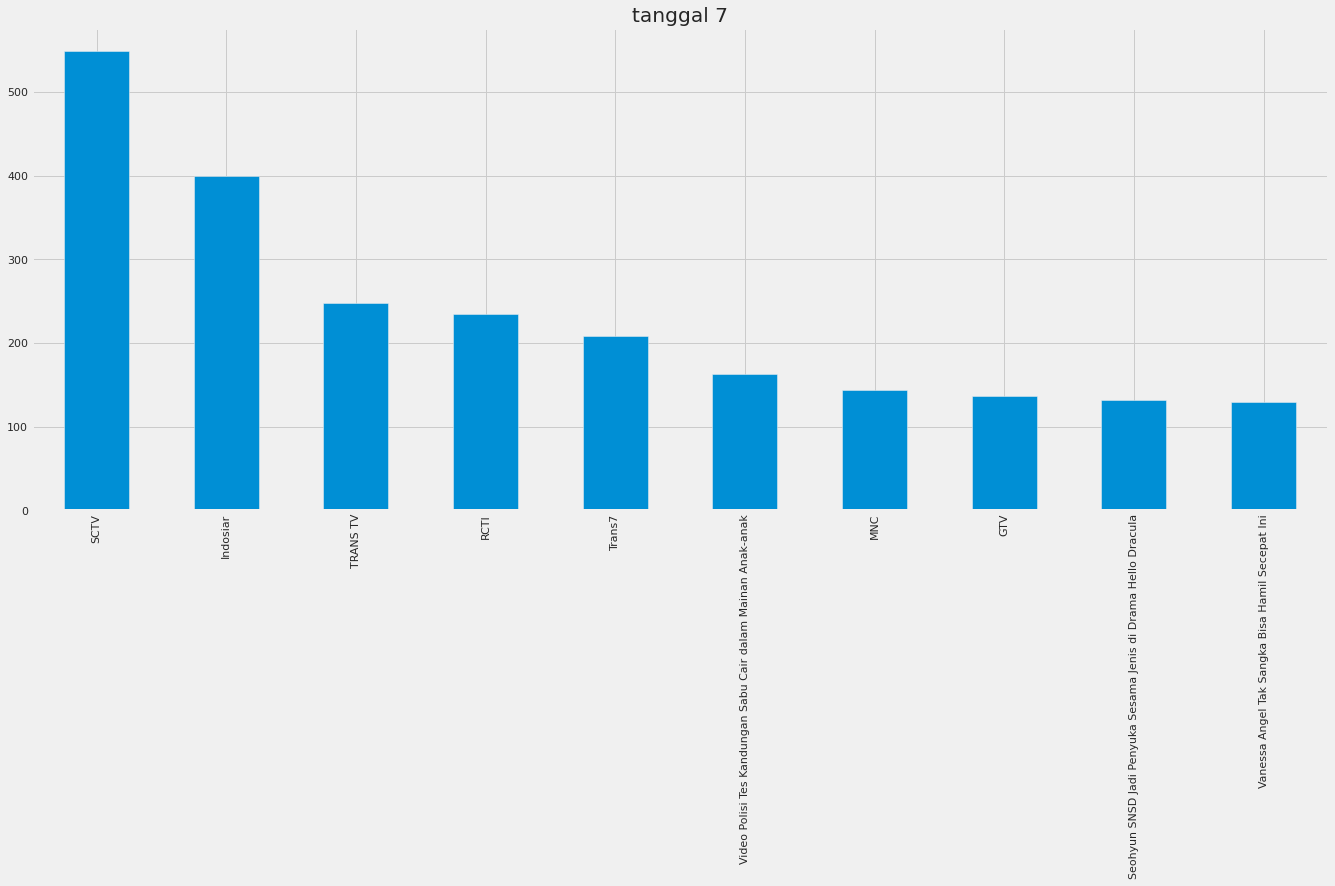

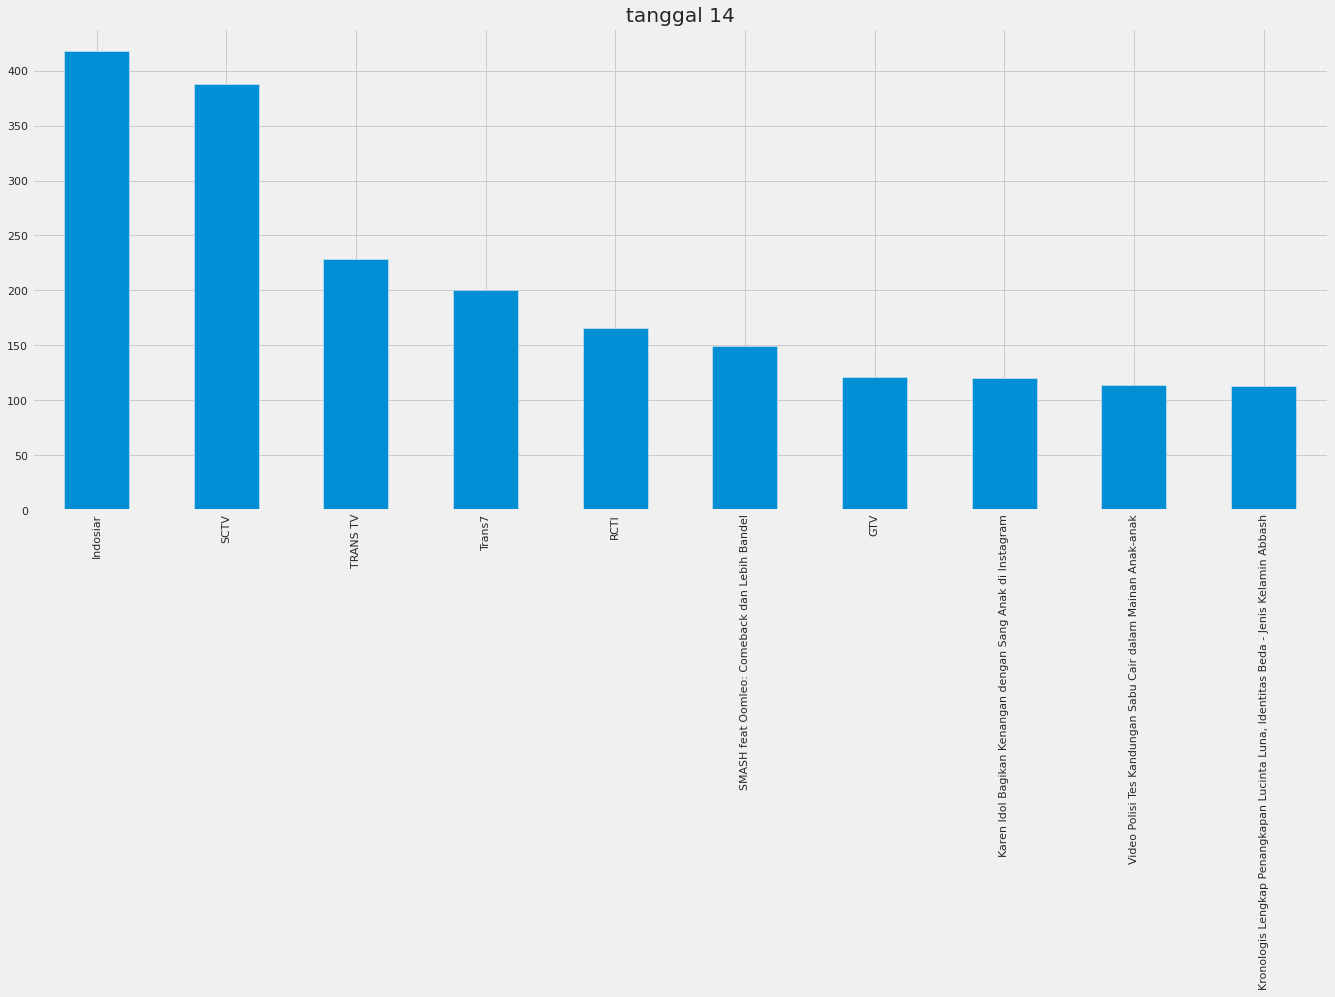

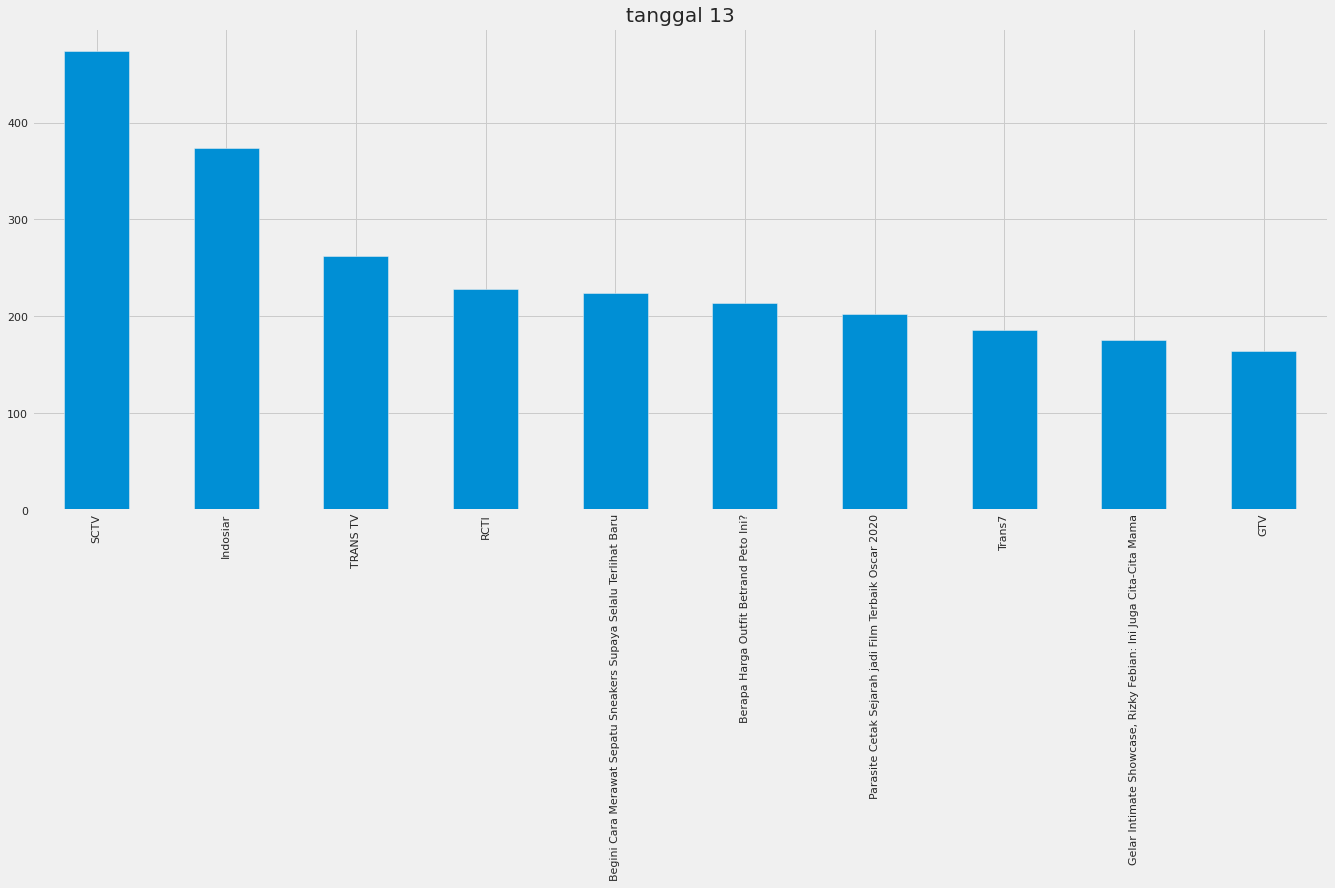

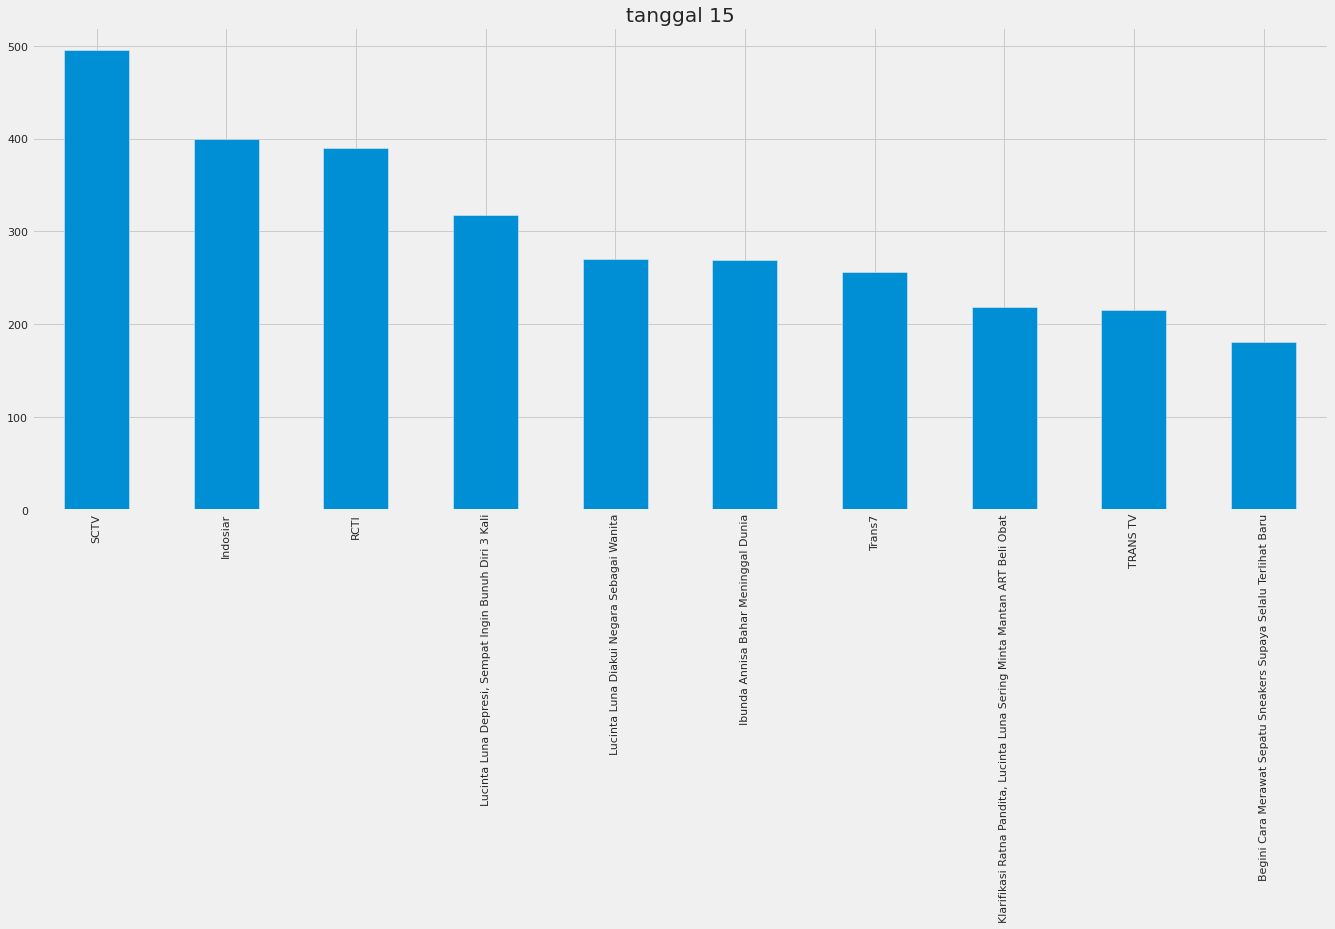

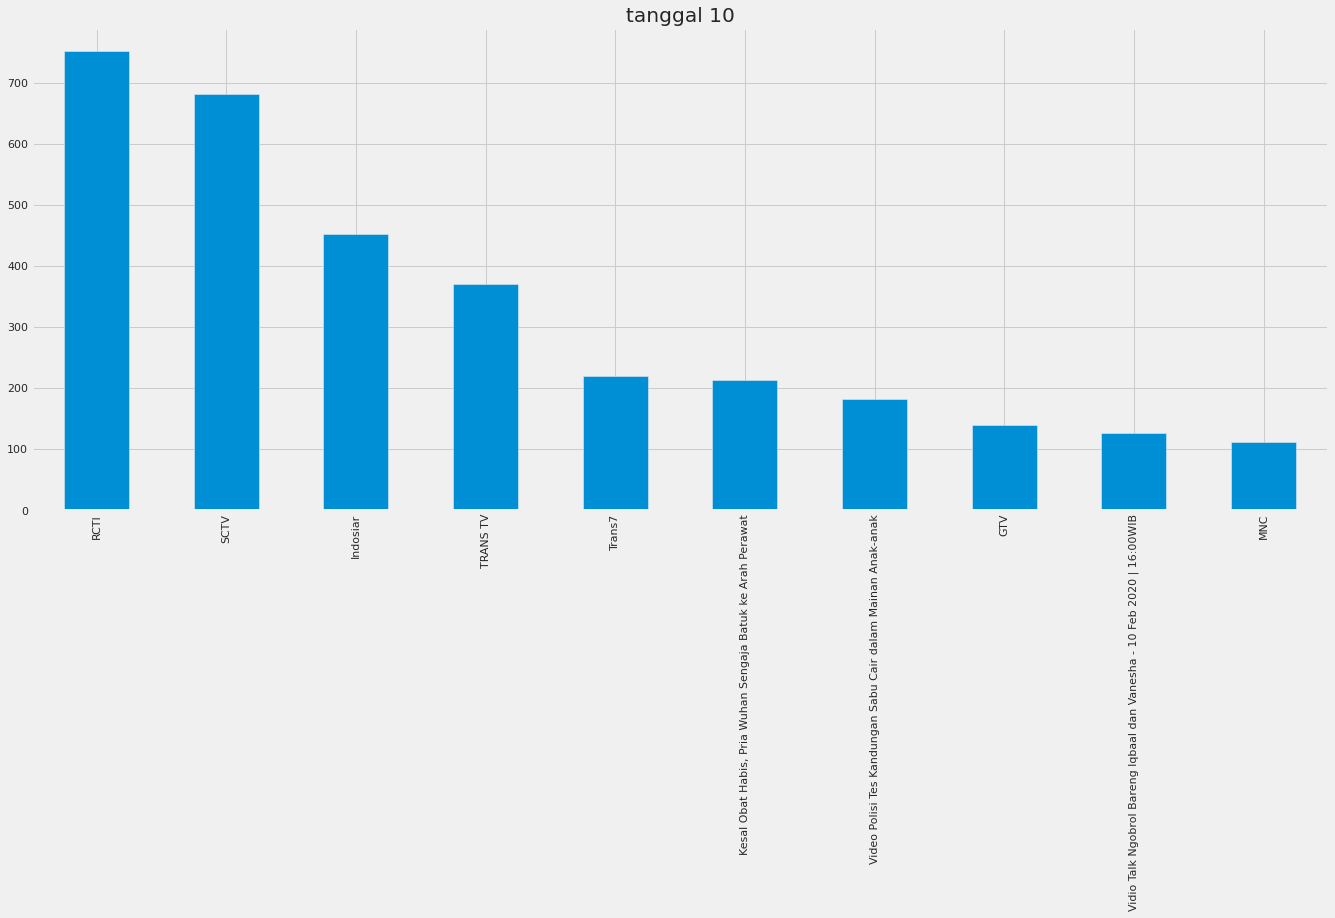

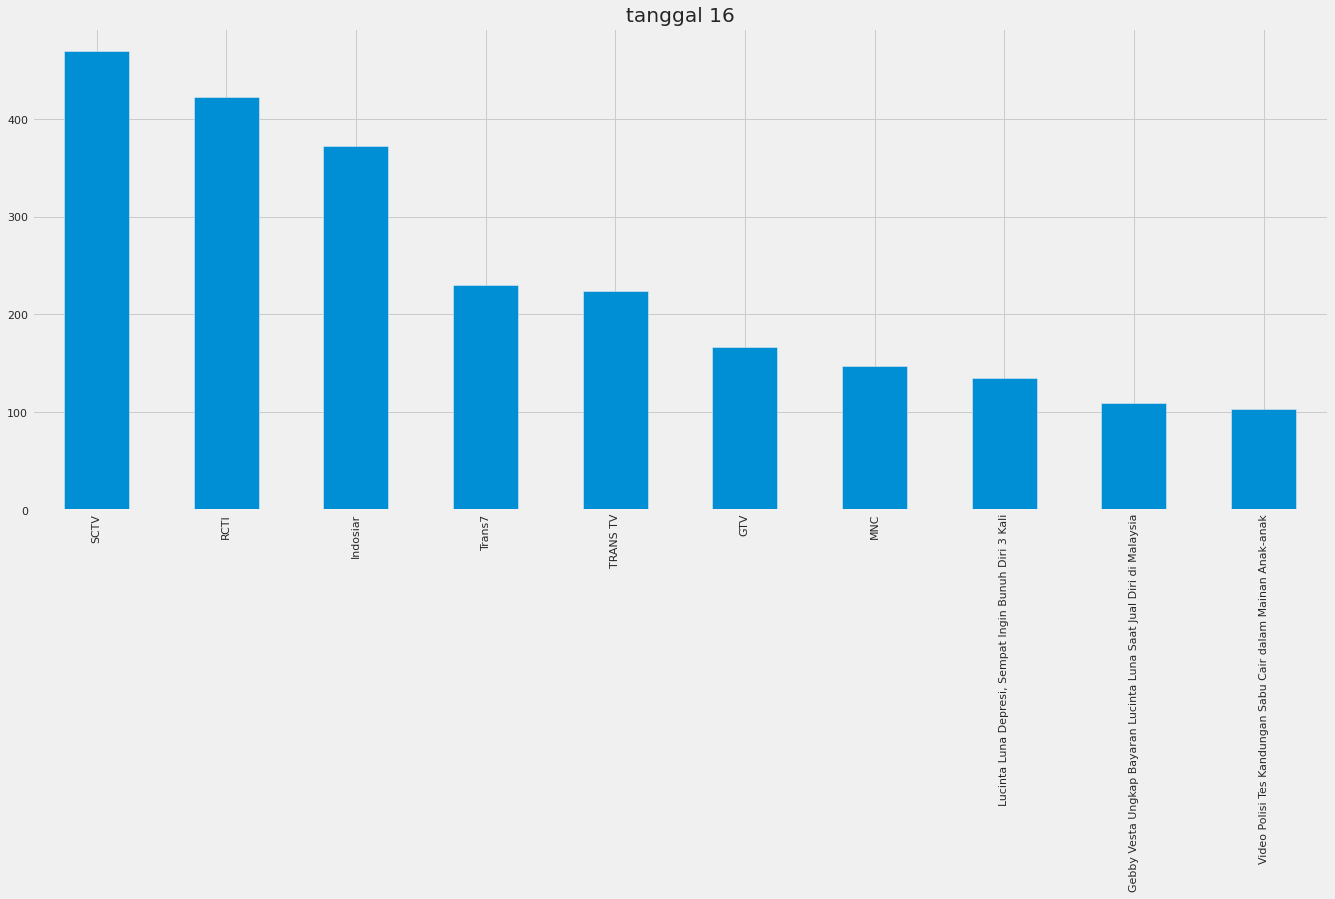

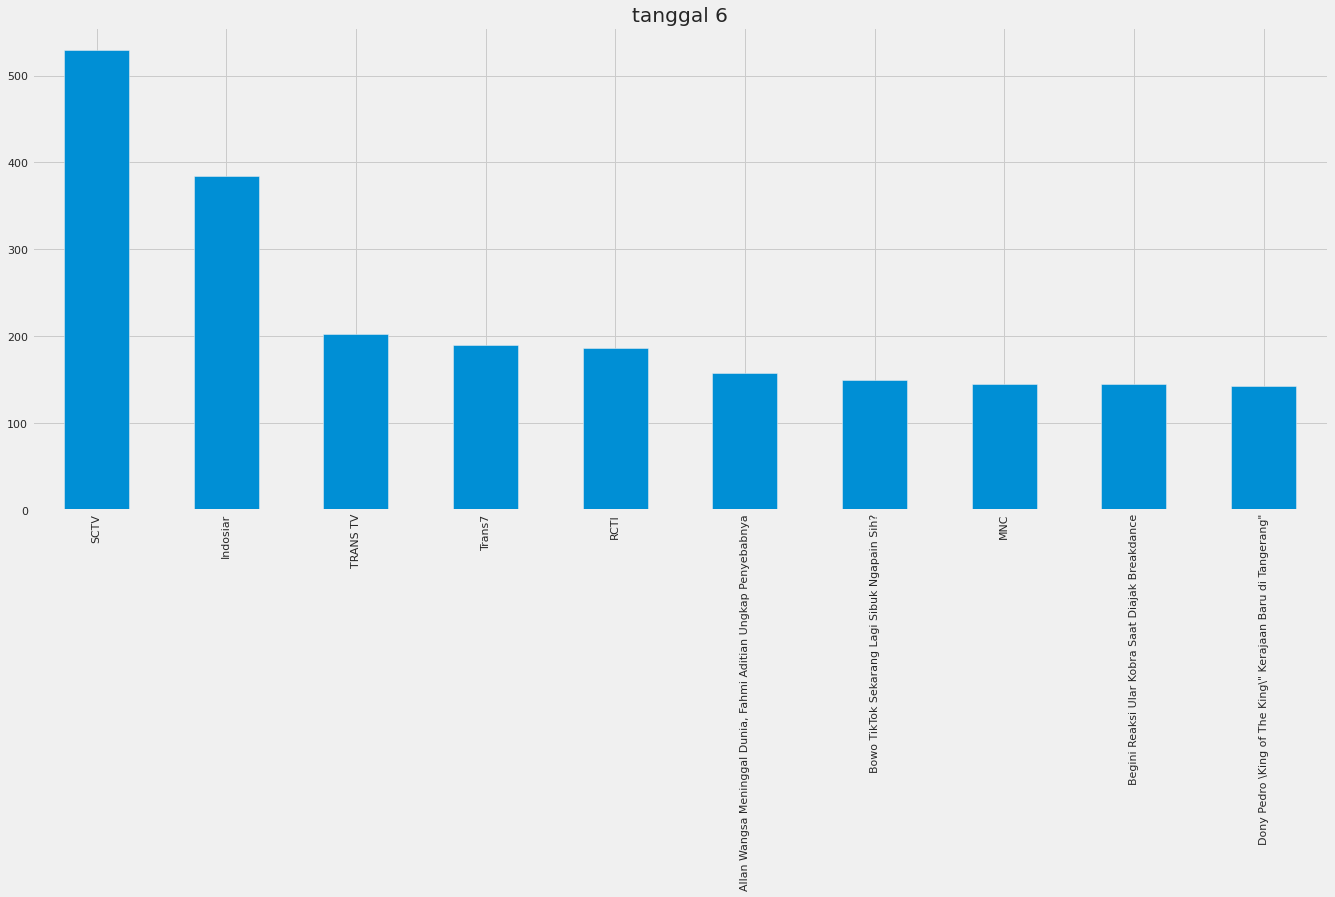

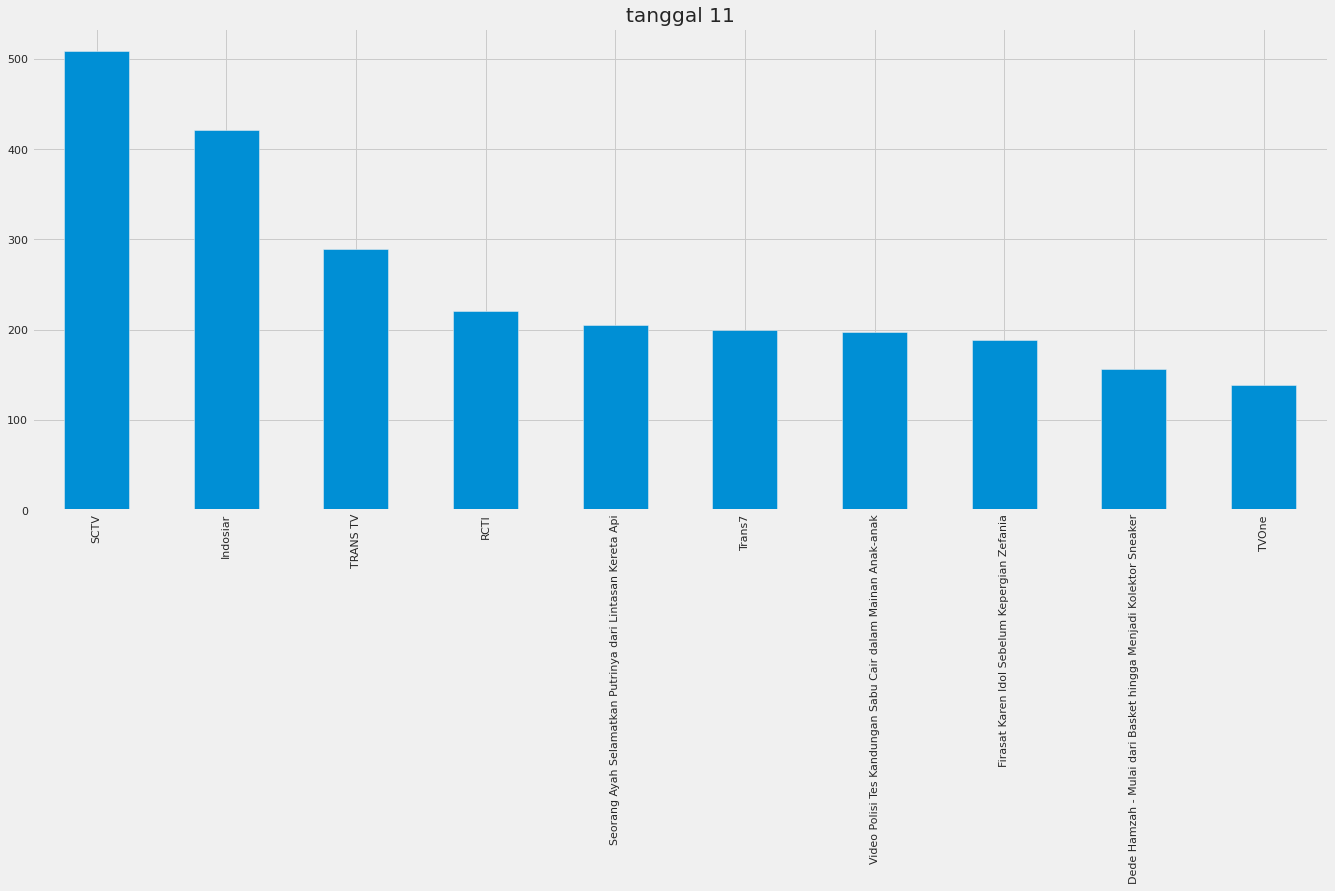

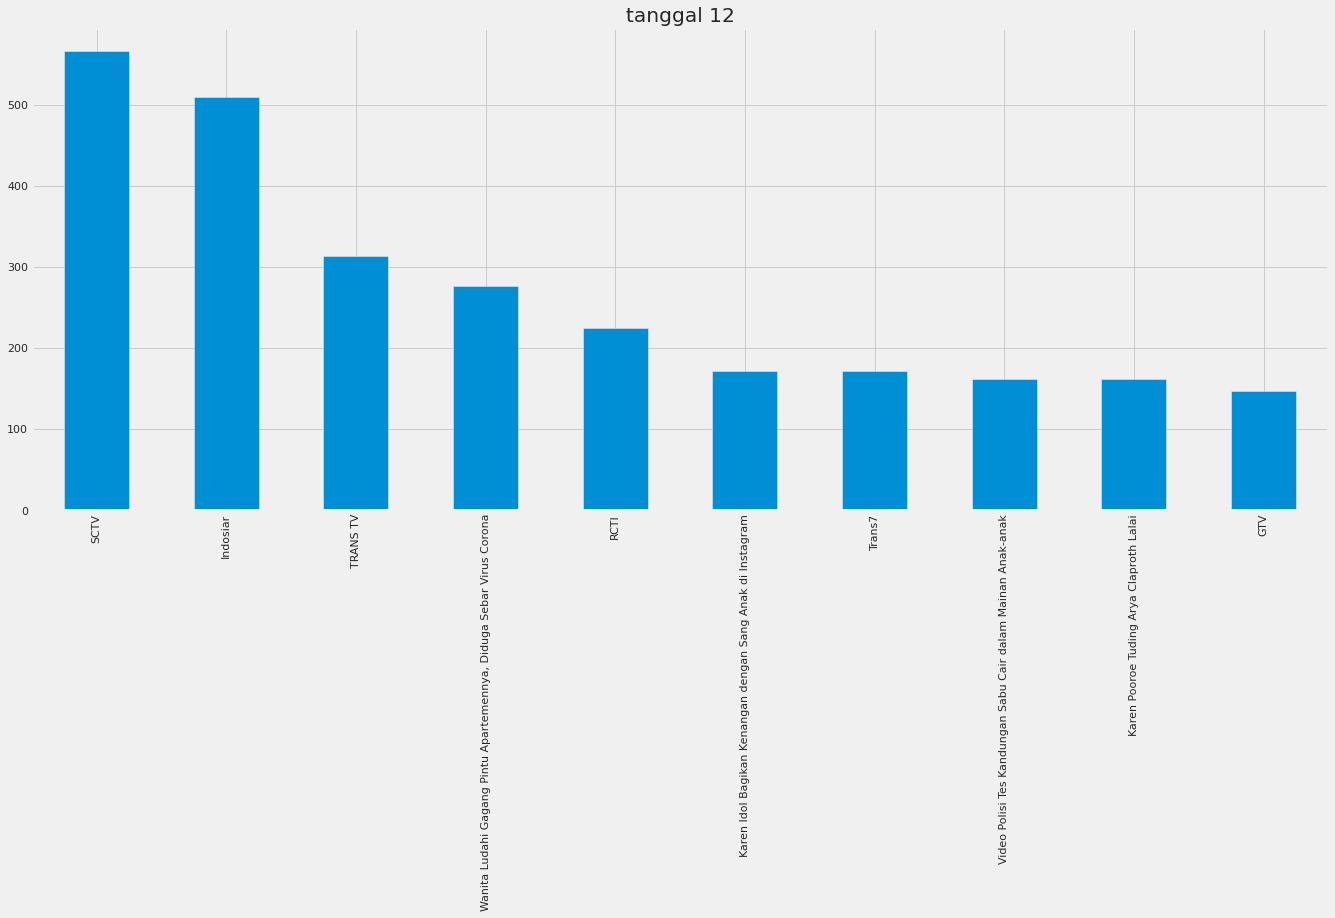

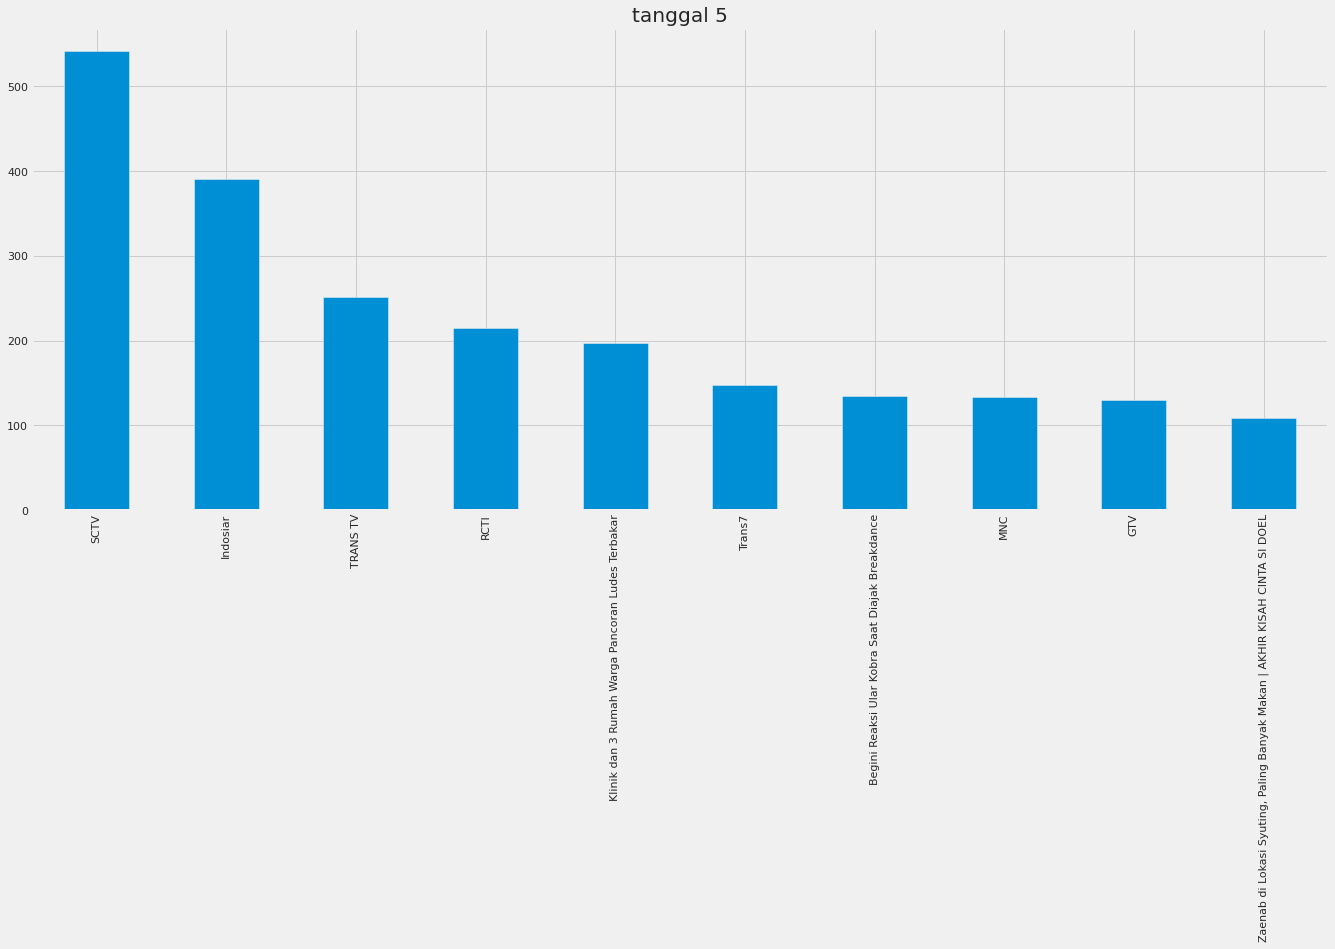

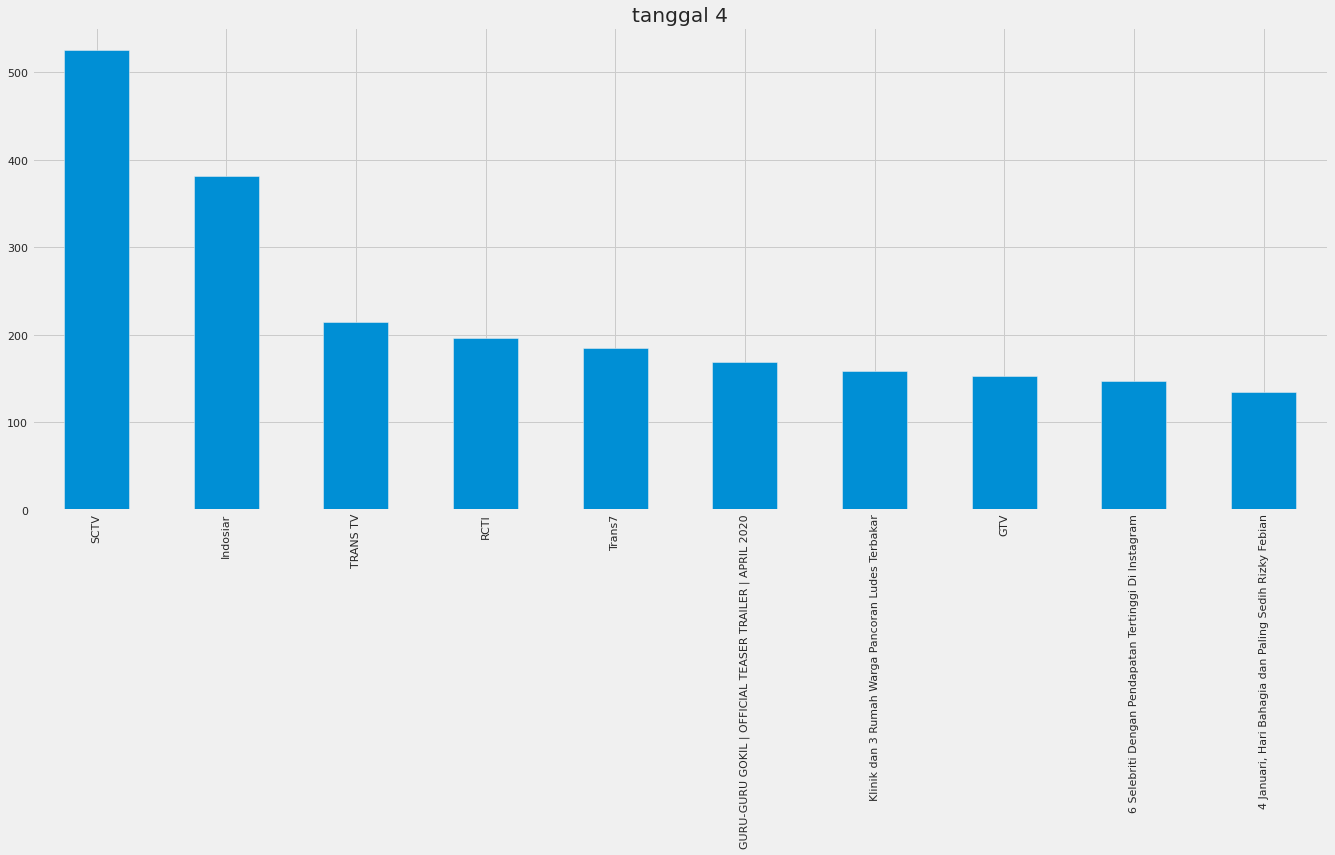

16


In [37]:
i = 0
for tanggal in df['play_time_date'].unique():
    df[df['play_time_date']==tanggal]['title'].value_counts().head(10).plot.bar()
    plt.title(f'tanggal {tanggal}')
    plt.show()
    i += 1
print(i)

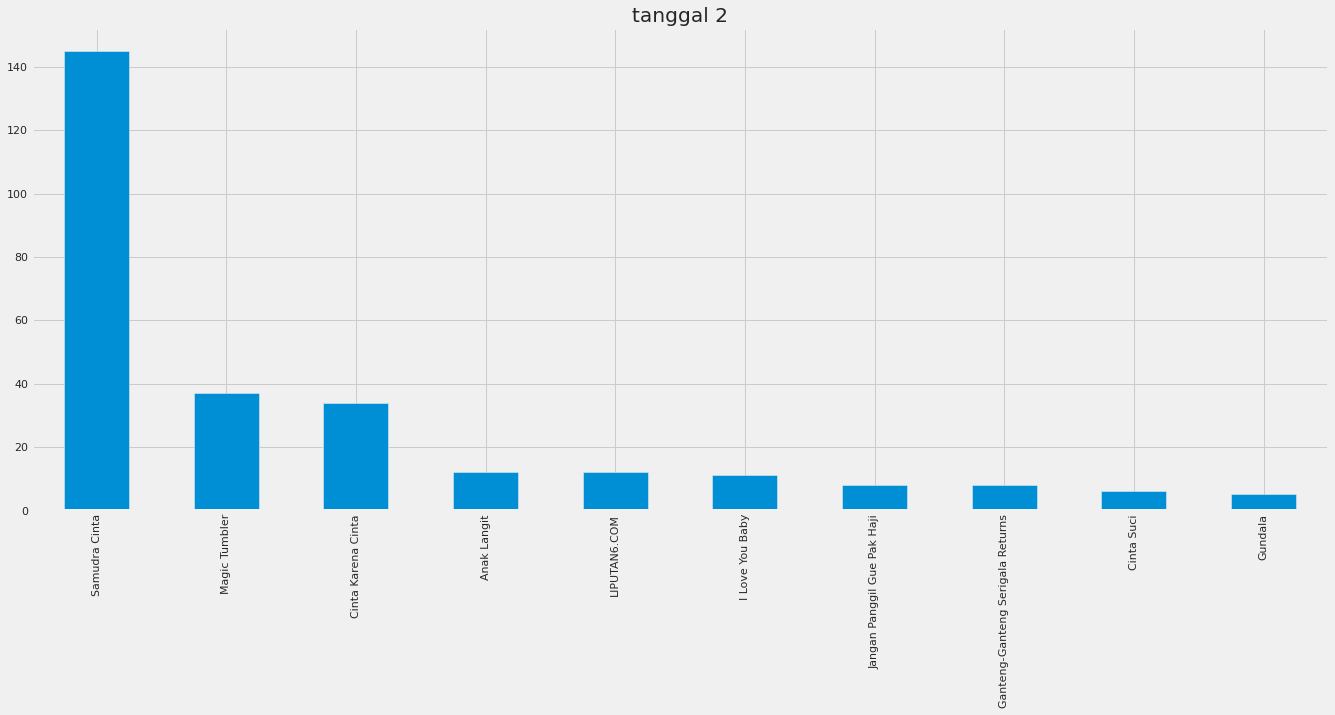

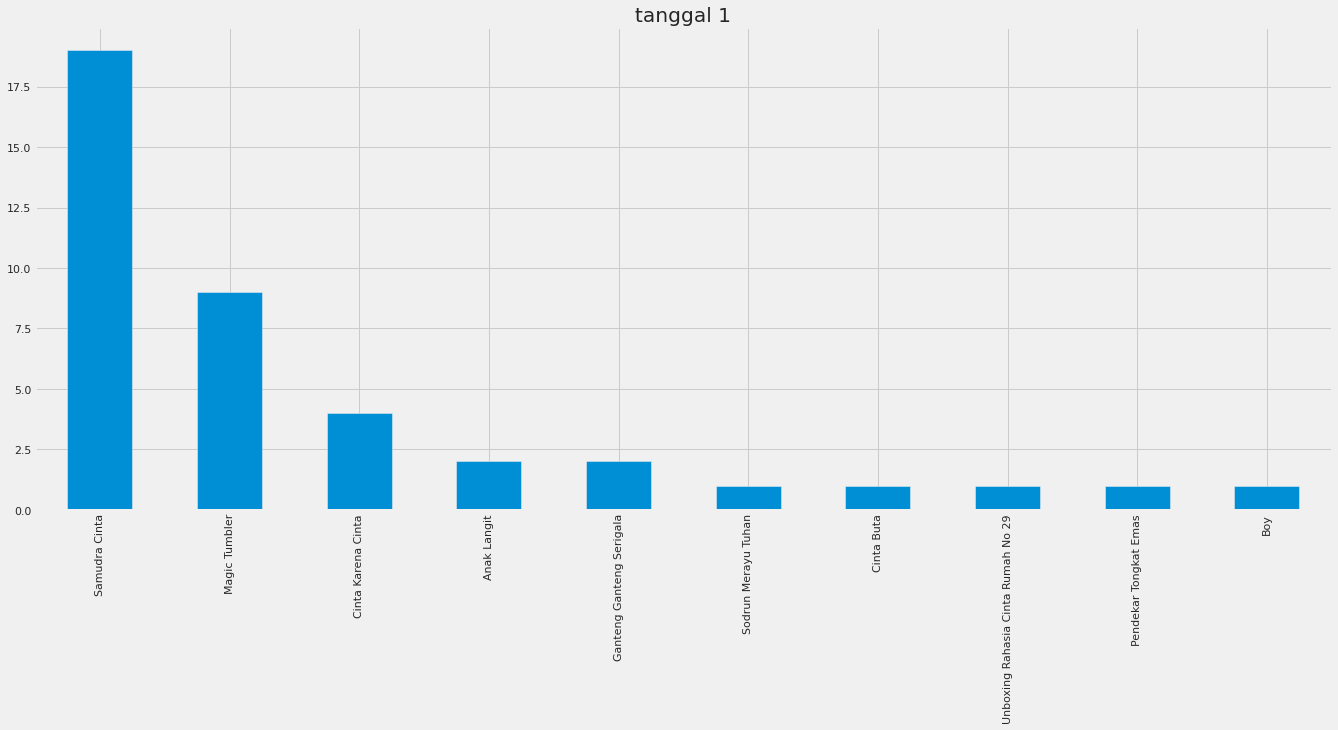

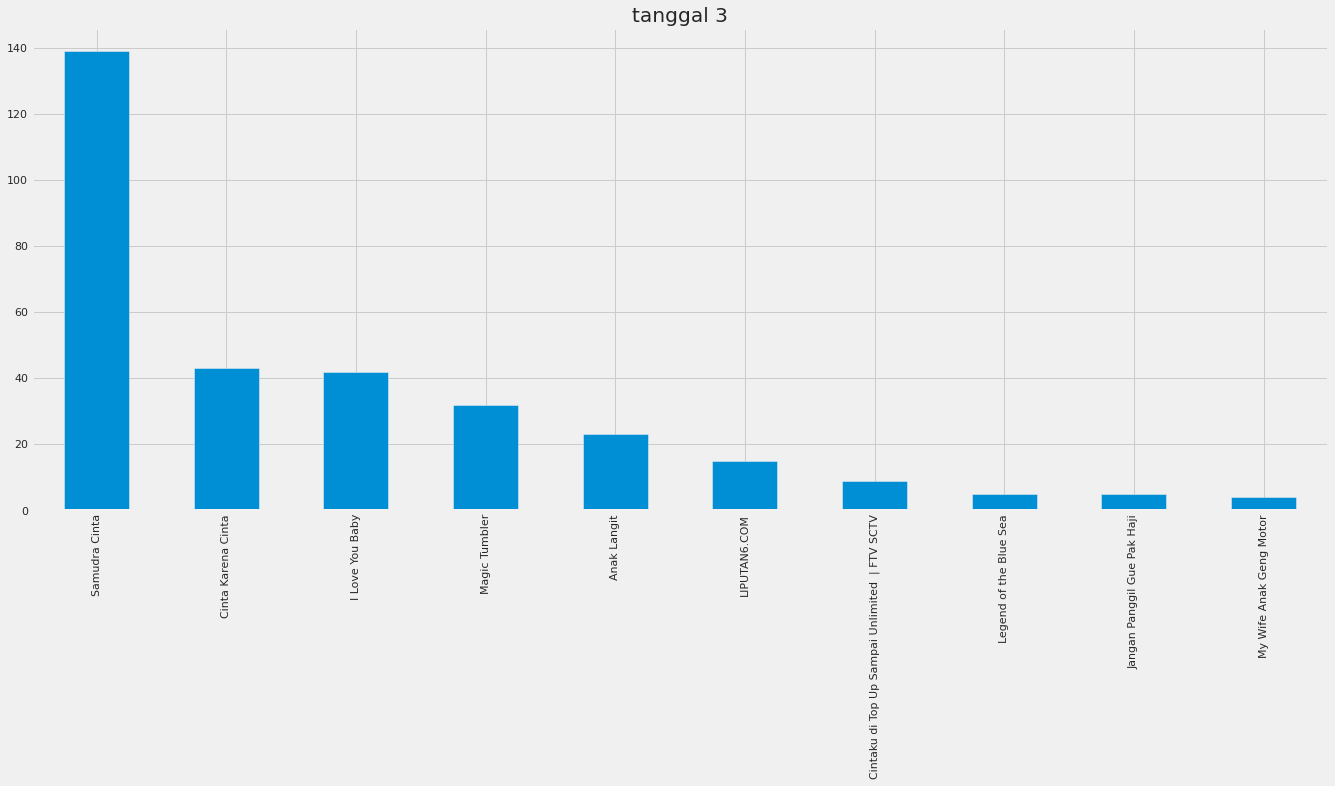

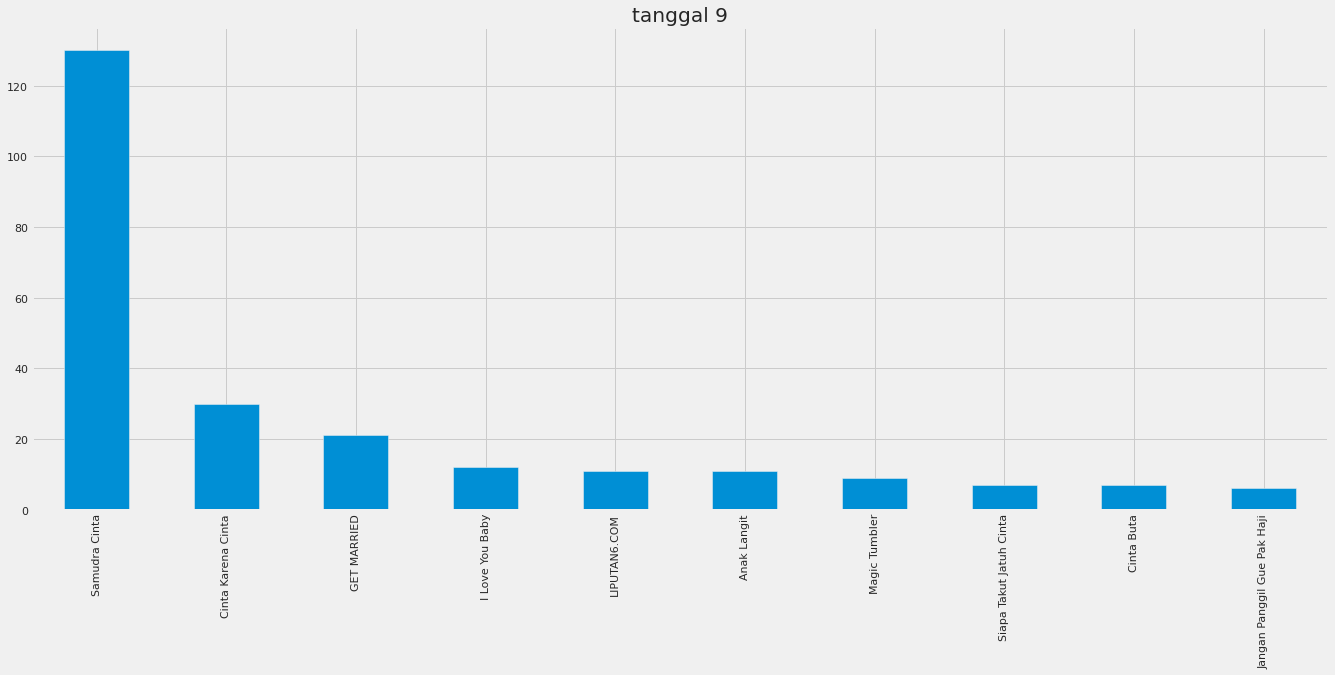

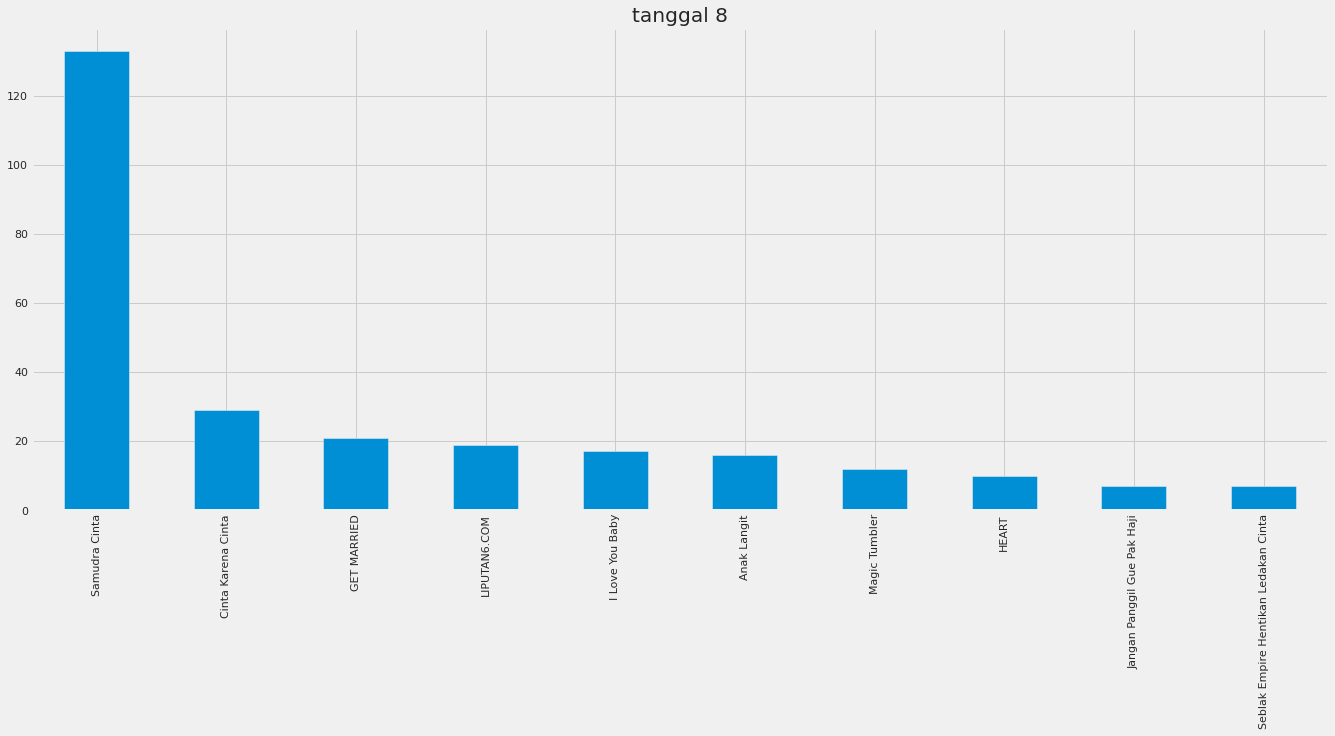

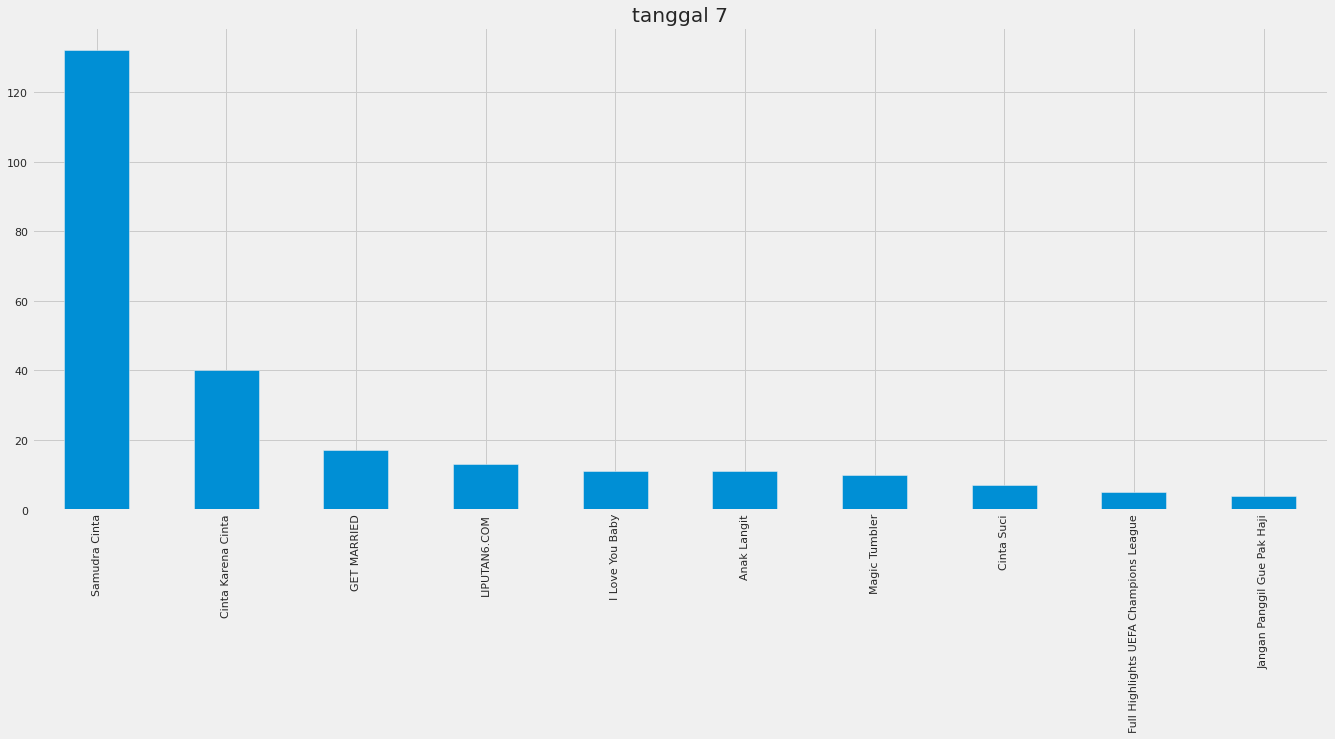

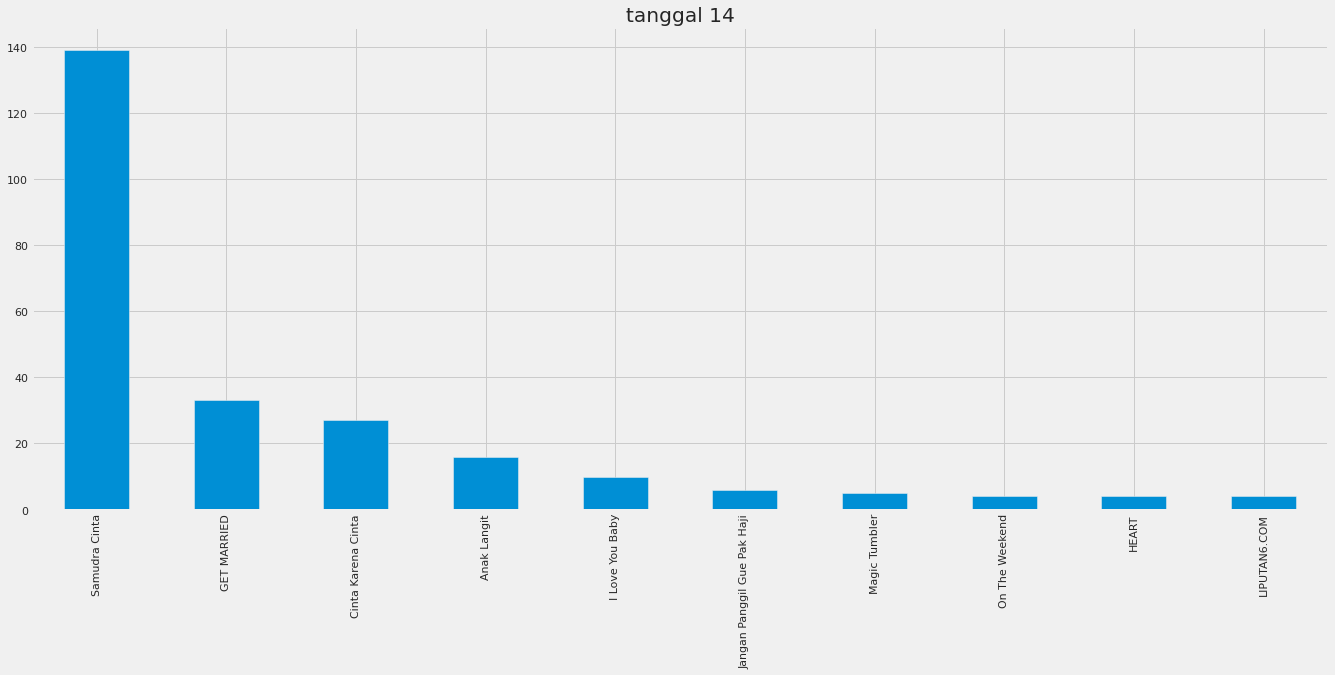

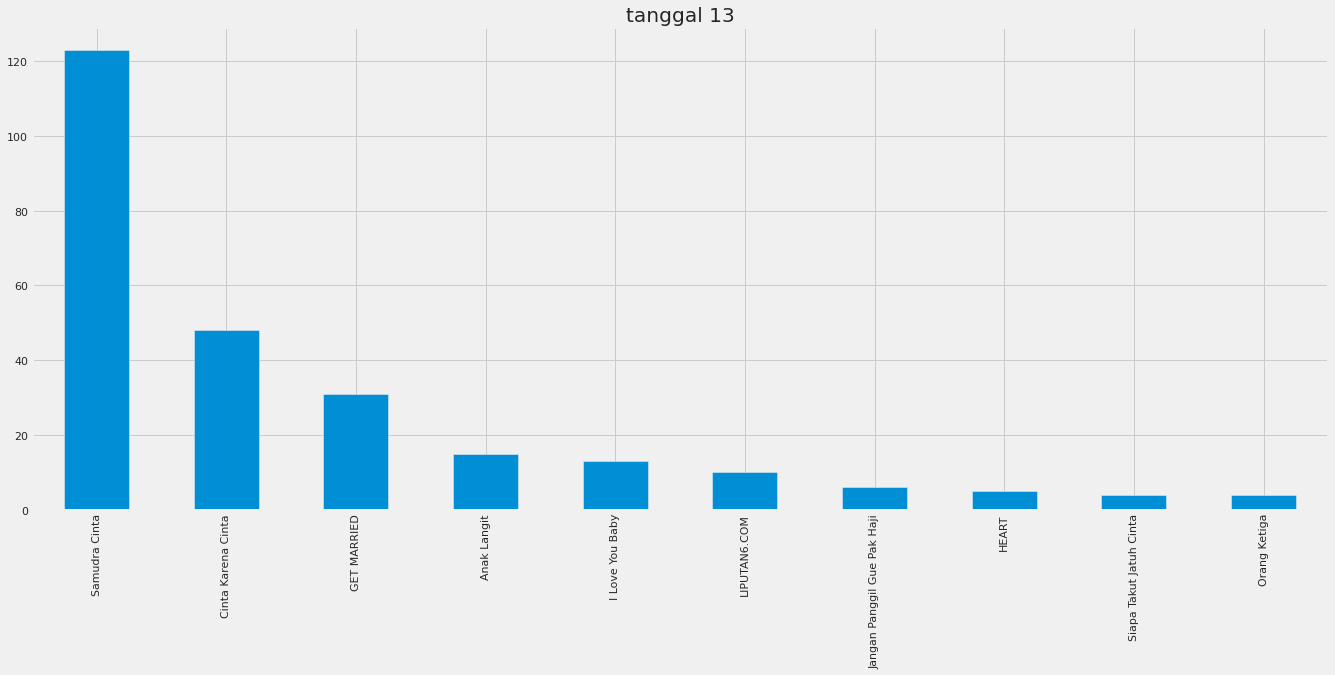

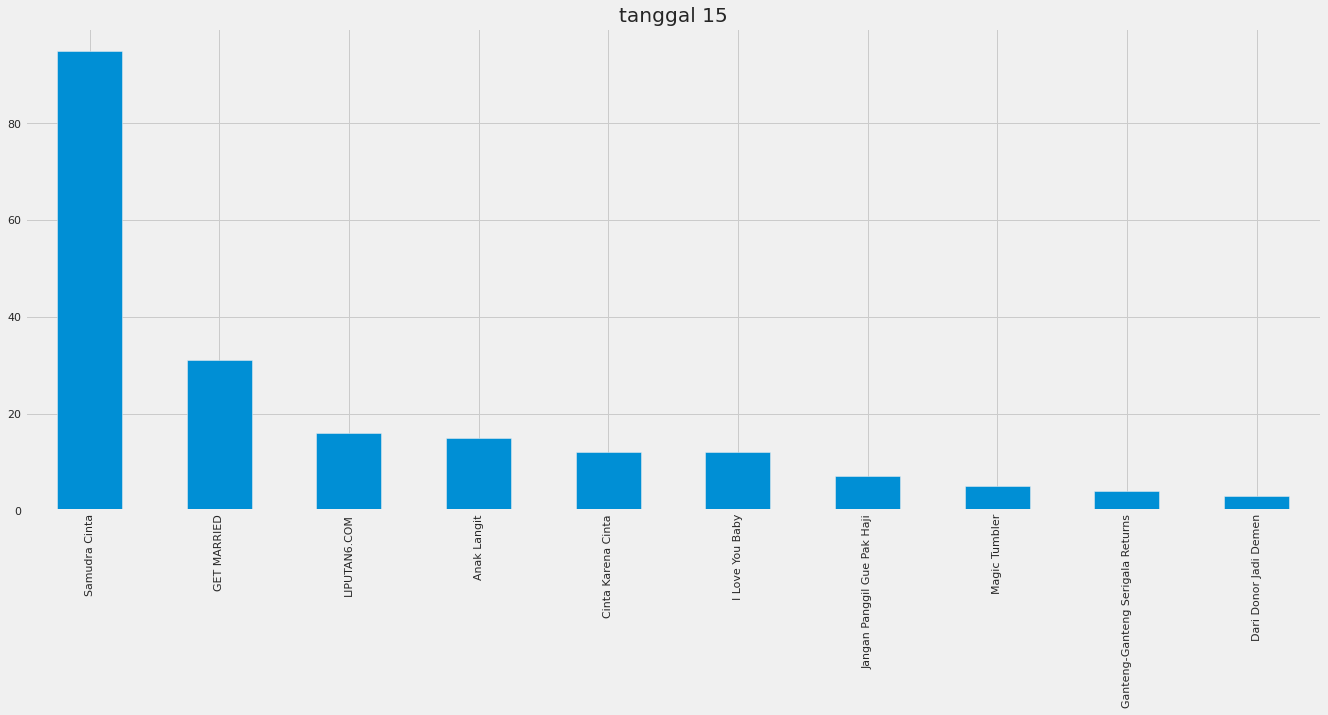

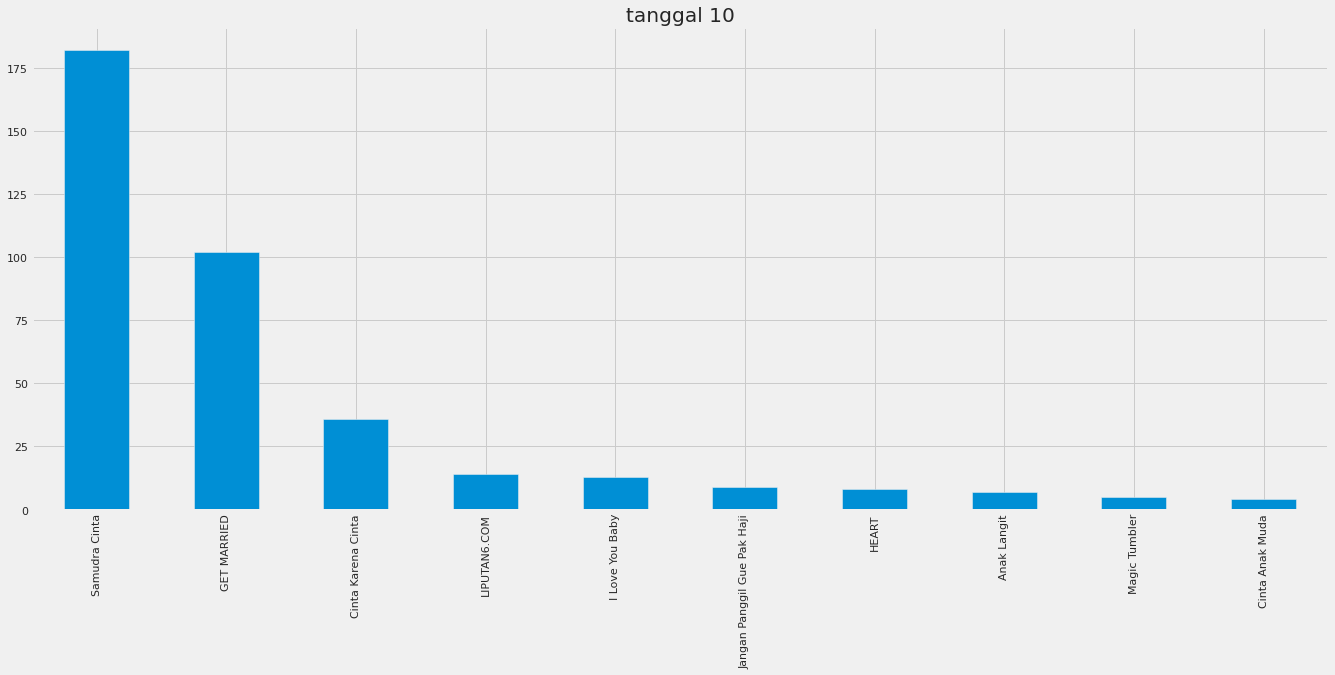

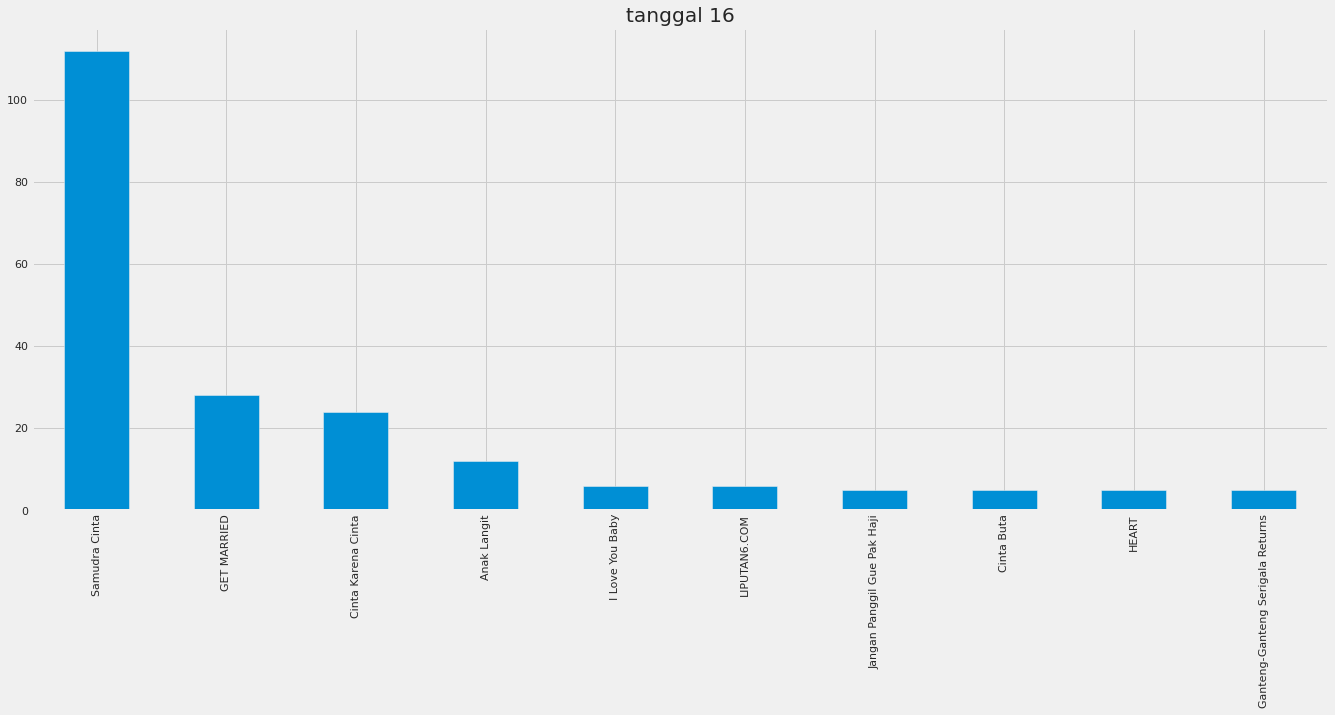

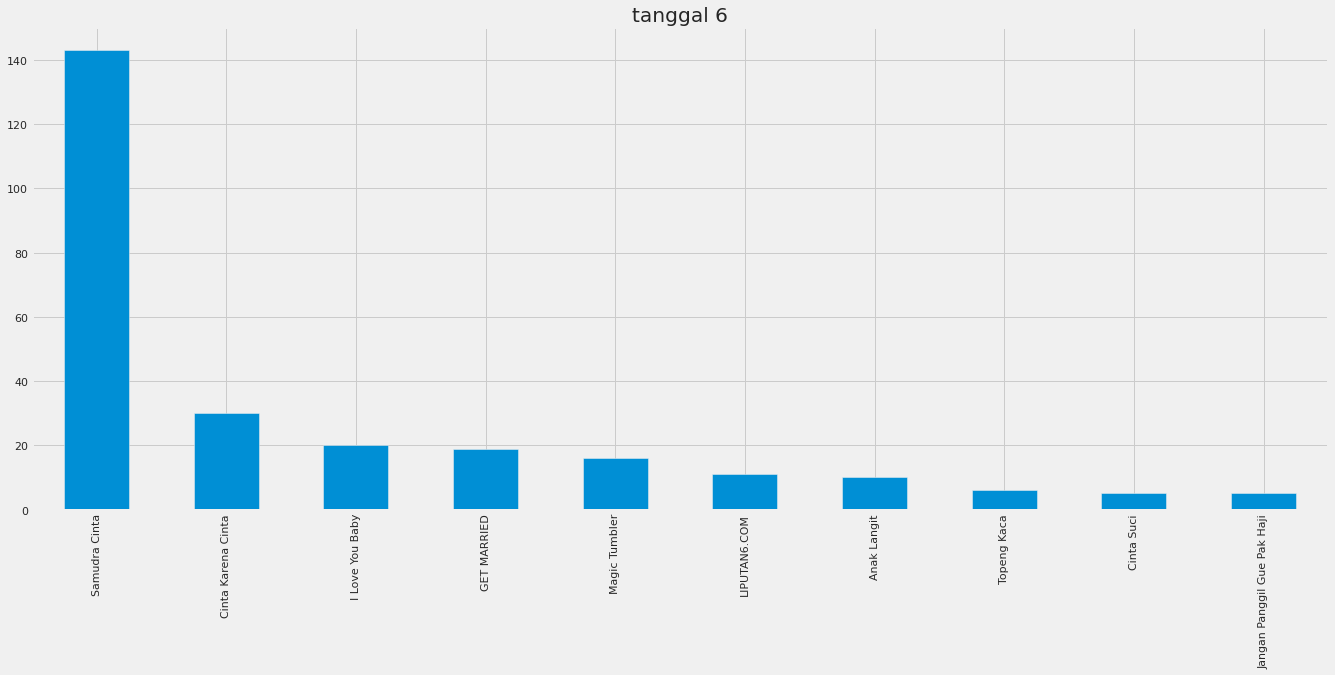

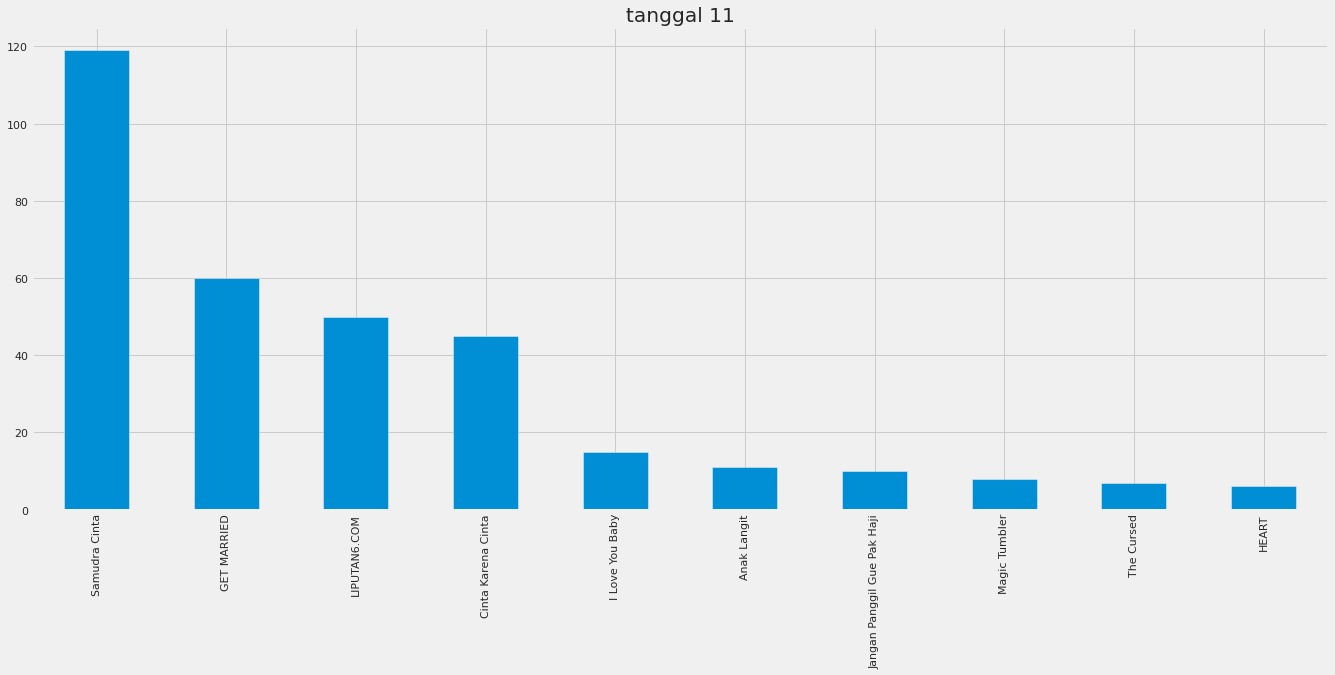

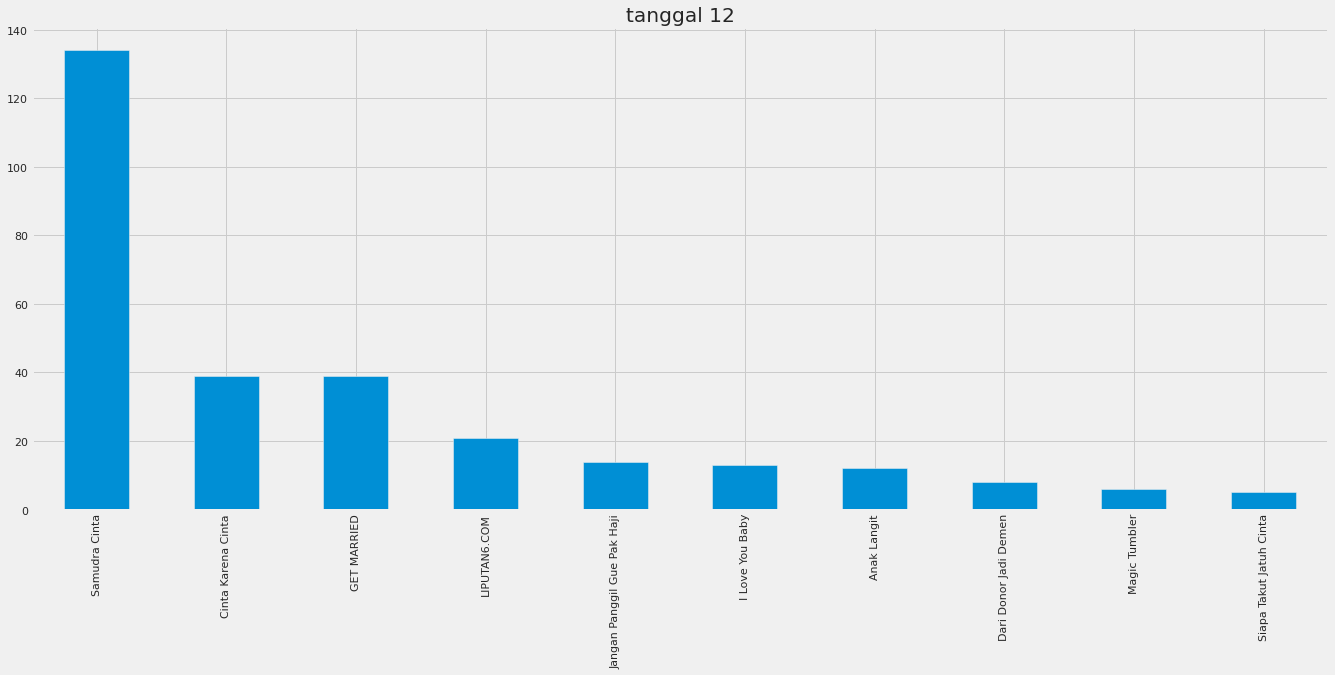

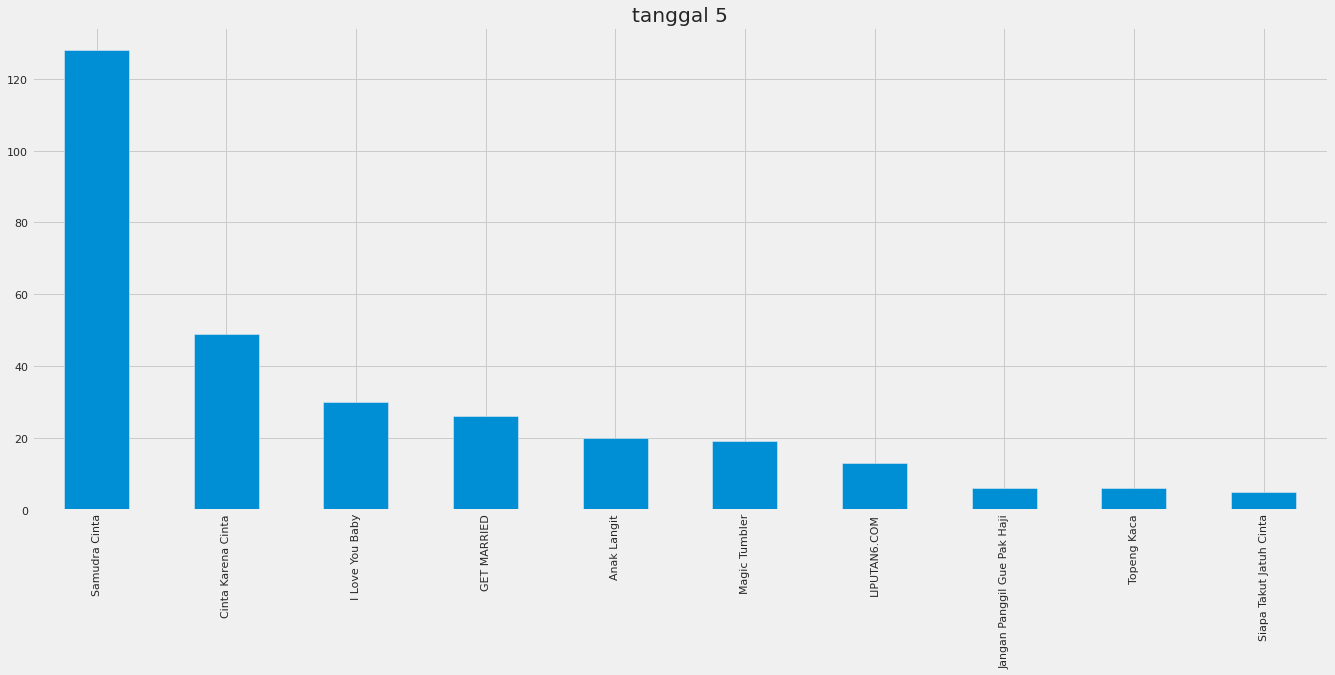

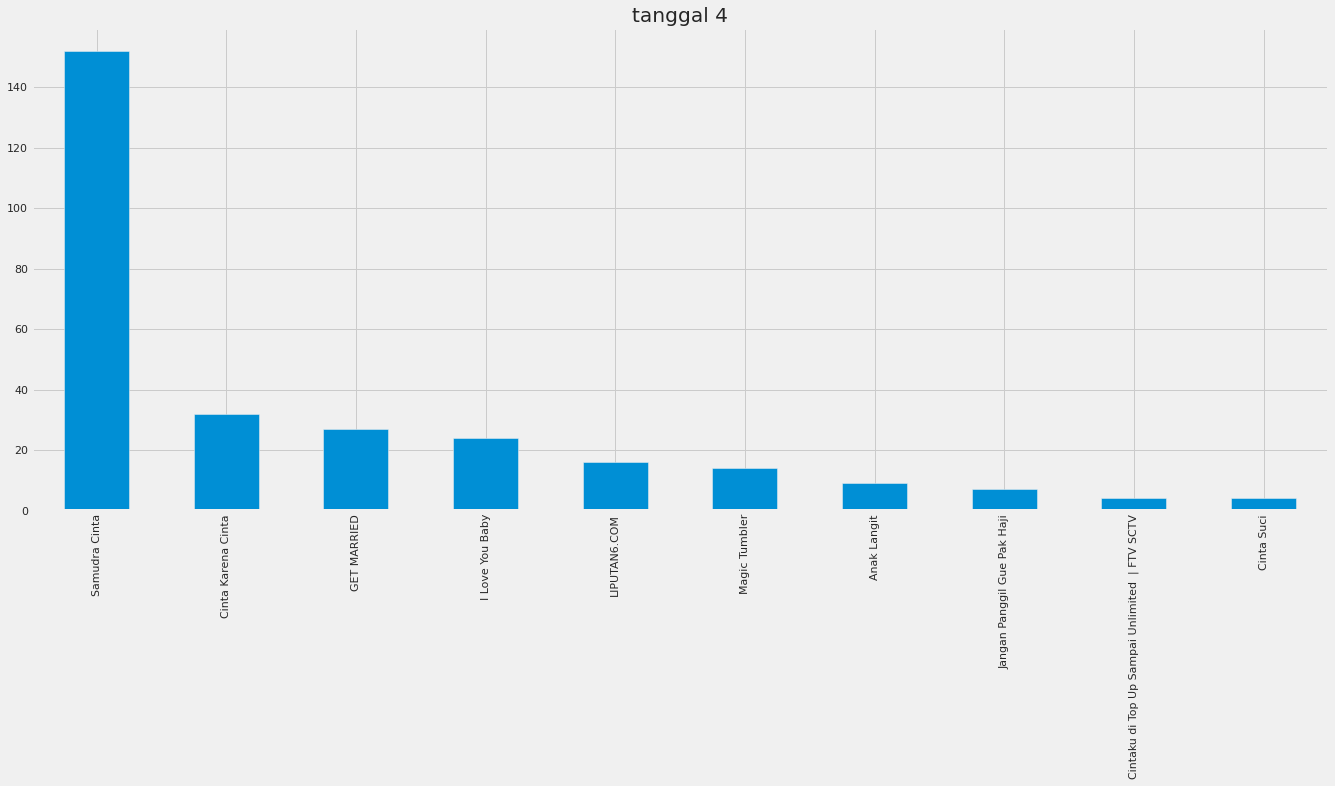

16


In [38]:
i = 0
for tanggal in df['play_time_date'].unique():
    df[df['play_time_date']==tanggal]['film_title'].value_counts().head(10).plot.bar()
    plt.title(f'tanggal {tanggal}')
    plt.show()
    i += 1
print(i)

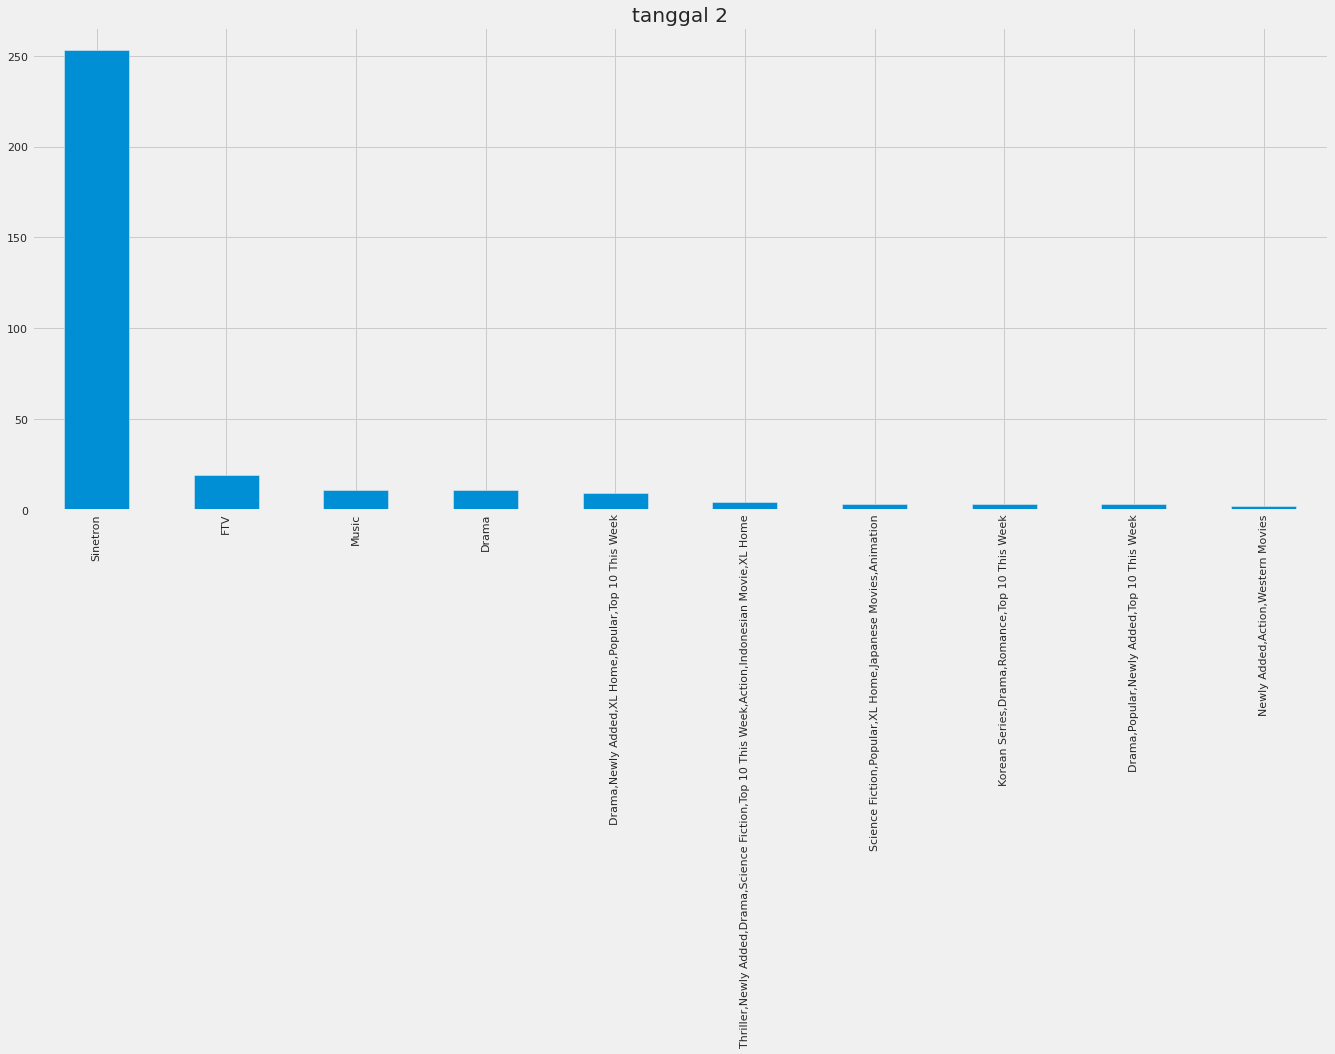

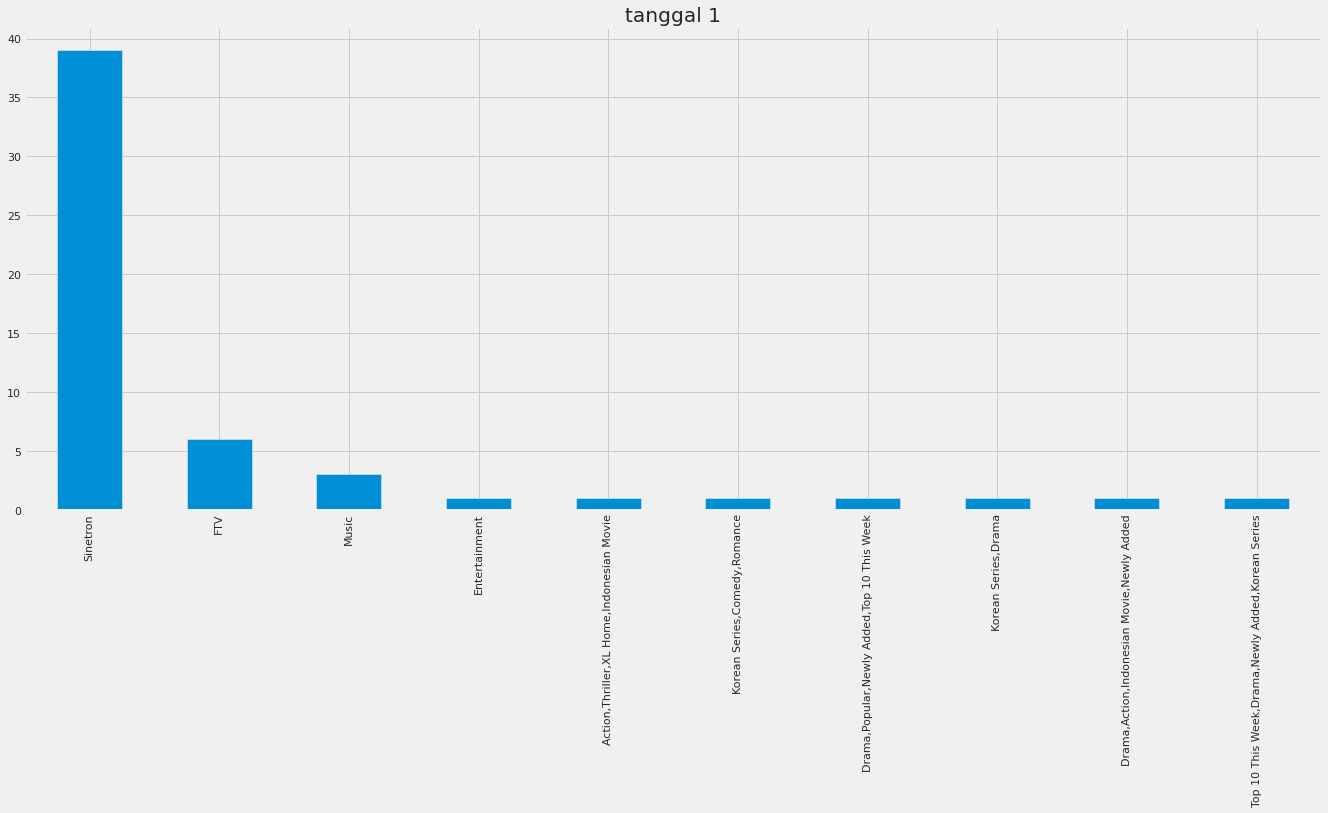

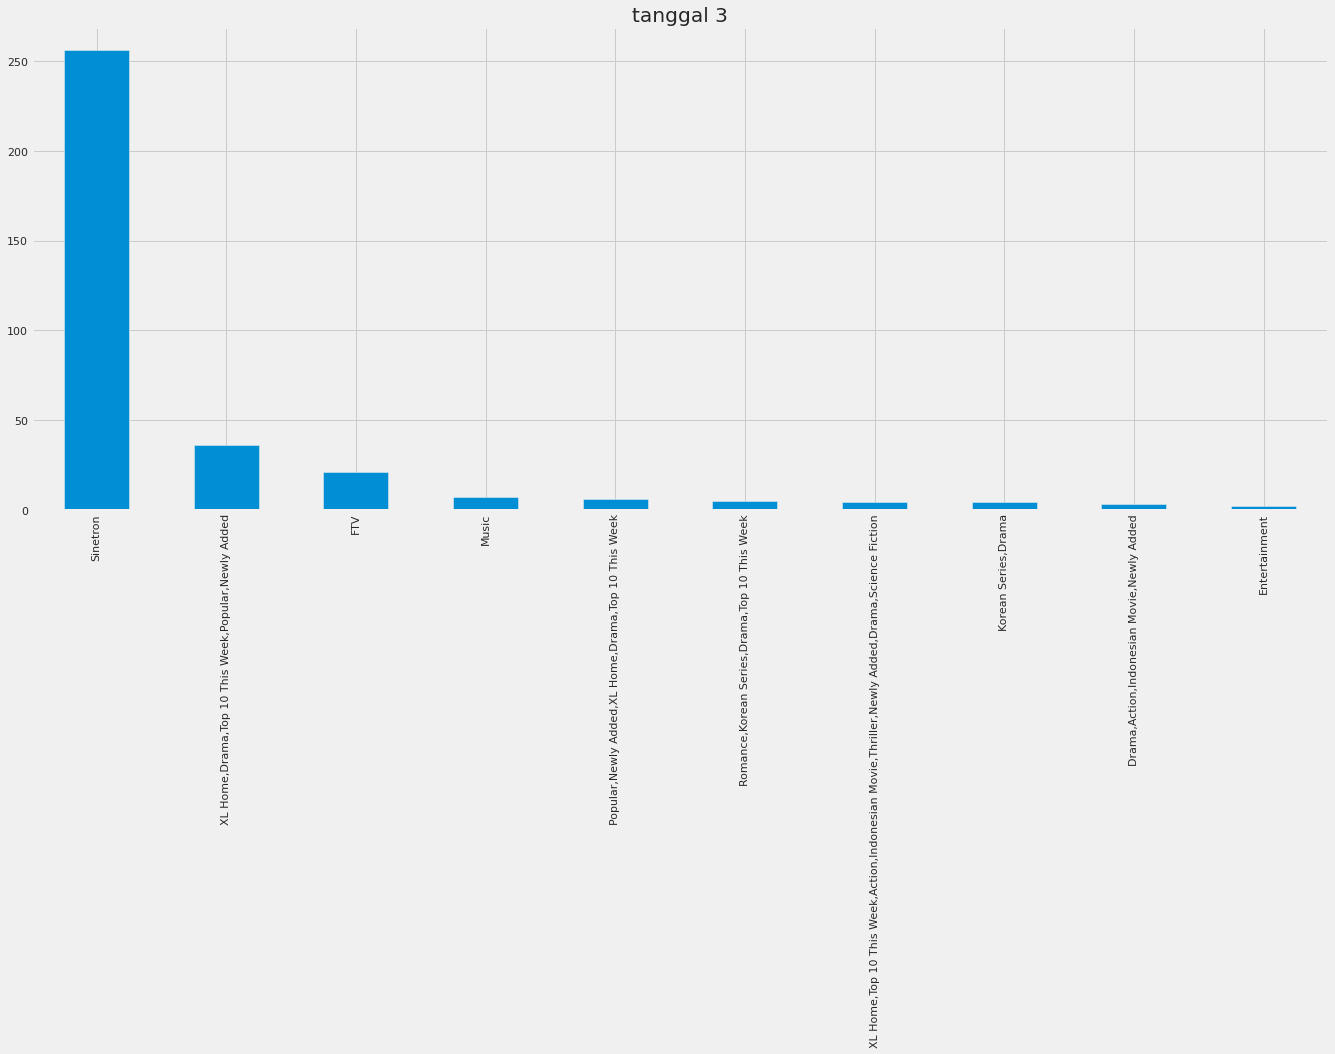

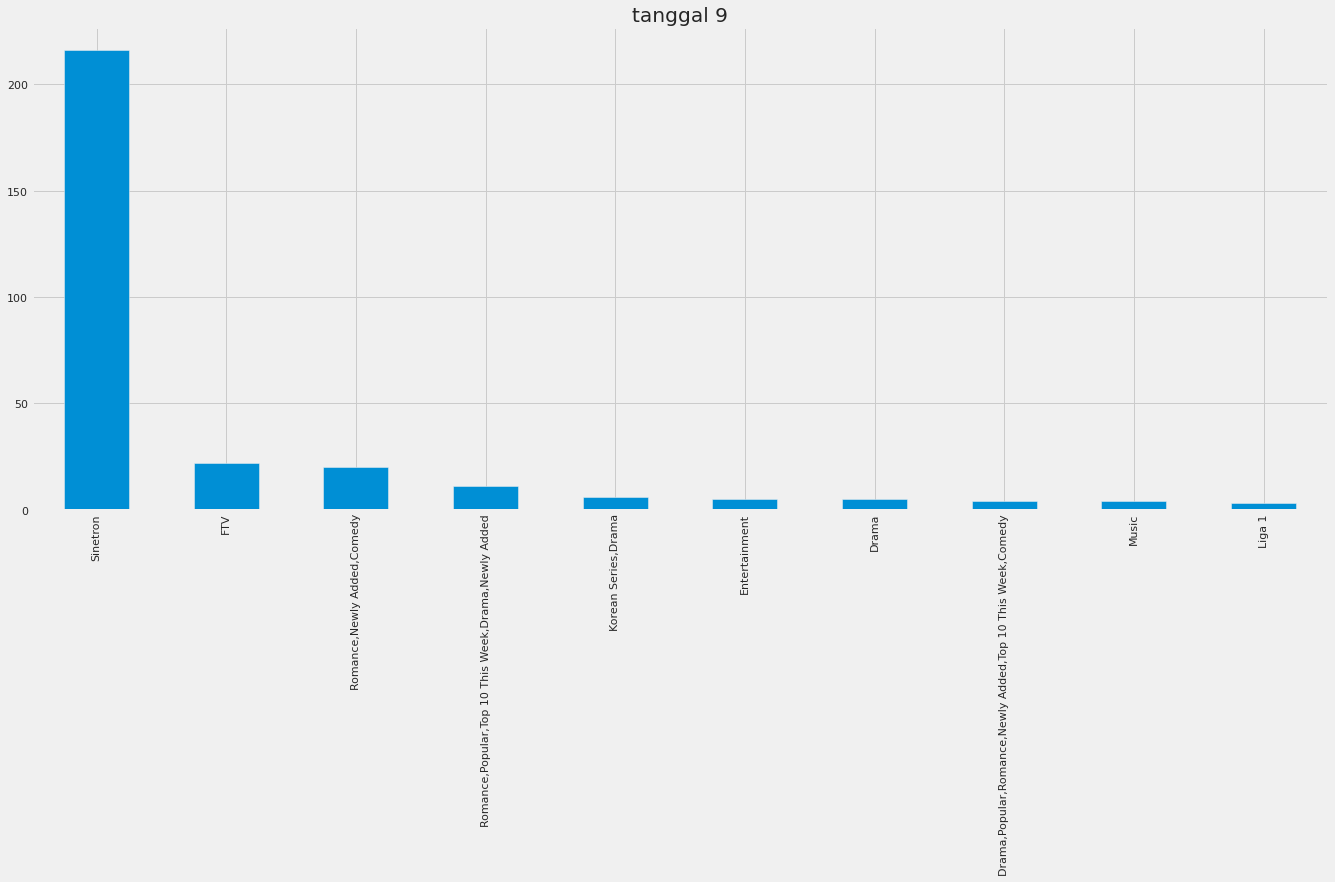

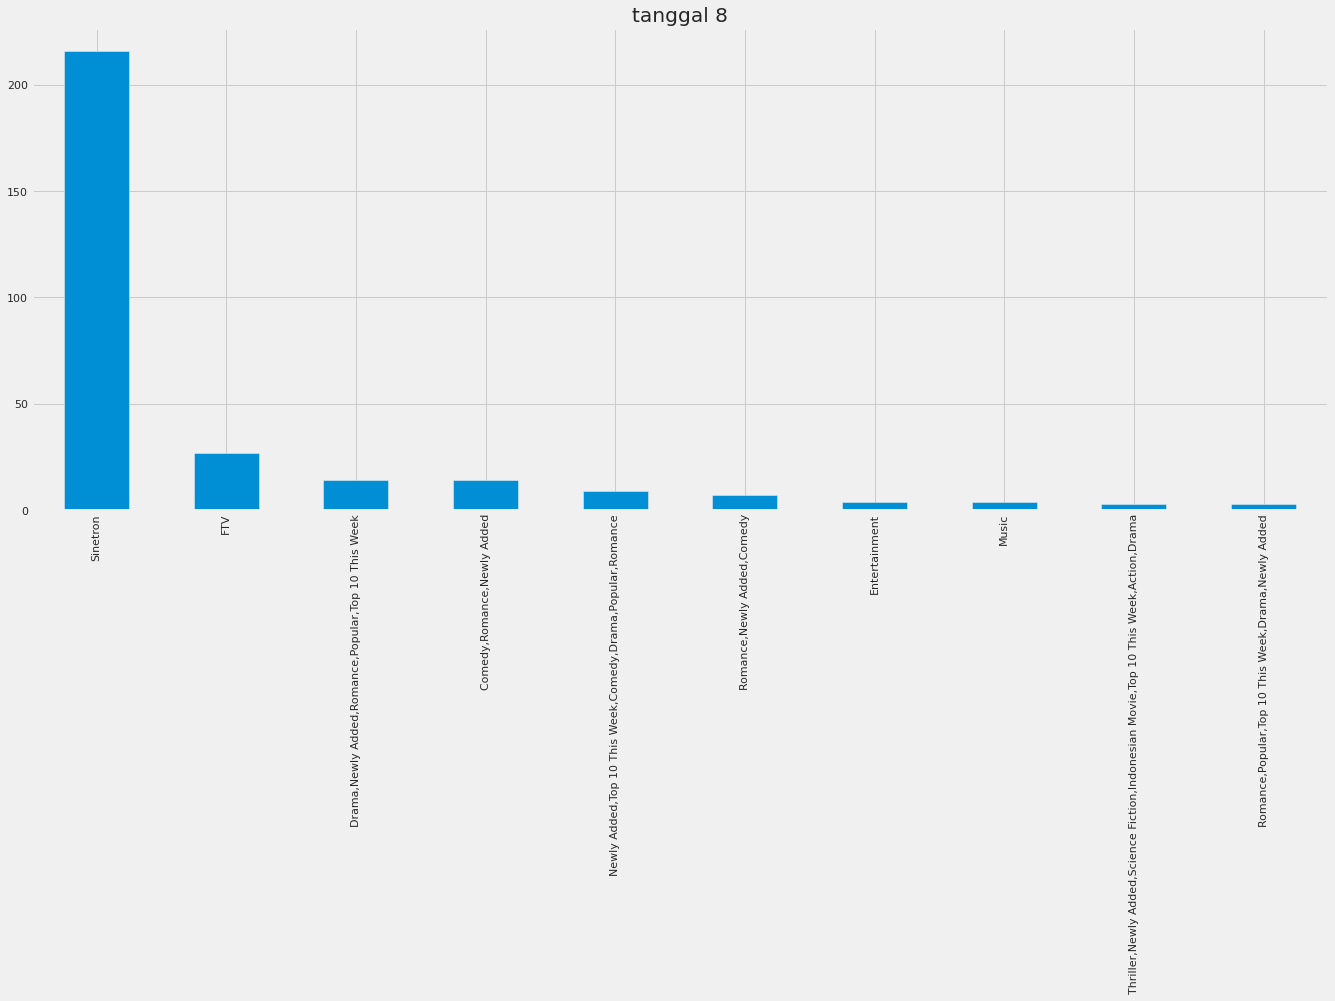

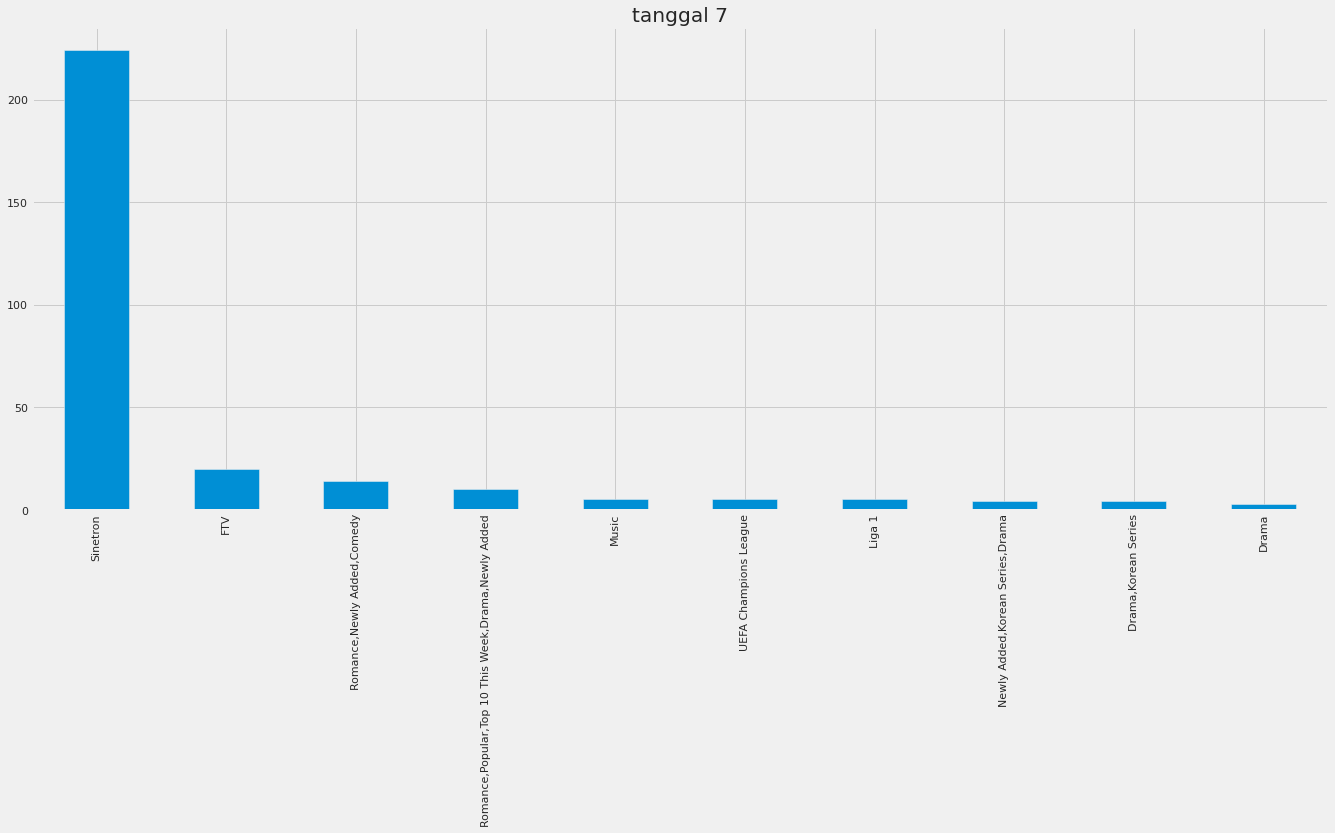

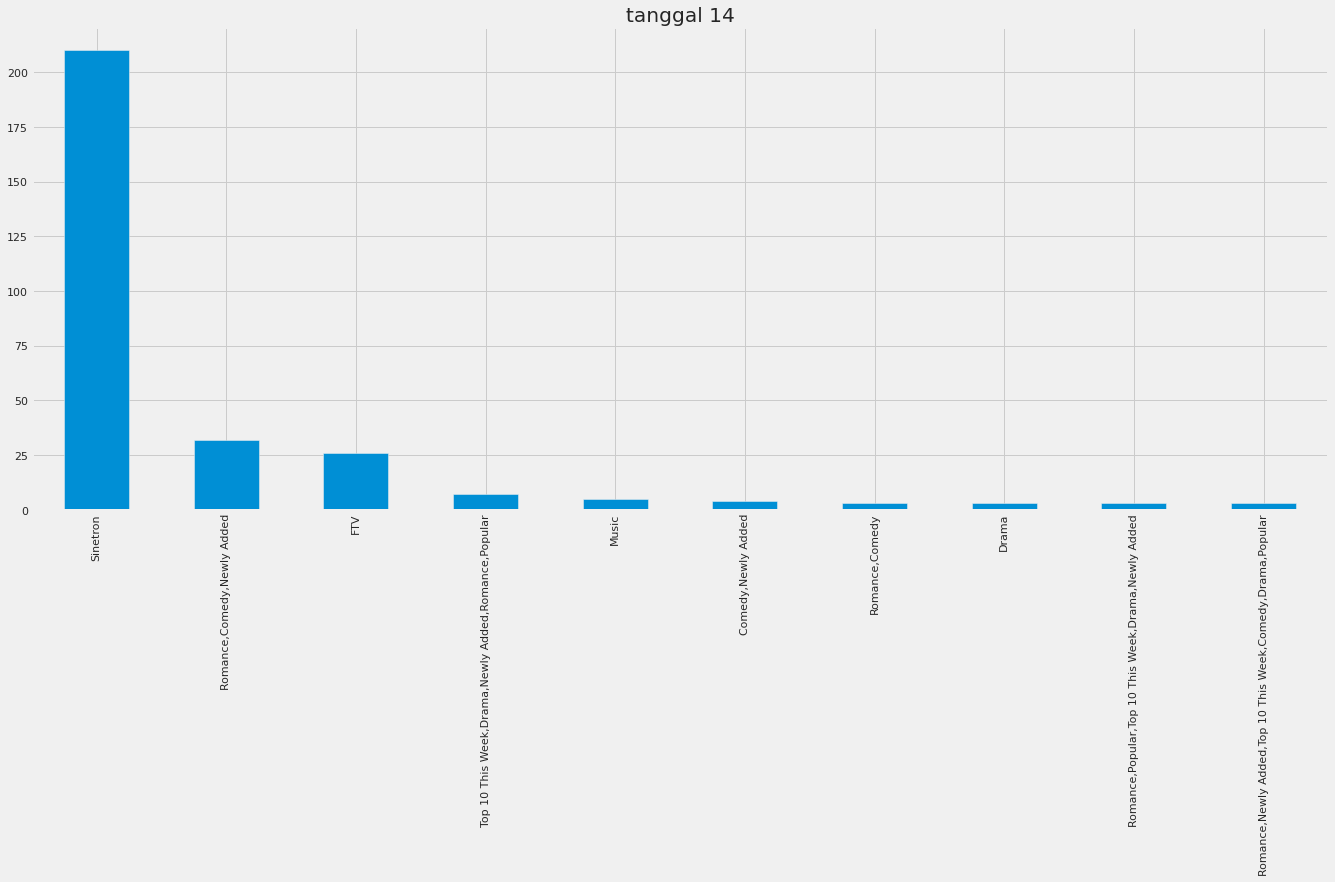

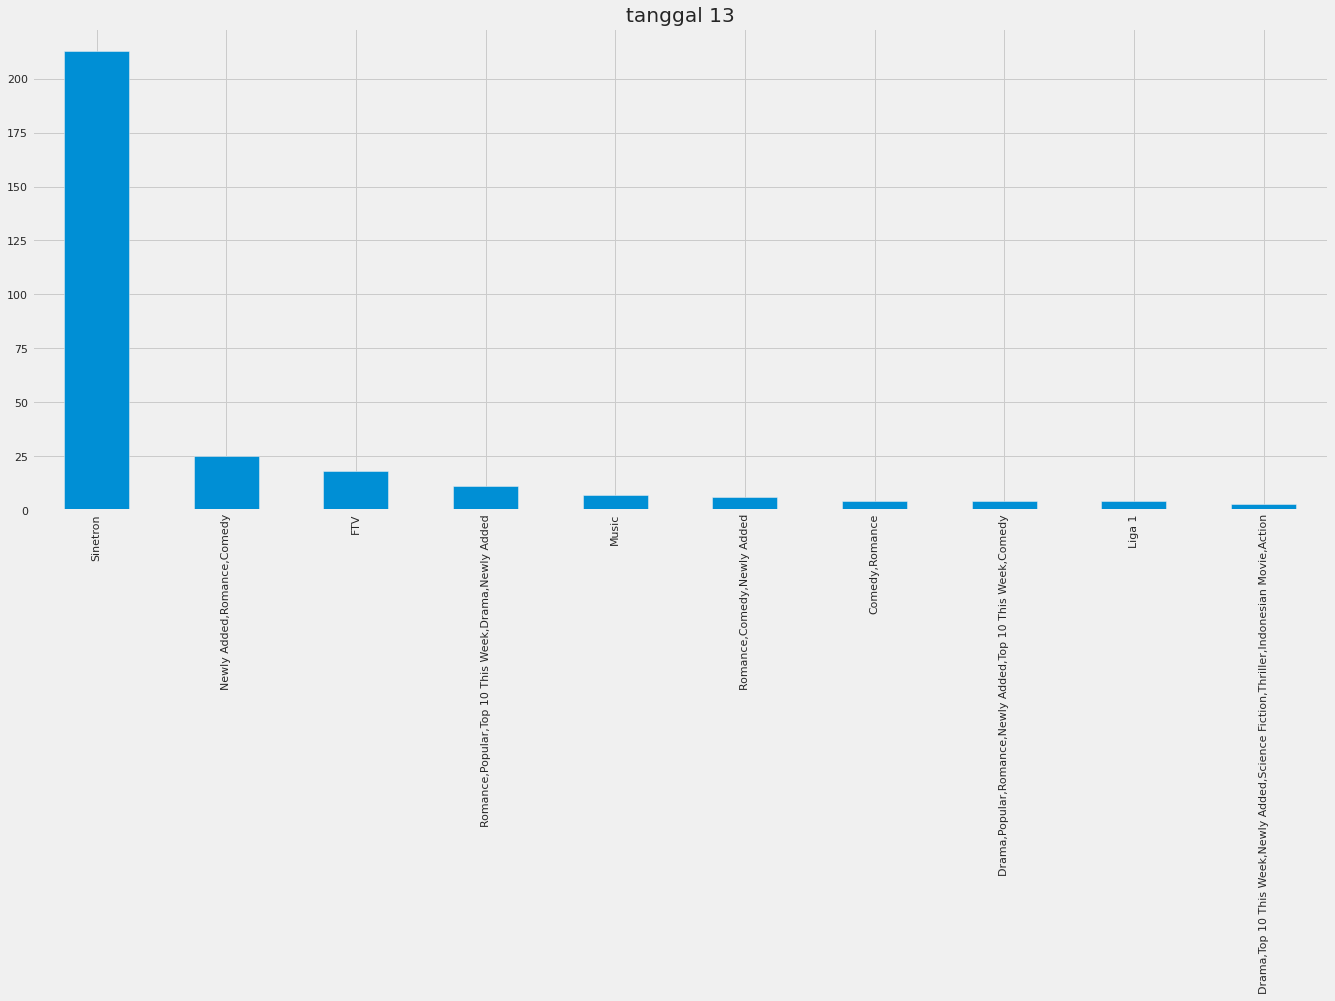

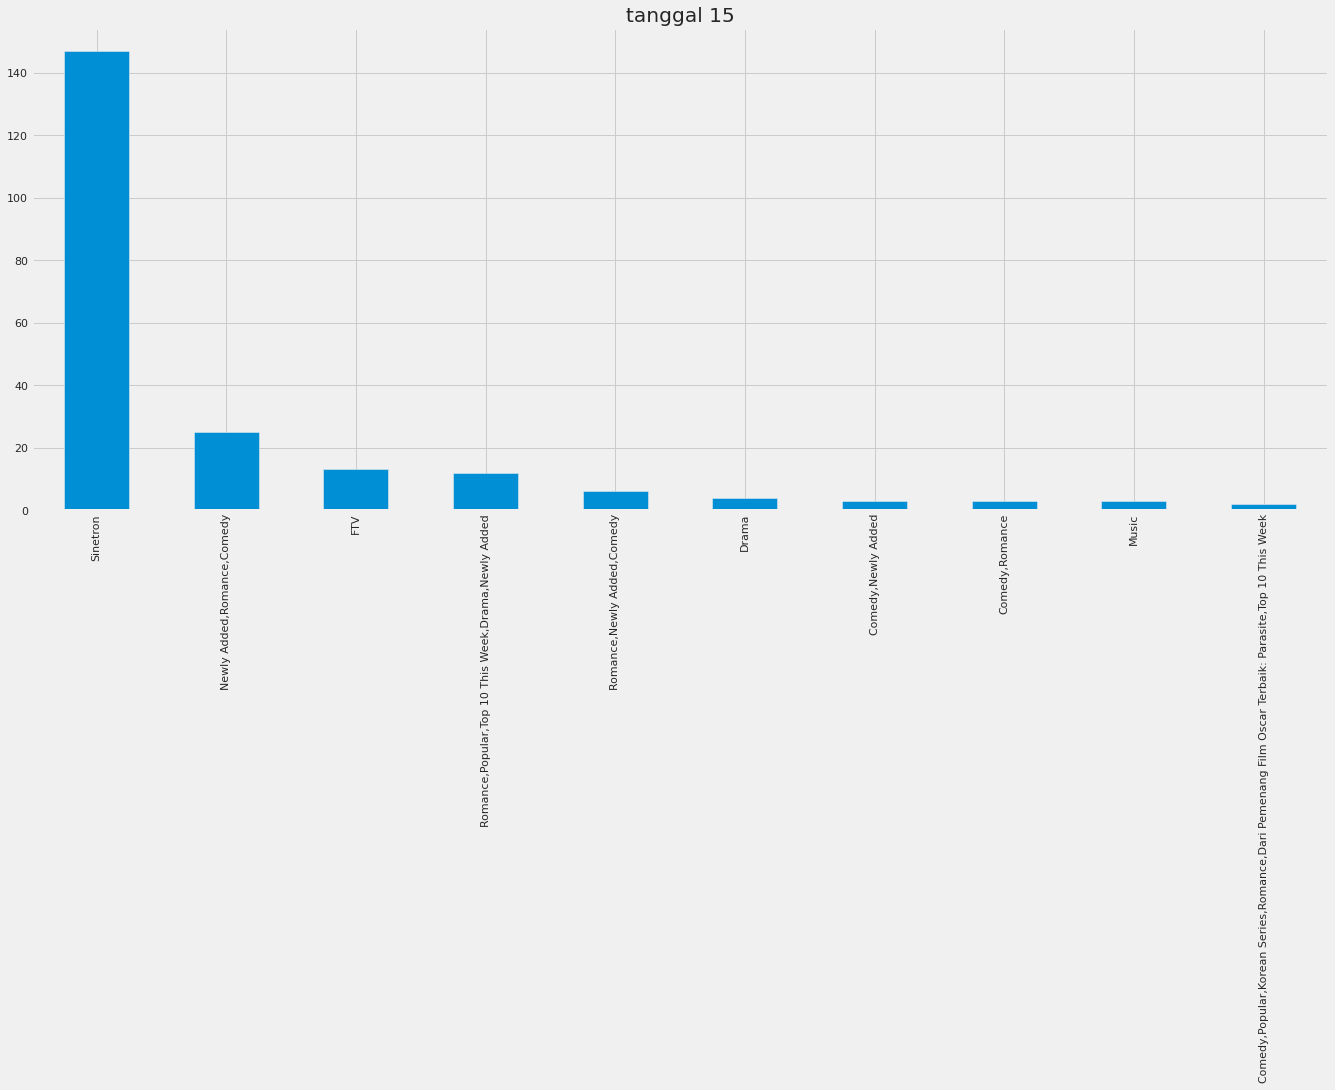

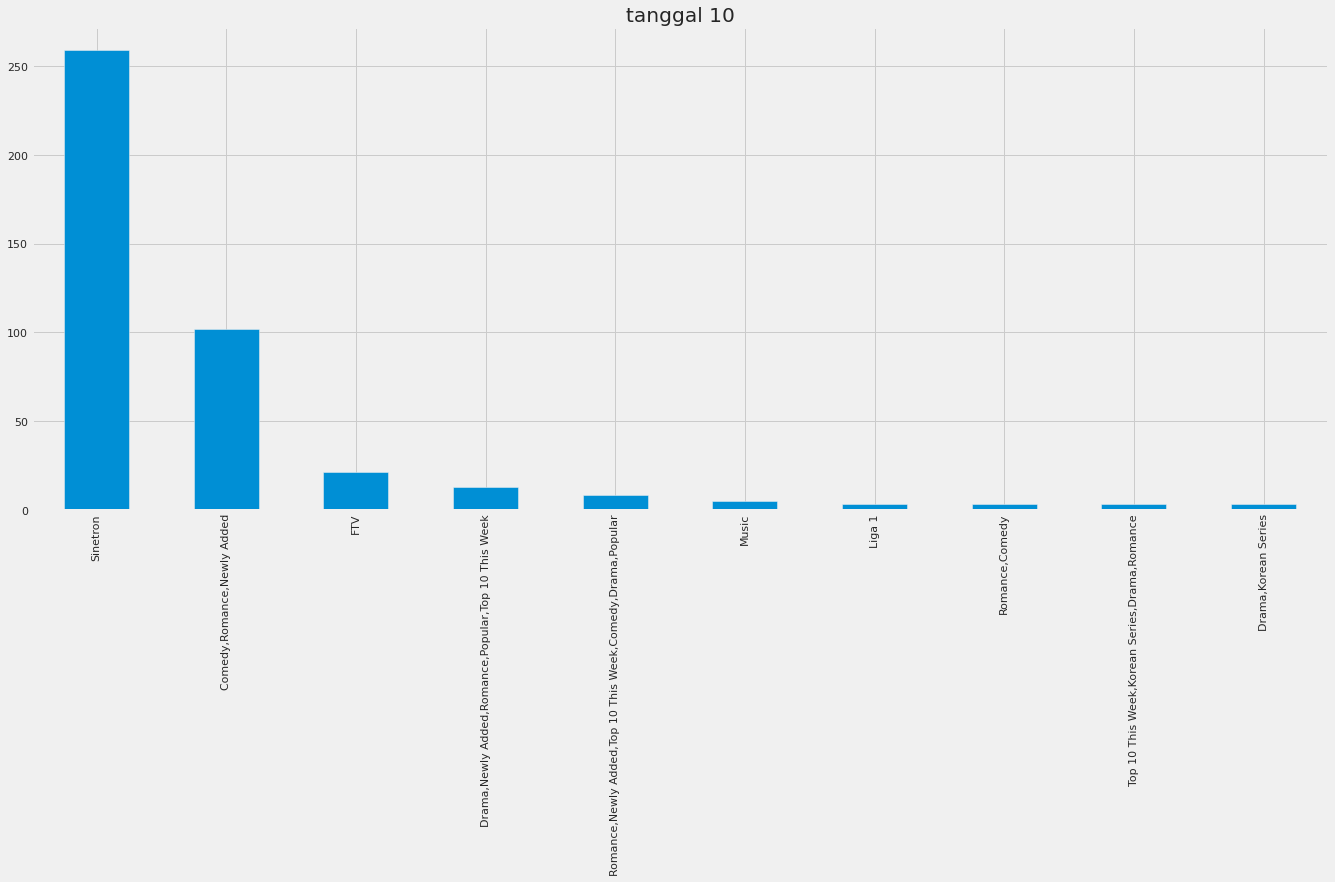

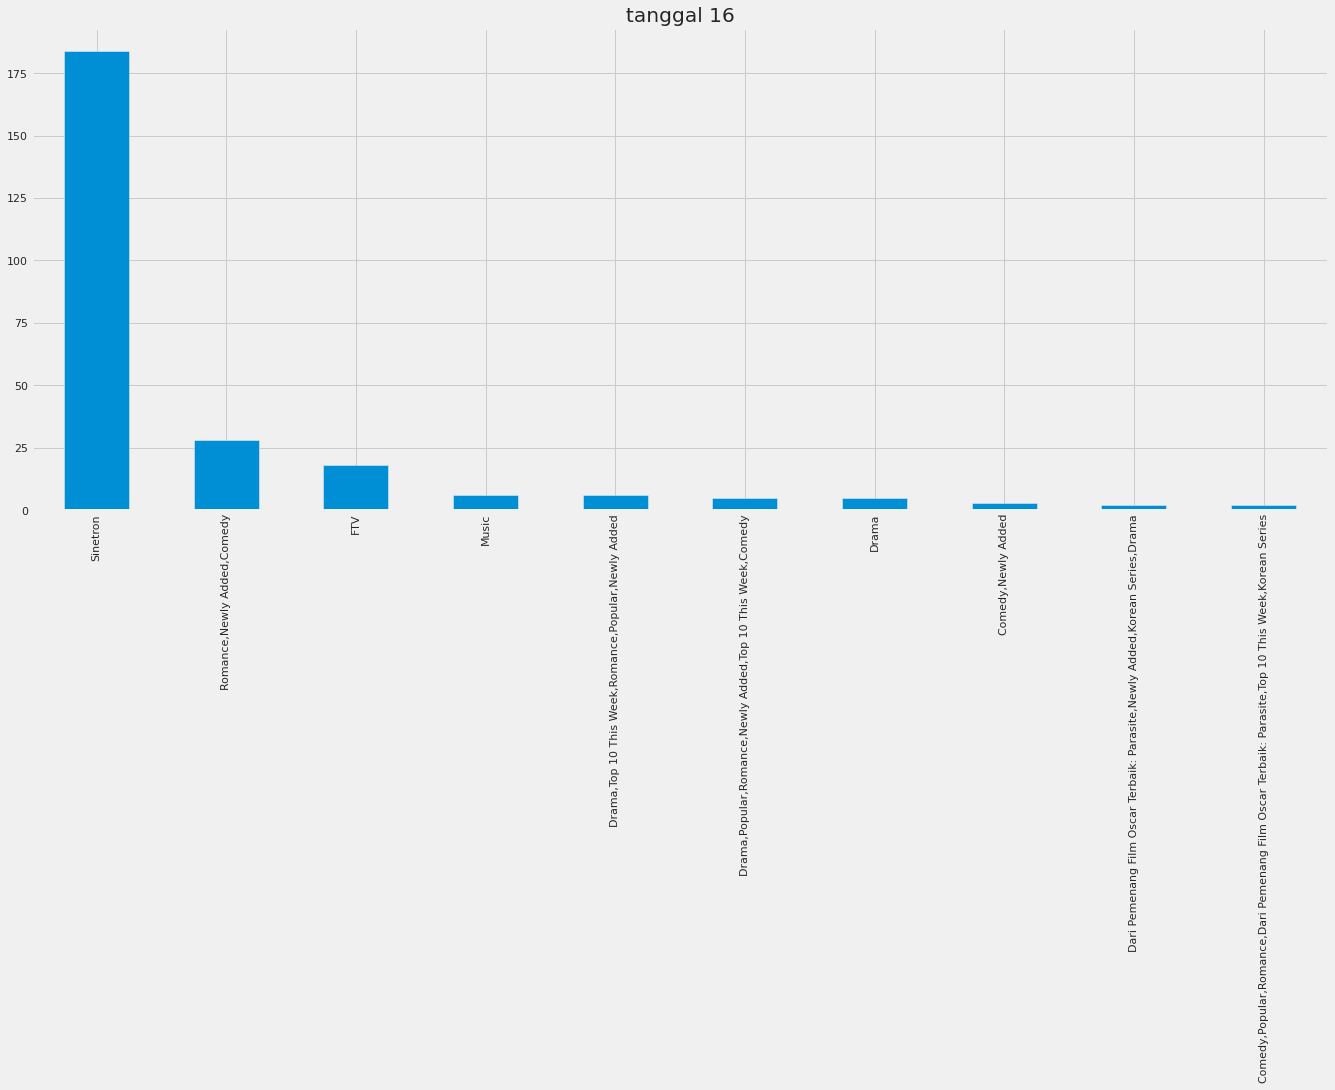

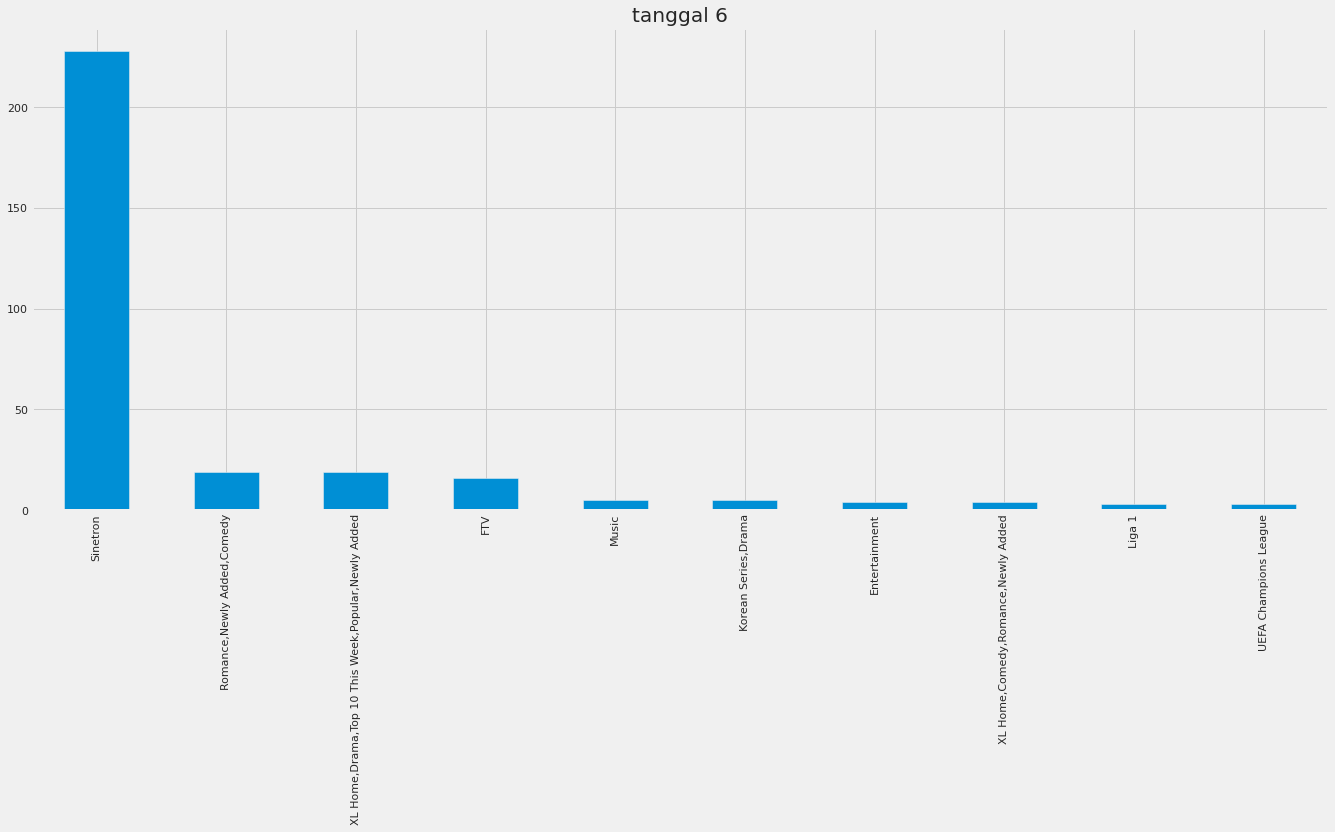

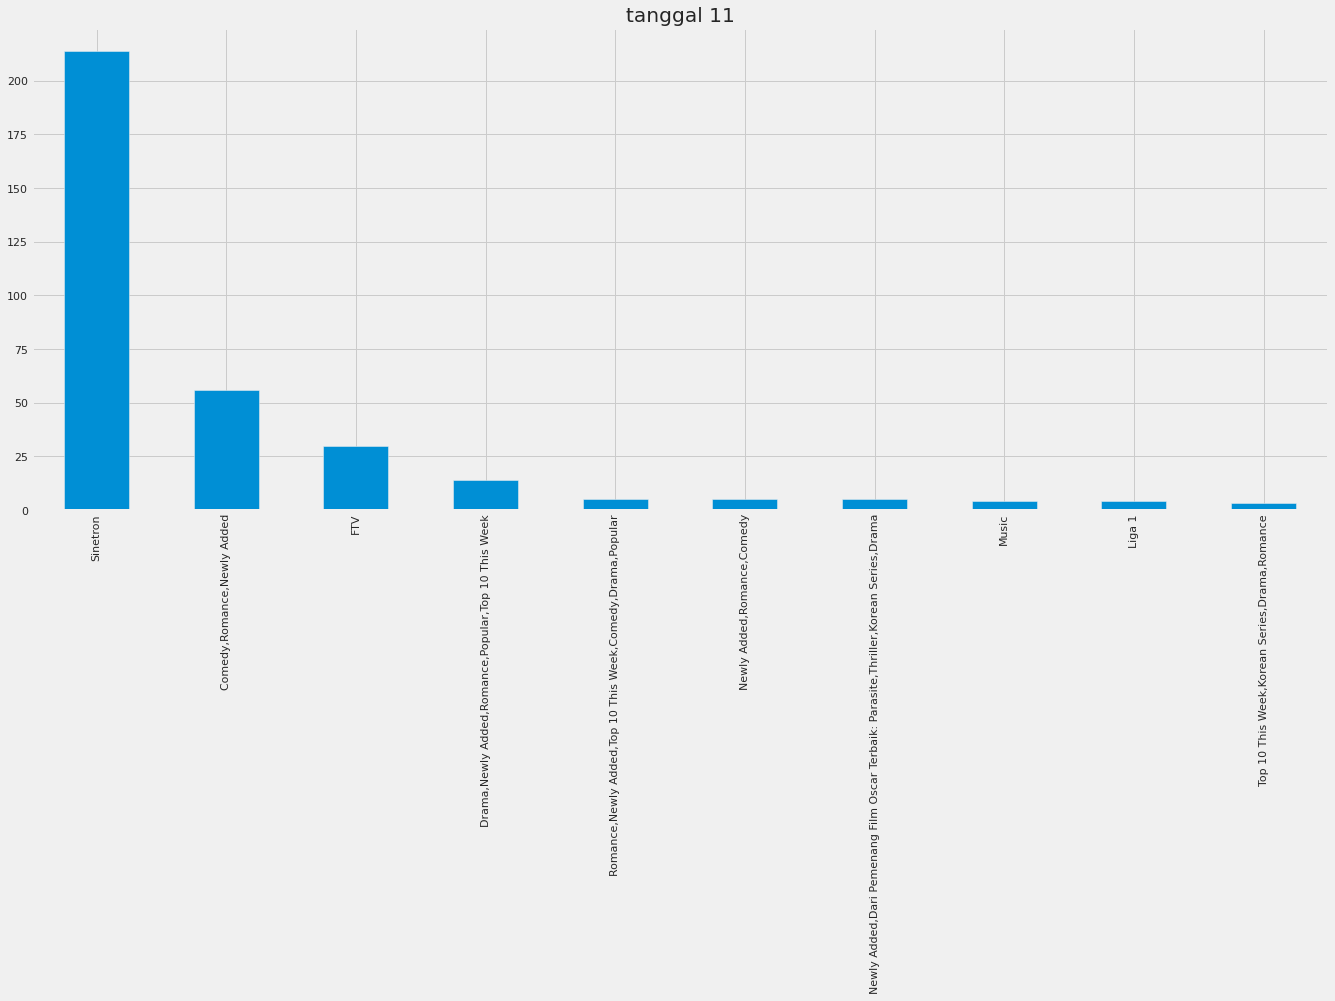

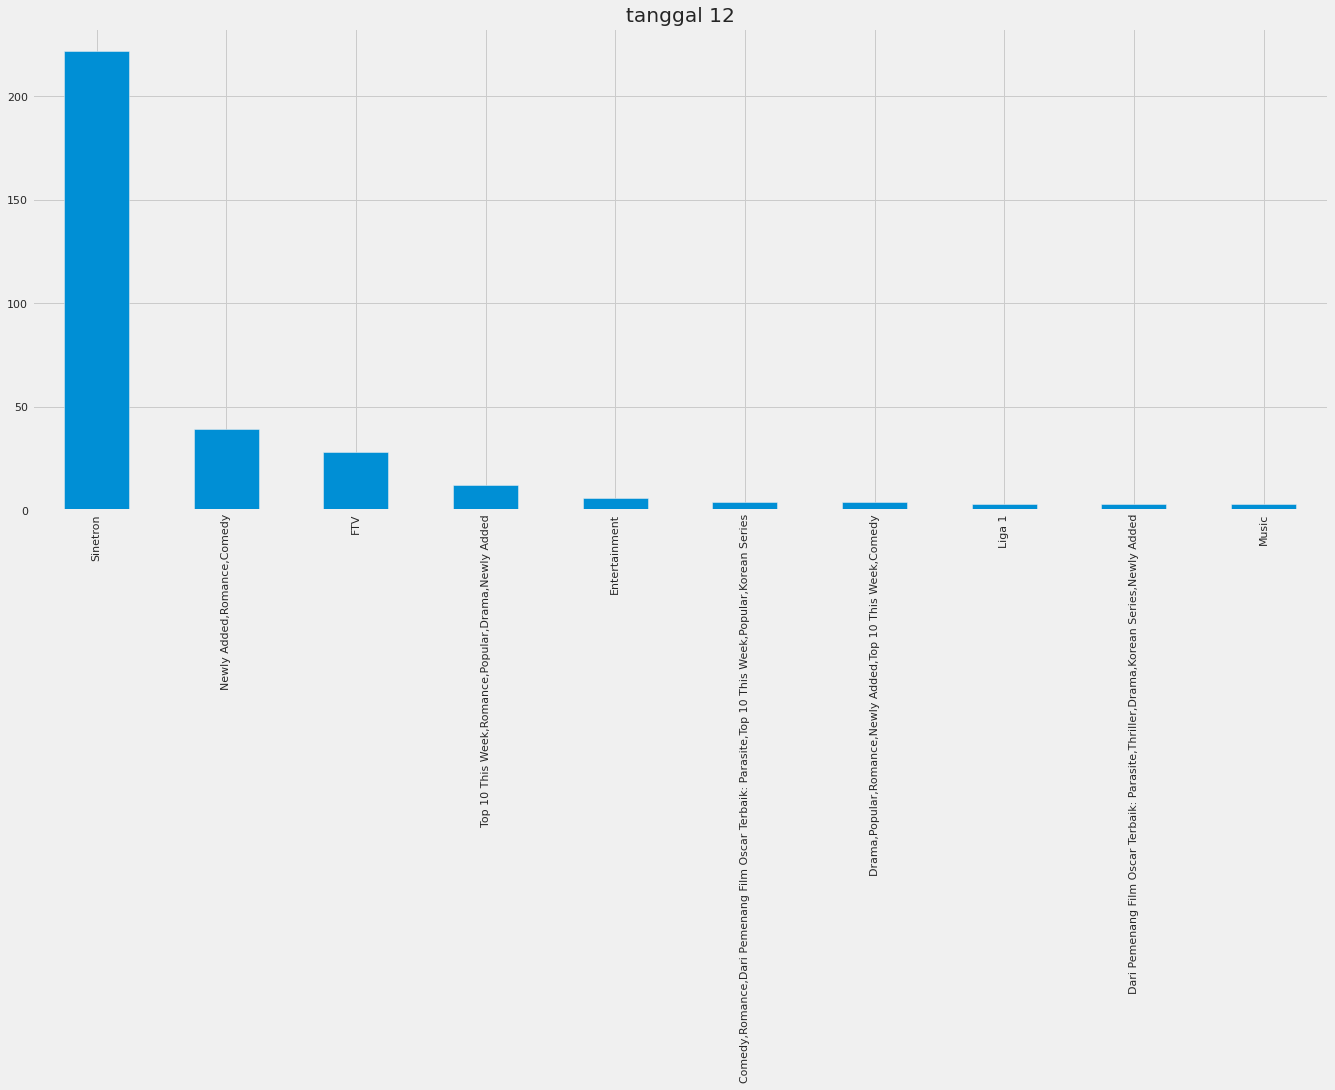

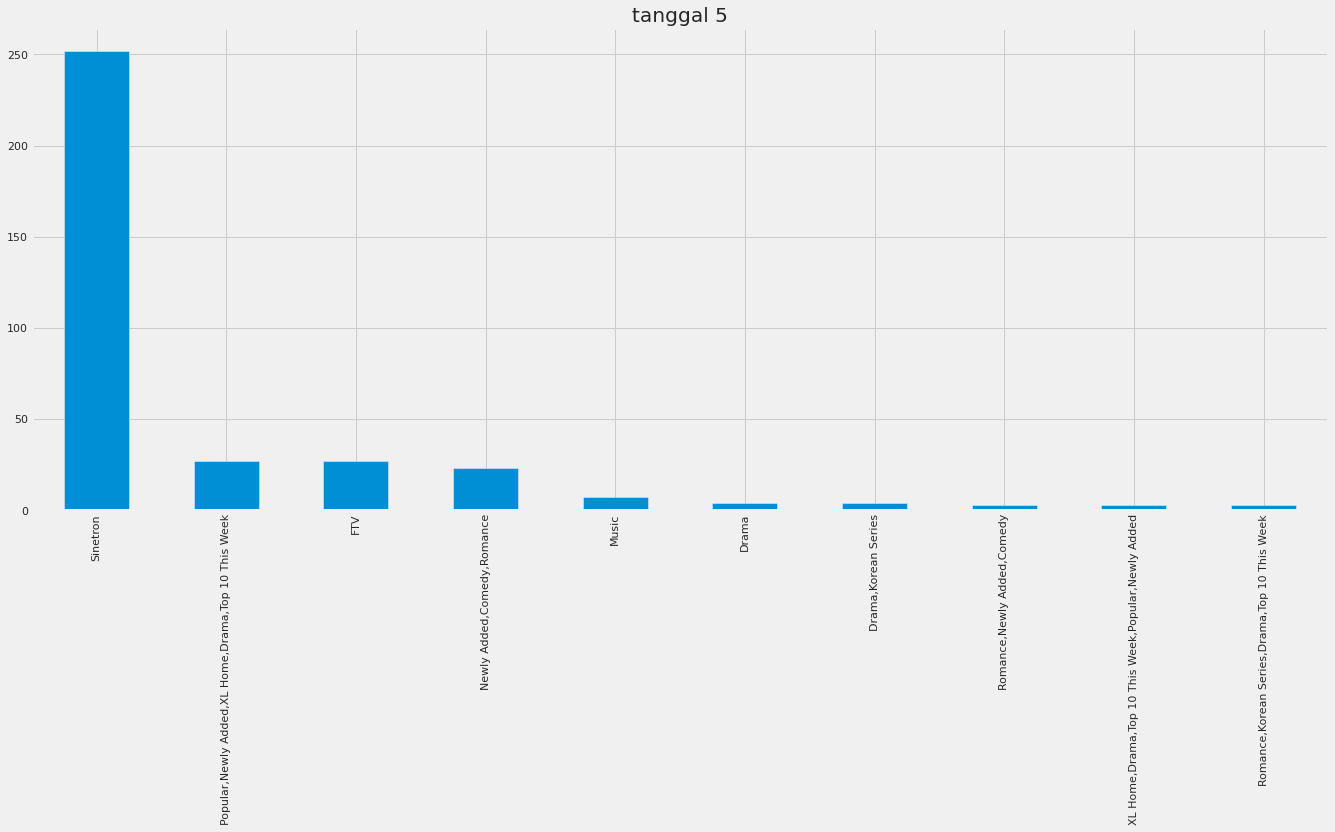

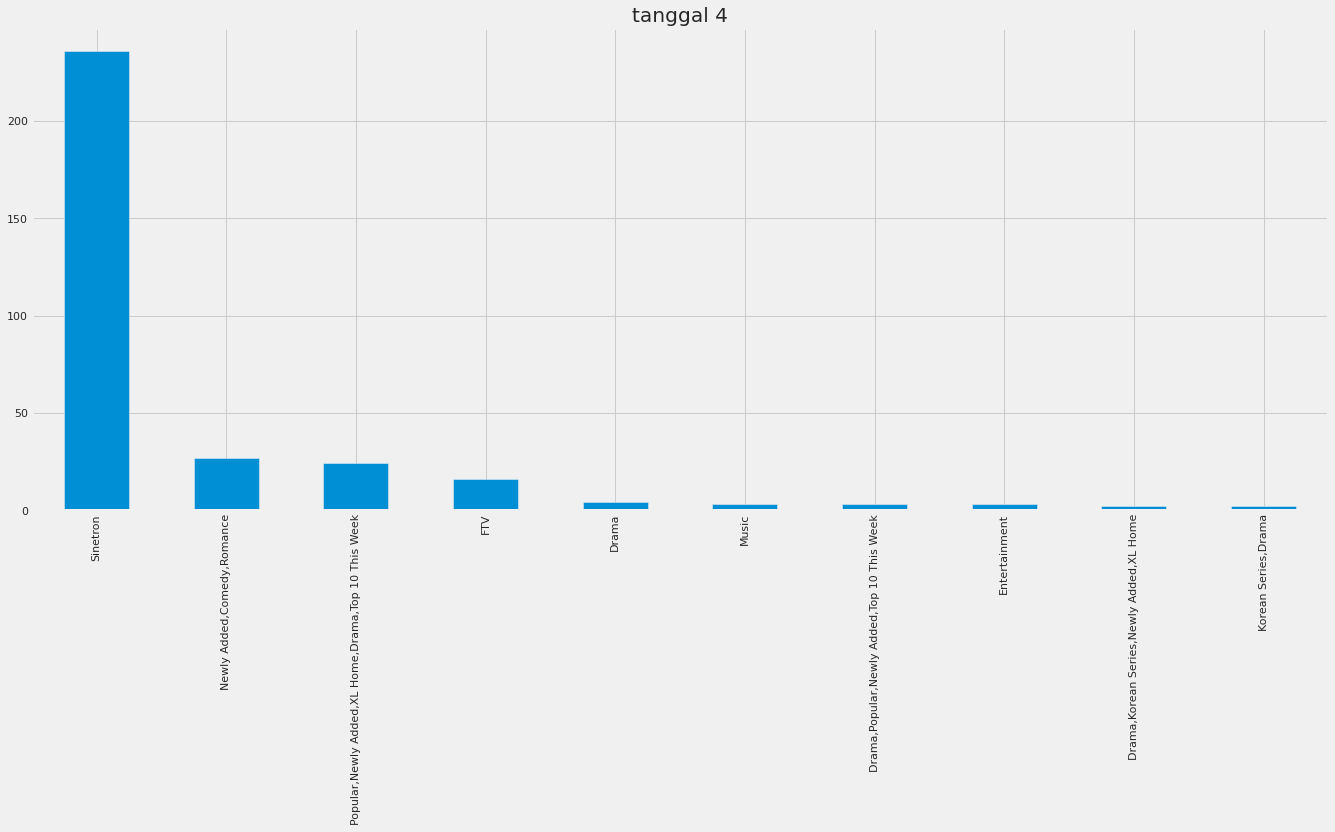

16


In [39]:
i = 0
for tanggal in df['play_time_date'].unique():
    df[df['play_time_date']==tanggal]['genre_name'].value_counts().head(10).plot.bar()
    plt.title(f'tanggal {tanggal}')
    plt.show()
    i+=1
print(i)

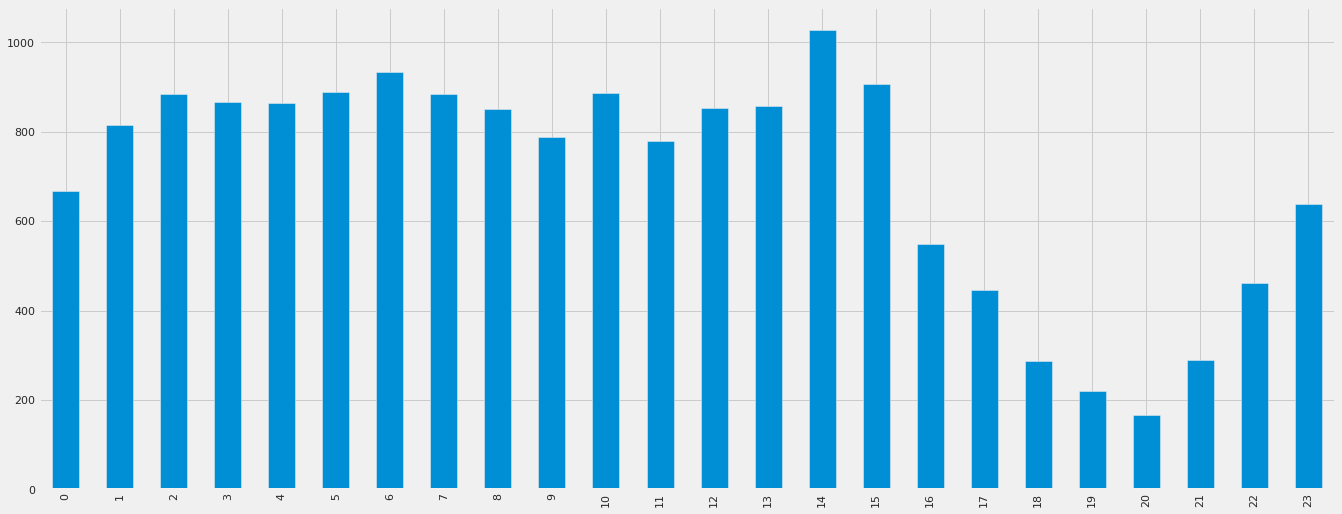

In [60]:
df[df['completed']==True]['play_time_hour'].value_counts().sort_index().plot.bar()
plt.show()

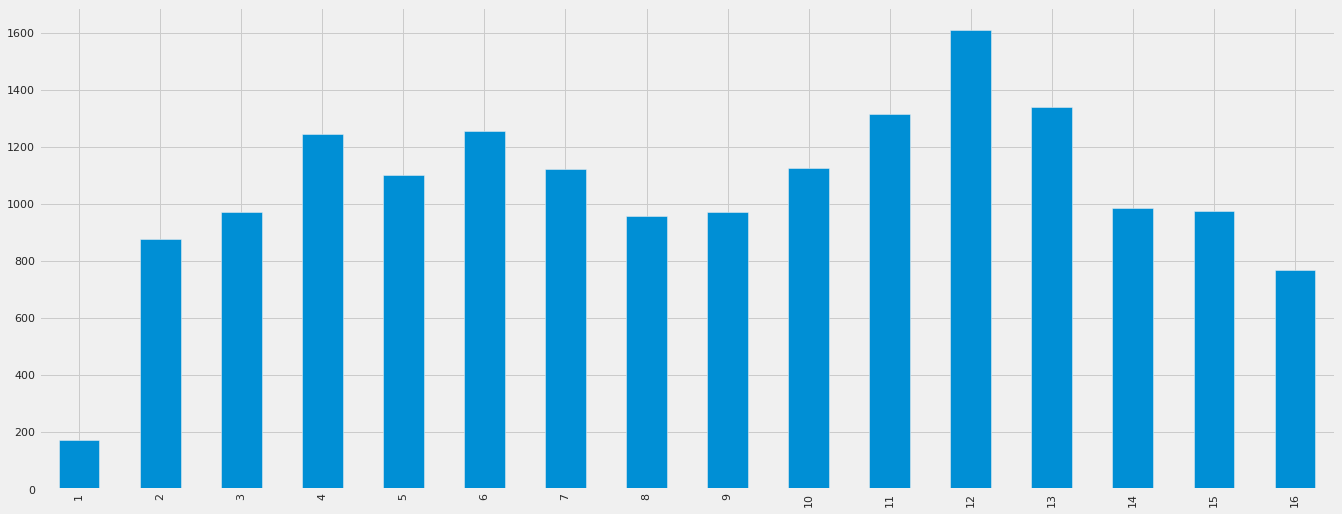

In [64]:
df[df['completed']==True]['play_time_date'].value_counts().sort_index().plot.bar()
plt.show()

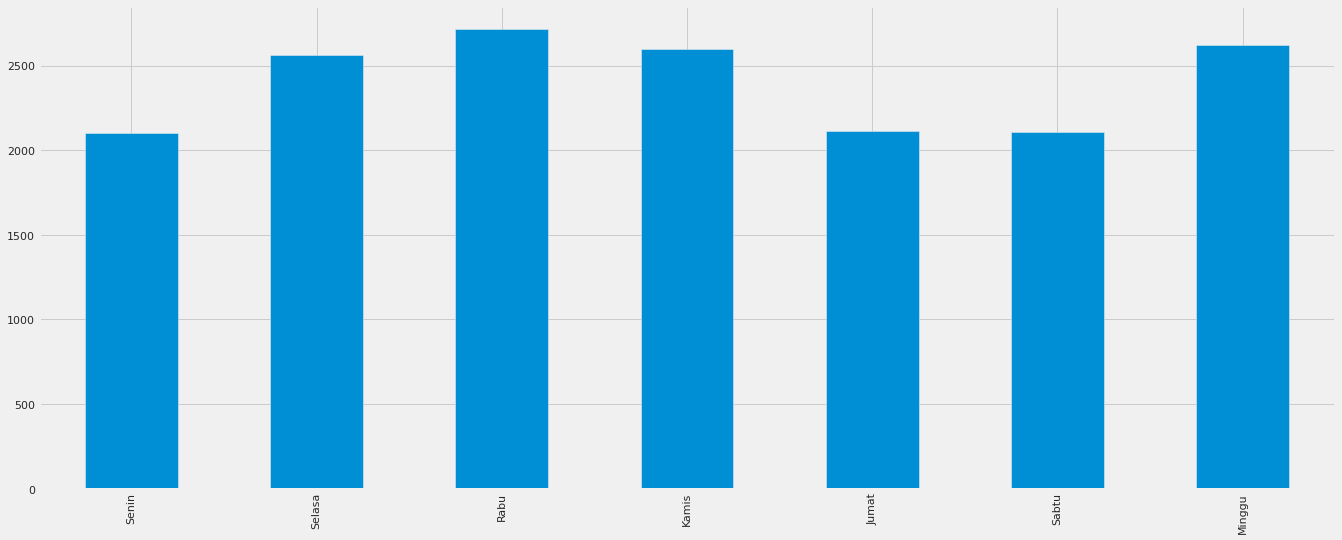

In [99]:
df[df['completed']==True]['weekday'].value_counts().sort_index().plot.bar()
plt.xticks(position,day_list)
plt.show()